### **Detector de intrusiones** 
- El software para detectar intrusiones en la red protege una red informática de usuarios no autorizados, incluidos, quizás, personas con información privilegiada.
- La tarea de aprendizaje del detector de intrusiones es construir un modelo predictivo (es decir, un clasificador) capaz de distinguir entre conexiones "malas", llamadas intrusiones o ataques, y conexiones normales "buenas". Los datos provistos incluyen una amplia variedad de intrusiones simuladas en un entorno de red militar. 
- El concurso de detección de intrusos KDD de 1999 utiliza una versión de este conjunto de datos. Una conexión es una secuencia de paquetes TCP que comienzan y terminan en momentos bien definidos, entre los cuales los datos fluyen hacia y desde una dirección IP de origen a una dirección IP de destino bajo algún protocolo bien definido.
- Cada conexión se etiqueta como normal o como un ataque, con exactamente un tipo de ataque específico. Cada registro de conexión consta de unos 100 bytes.

● DOS: denegación de servicio, por ejemplo, syn flood; <br>
● R2L: acceso no autorizado desde una máquina remota,
por ejemplo, adivinar una contraseña; <br>
● U2R: acceso no autorizado a privilegios de superusuario
local (root), por ejemplo, varios ataques de
"desbordamiento de búfer"; <br>
● Sondeo: vigilancia y otros sondeos, por ejemplo, escaneo
de puertos.

In [84]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.datasets import fetch_kddcup99

In [86]:
X, y = fetch_kddcup99(percent10=True, download_if_missing=True, return_X_y=True)

In [87]:
X.shape

(494021, 41)

In [88]:
y.shape

(494021,)

In [89]:
dt = [('duration', int),
      ('protocol_type', 'S4'),
      ('service', 'S11'),
      ('flag', 'S6'),
      ('src_bytes', int),
      ('dst_bytes', int),
      ('land', int),
      ('wrong_fragment', int),
      ('urgent', int),
      ('hot', int),
      ('num_failed_logins', int),
      ('logged_in', int),
      ('num_compromised', int),
      ('root_shell', int),
      ('su_attempted', int),
      ('num_root', int),
      ('num_file_creations', int),
      ('num_shells', int),
      ('num_access_files', int),
      ('num_outbound_cmds', int),
      ('is_host_login', int),
      ('is_guest_login', int),
      ('count', int),
      ('srv_count', int),
      ('serror_rate', float),
      ('srv_serror_rate', float),
      ('rerror_rate', float),
      ('srv_rerror_rate', float),
      ('same_srv_rate', float),
      ('diff_srv_rate', float),
      ('srv_diff_host_rate', float),
      ('dst_host_count', int),
      ('dst_host_srv_count', int),
      ('dst_host_same_srv_rate', float),
      ('dst_host_diff_srv_rate', float),
      ('dst_host_same_src_port_rate', float),
      ('dst_host_srv_diff_host_rate', float),
      ('dst_host_serror_rate', float),
      ('dst_host_srv_serror_rate', float),
      ('dst_host_rerror_rate', float),
      ('dst_host_srv_rerror_rate', float),
      ('labels', 'S16')]

In [90]:
column_names = [c[0] for c in dt]
df_conexiones = pd.DataFrame(data=np.column_stack((X,y)),columns=column_names)

In [91]:
df_conexiones = df_conexiones.infer_objects()

In [92]:
df_conexiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [93]:
df_conexiones.head()

duration protocol_type  service   flag  src_bytes  dst_bytes  land  \
0         0        b'tcp'  b'http'  b'SF'        181       5450     0   
1         0        b'tcp'  b'http'  b'SF'        239        486     0   
2         0        b'tcp'  b'http'  b'SF'        235       1337     0   
3         0        b'tcp'  b'http'  b'SF'        219       1337     0   
4         0        b'tcp'  b'http'  b'SF'        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate      labels  
0                       0.0  b'normal.'  
1                       0.0  b'normal.'  
2                       0.0  b'normal.'  
3                       0.0  b'normal.'  
4                       0.0  b'normal.'  

[5 rows x 42 columns]

In [94]:
df_conexiones.labels.unique()

array([b'normal.', b'buffer_overflow.', b'loadmodule.', b'perl.',
       b'neptune.', b'smurf.', b'guess_passwd.', b'pod.', b'teardrop.',
       b'portsweep.', b'ipsweep.', b'land.', b'ftp_write.', b'back.',
       b'imap.', b'satan.', b'phf.', b'nmap.', b'multihop.',
       b'warezmaster.', b'warezclient.', b'spy.', b'rootkit.'],
      dtype=object)

#### **Ejercicio 1**

CONSIGNA:

1. Mediante la función SelectKBest de ScikitLearn, detectar los features más relevantes del dataset provisto

In [95]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [96]:
le.fit(df_conexiones['protocol_type'])
print(le.classes_)

[b'icmp' b'tcp' b'udp']


In [97]:
df_conexiones['protocol_type_le'] = le.transform(df_conexiones['protocol_type'])

In [98]:
df_conexiones.protocol_type_le.unique()

array([1, 2, 0])

In [99]:
df_conexiones['flag_le'] = le.fit_transform(df_conexiones['flag'])

In [100]:
df_conexiones.flag_le.unique()

array([ 9,  6,  1,  7,  5,  8,  2,  4,  3,  0, 10])

In [101]:
di = {b'normal.': "normal", 
      b'buffer_overflow.': "buffer_overflow", 
      b'loadmodule.': "loadmodule", 
      b'perl.': "perl",
      b'neptune.': "neptune", 
      b'smurf.': "smurf", 
      b'guess_passwd.': "guess_passwd", 
      b'pod.': "pod", 
      b'teardrop.': "teardrop",
      b'portsweep.': "portsweep", 
      b'ipsweep.': "ipsweep", 
      b'land.': "land", 
      b'ftp_write.': "ftp_write", 
      b'back.': "back",
      b'imap.': "imap", 
      b'satan.': "satan", 
      b'phf.': "phf",
      b'nmap.': "nmap" ,
      b'multihop.': "multihop",
      b'warezmaster.': "warezmaster", 
      b'warezclient.': "warezclient", 
      b'spy.': "spy", 
      b'rootkit.': "rootkit"}

In [102]:
df_conexiones.replace({"labels": di}, inplace=True)

In [103]:
df_conexiones.loc[df_conexiones['labels'] == 'normal', 'labels_le'] = 1
df_conexiones.loc[df_conexiones['labels'] != 'normal', 'labels_le'] = 0

In [104]:
df_conexiones.labels_le.value_counts()

0.0    396743
1.0     97278
Name: labels_le, dtype: int64

In [105]:
df_conexiones['labels_le2'] = le.fit_transform(df_conexiones['labels'])

In [106]:
le.classes_

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

In [107]:
df_conexiones.labels_le2.value_counts()

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: labels_le2, dtype: int64

In [108]:
df_corr = df_conexiones.corr()

C:\Users\Emanu\AppData\Local\Temp\ipykernel_3704\3636794385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_conexiones.corr()


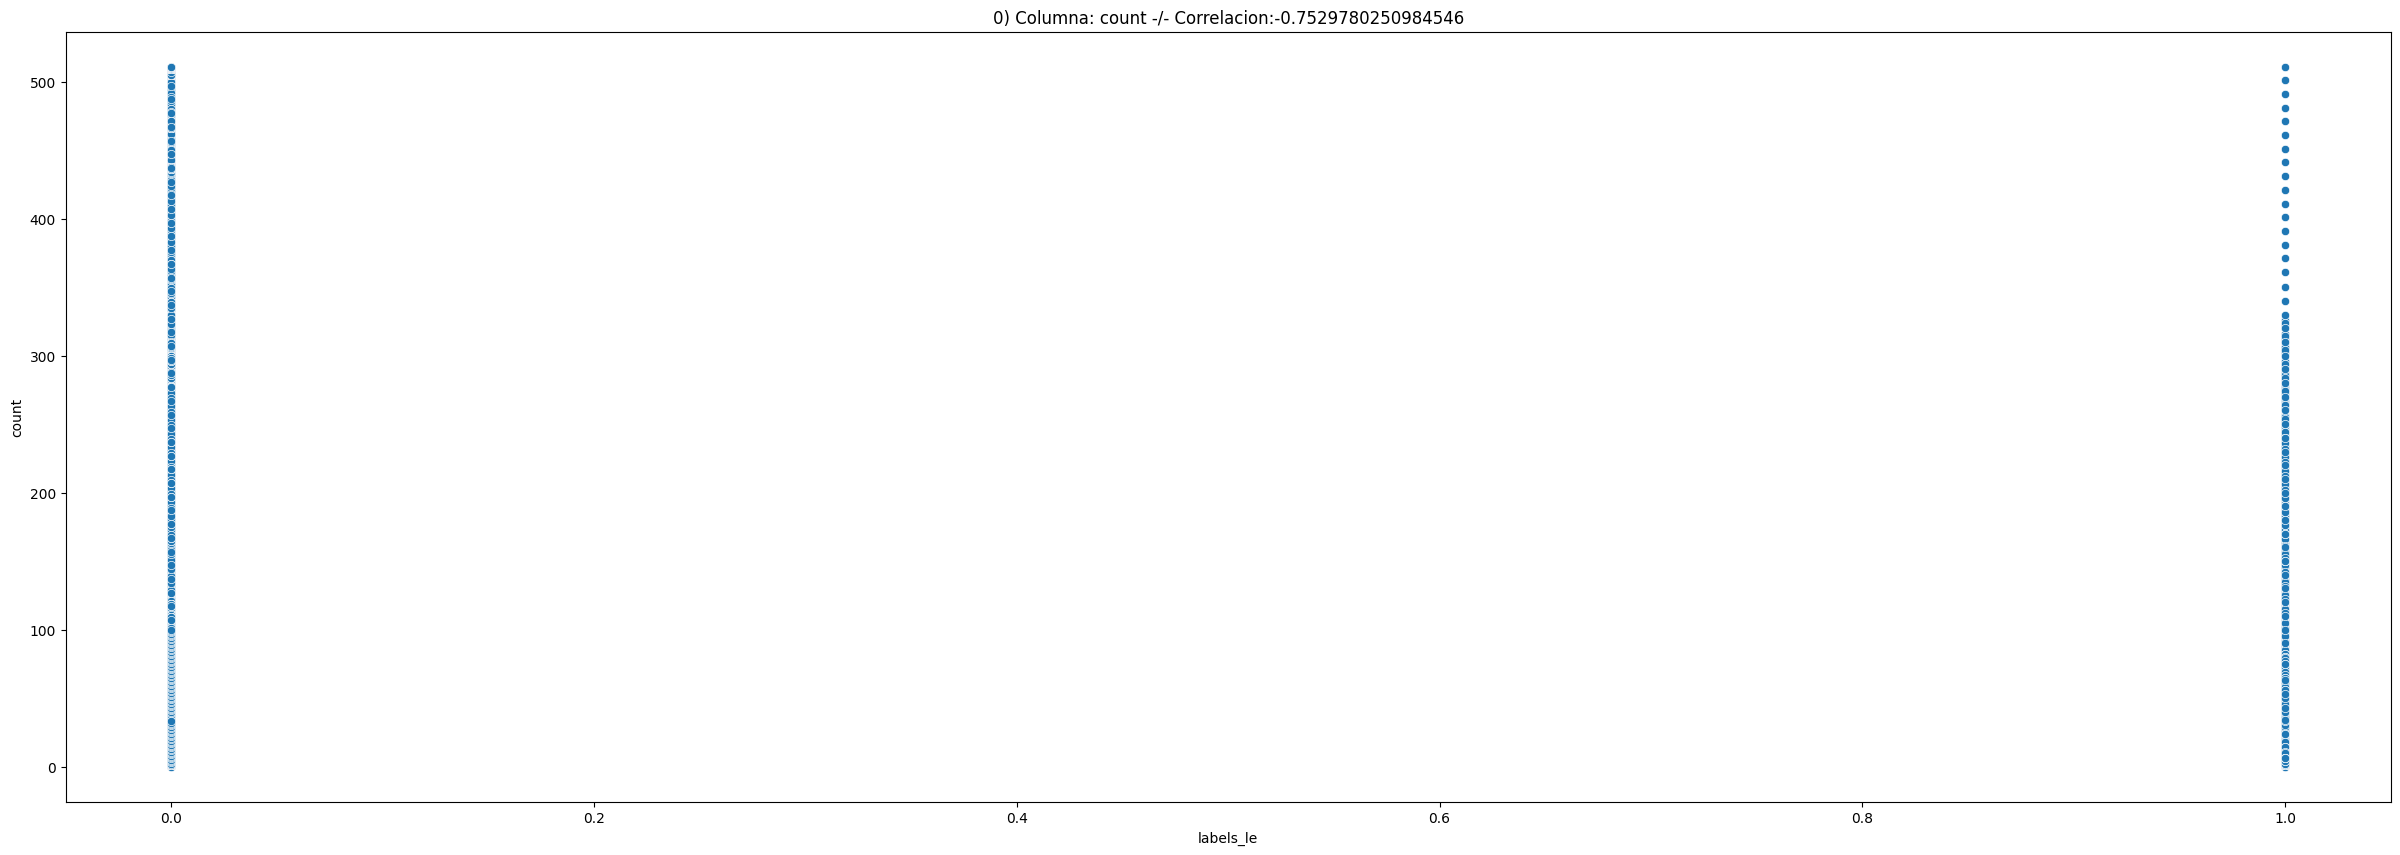

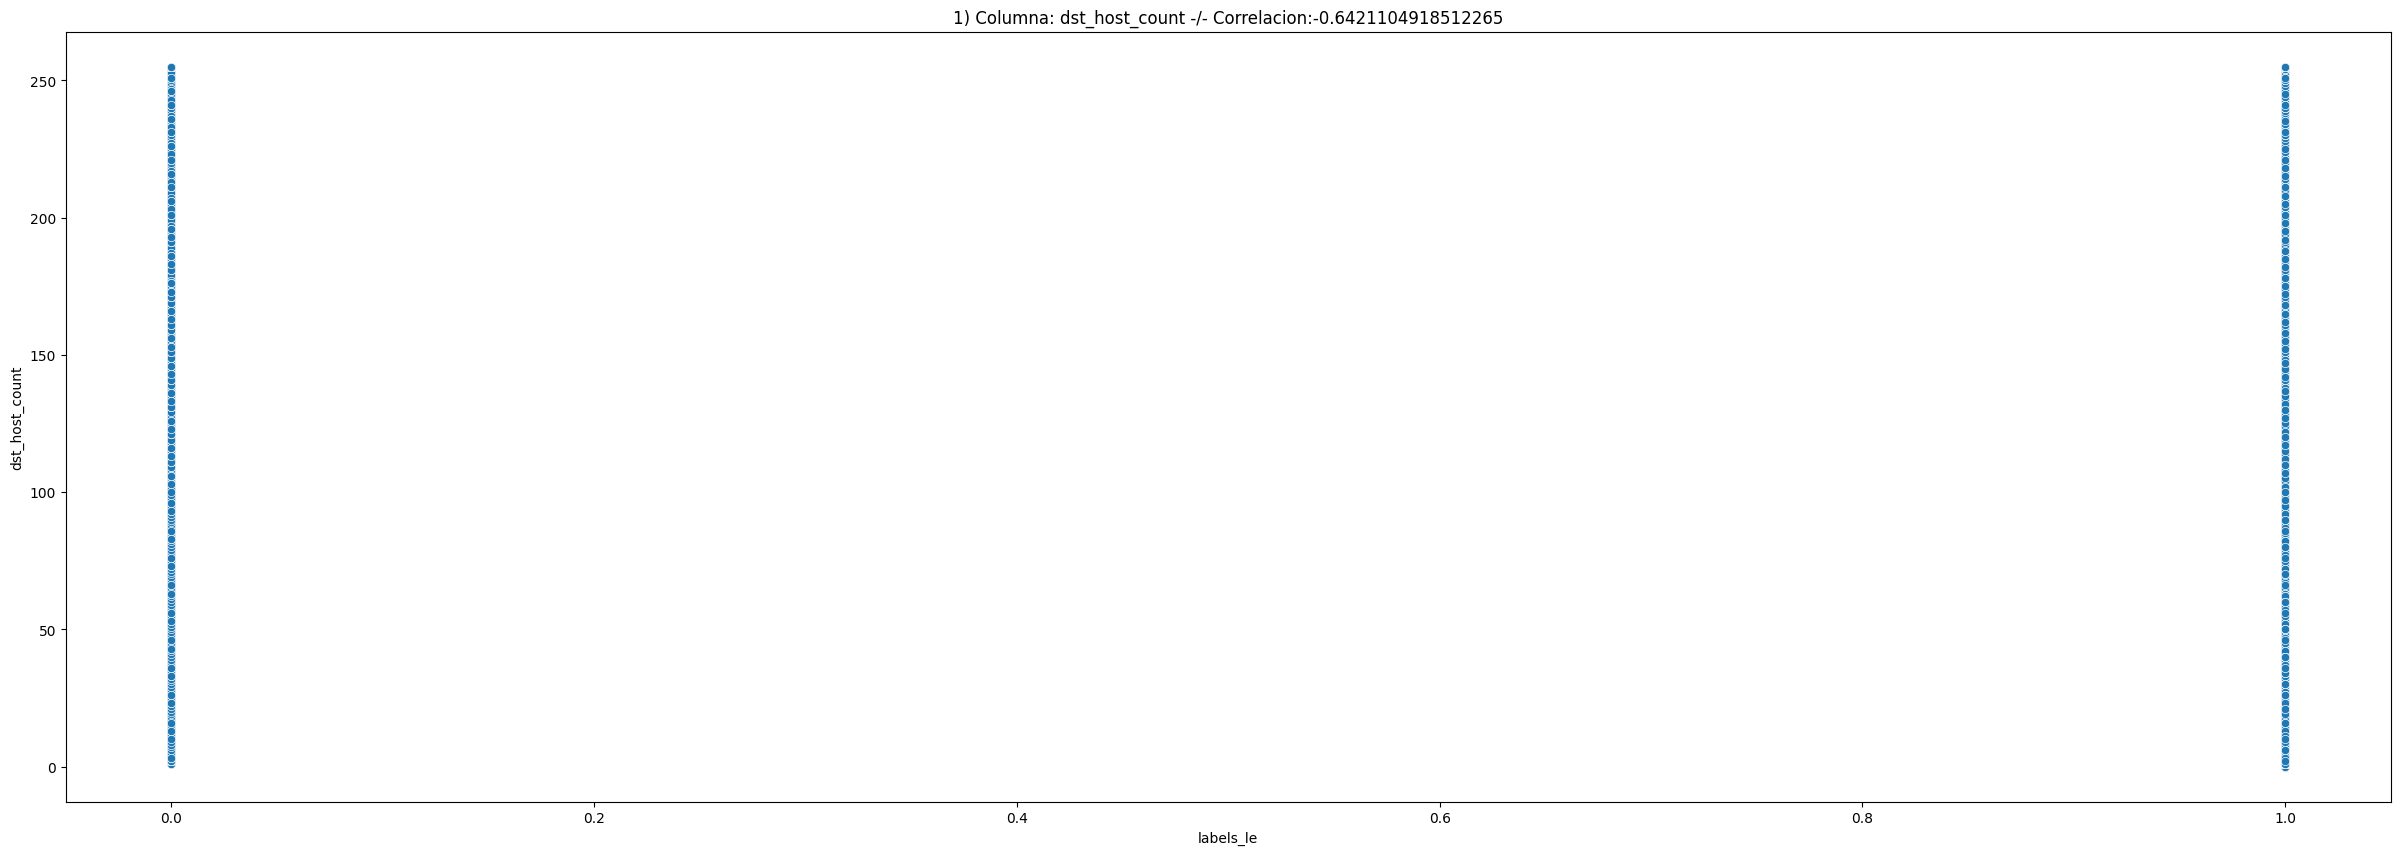

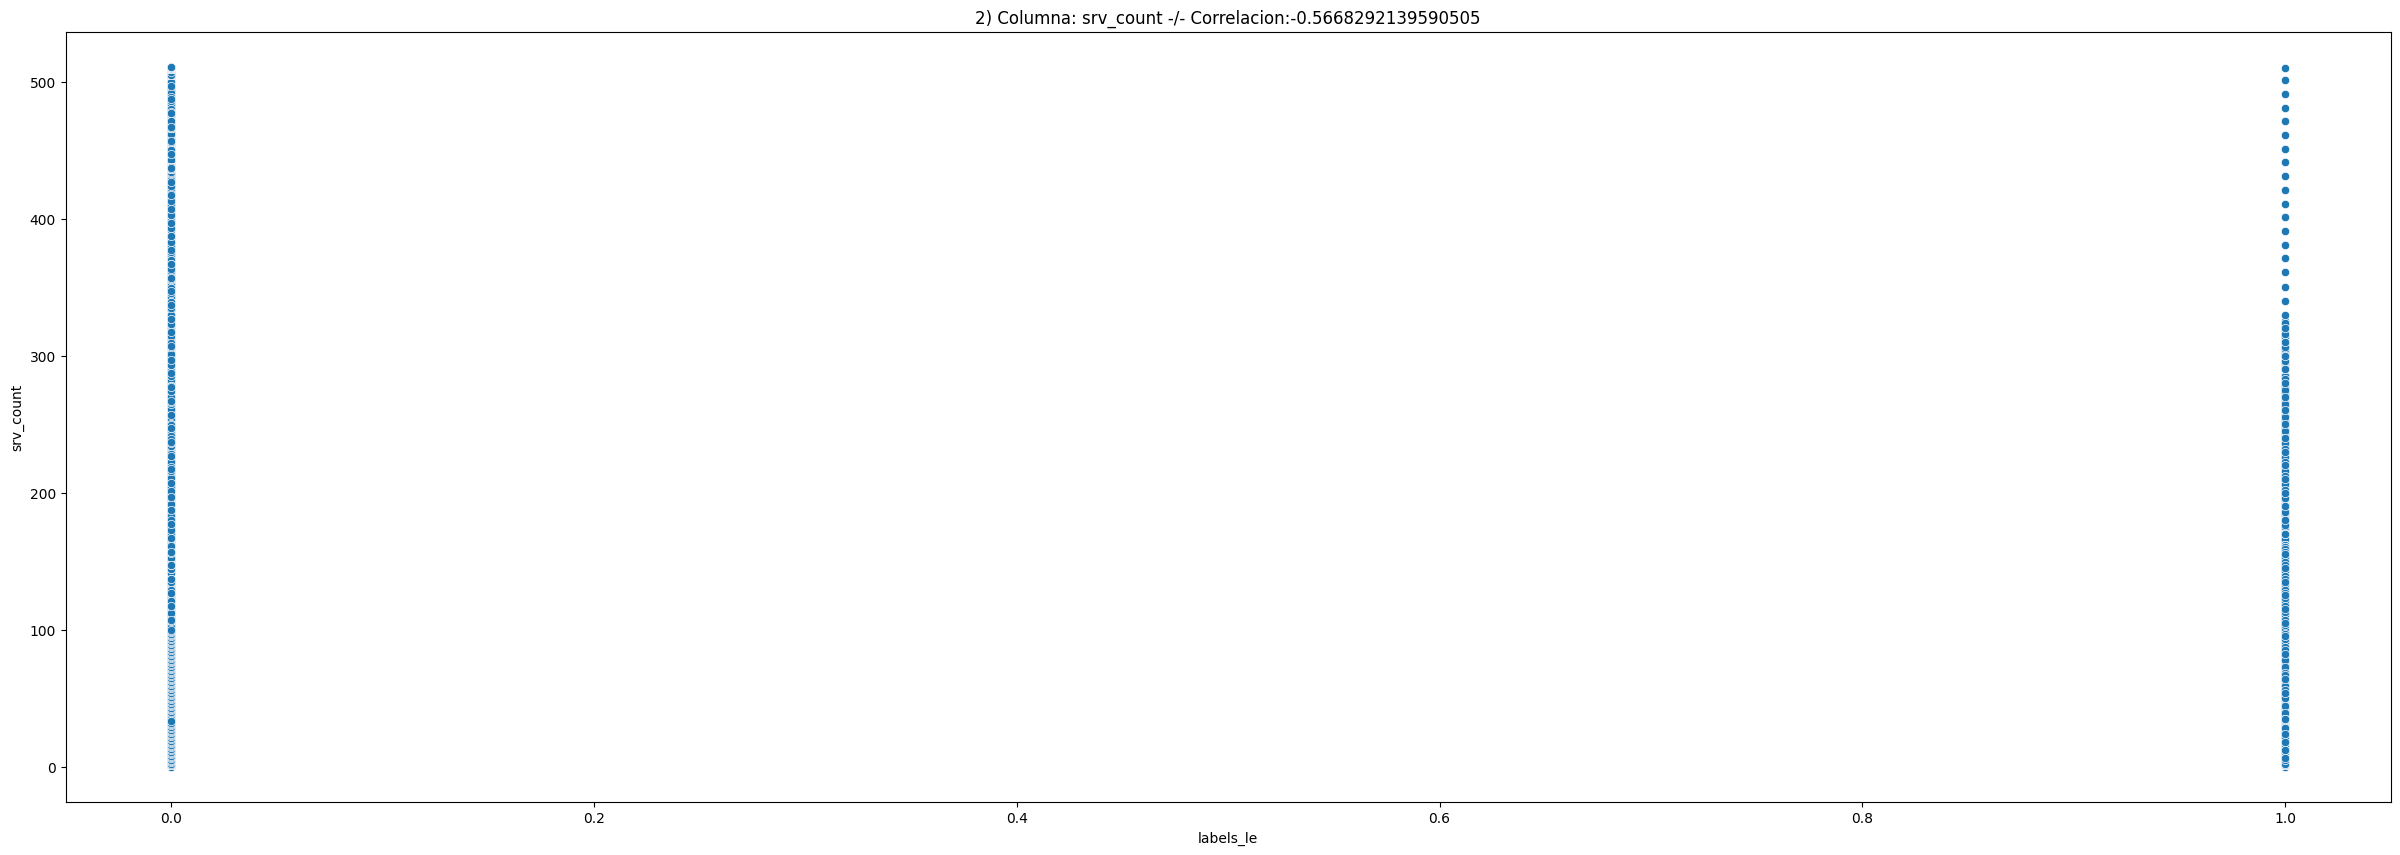

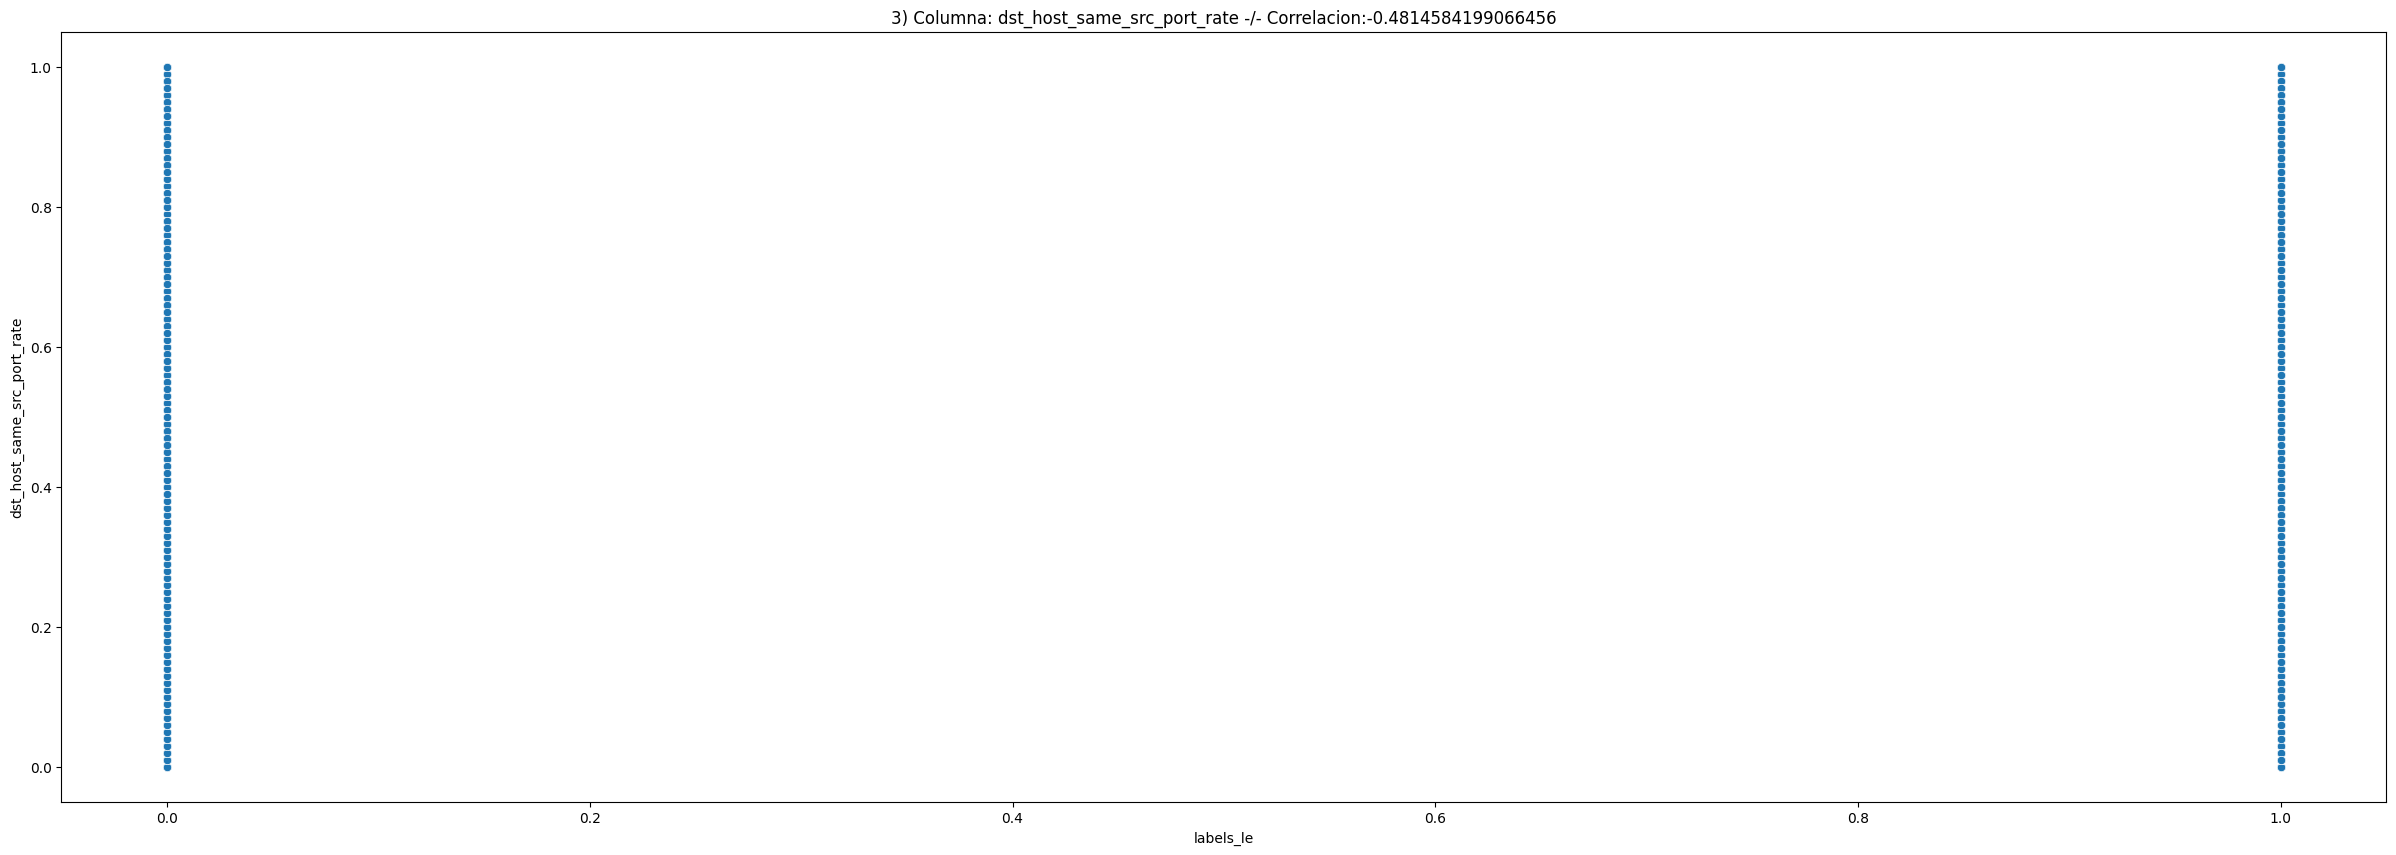

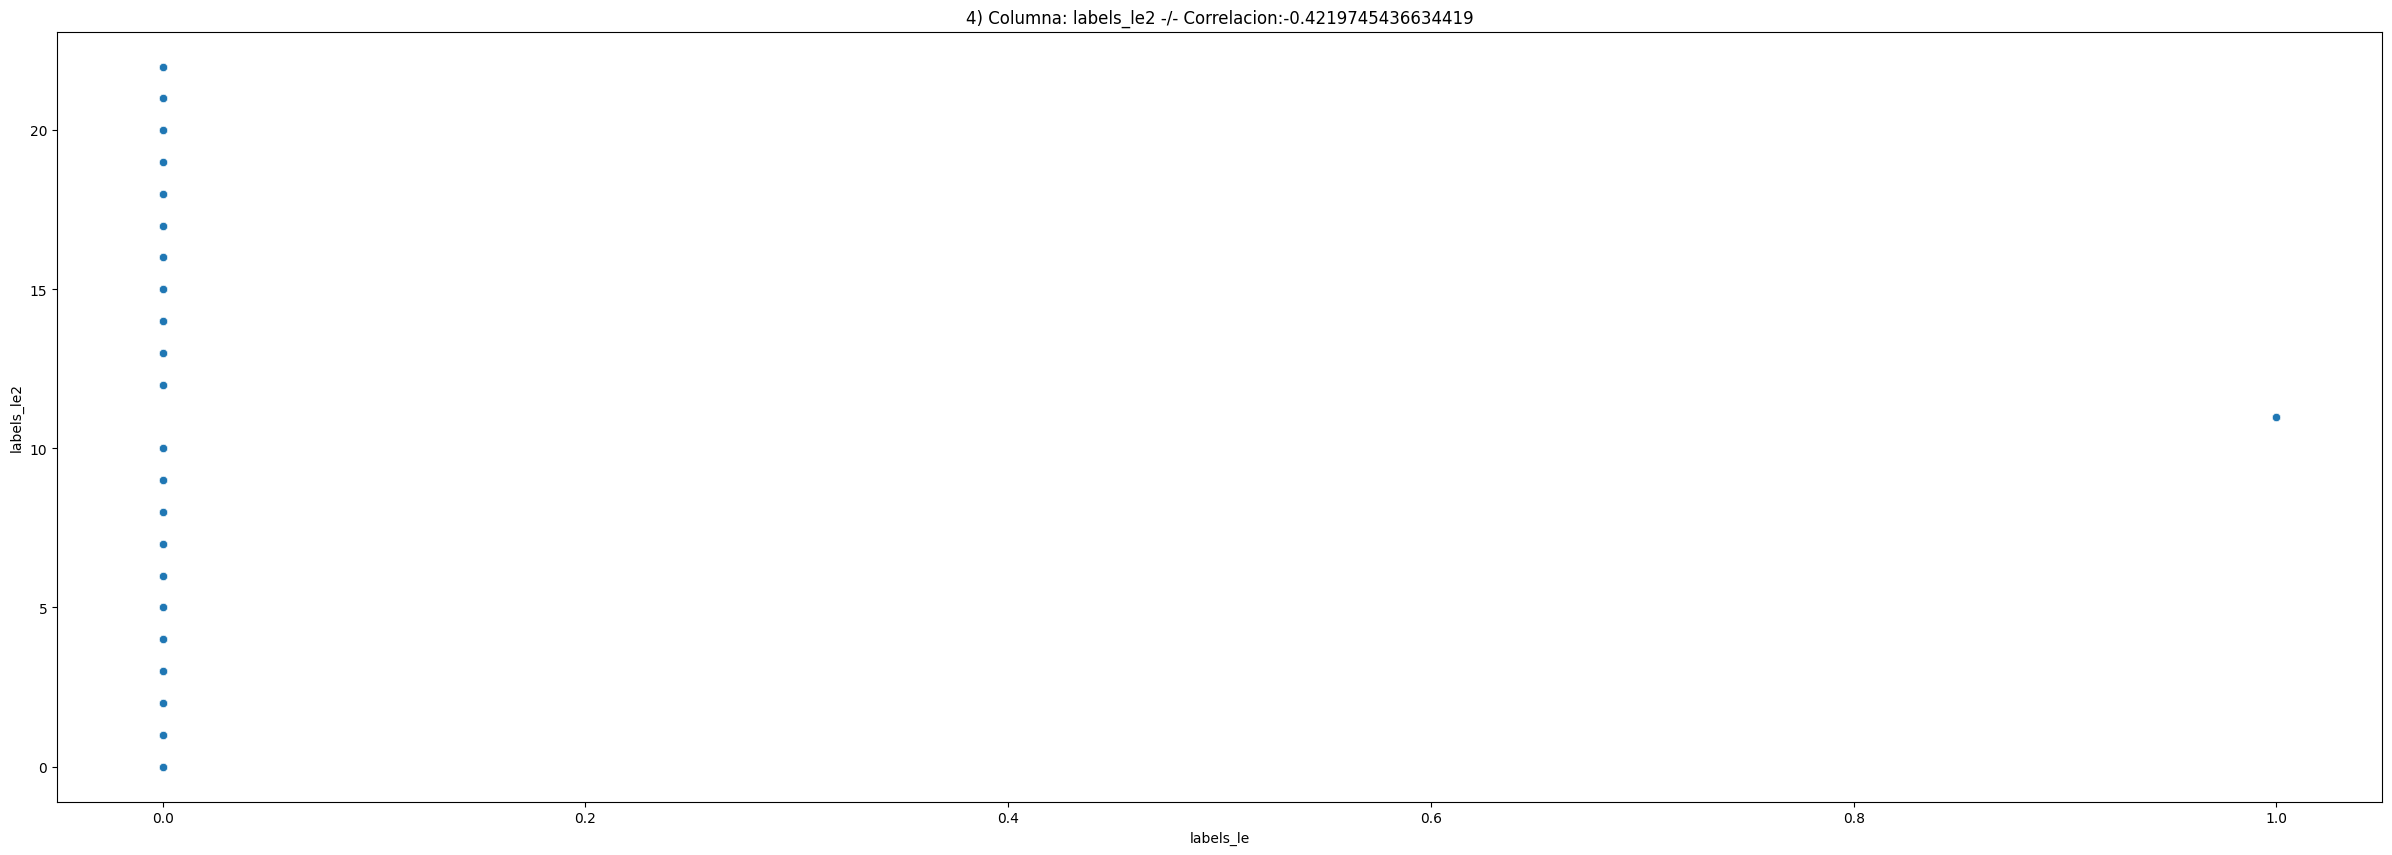

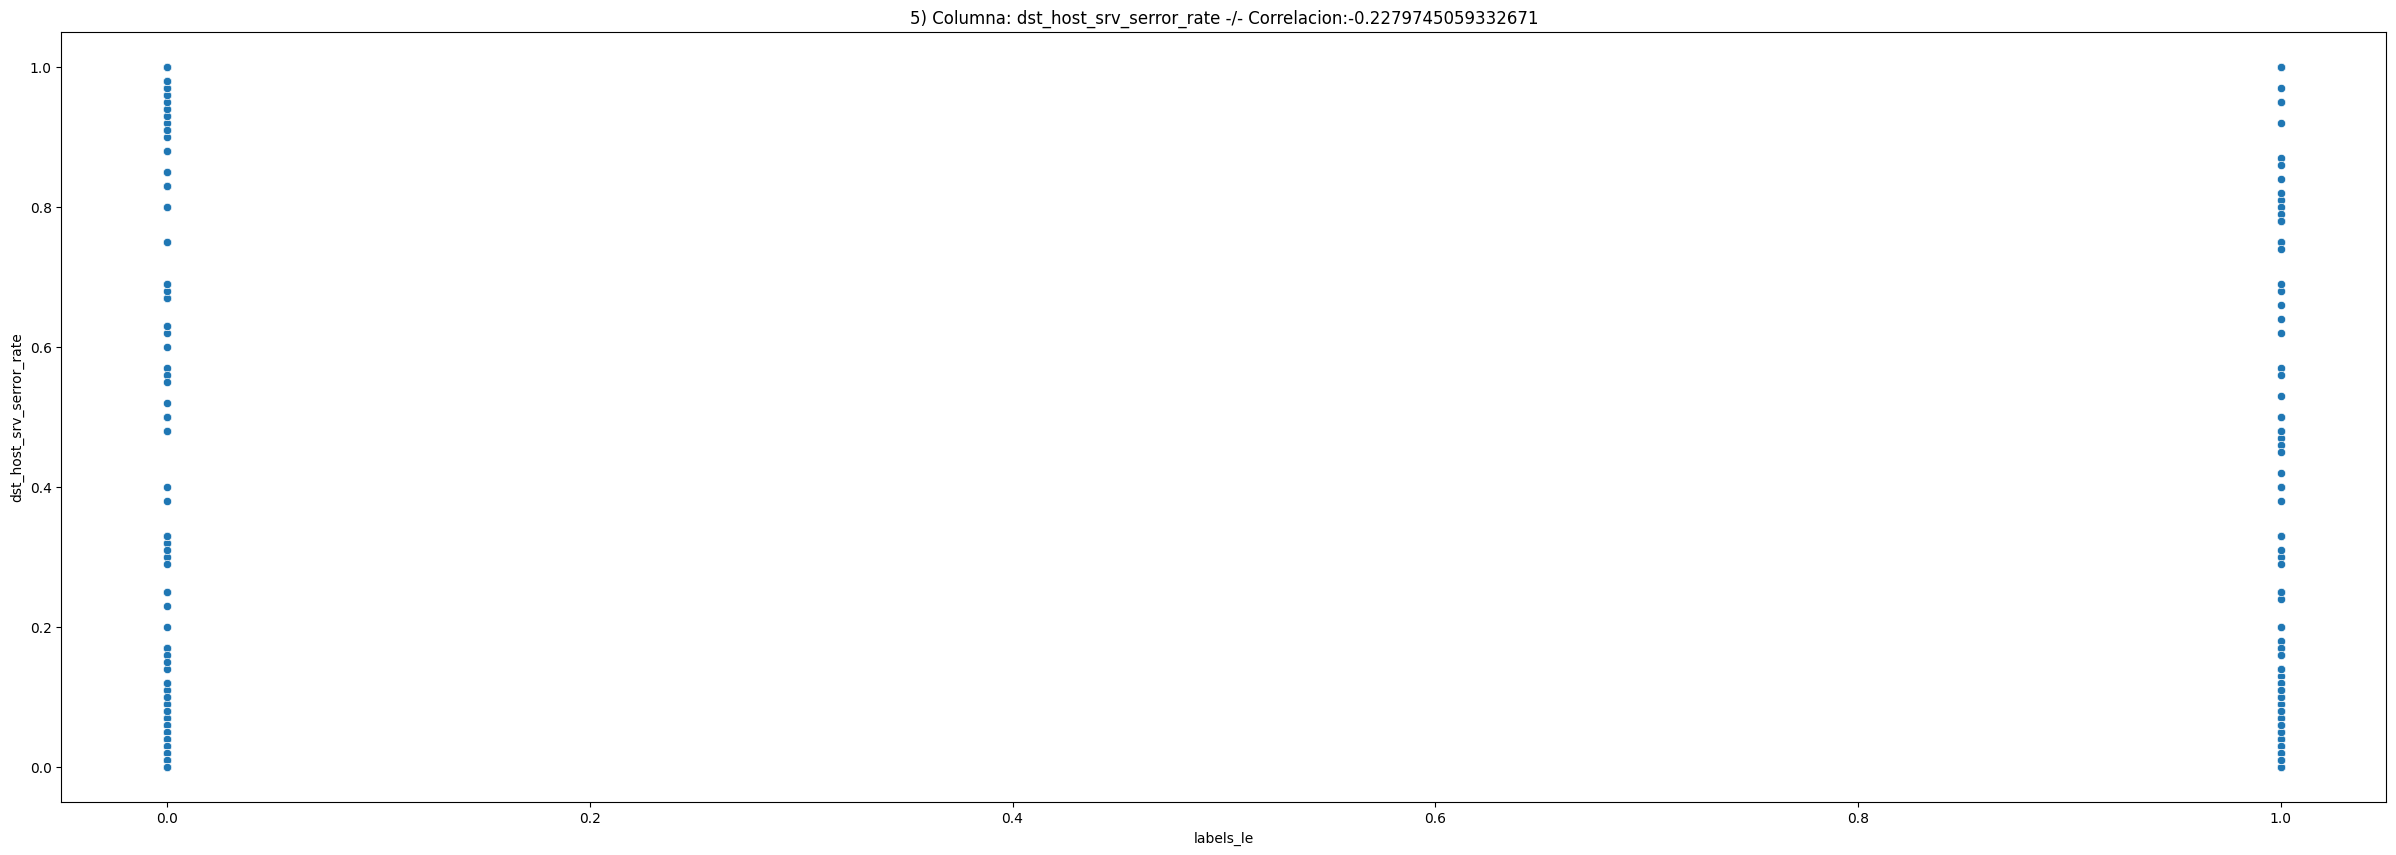

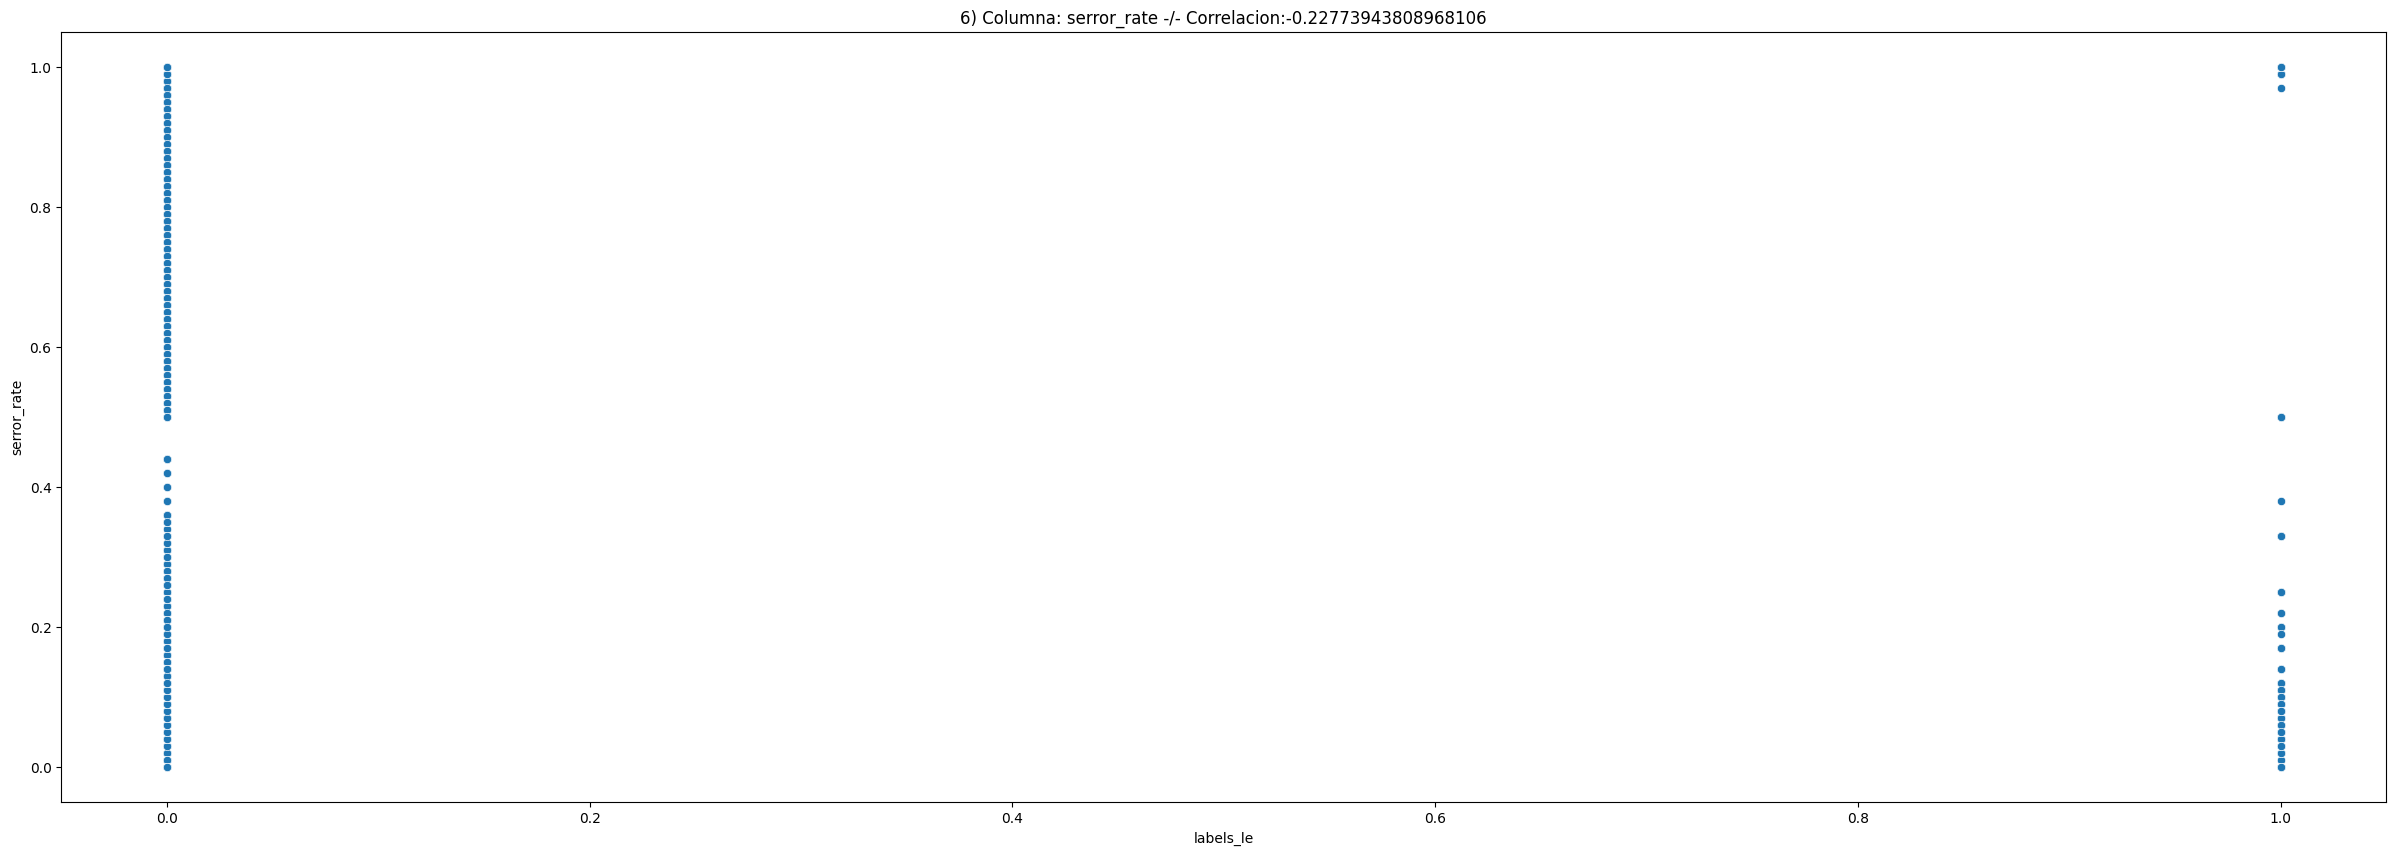

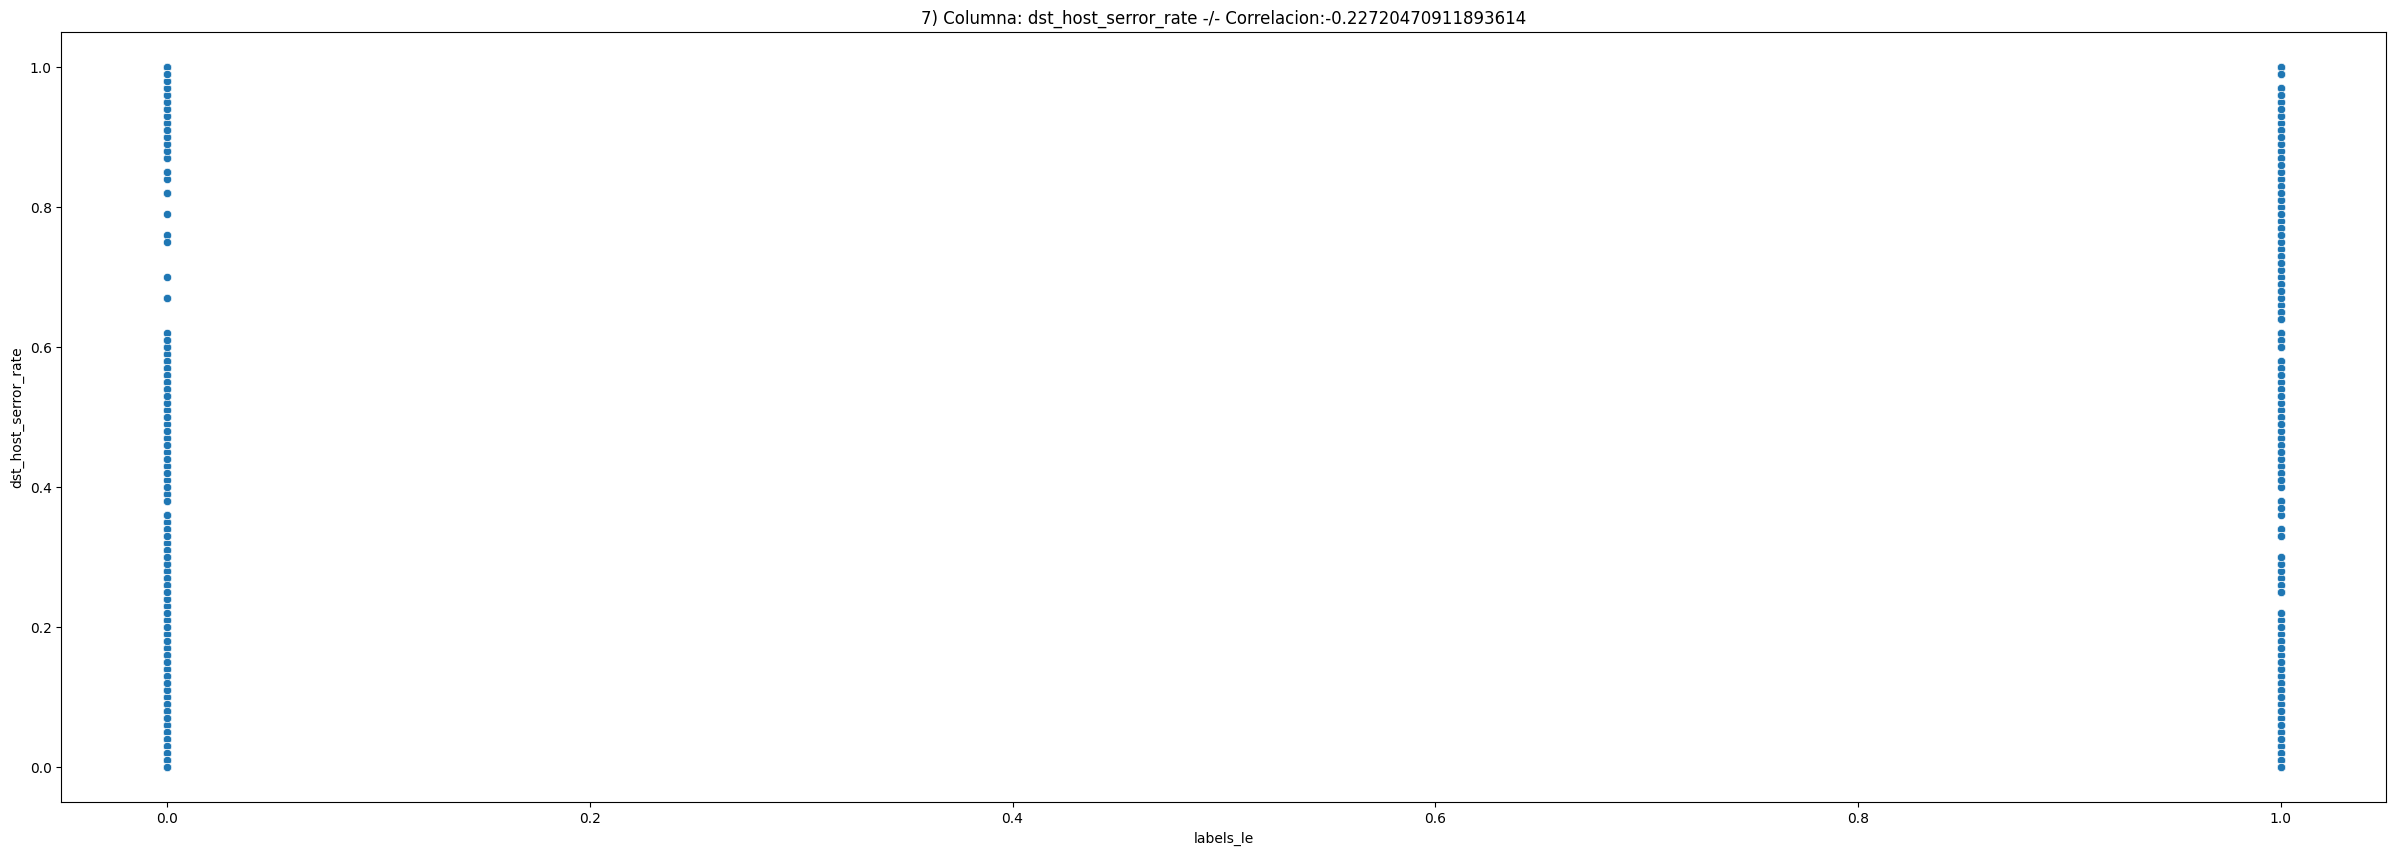

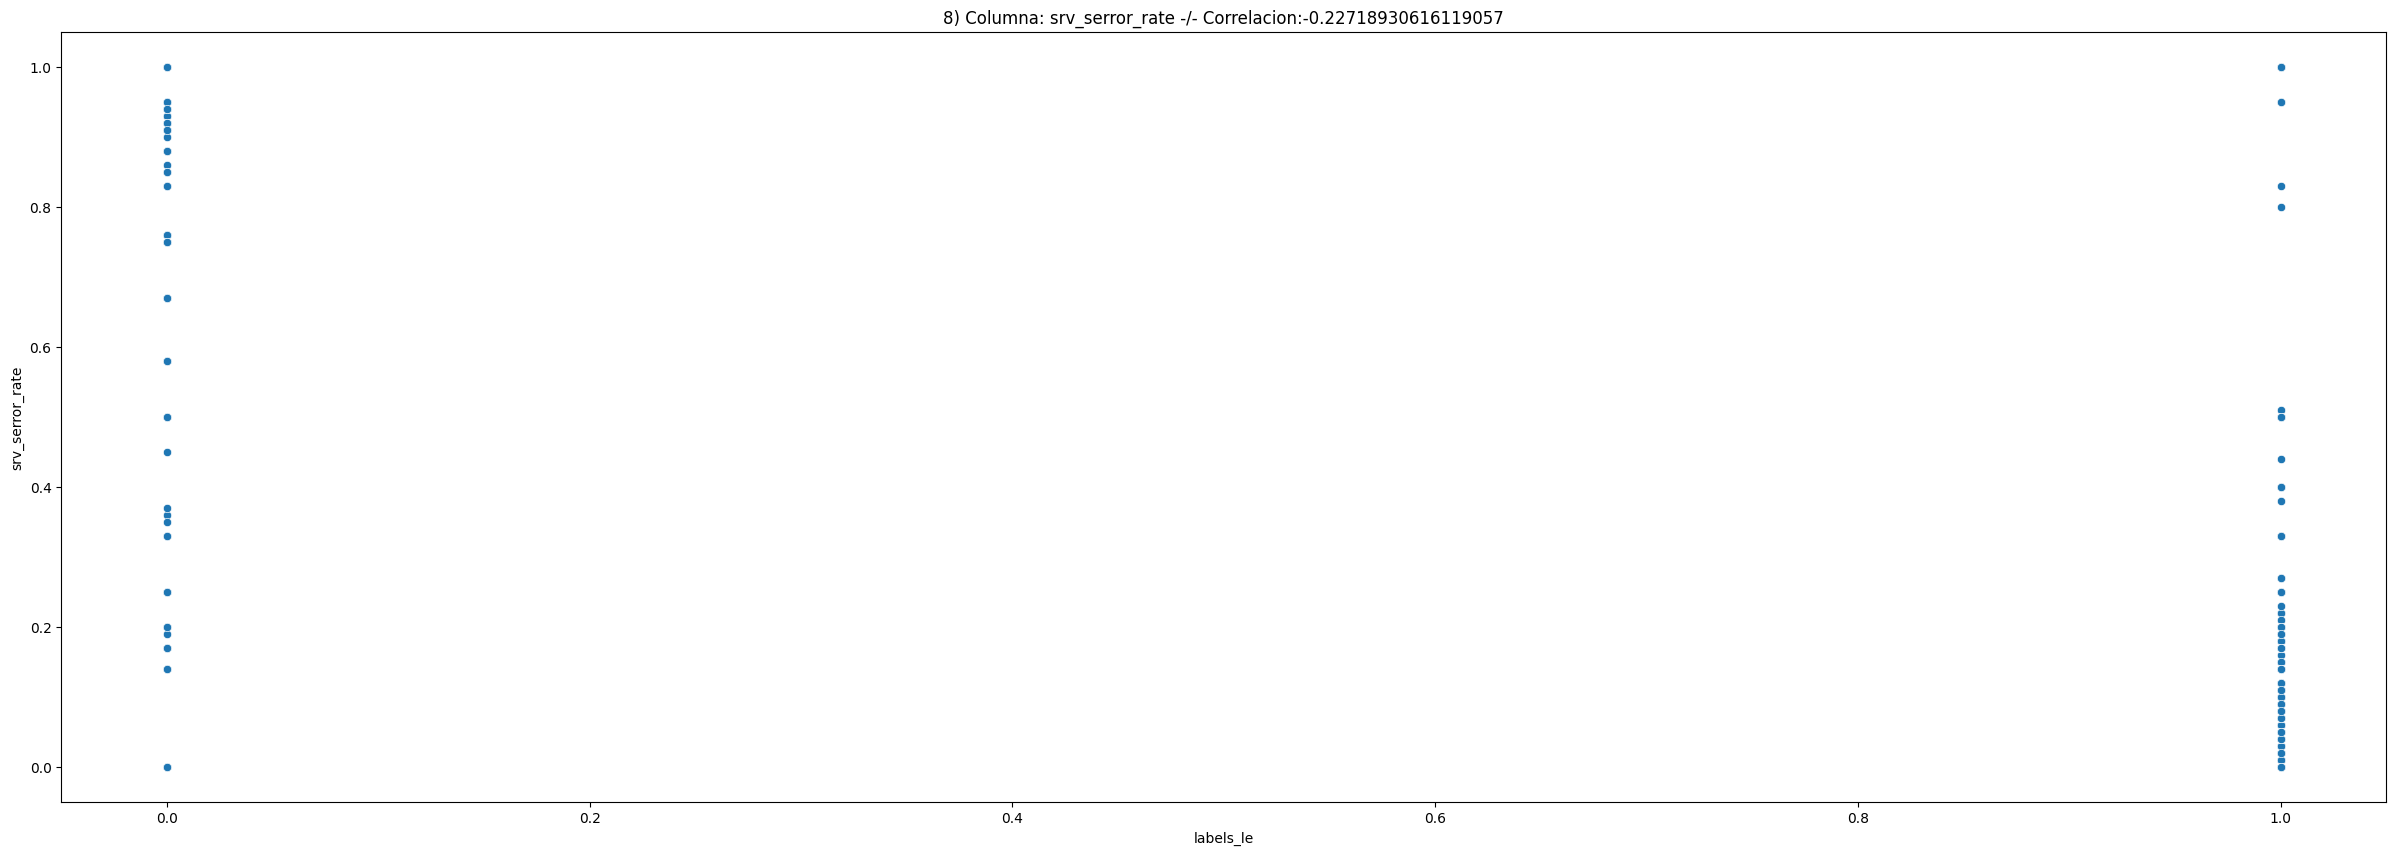

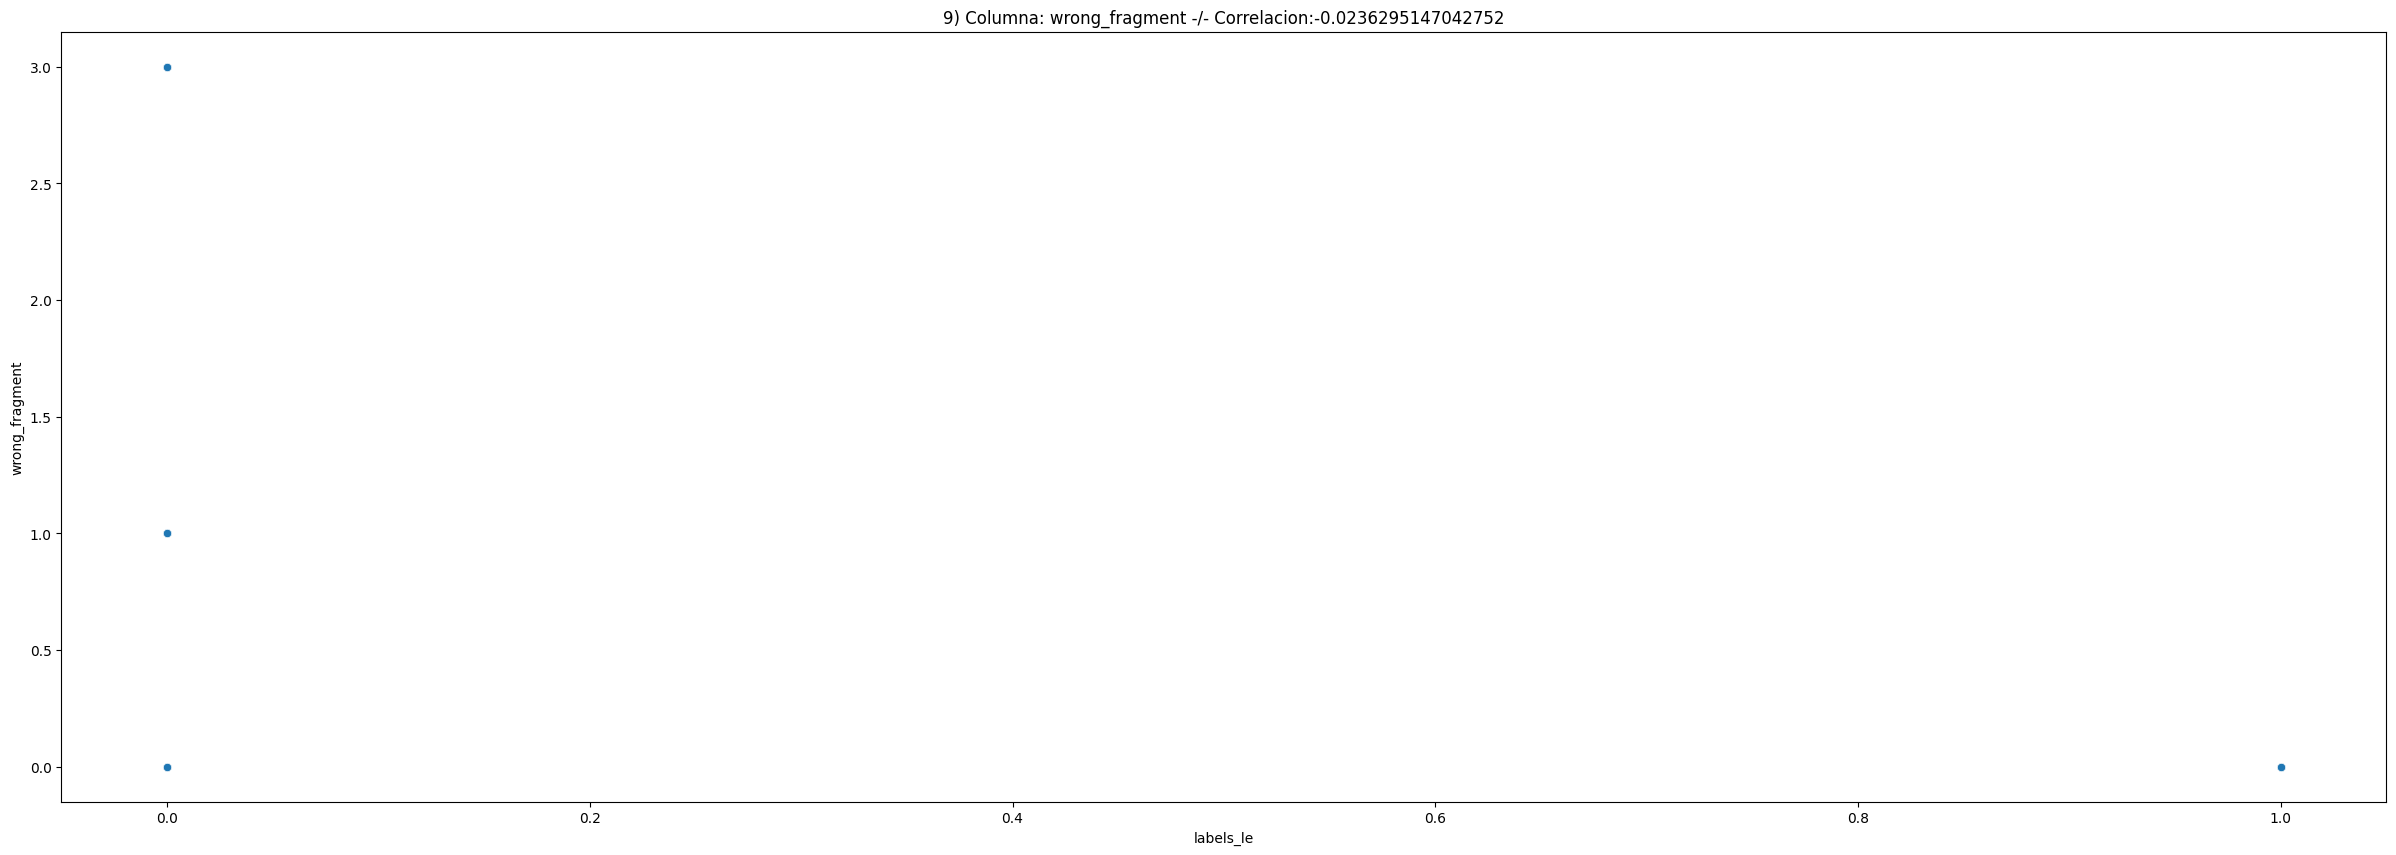

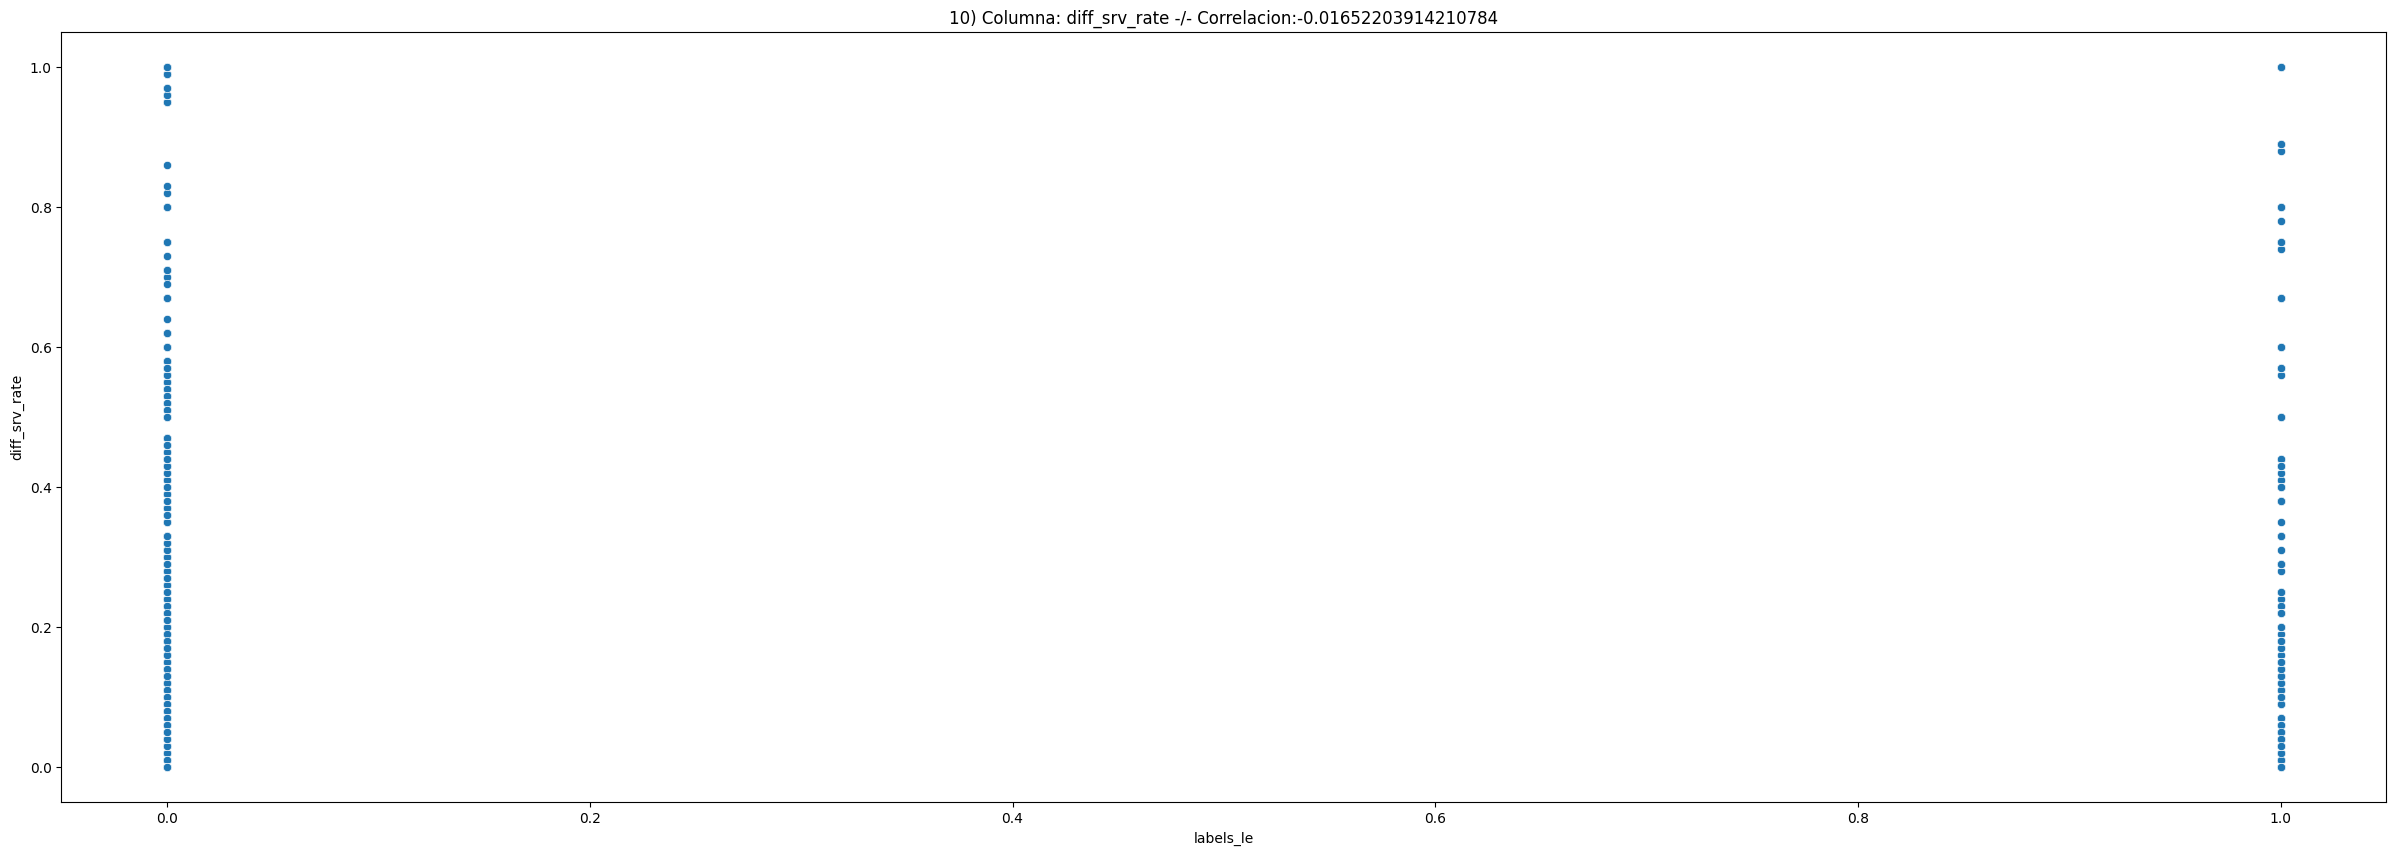

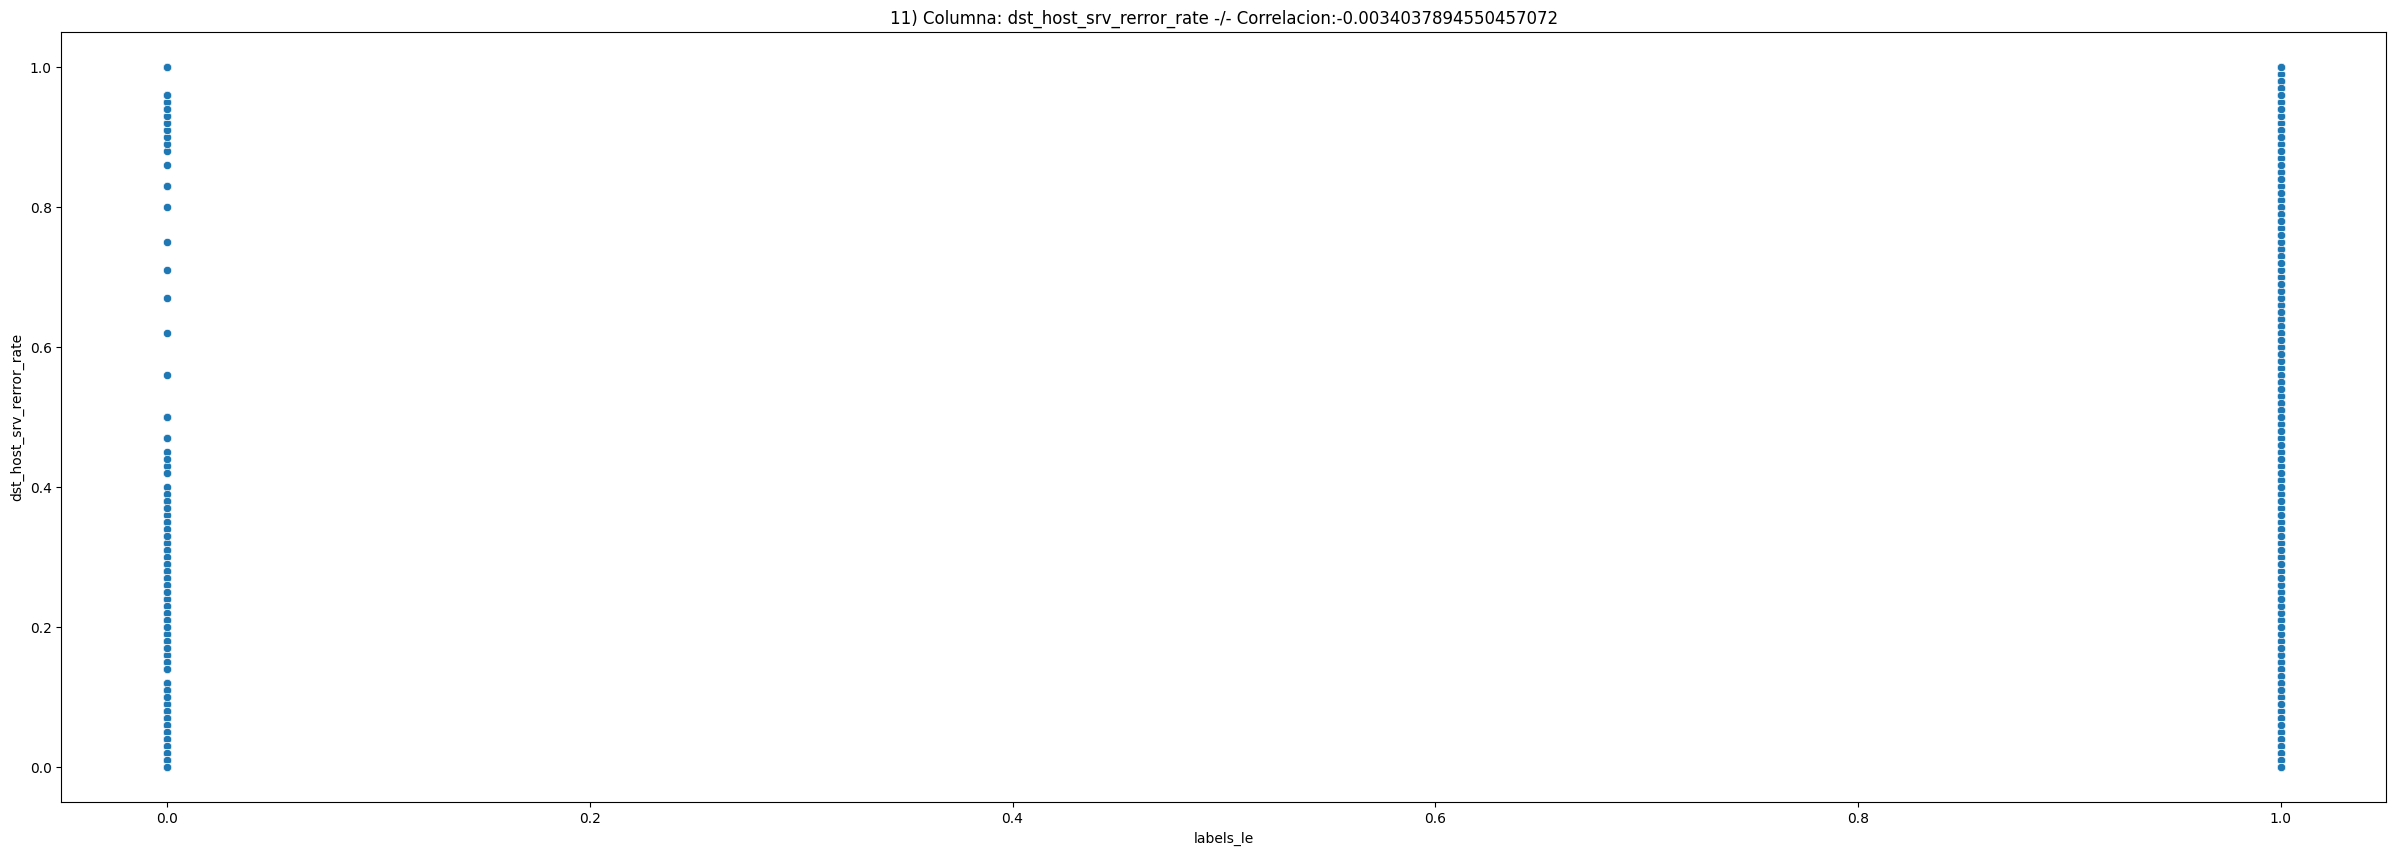

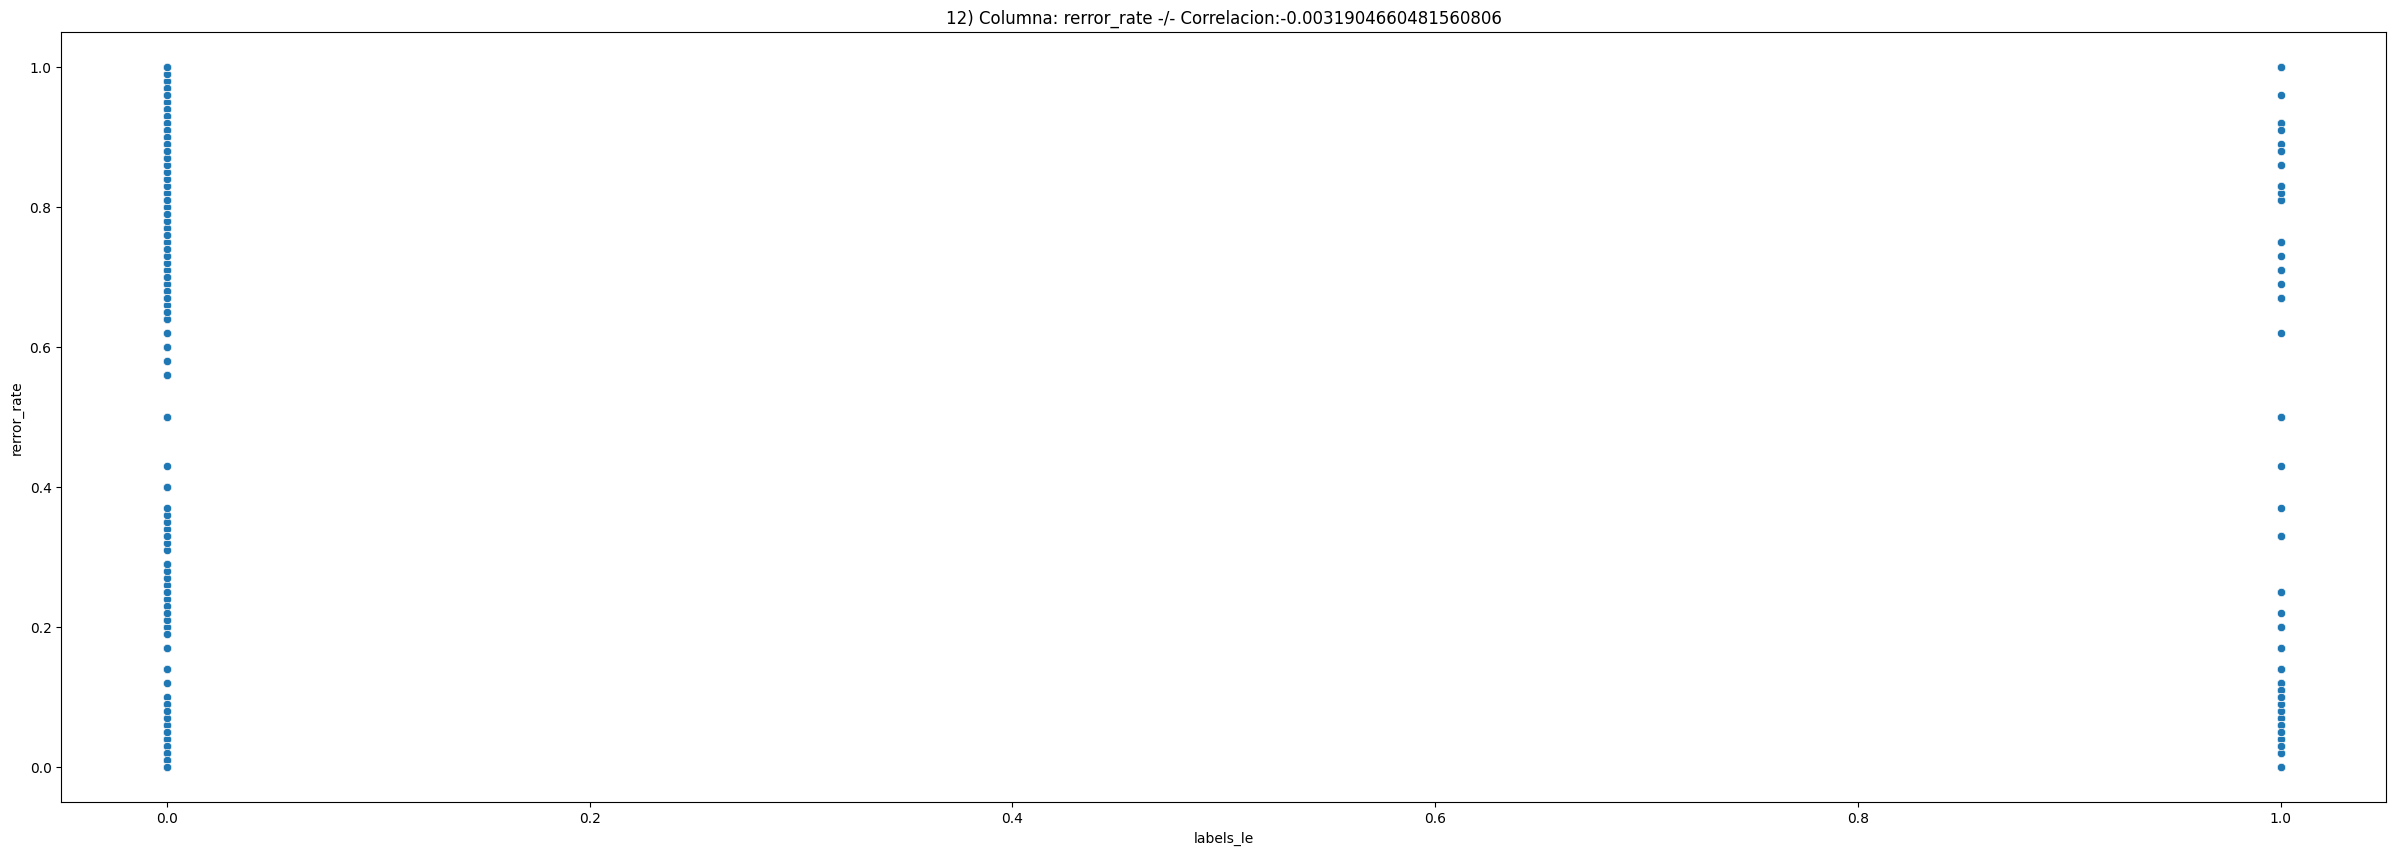

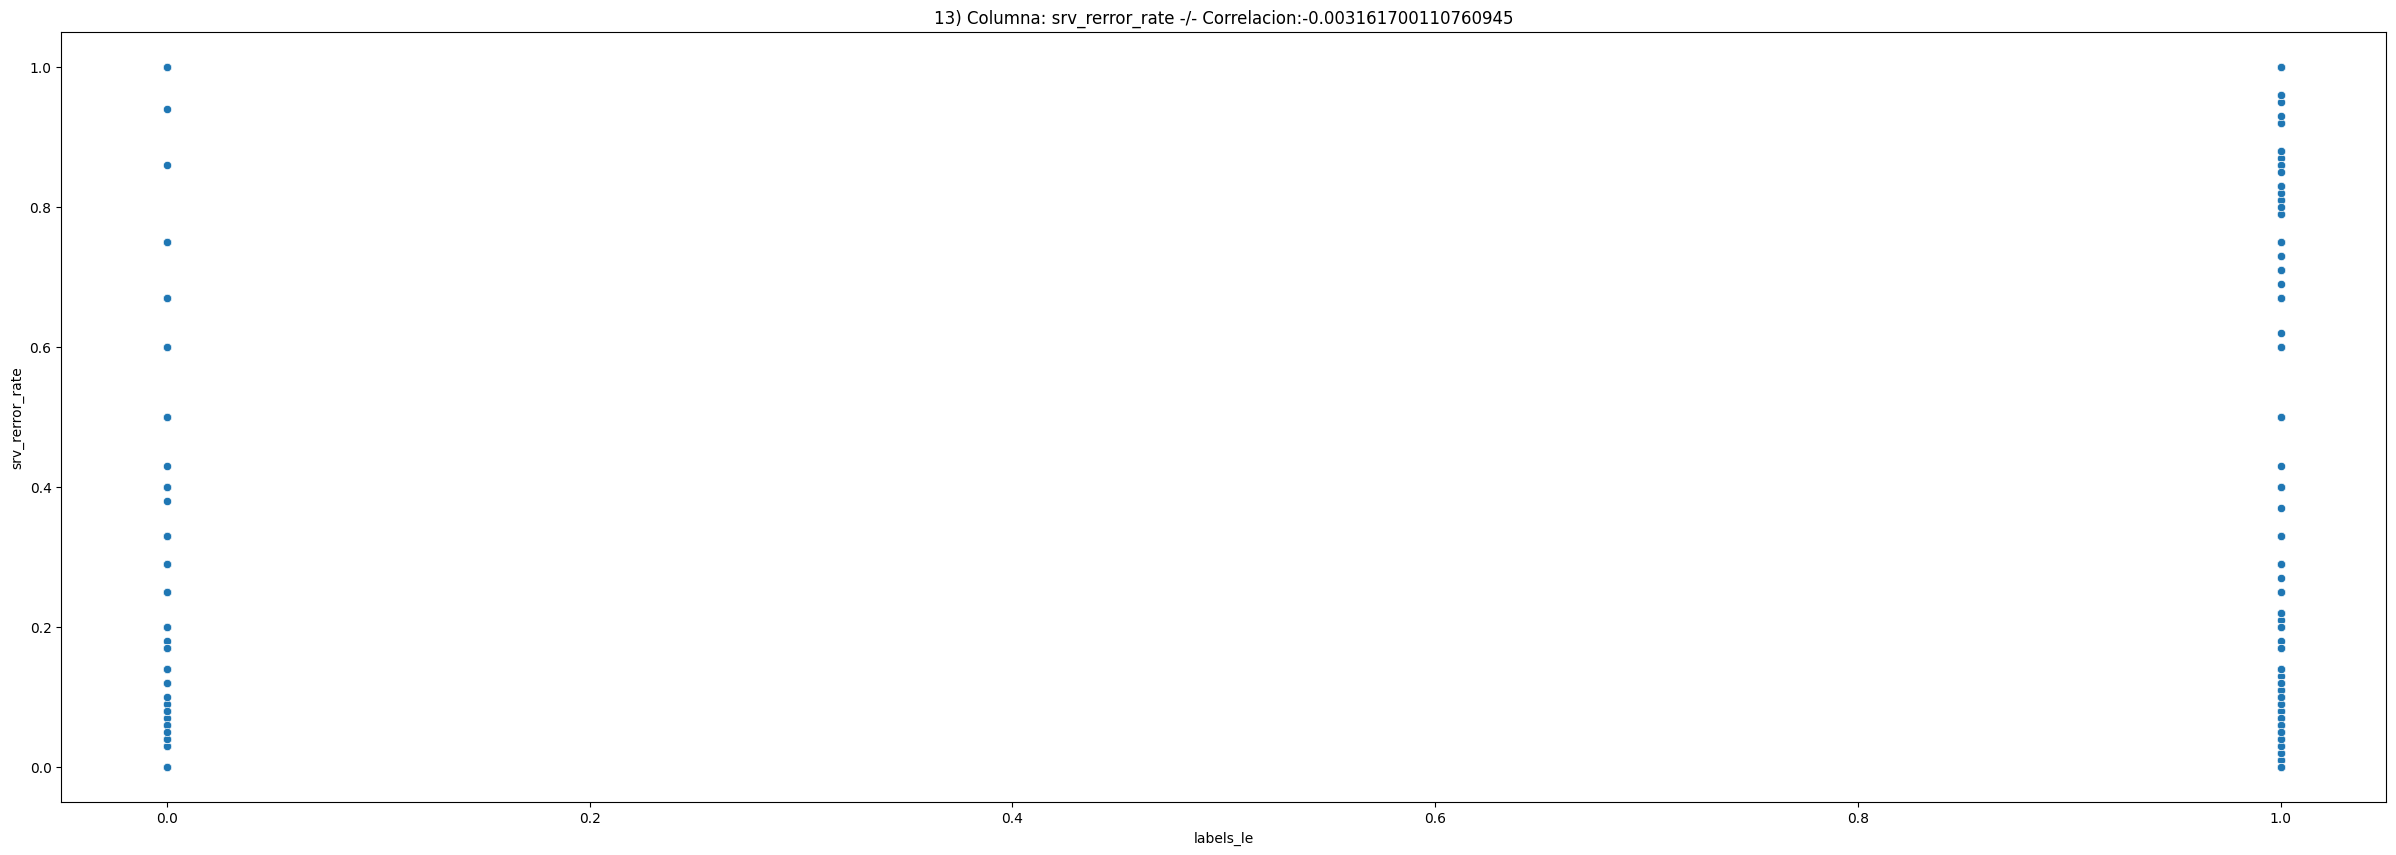

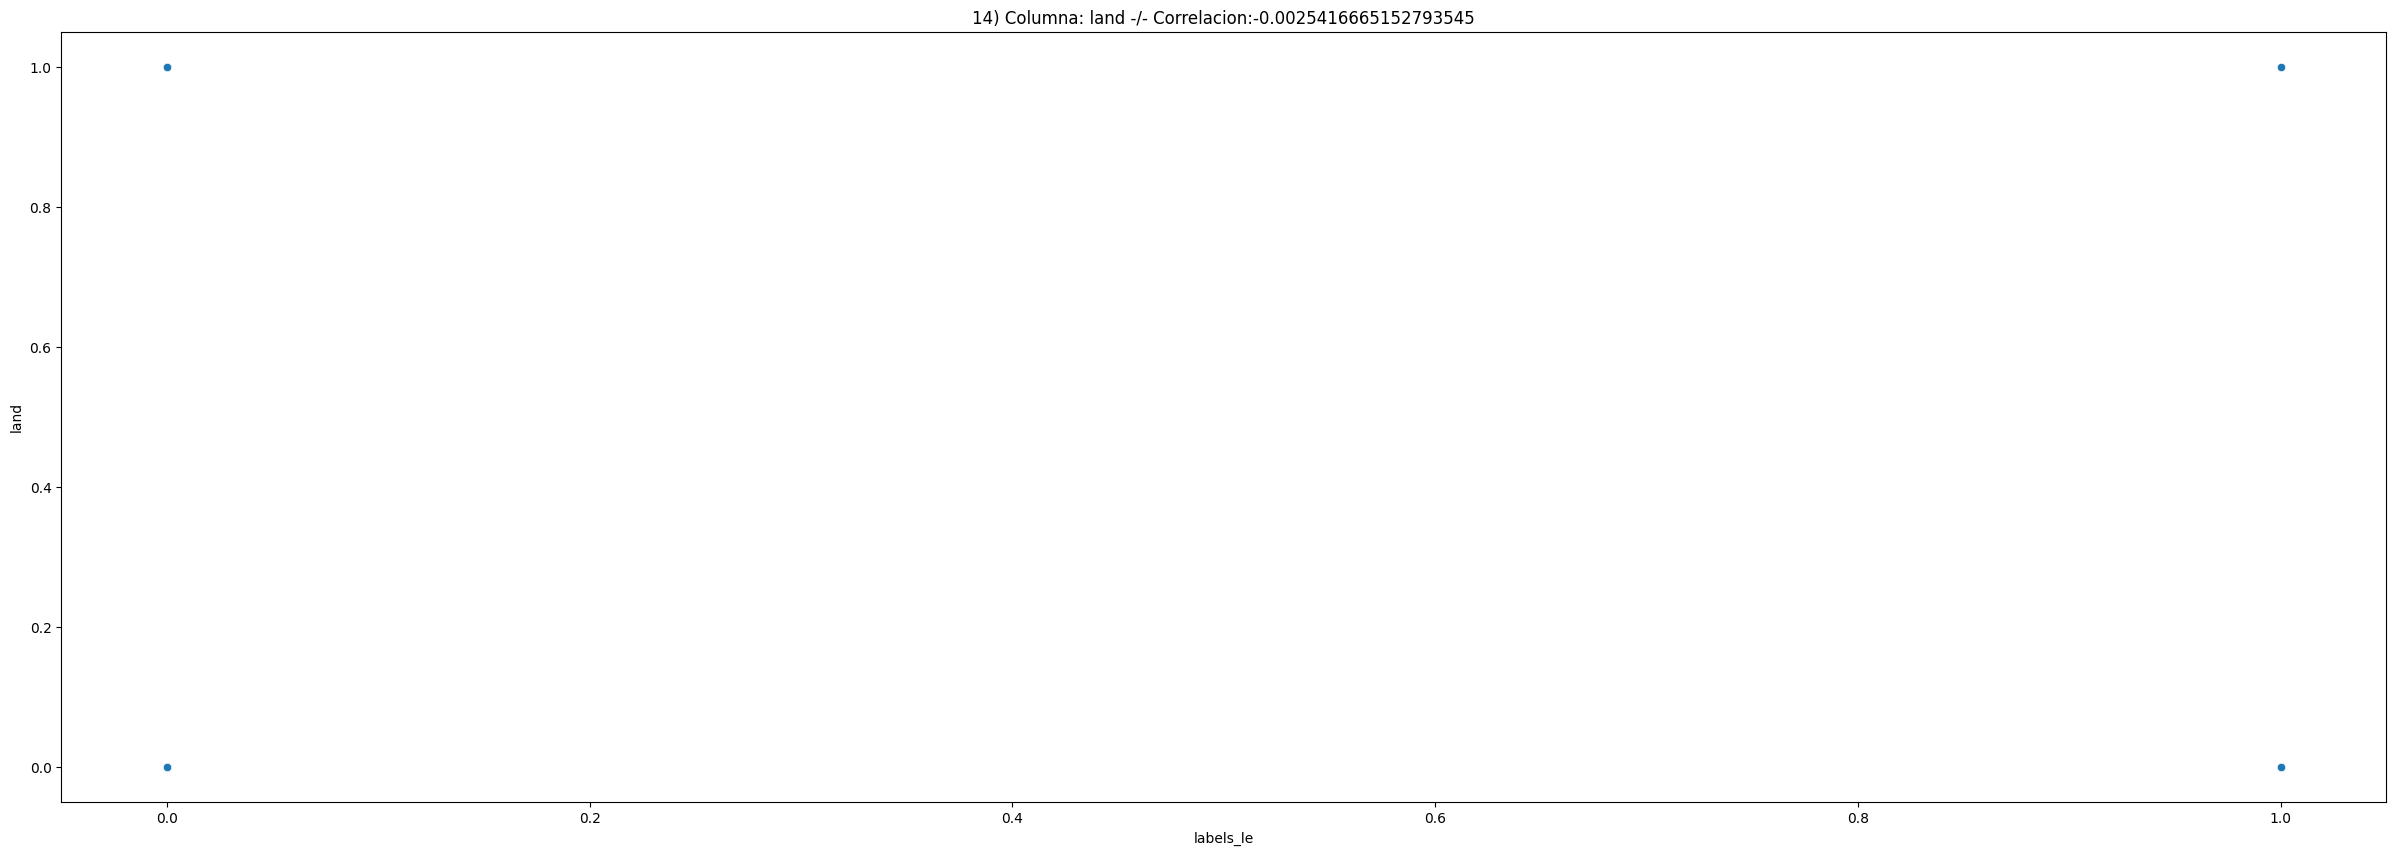

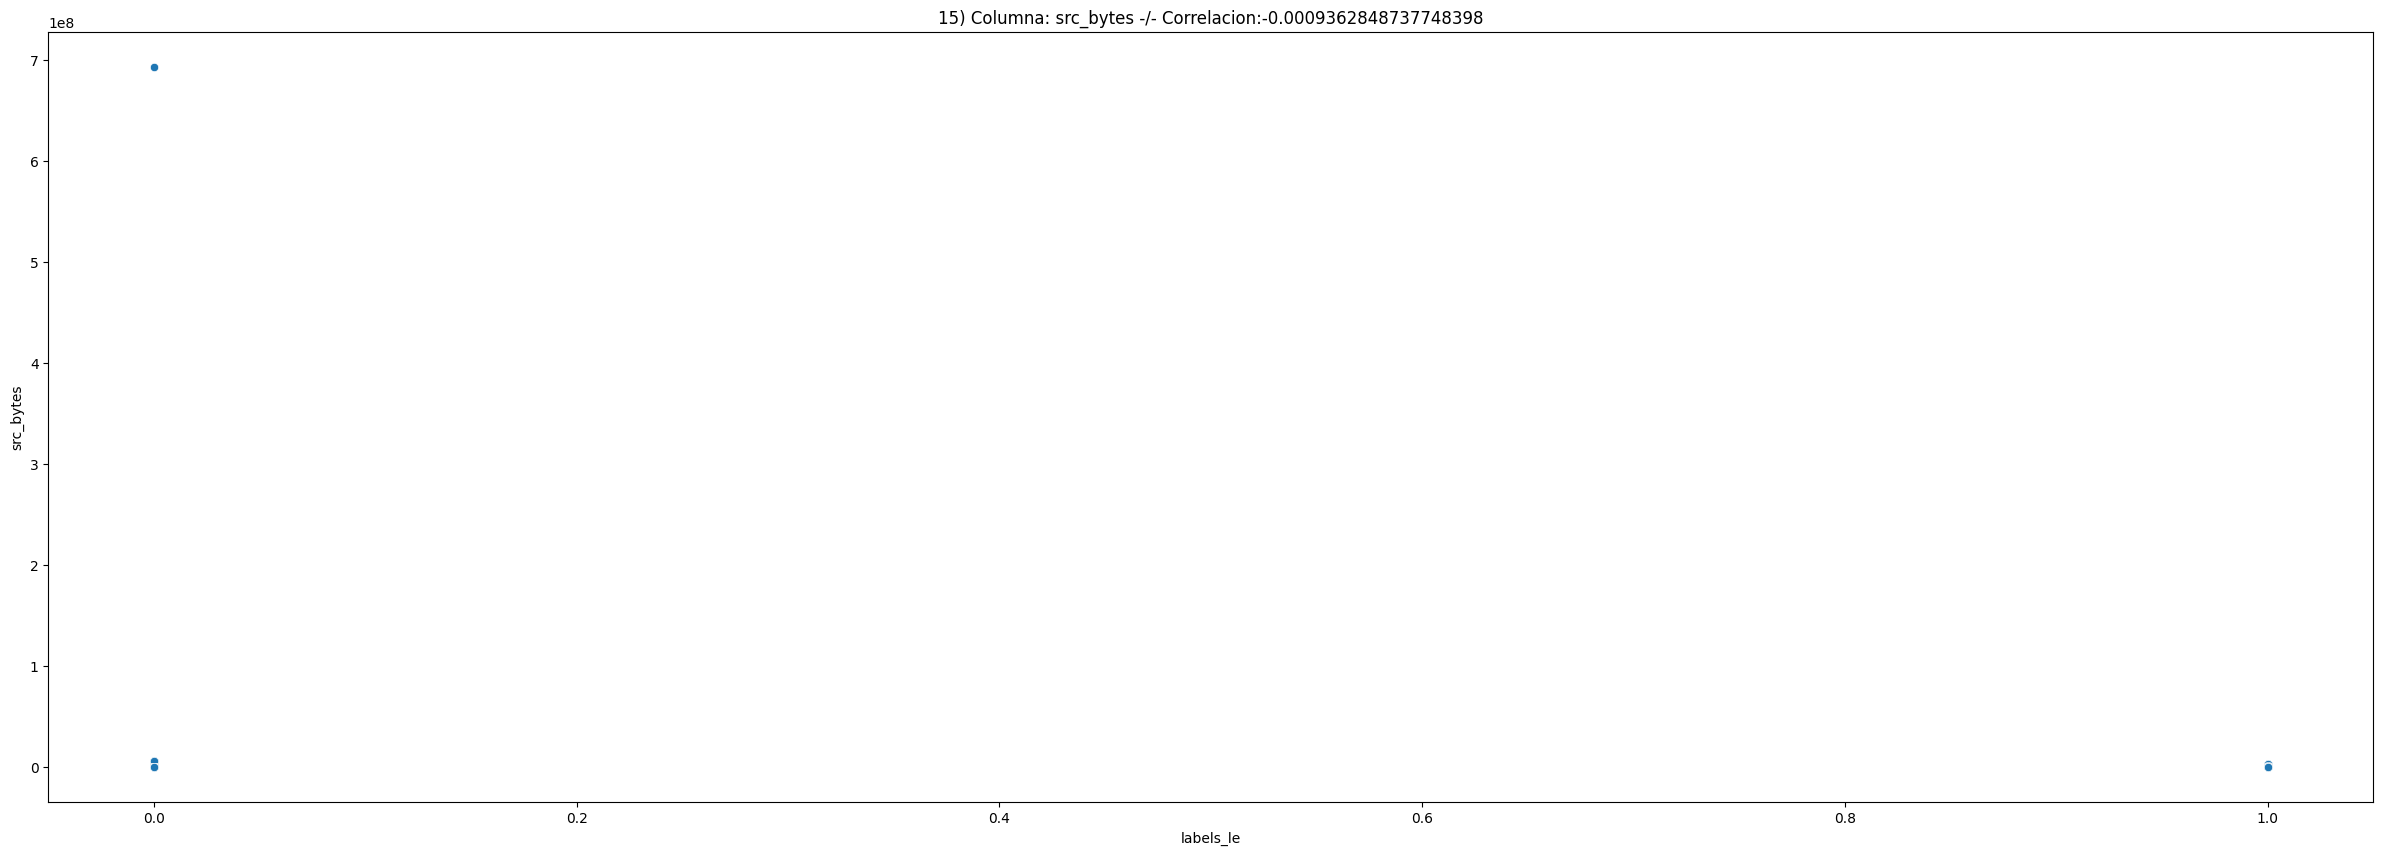

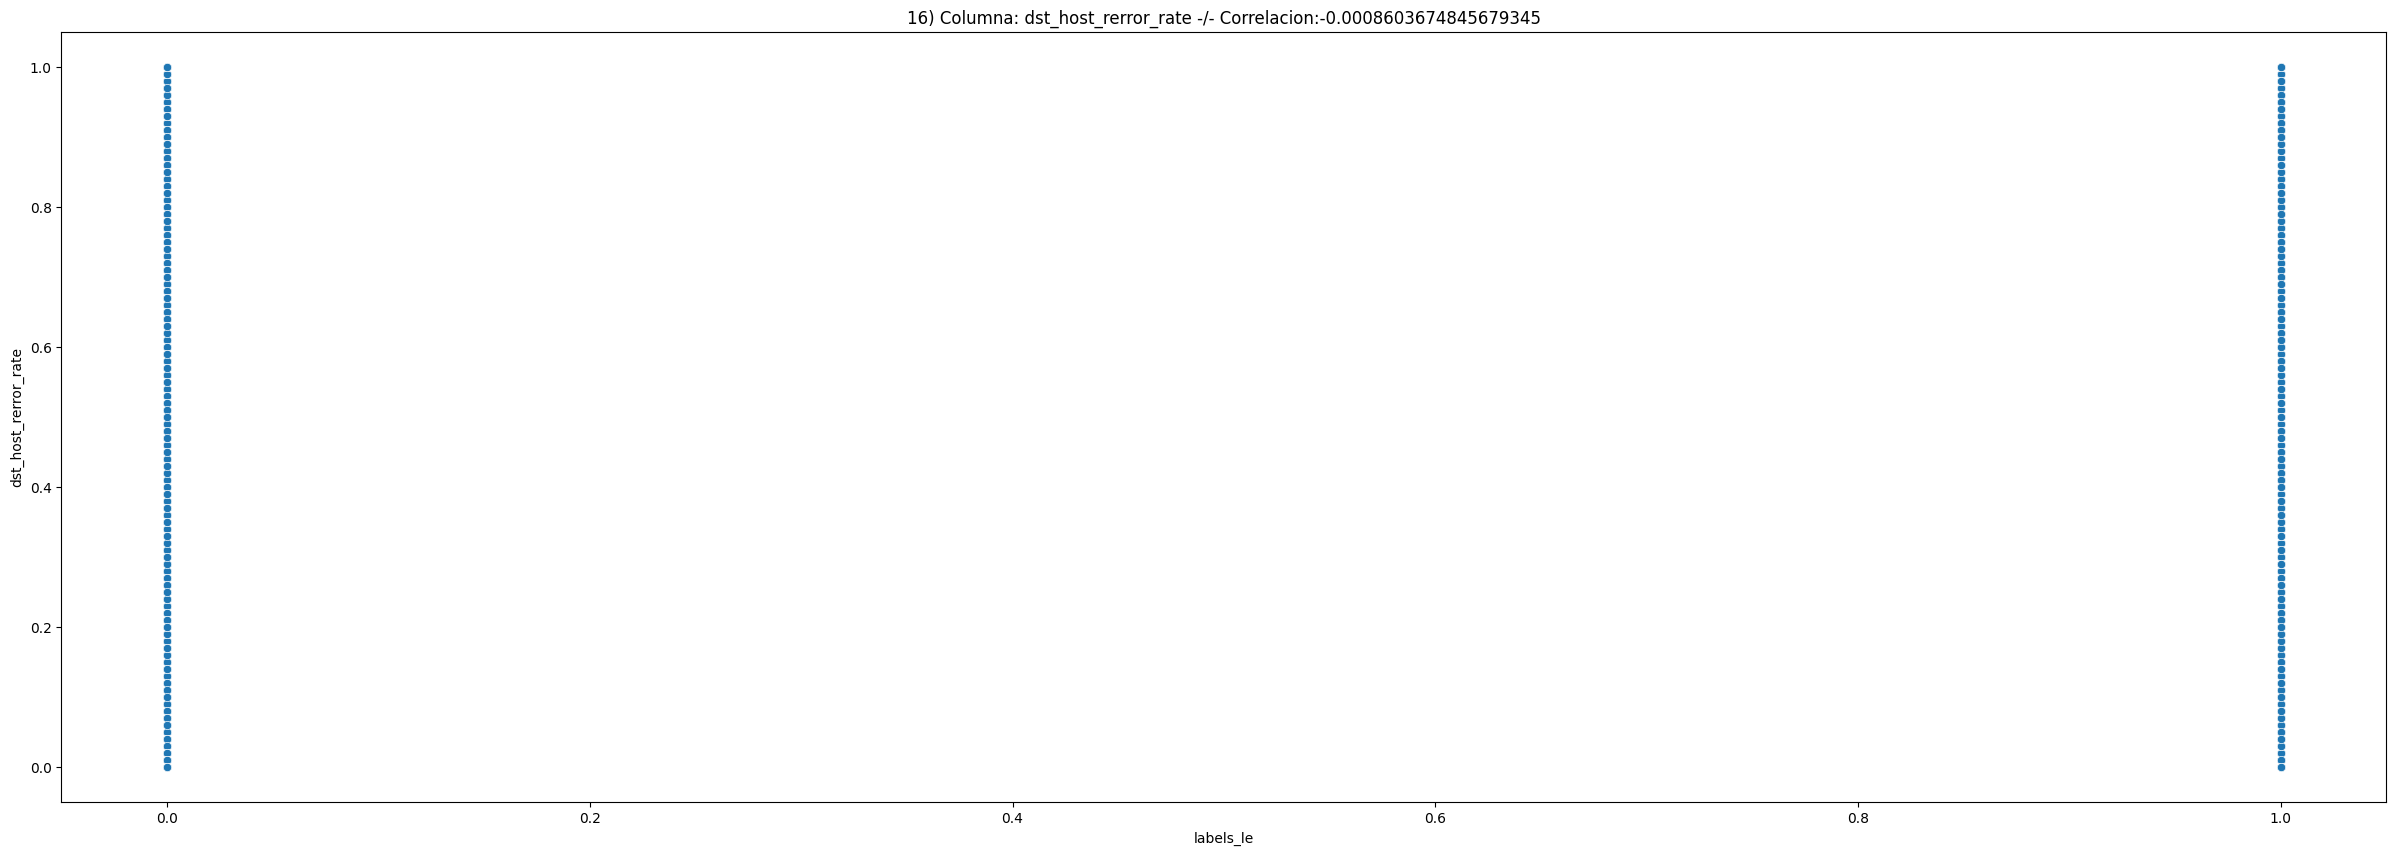

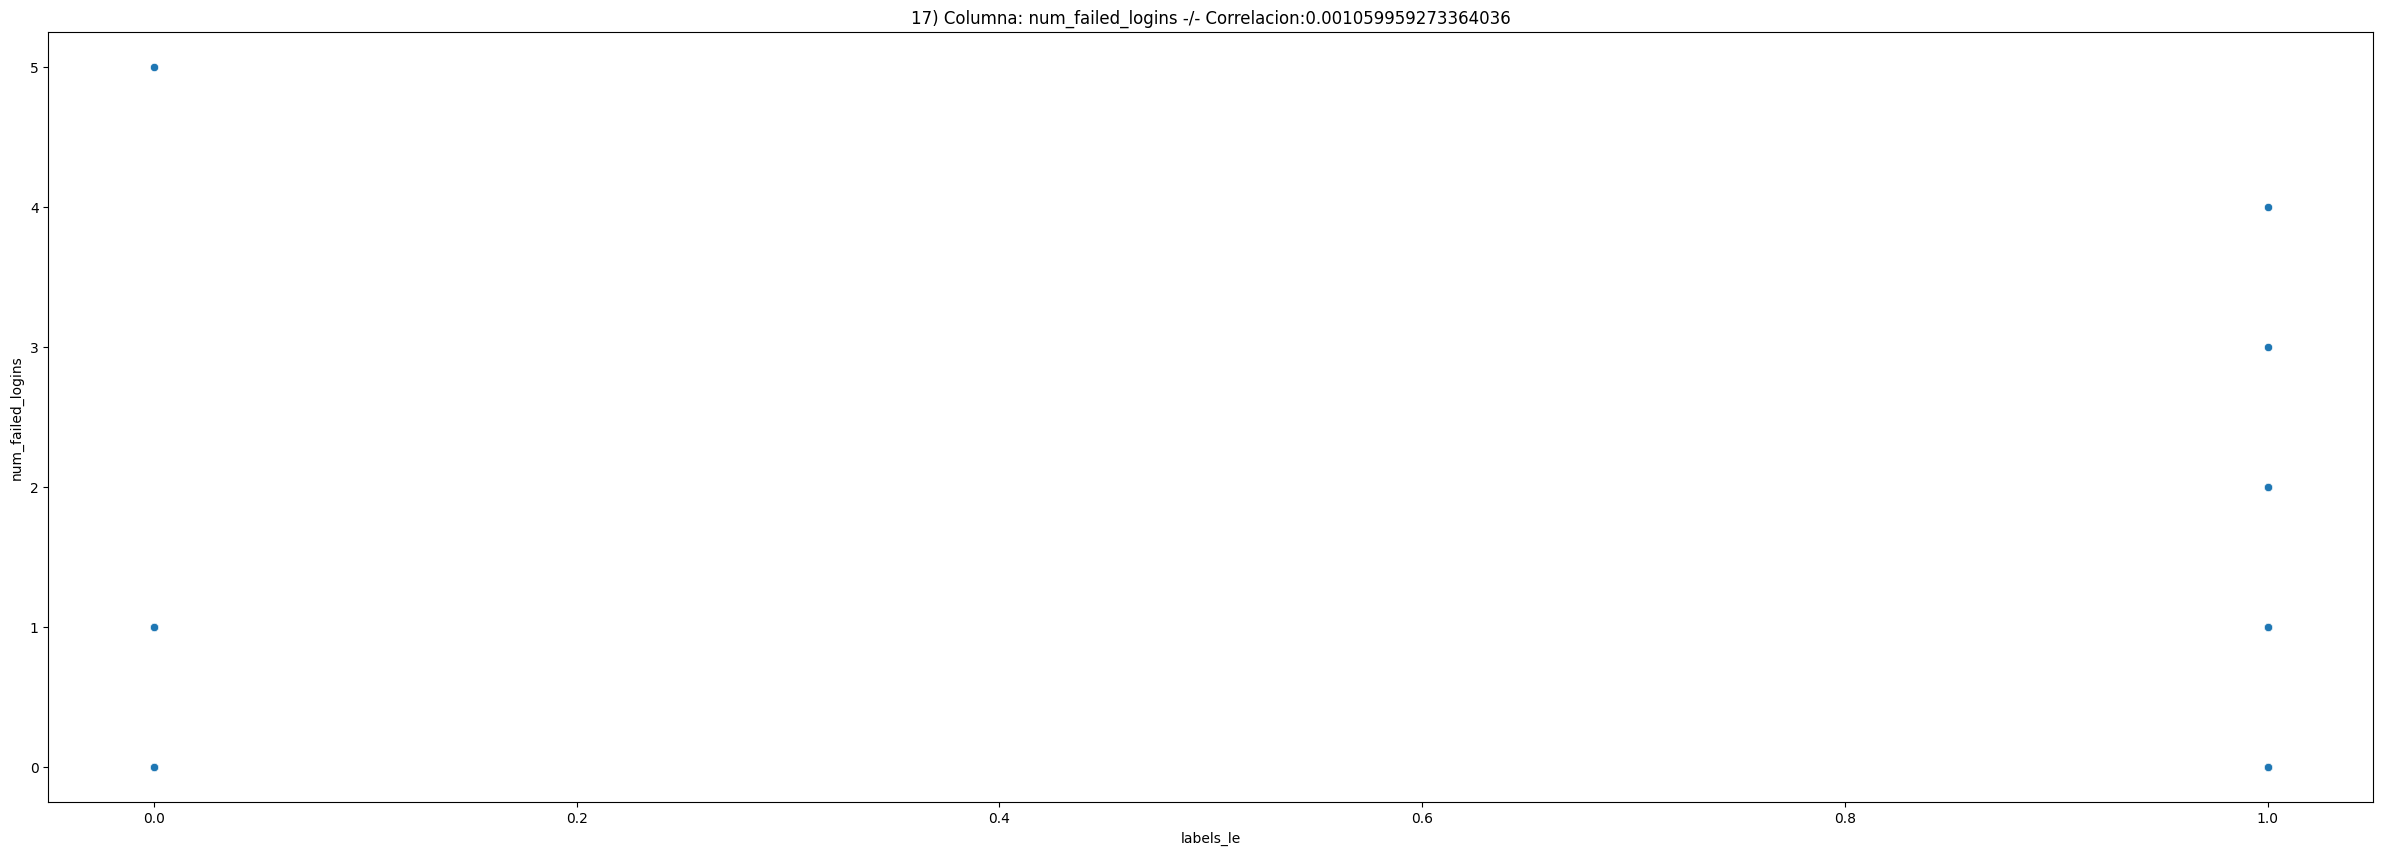

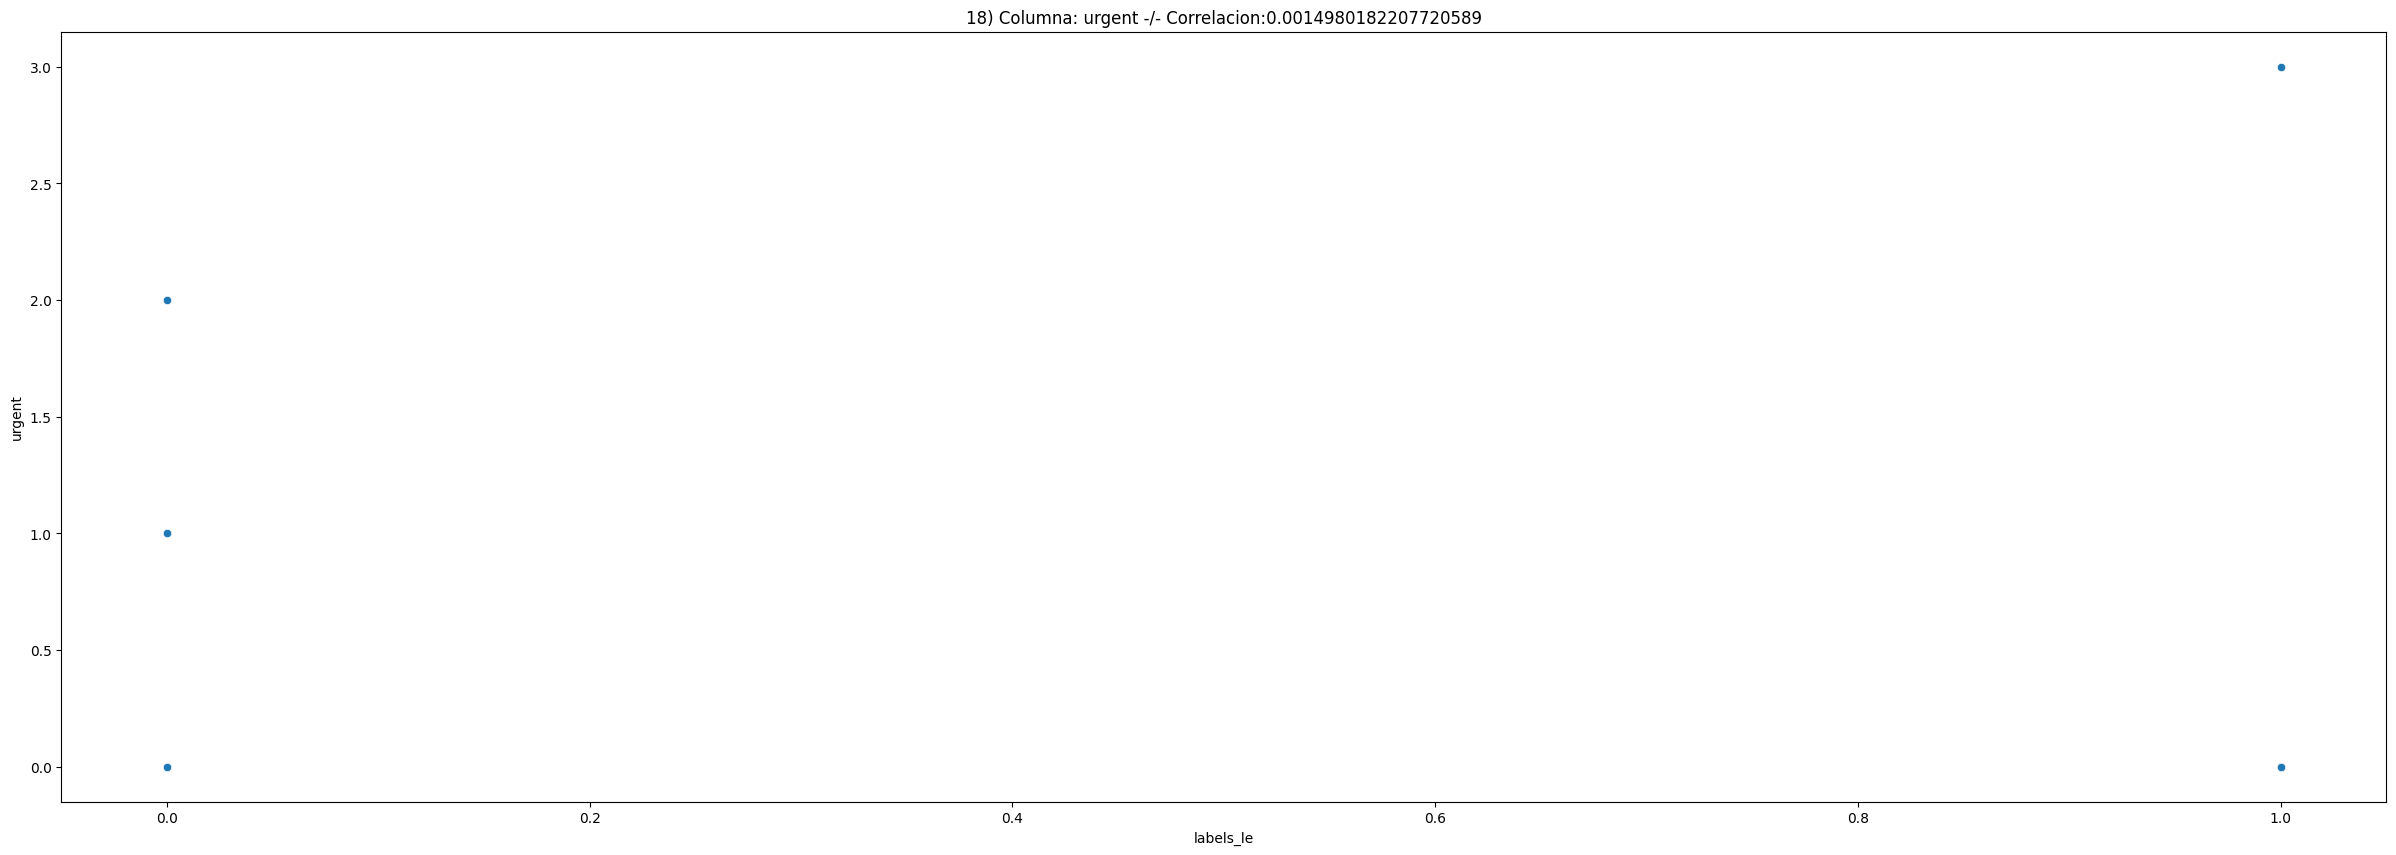

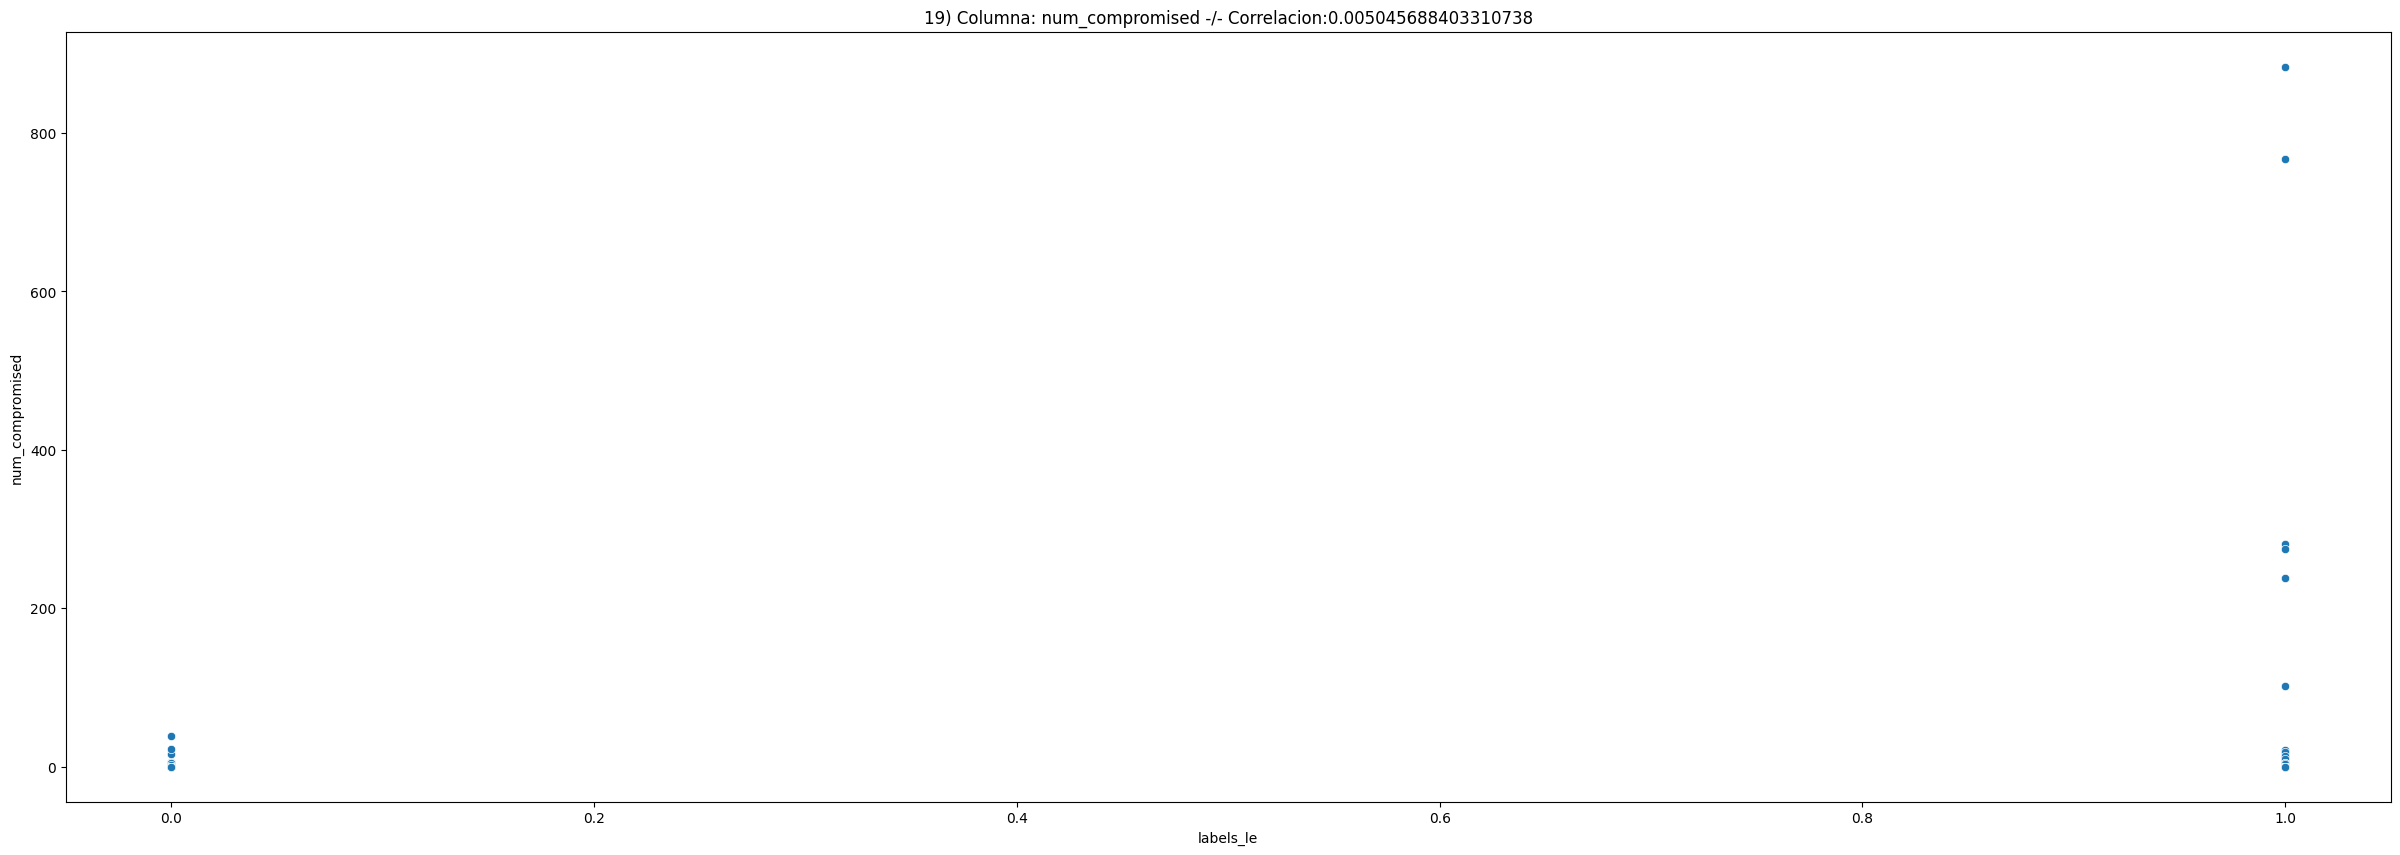

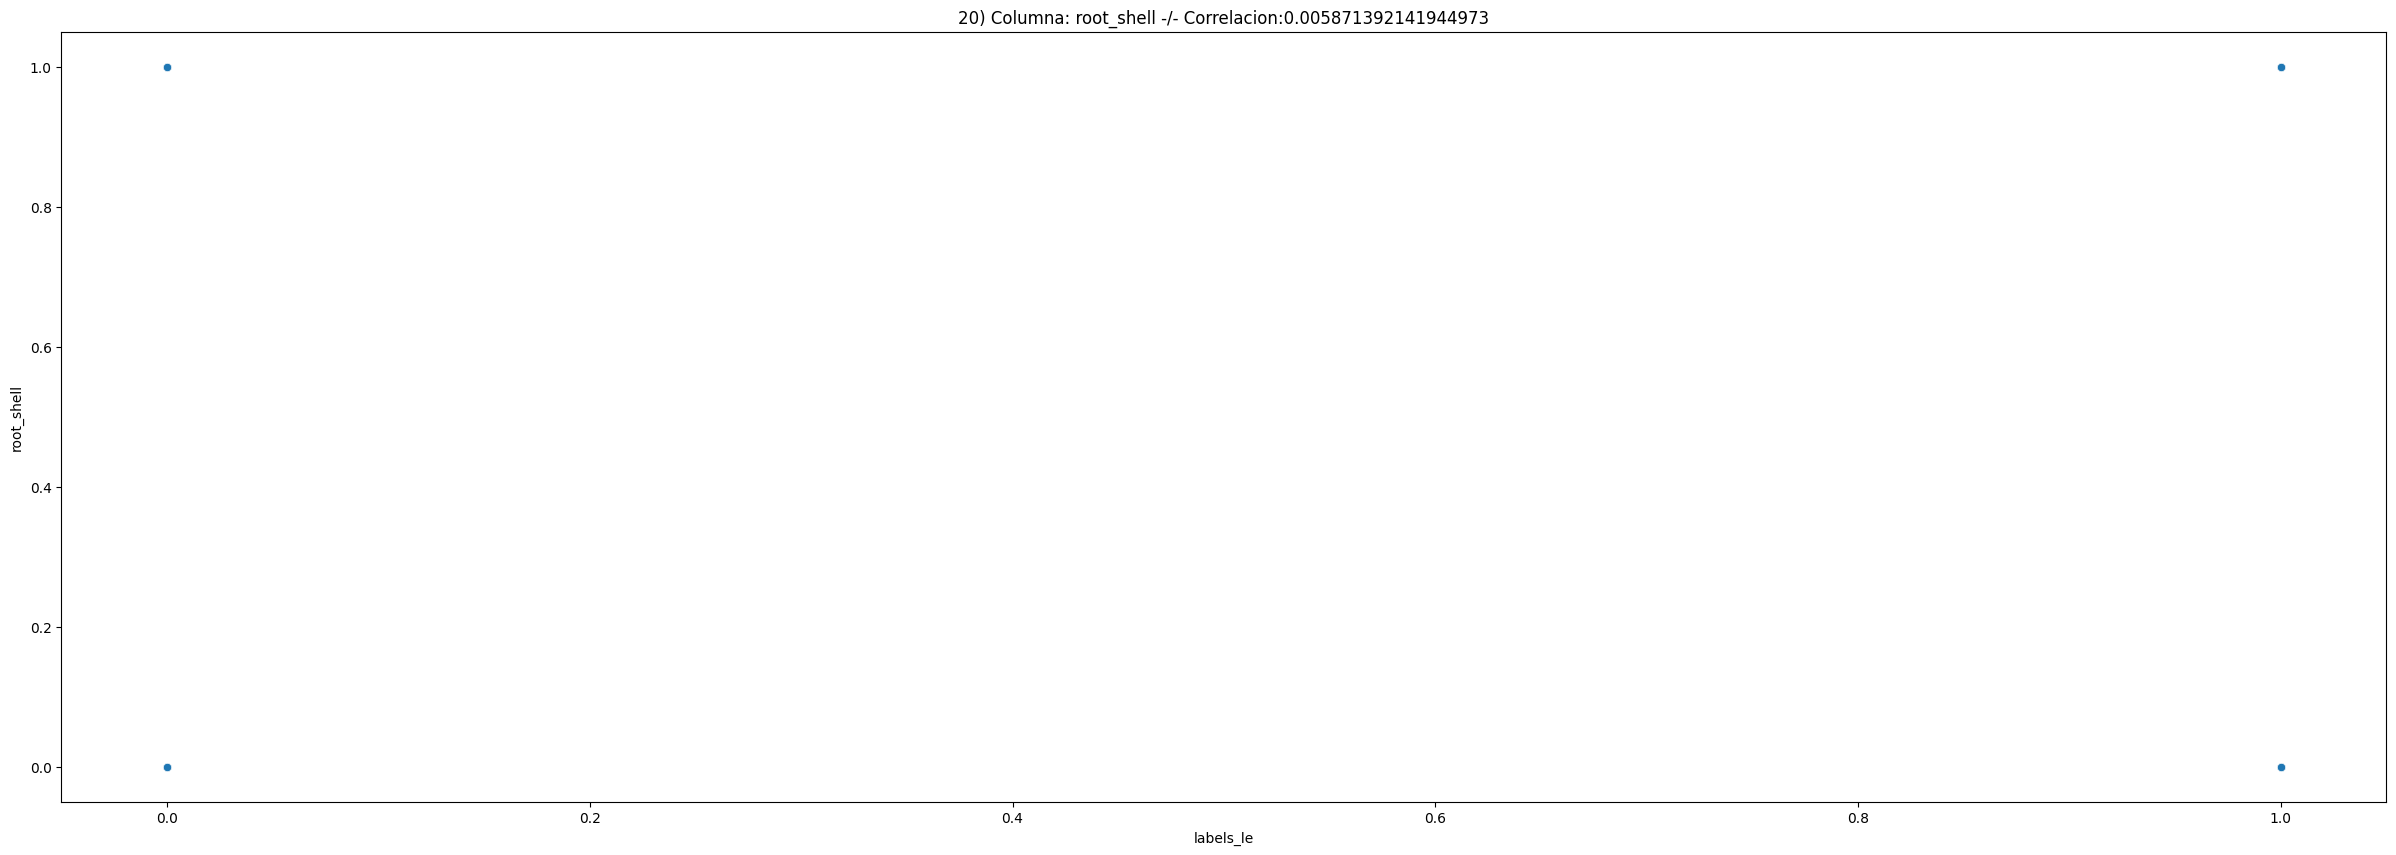

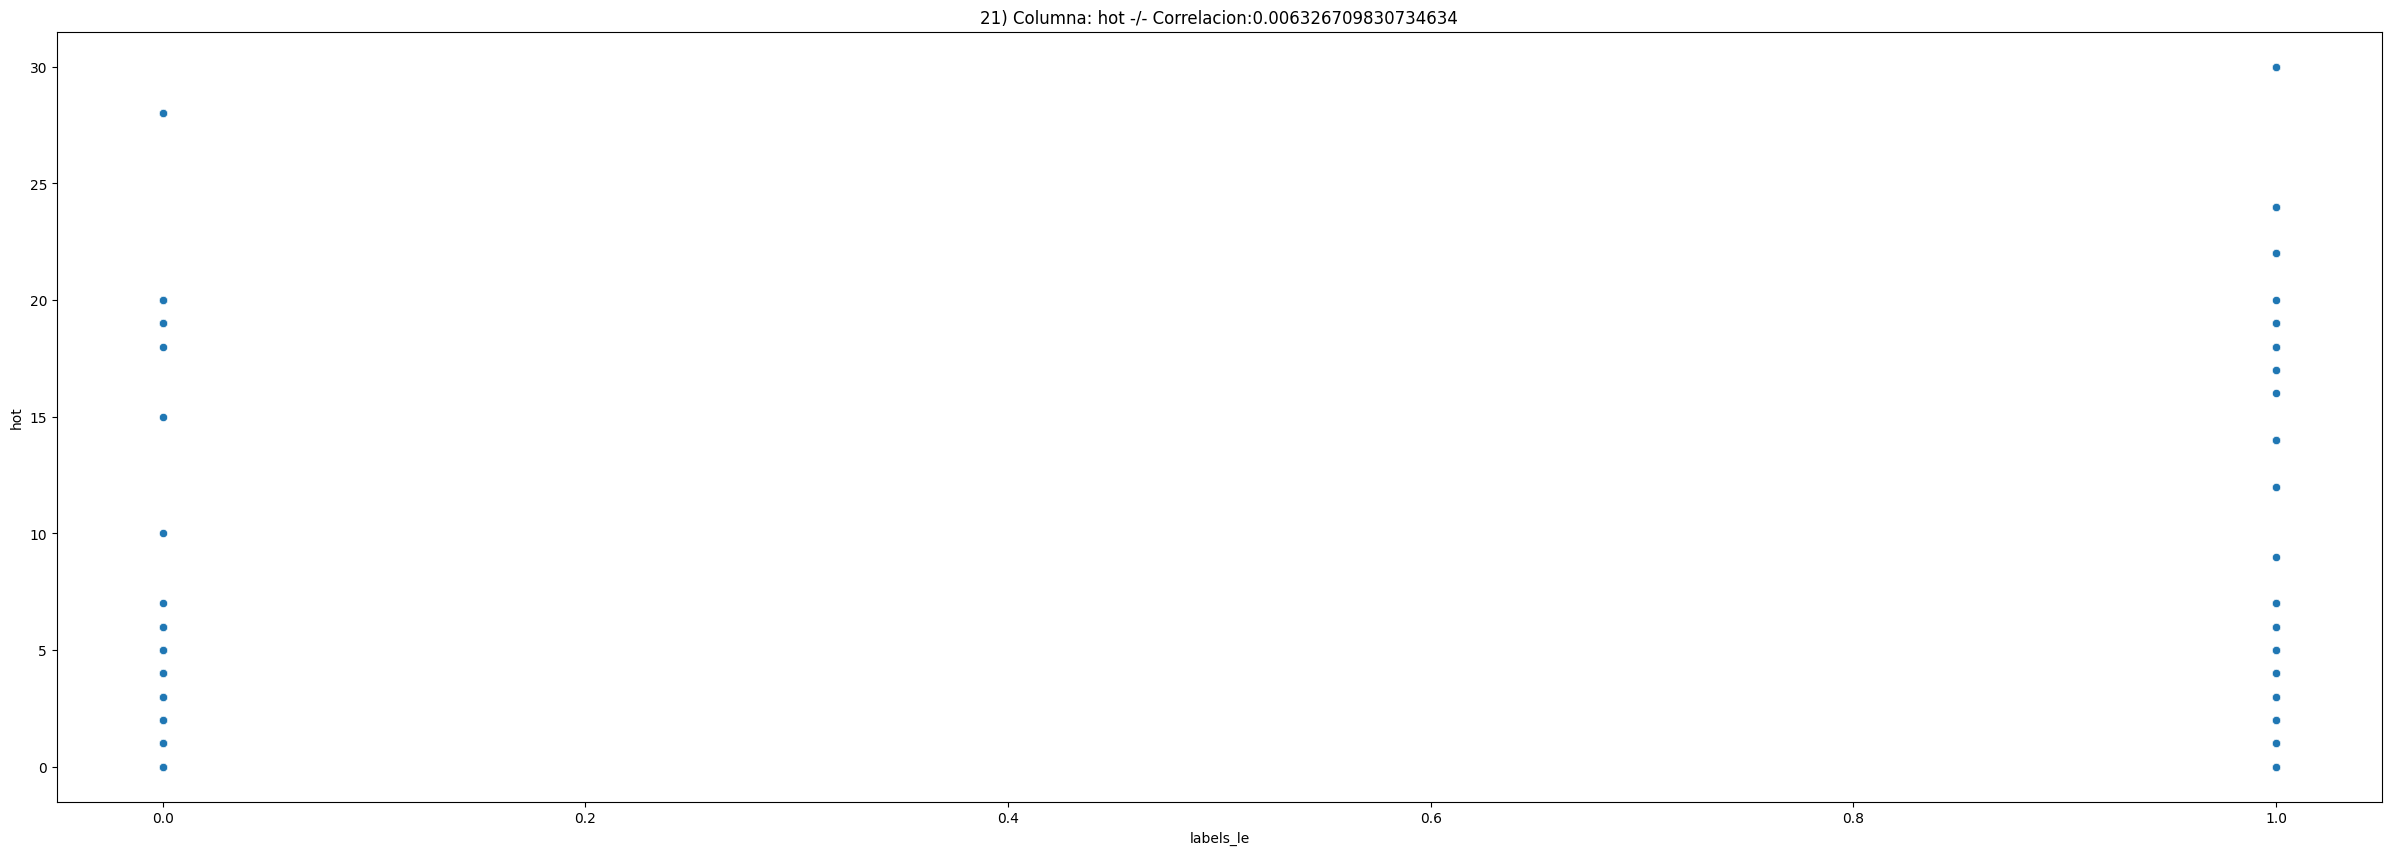

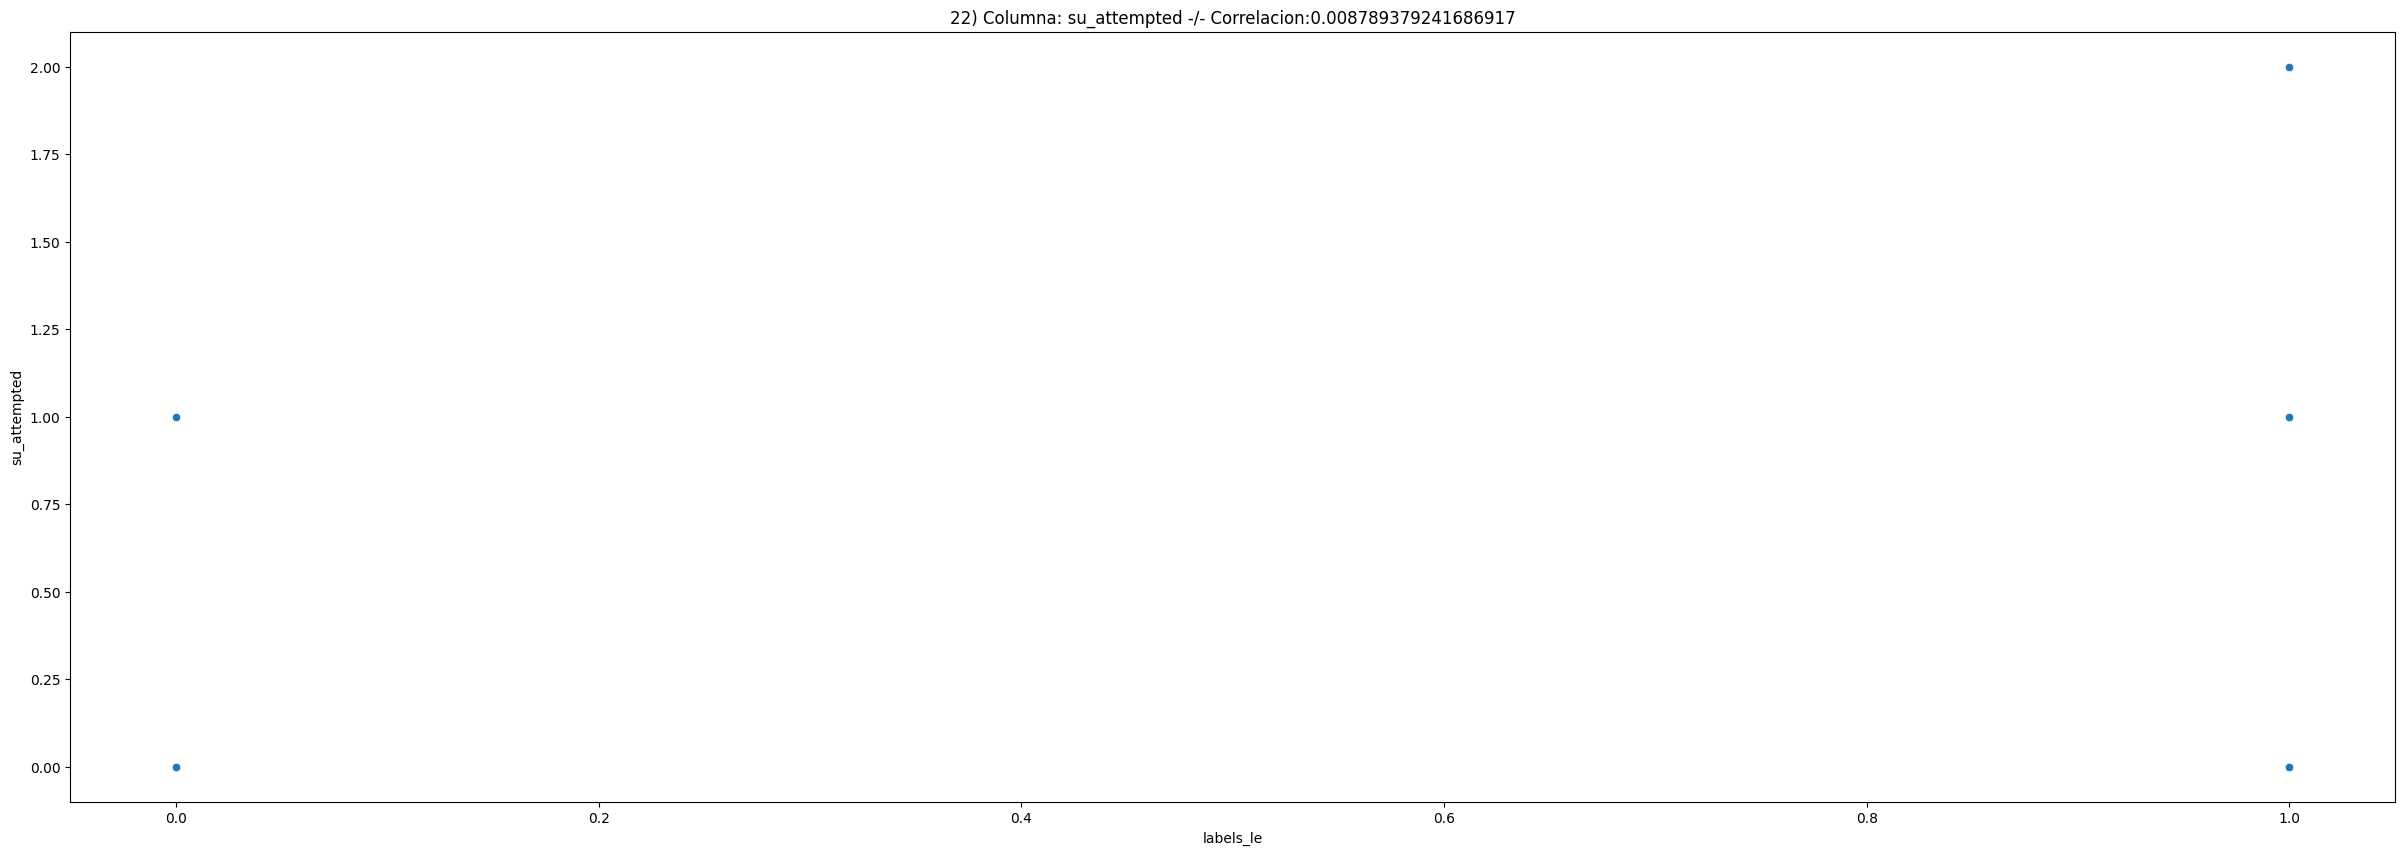

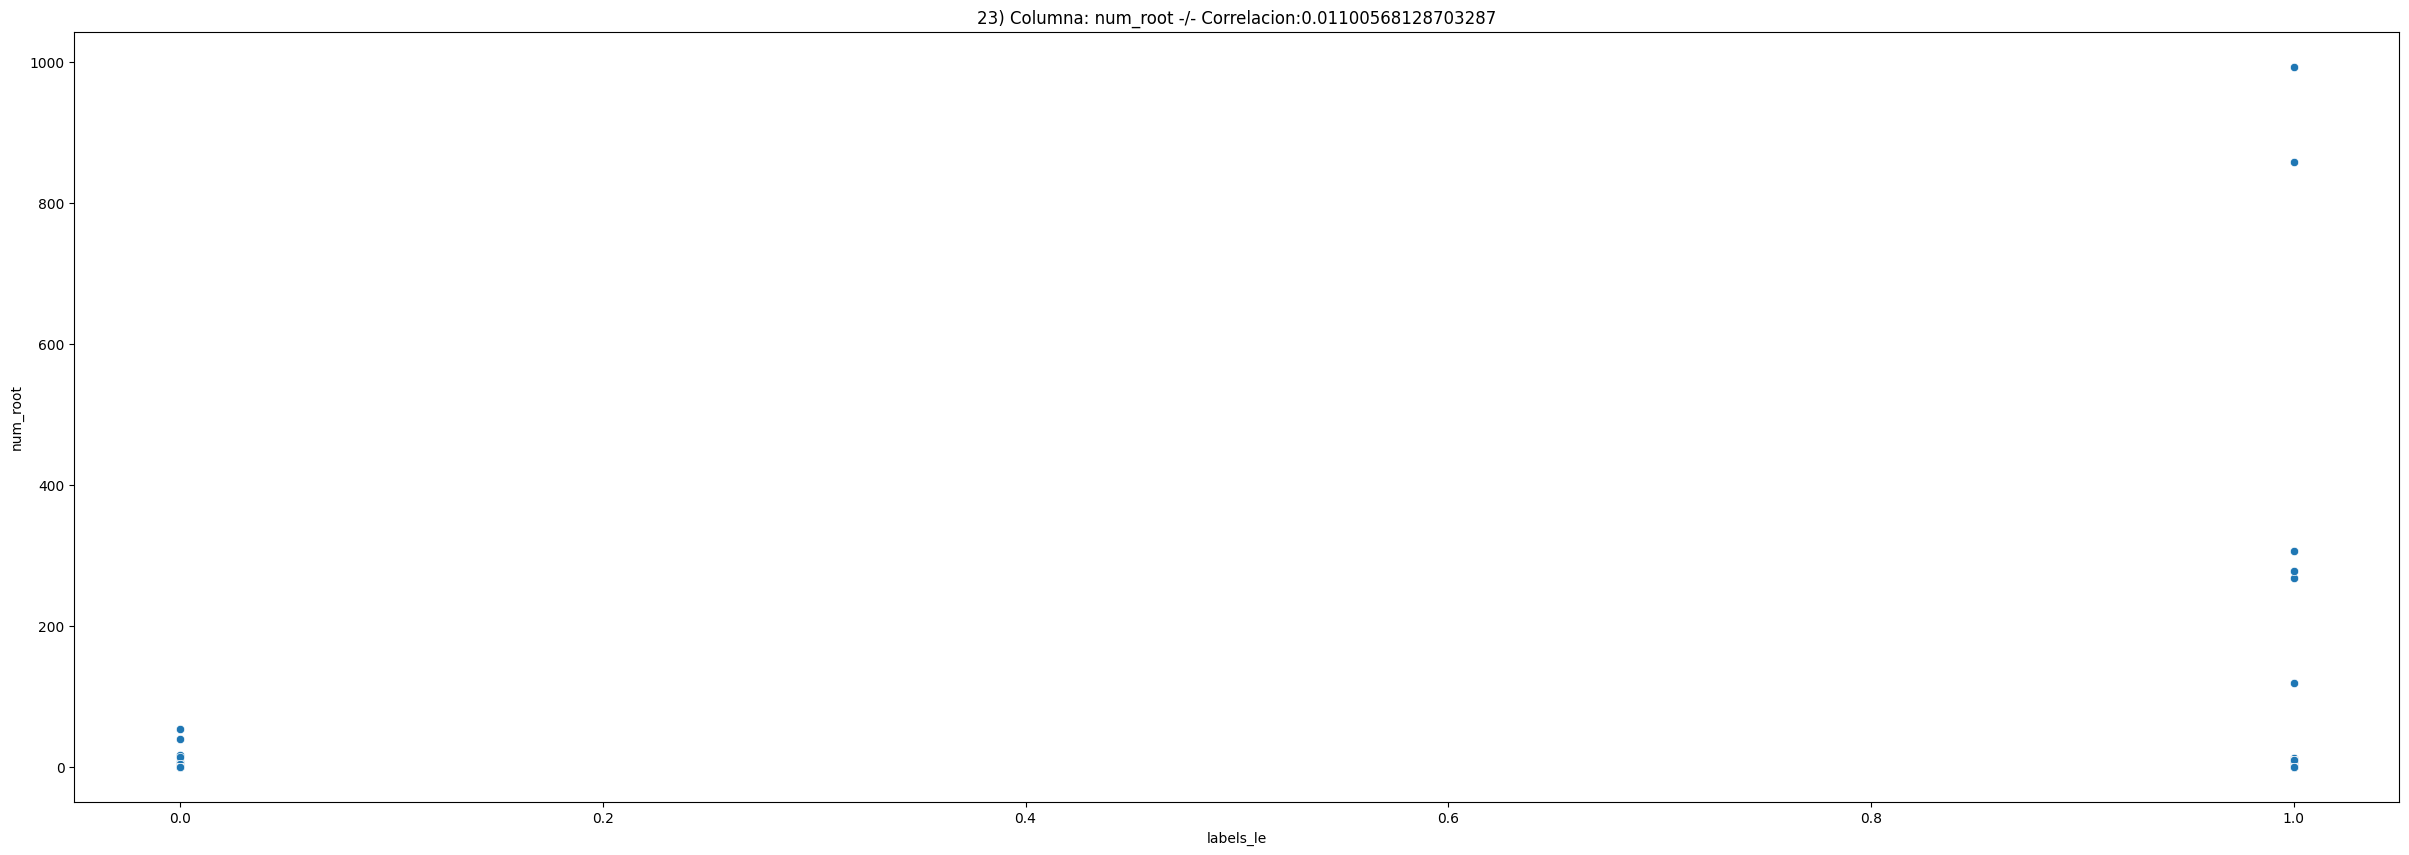

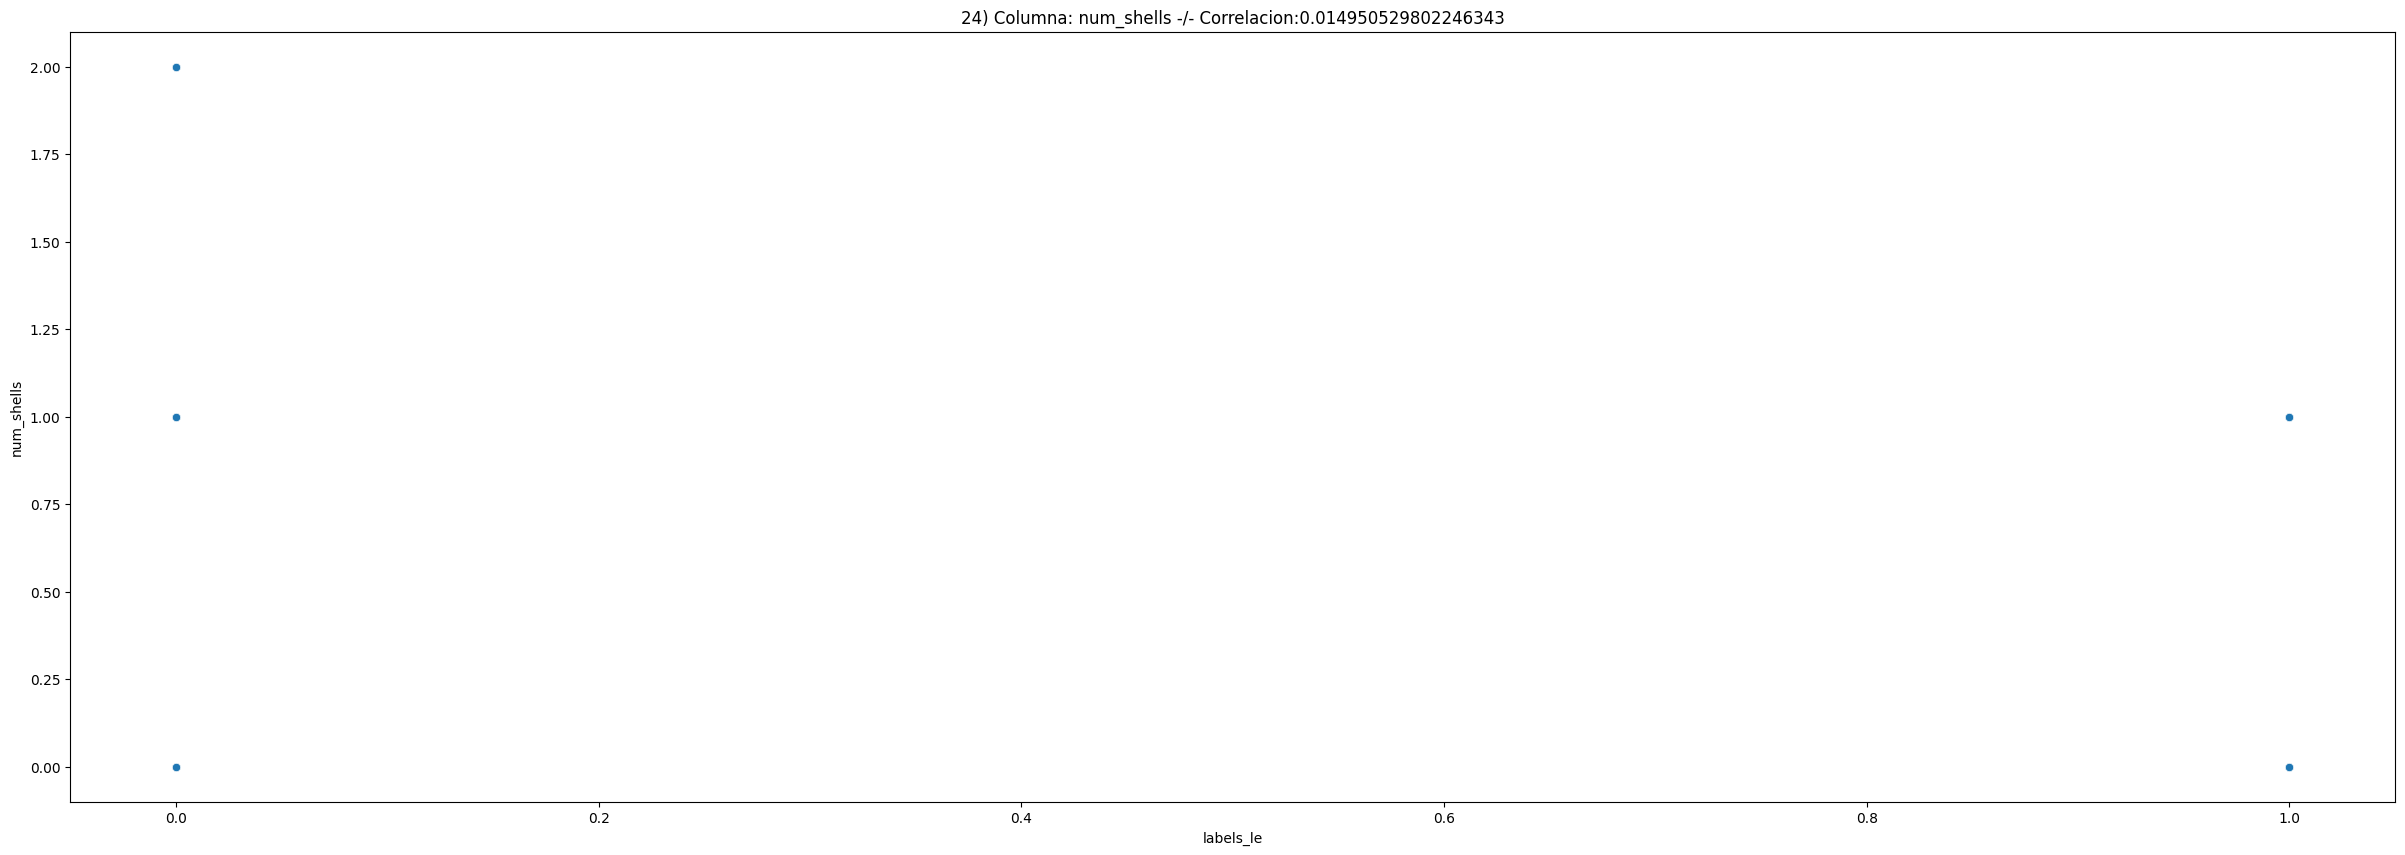

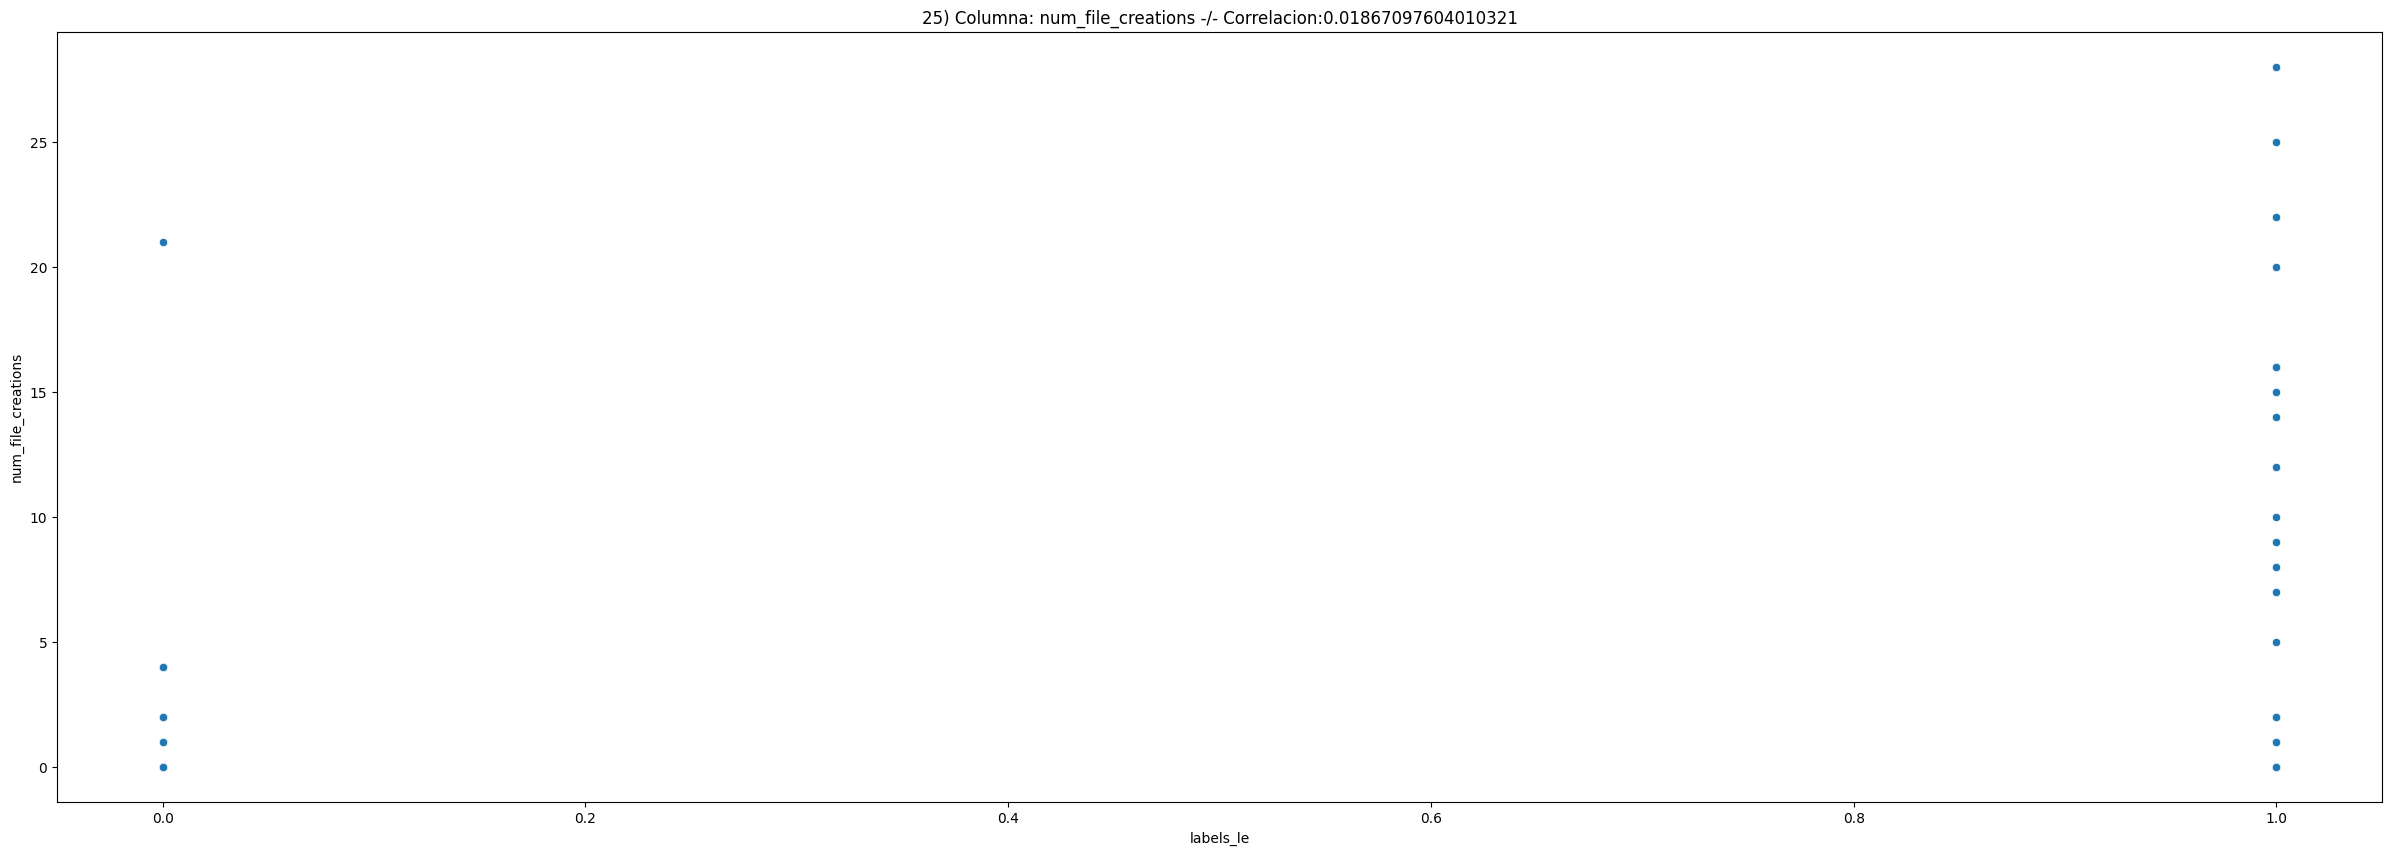

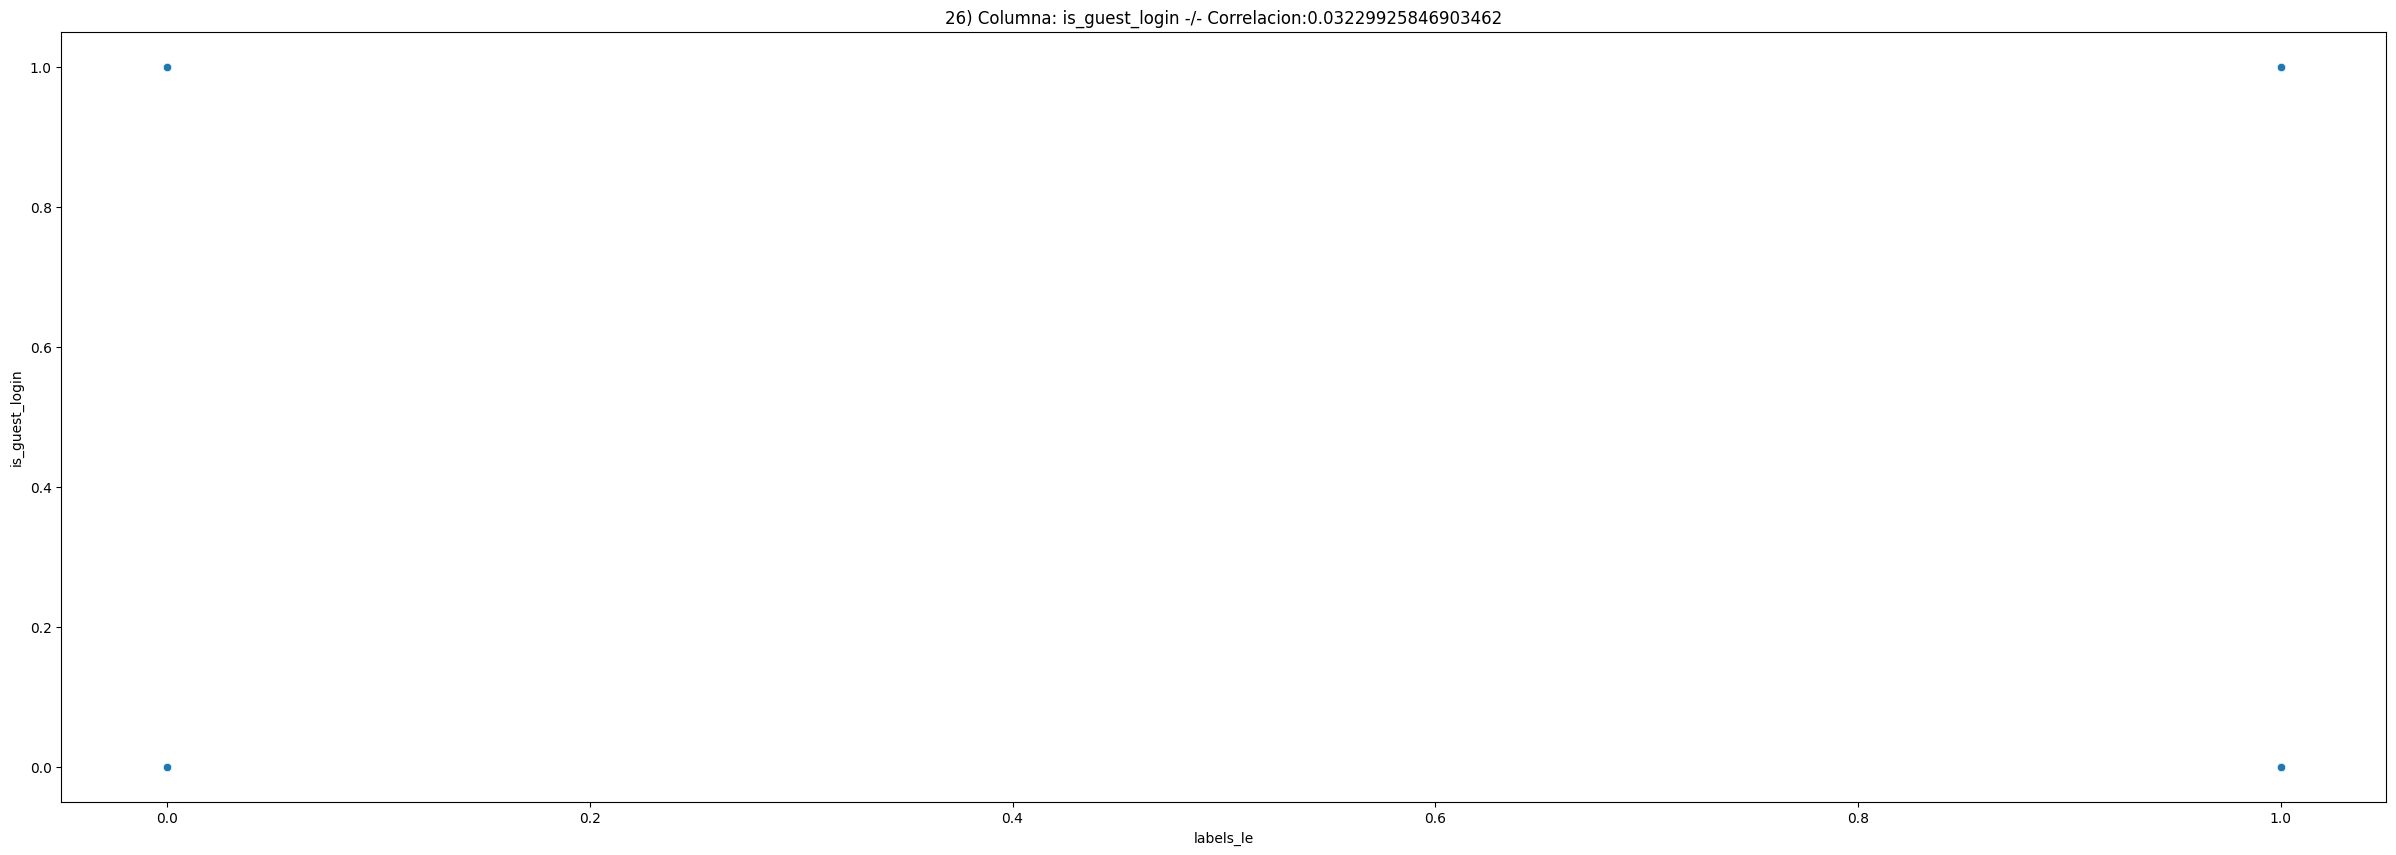

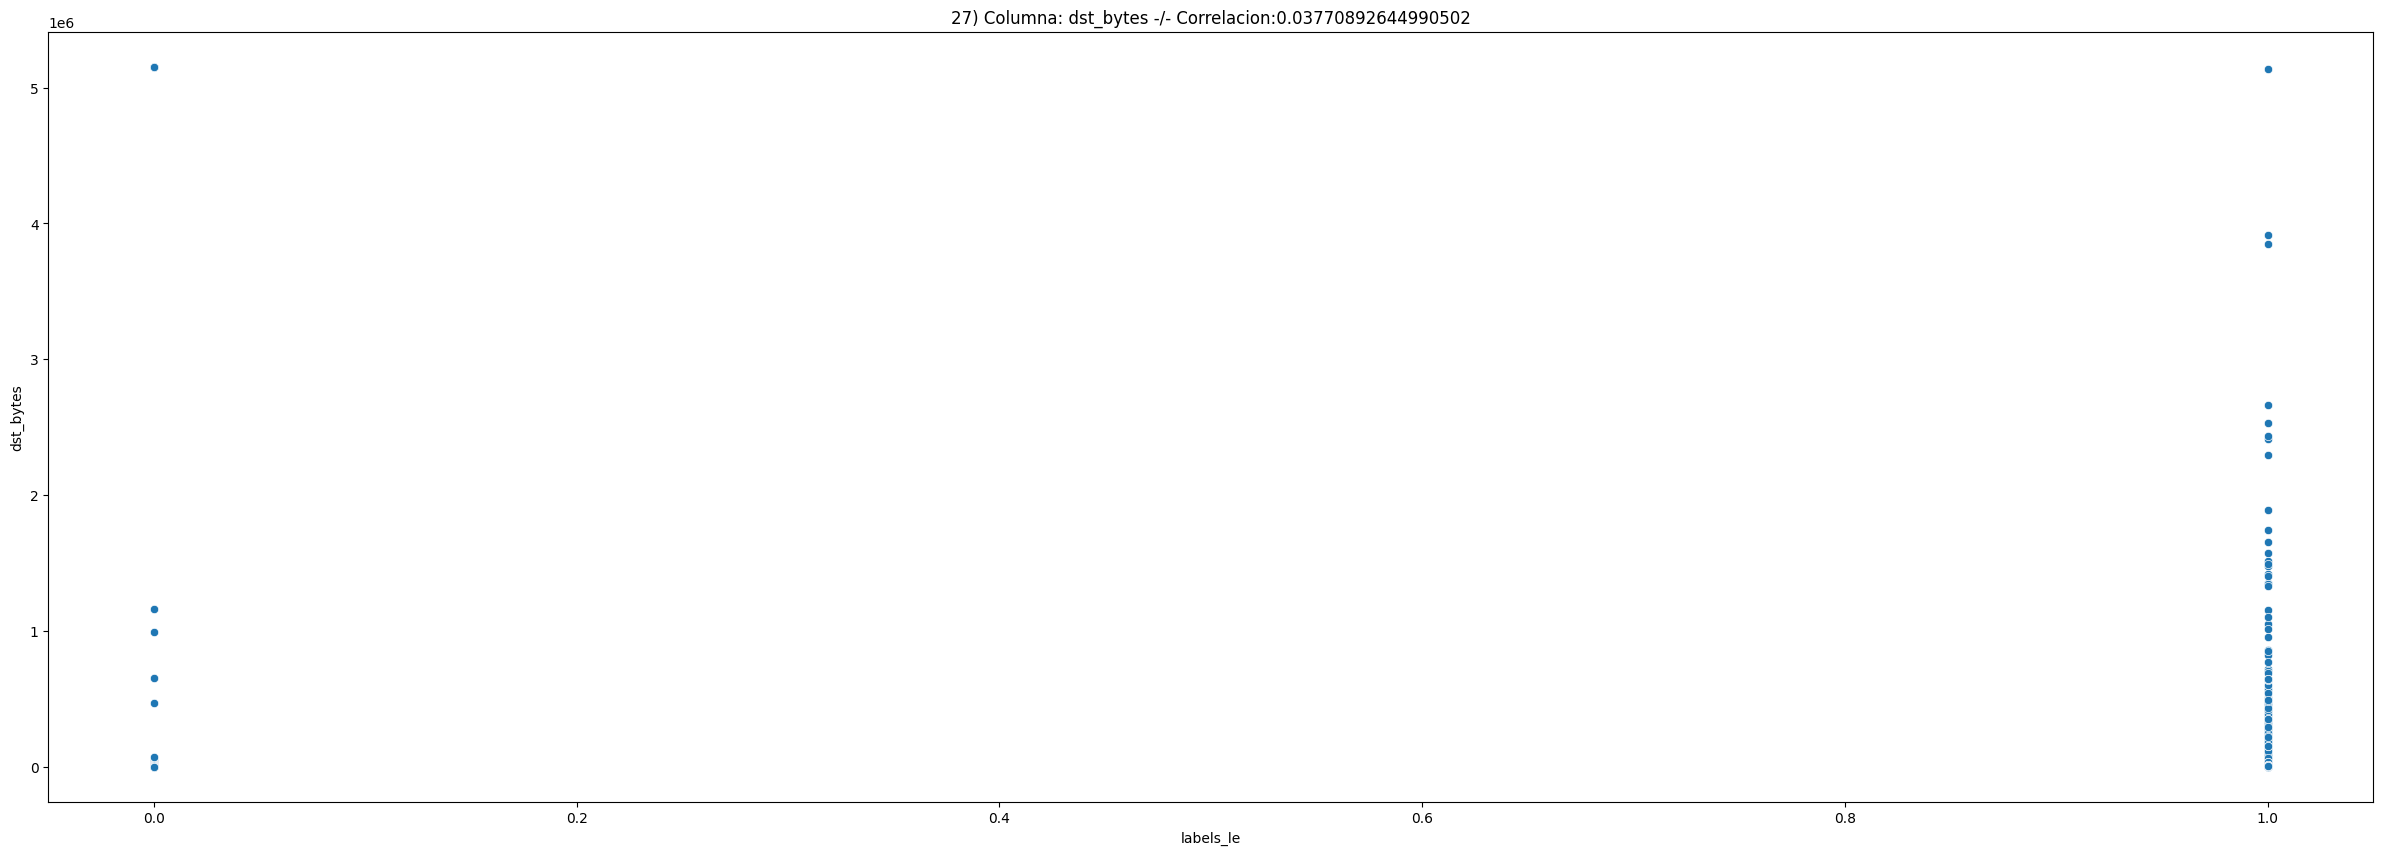

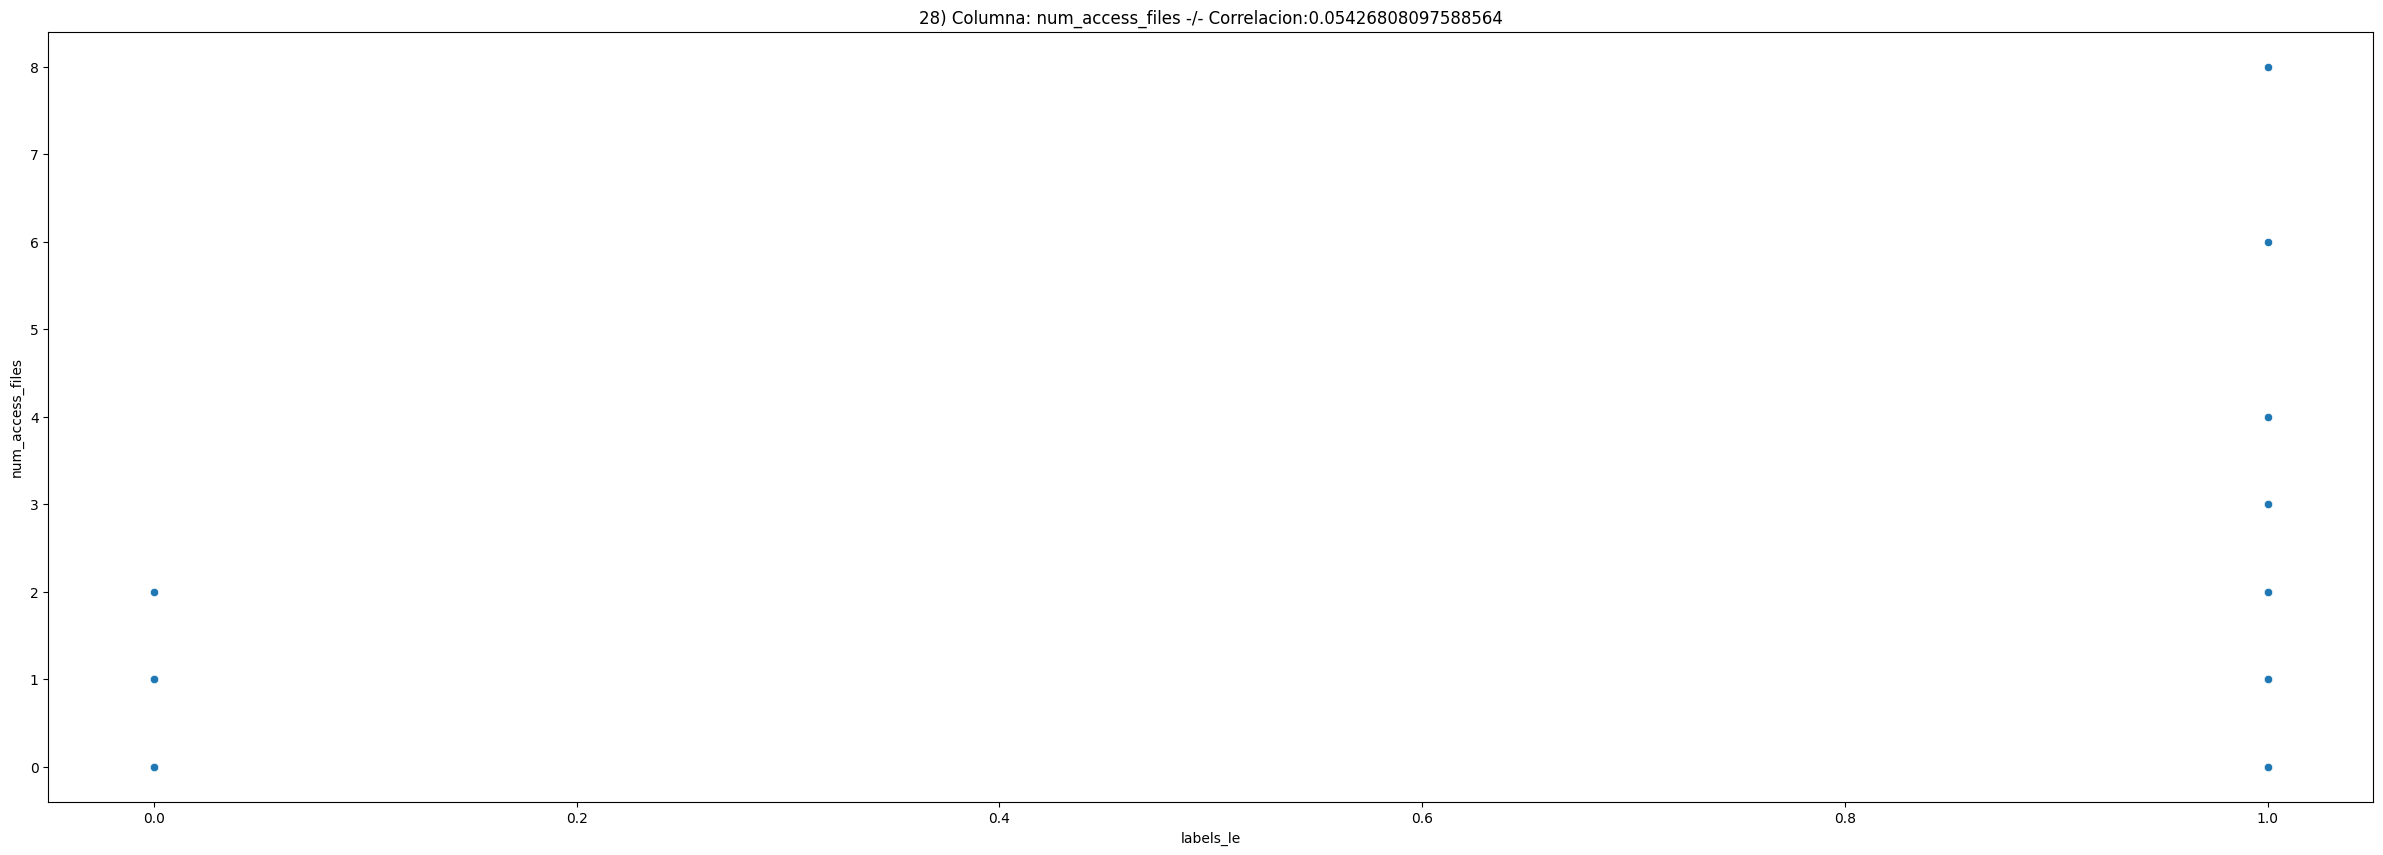

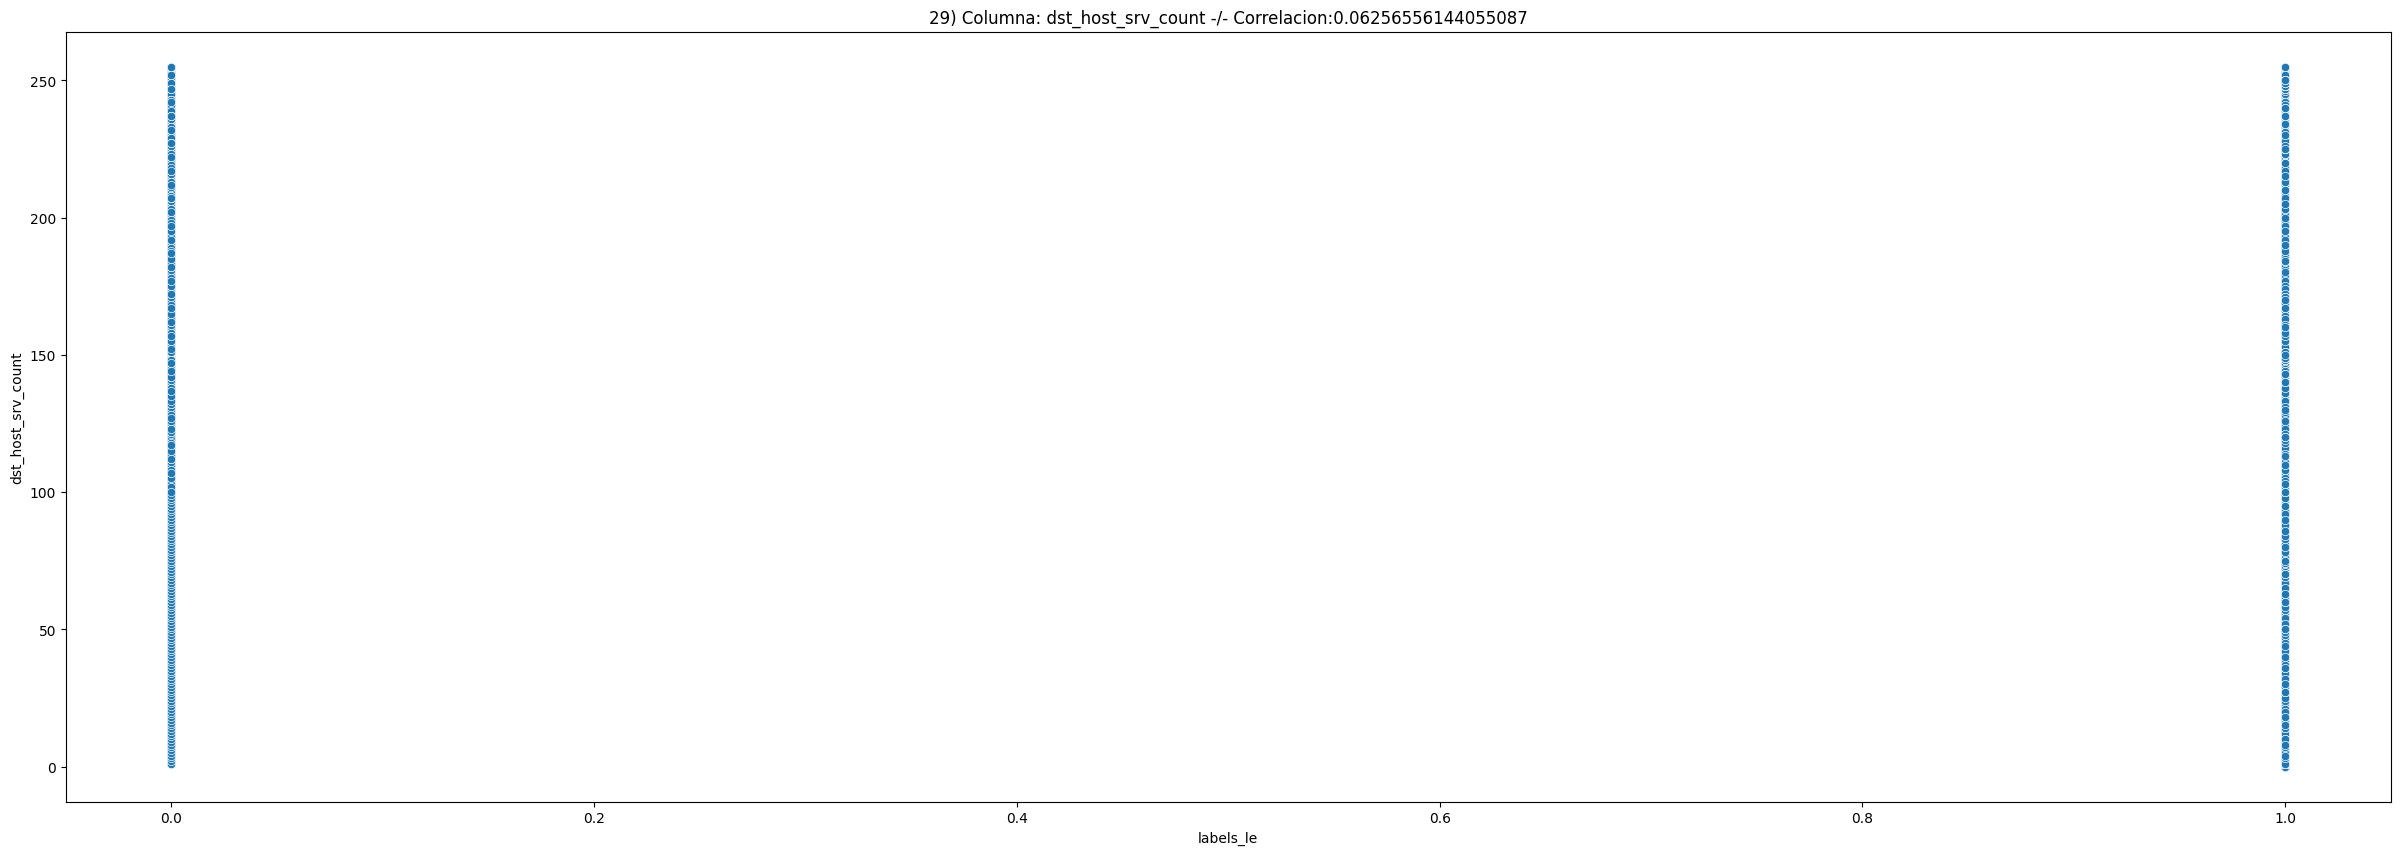

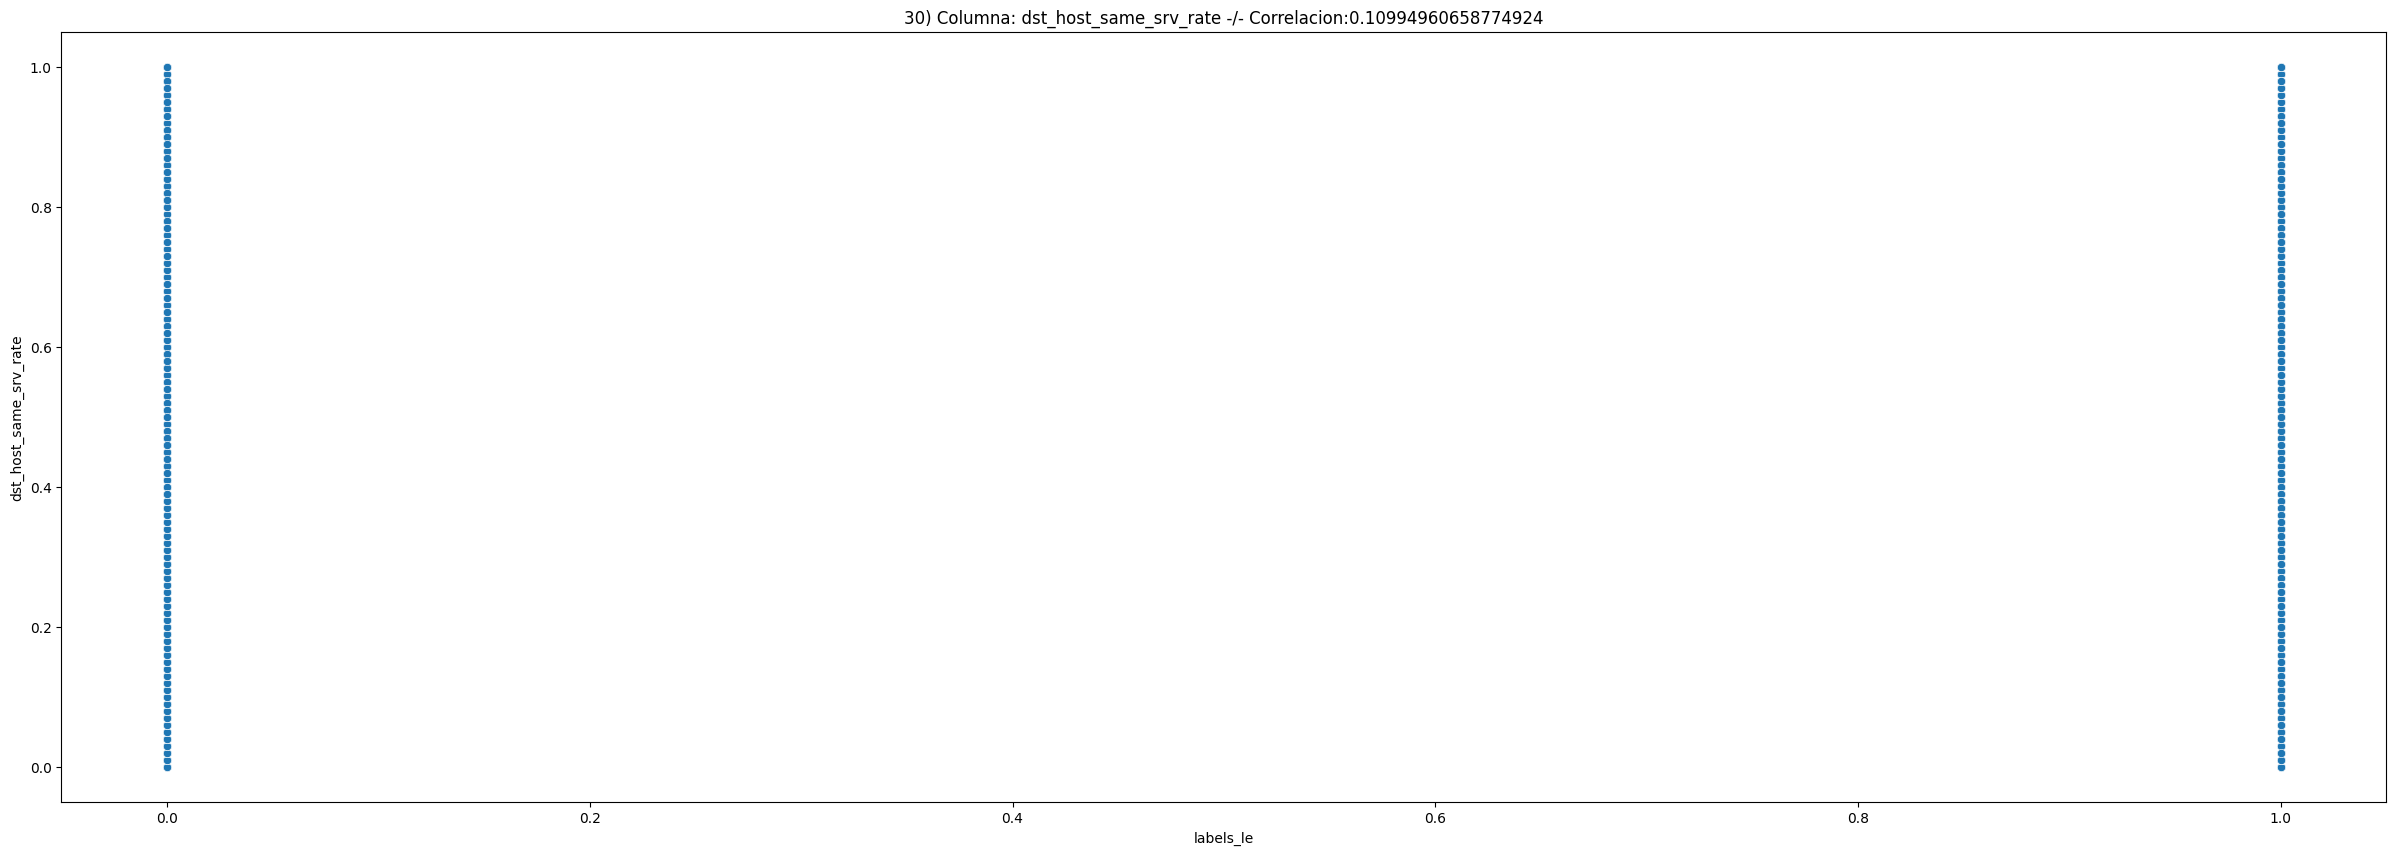

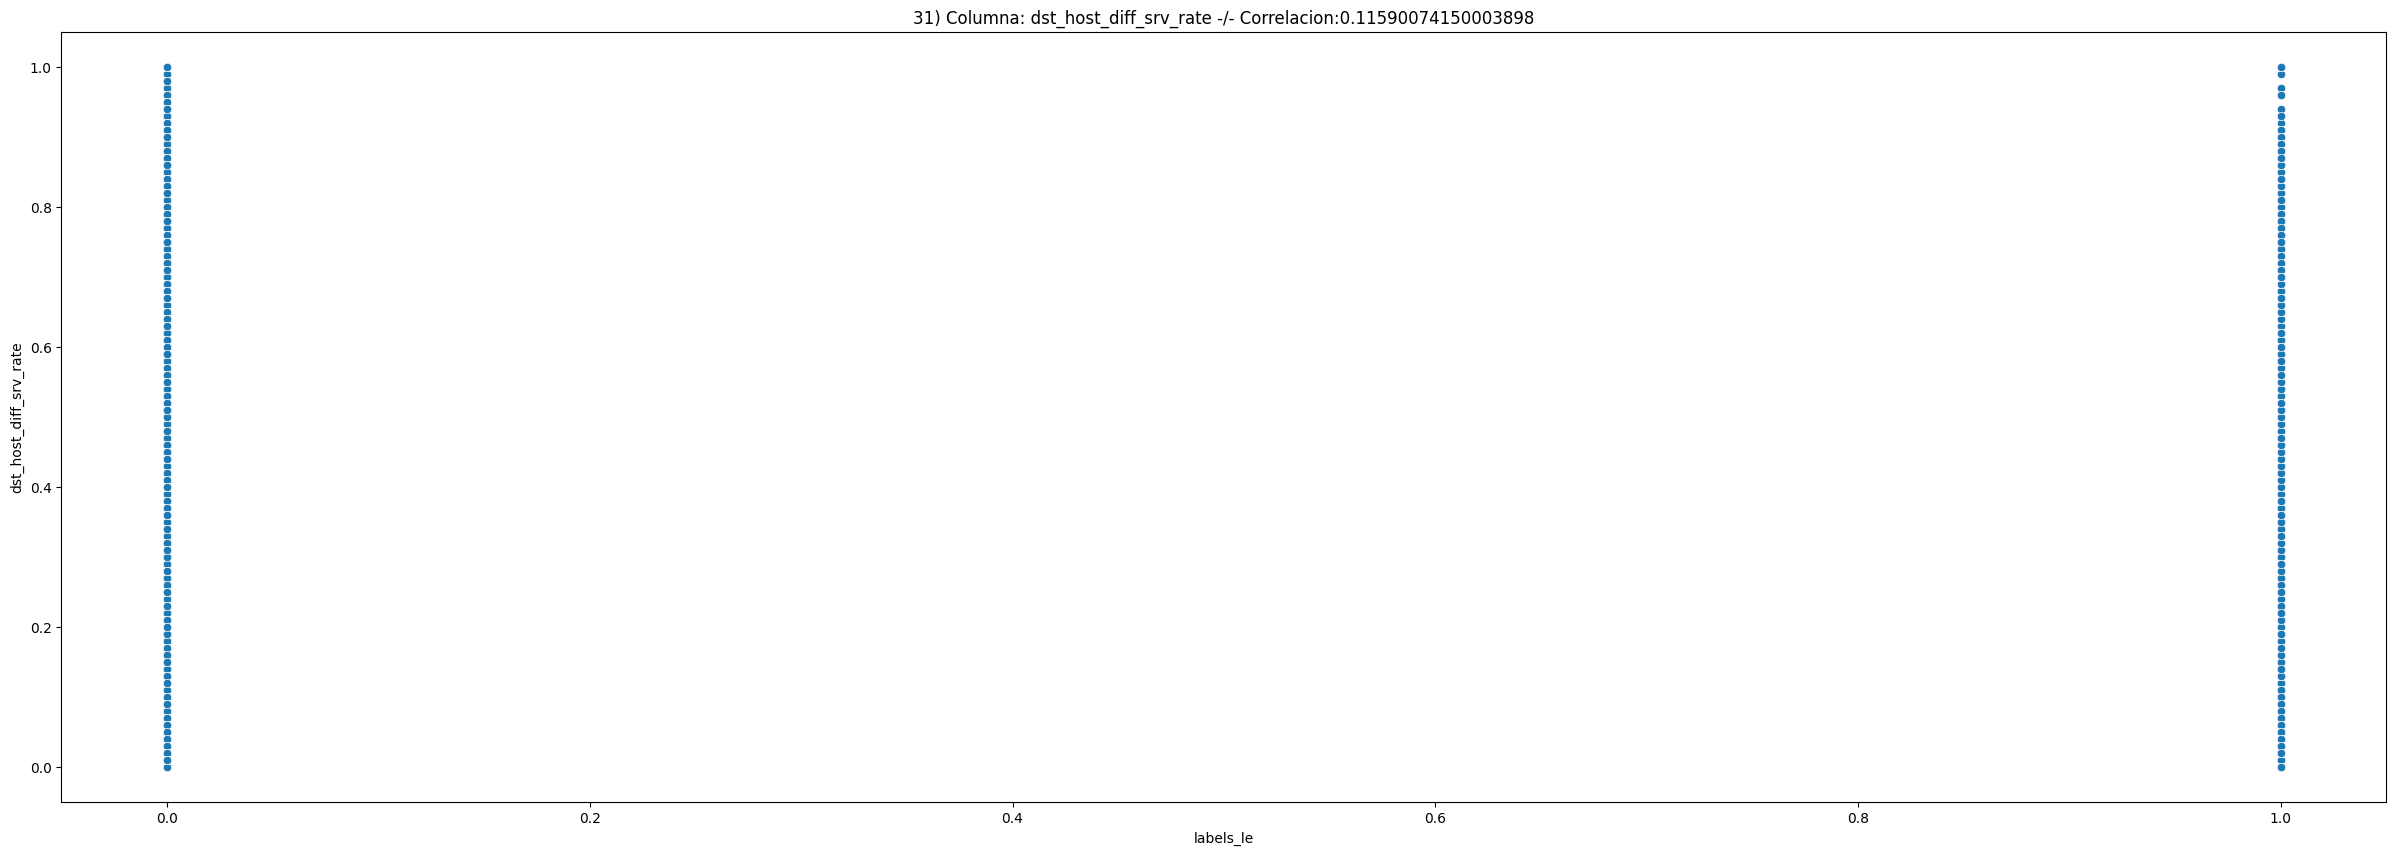

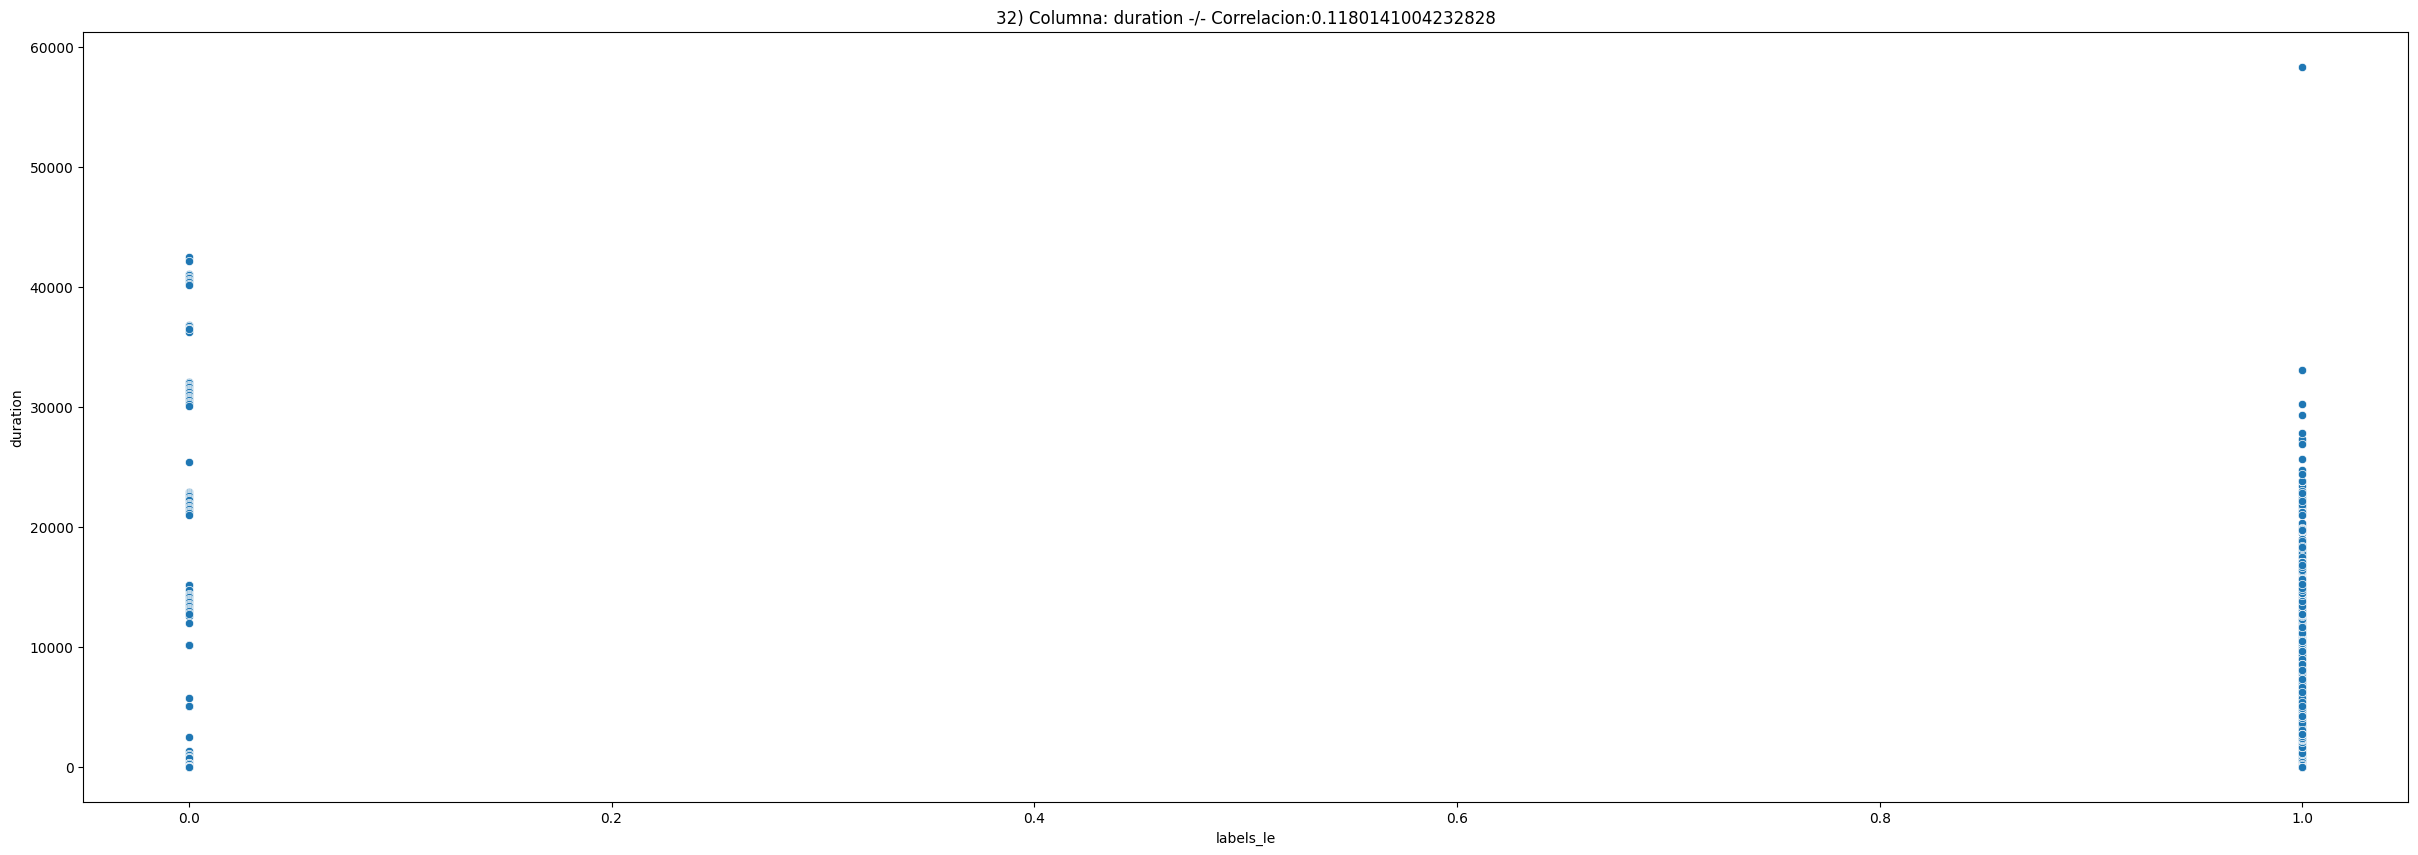

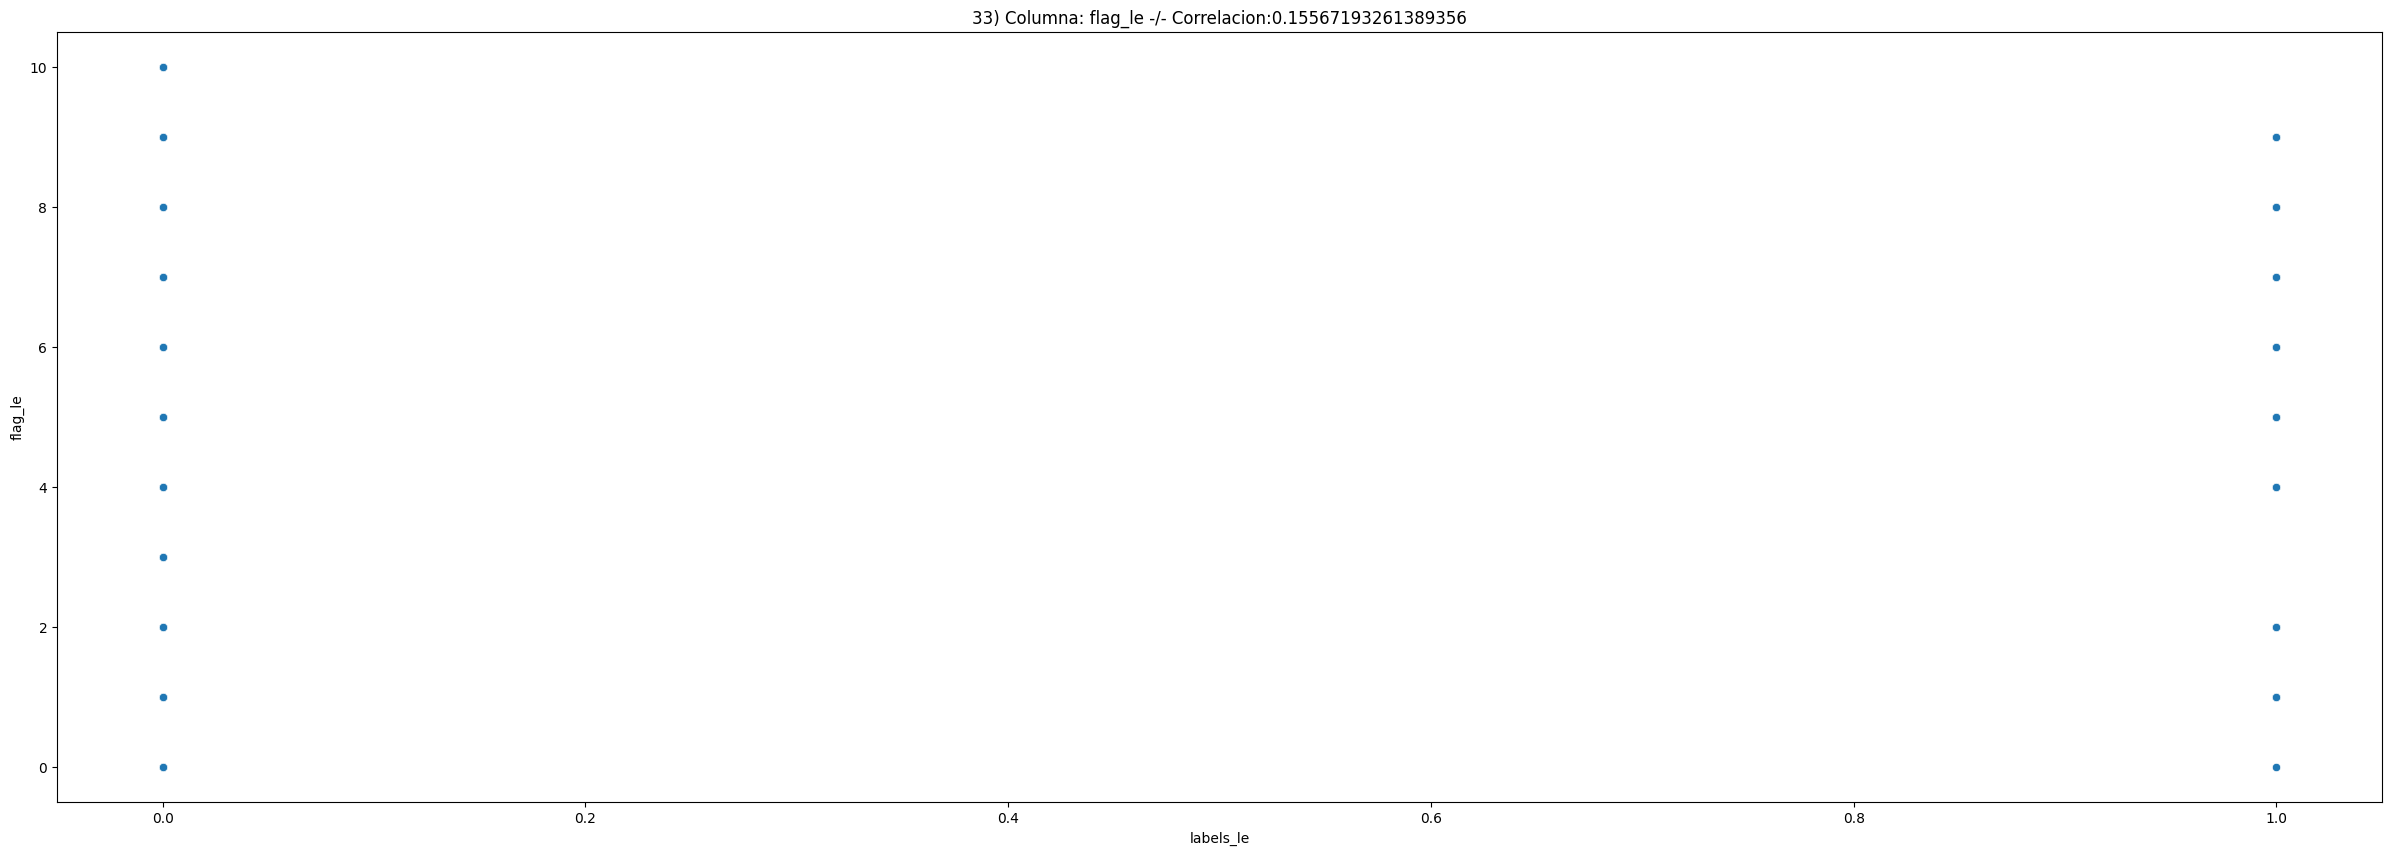

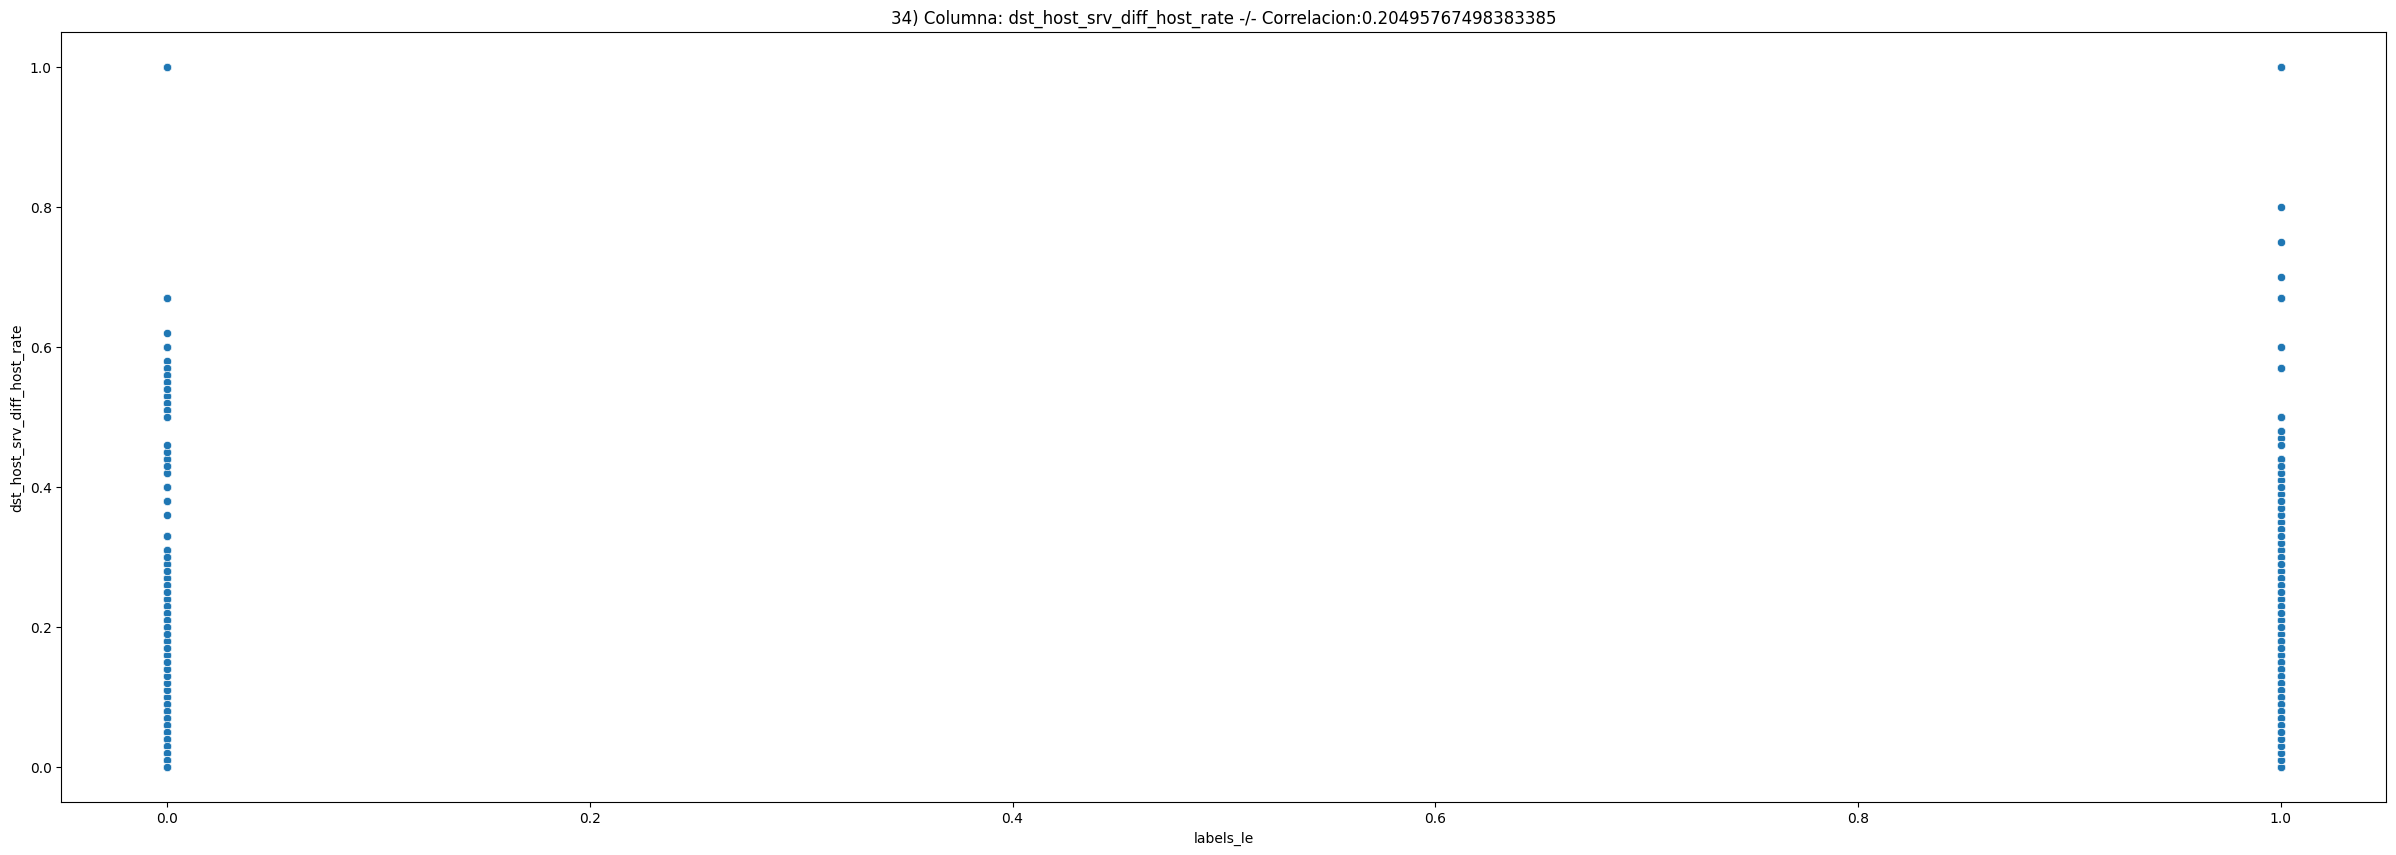

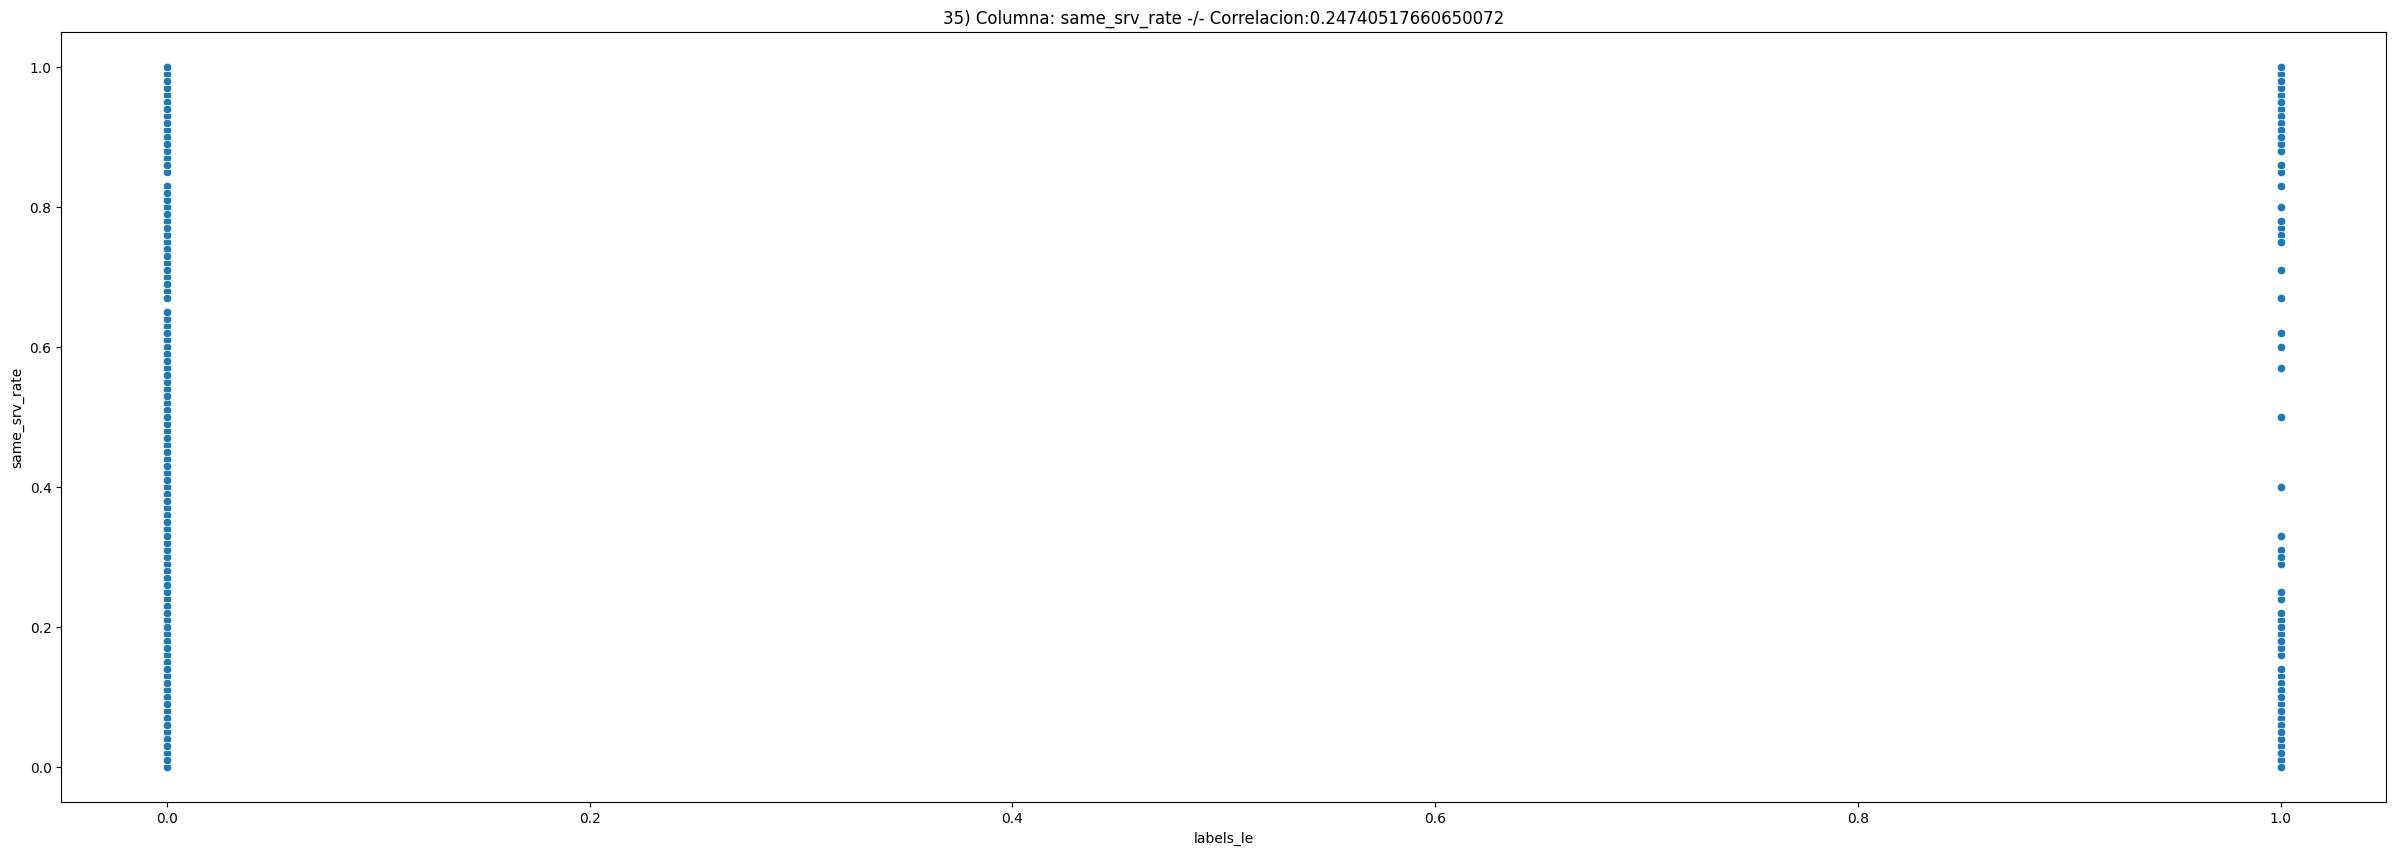

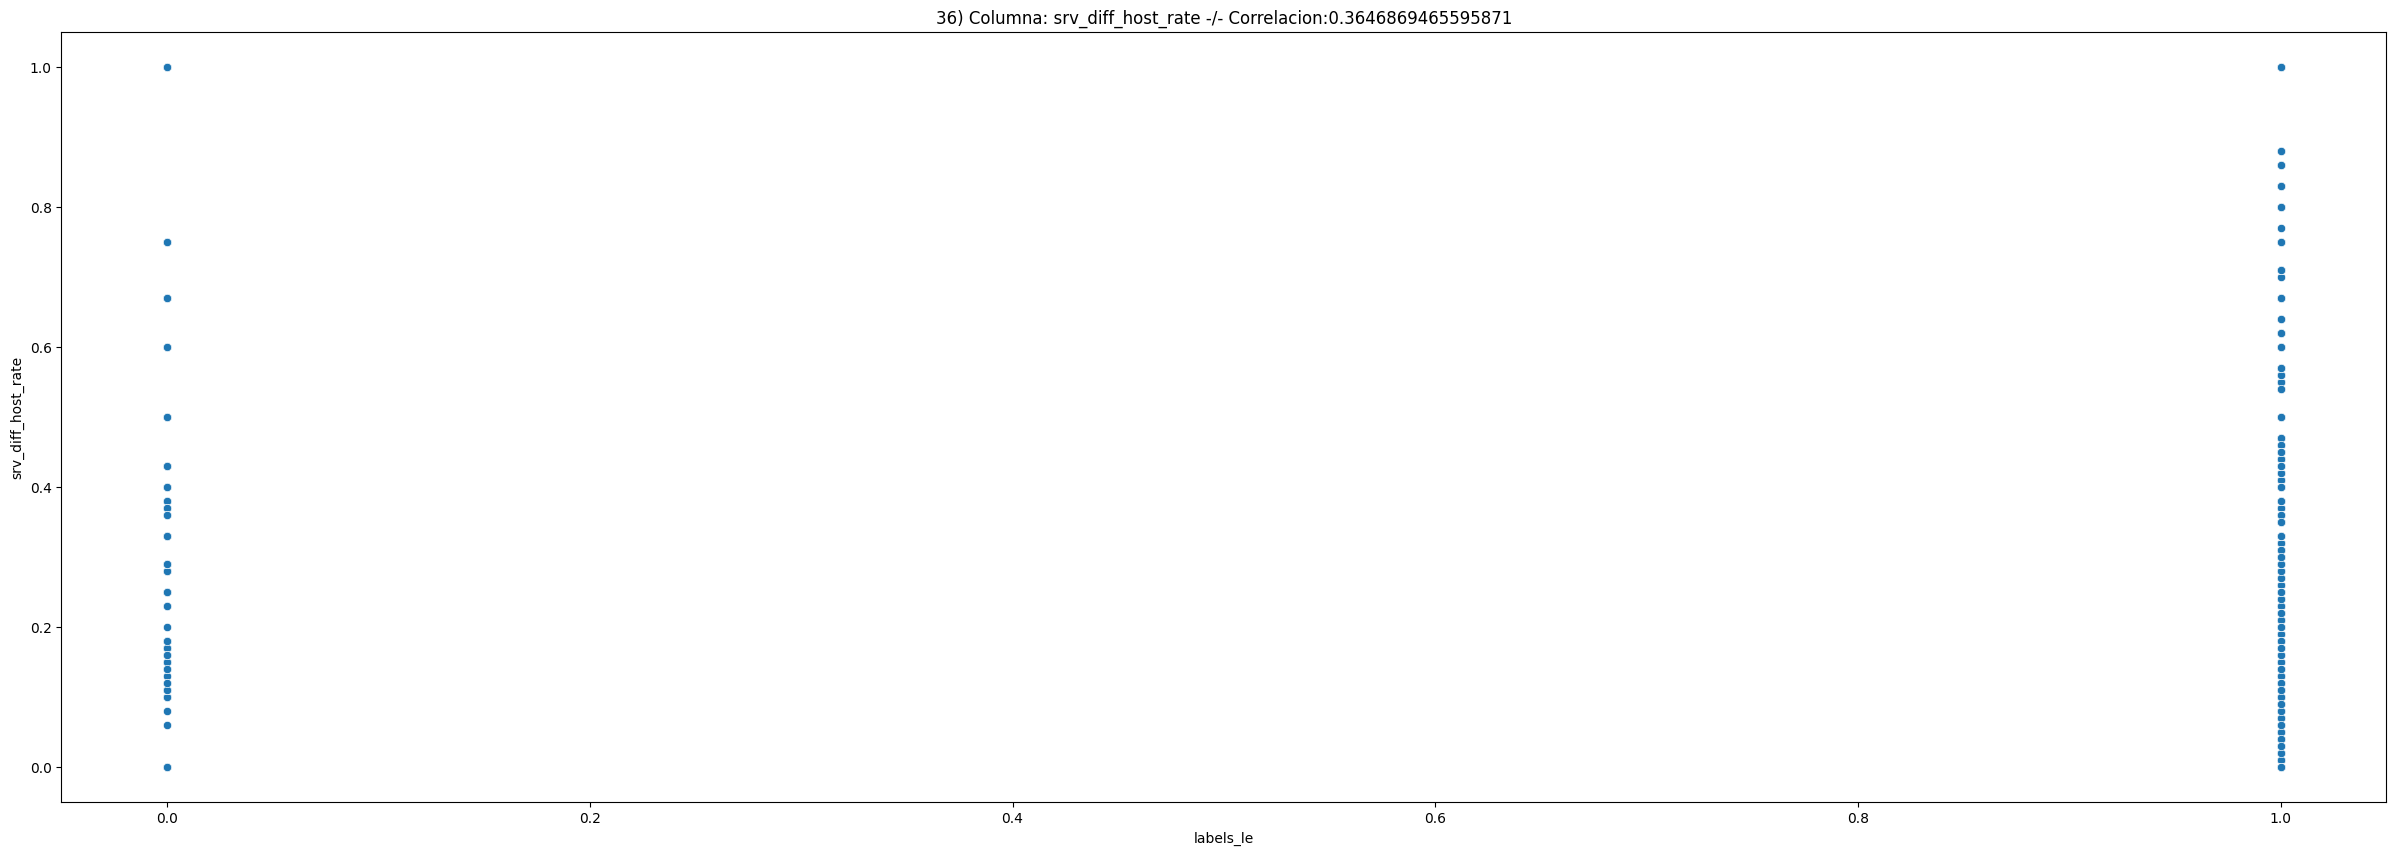

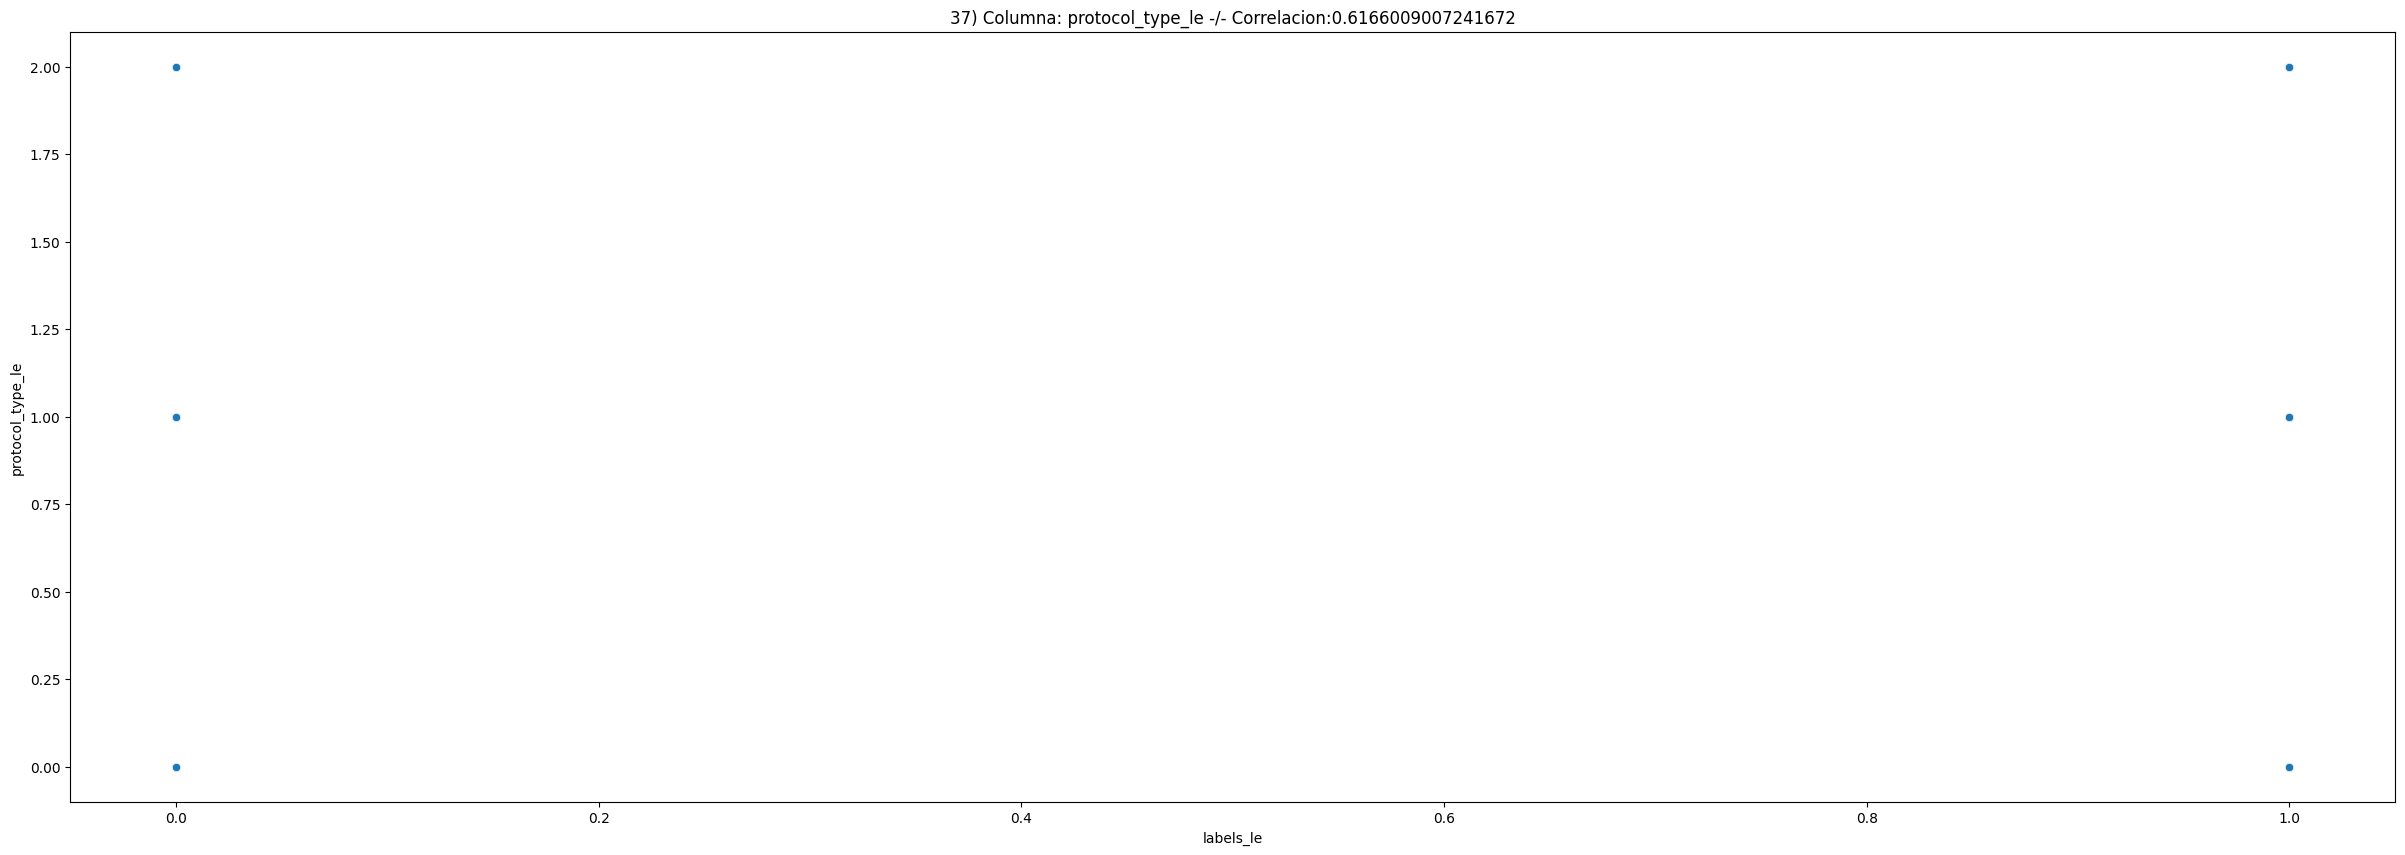

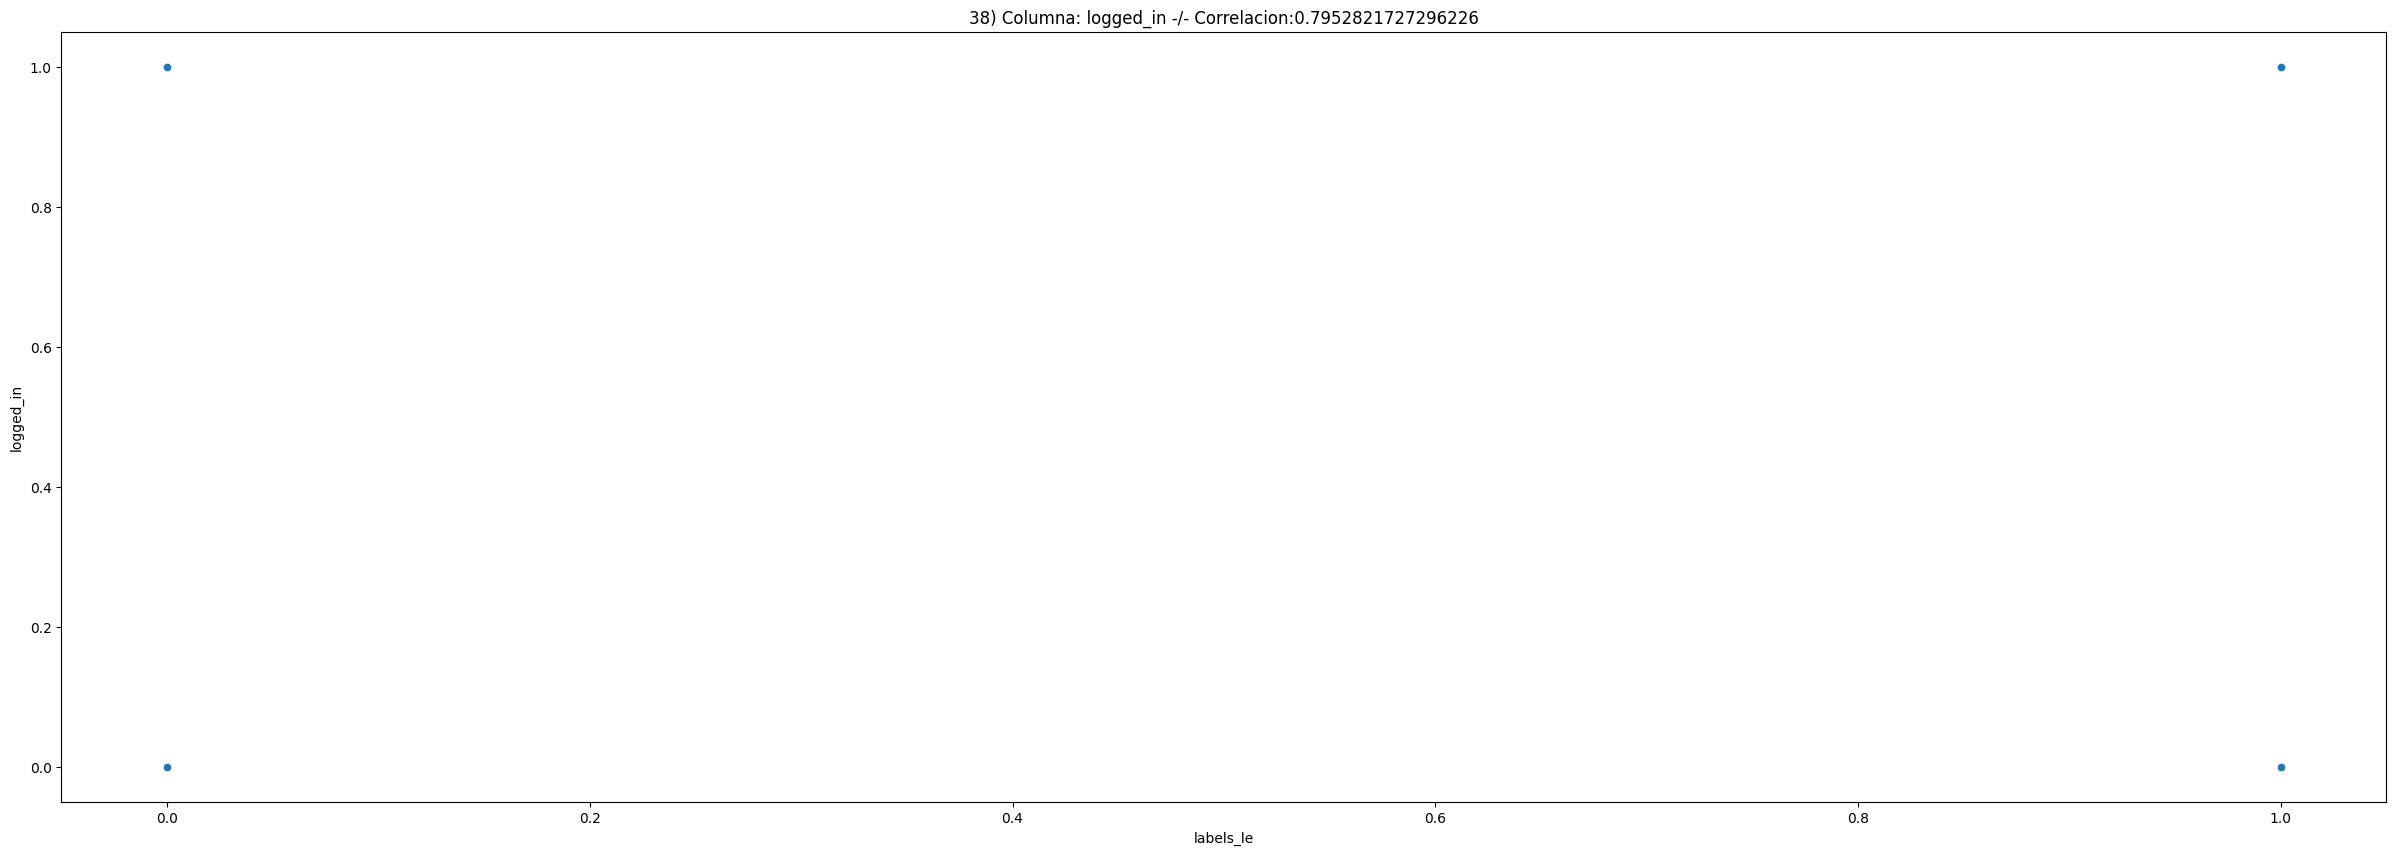

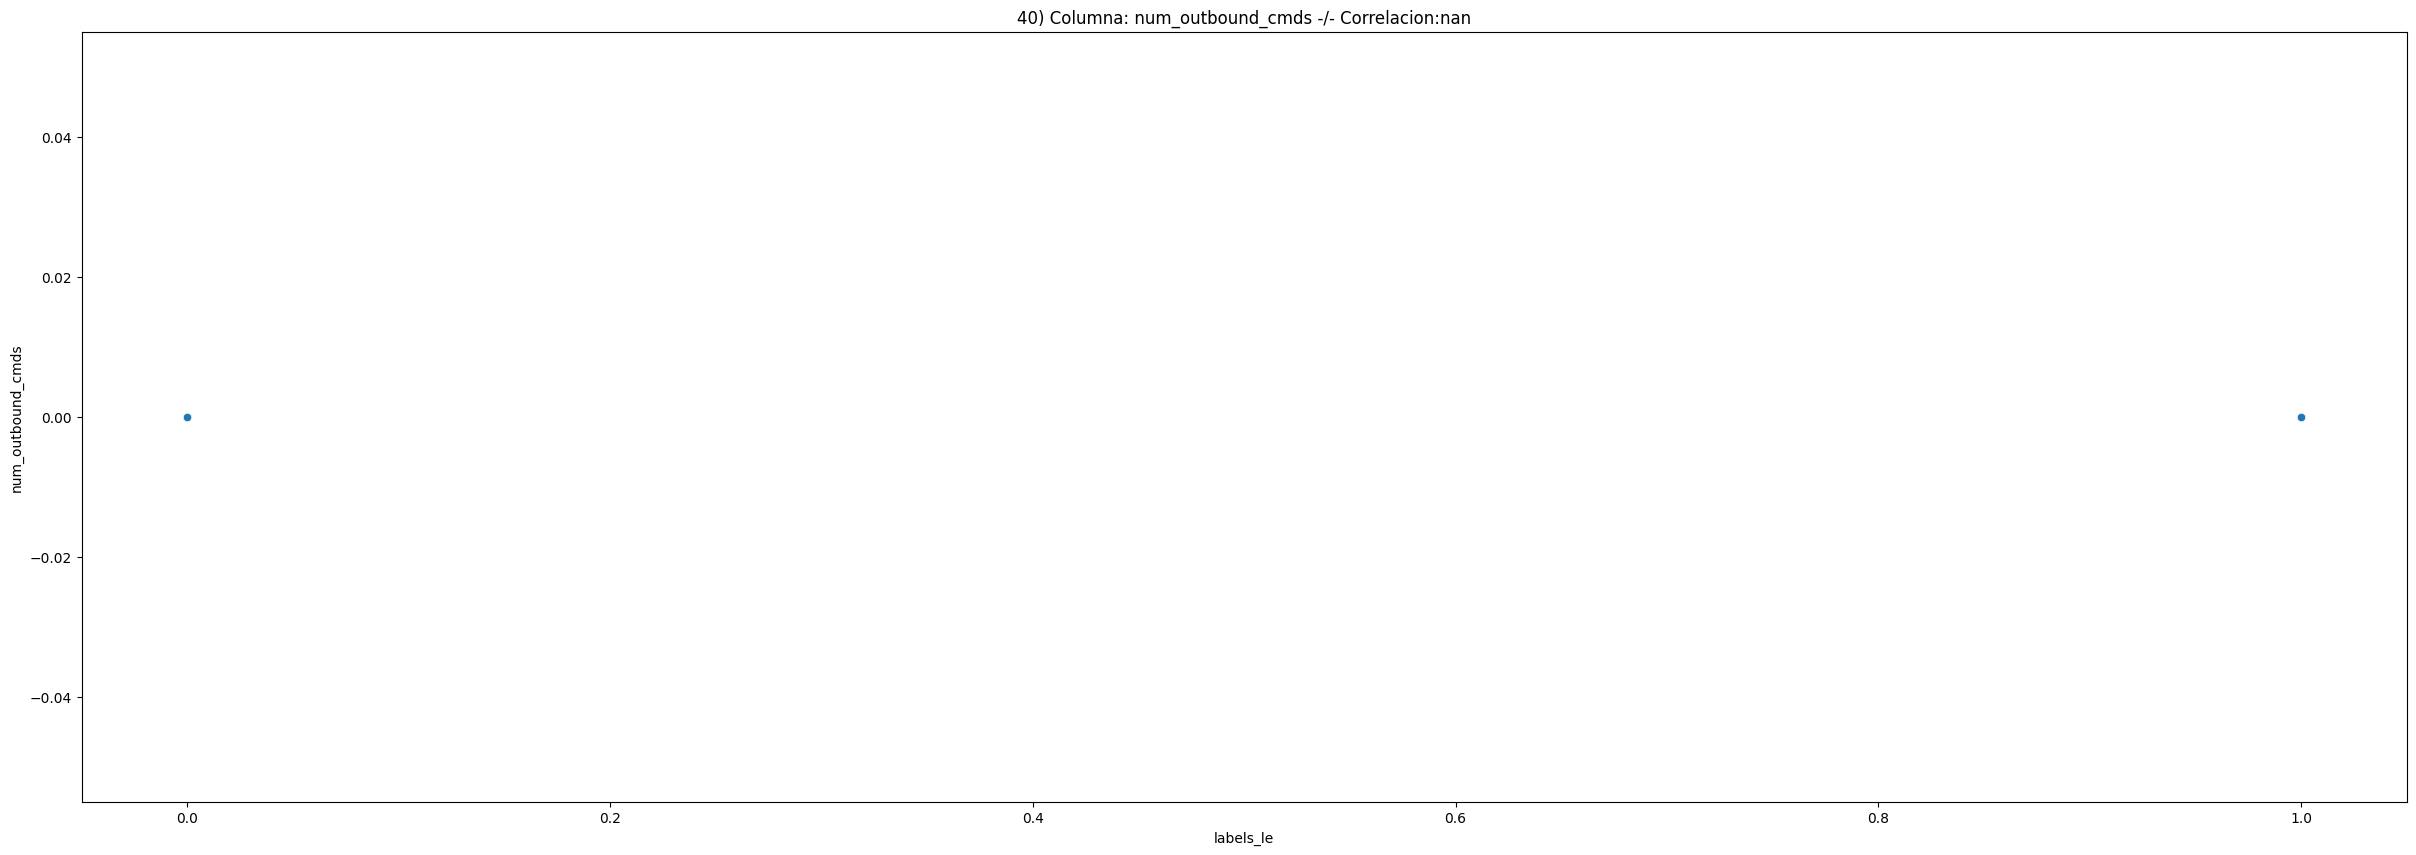

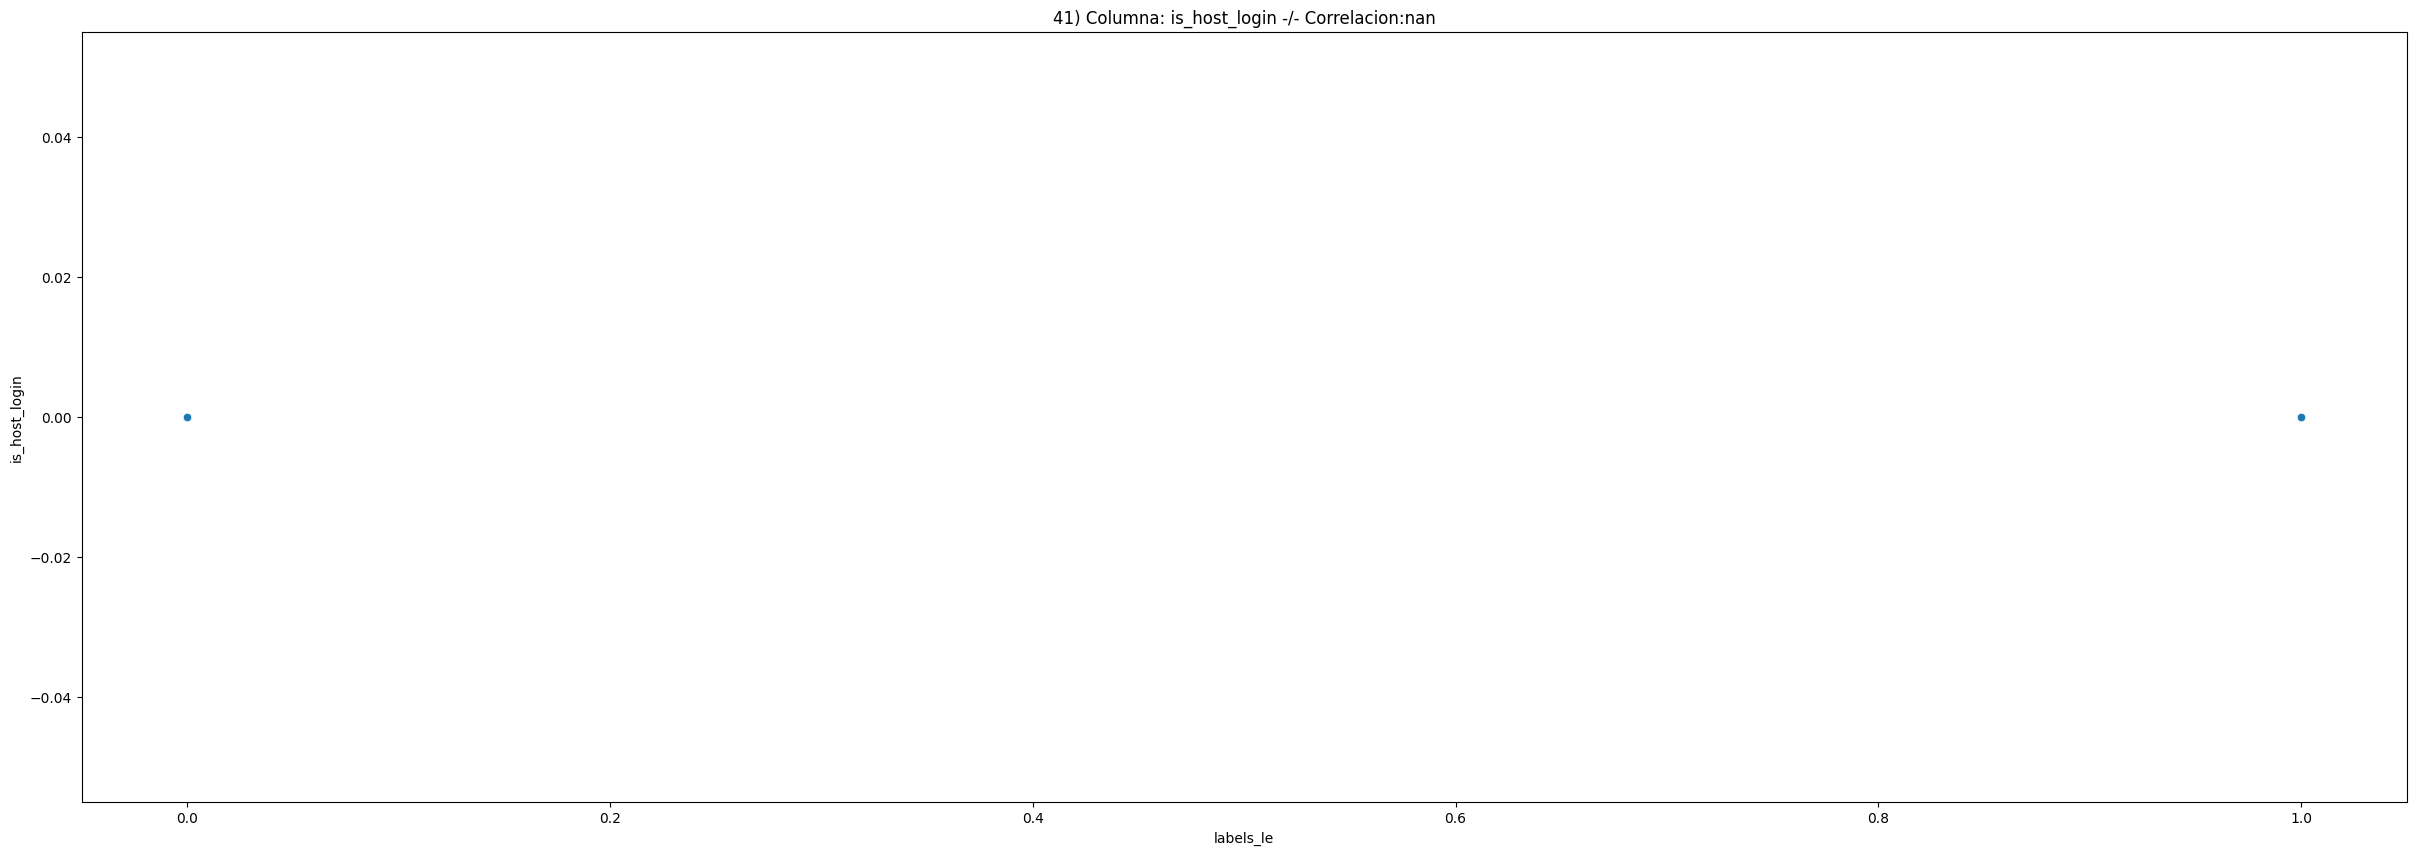

In [109]:
cols = df_corr.loc['labels_le'].sort_values(ascending=True).index
vals = df_corr.loc['labels_le'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'labels_le'):
        ax = plt.axes()
        sns.scatterplot(x="labels_le", y=cols[i], data=df_conexiones[['labels_le',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

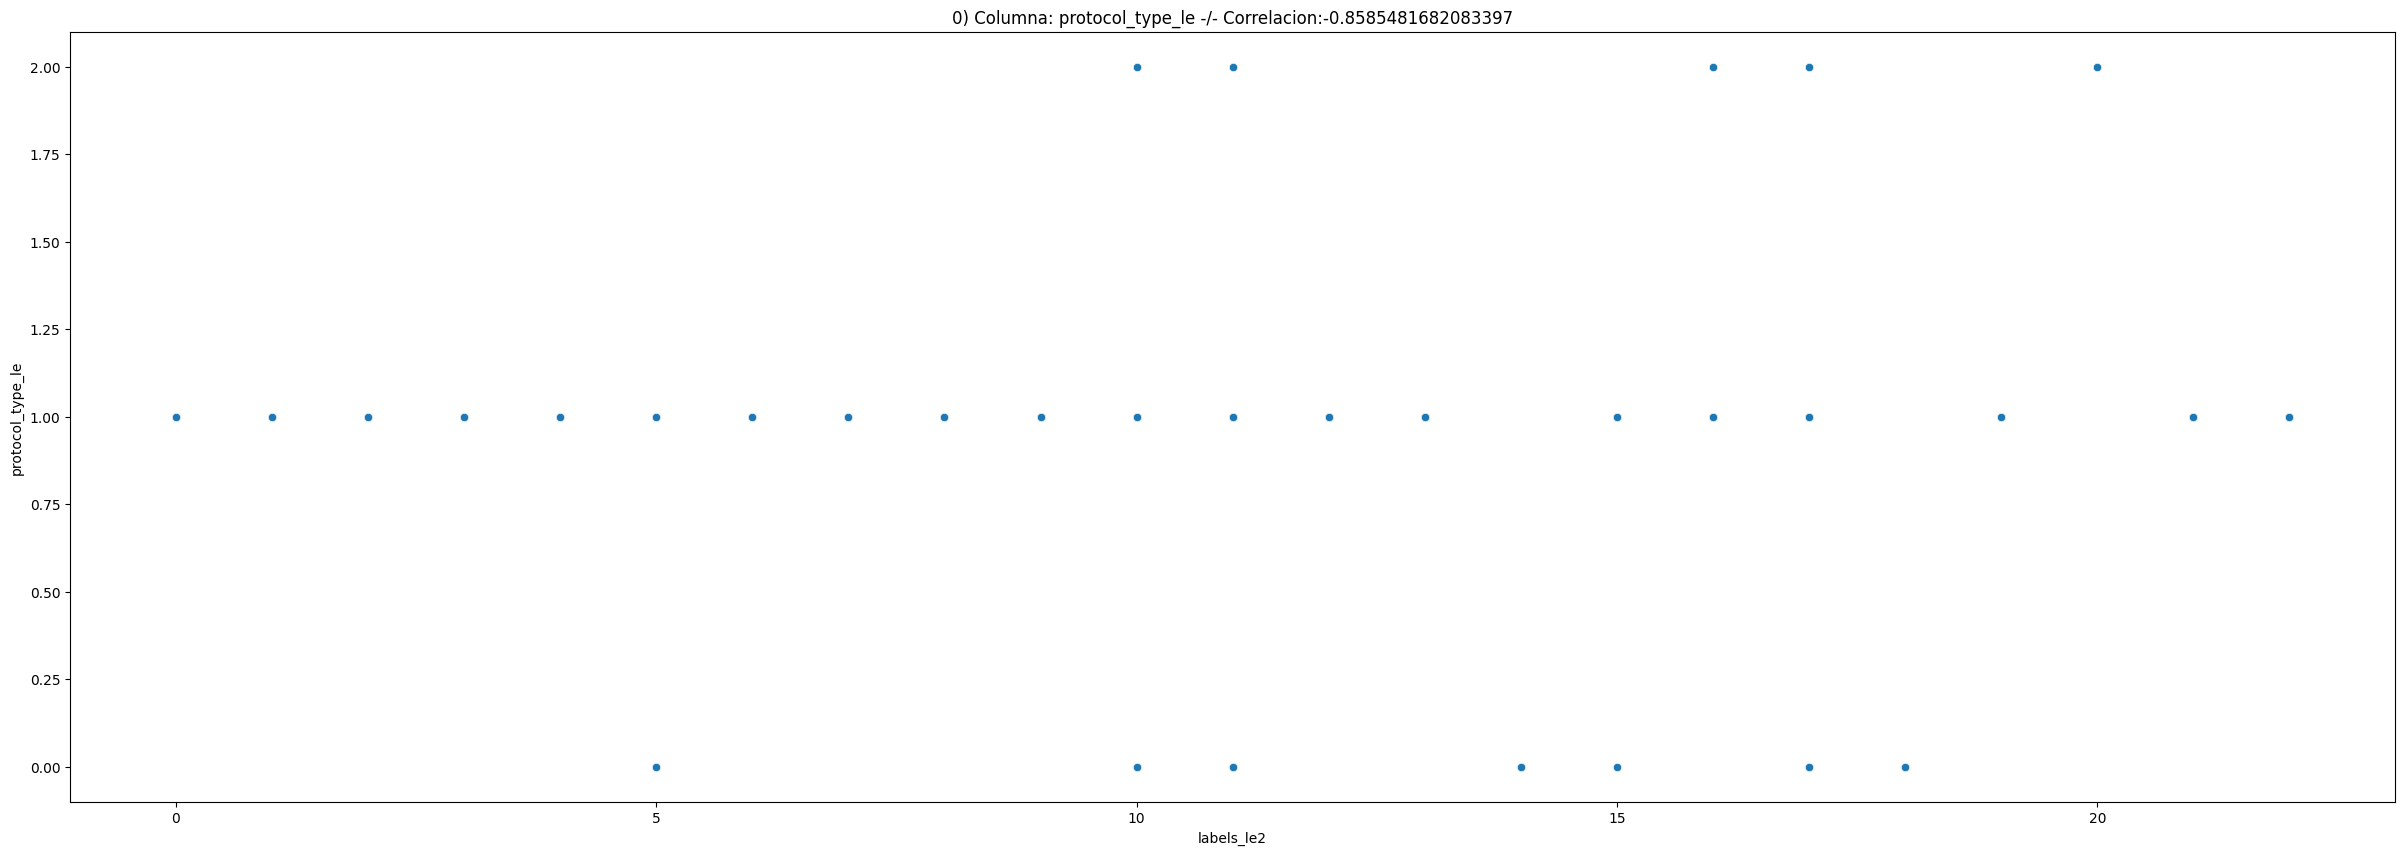

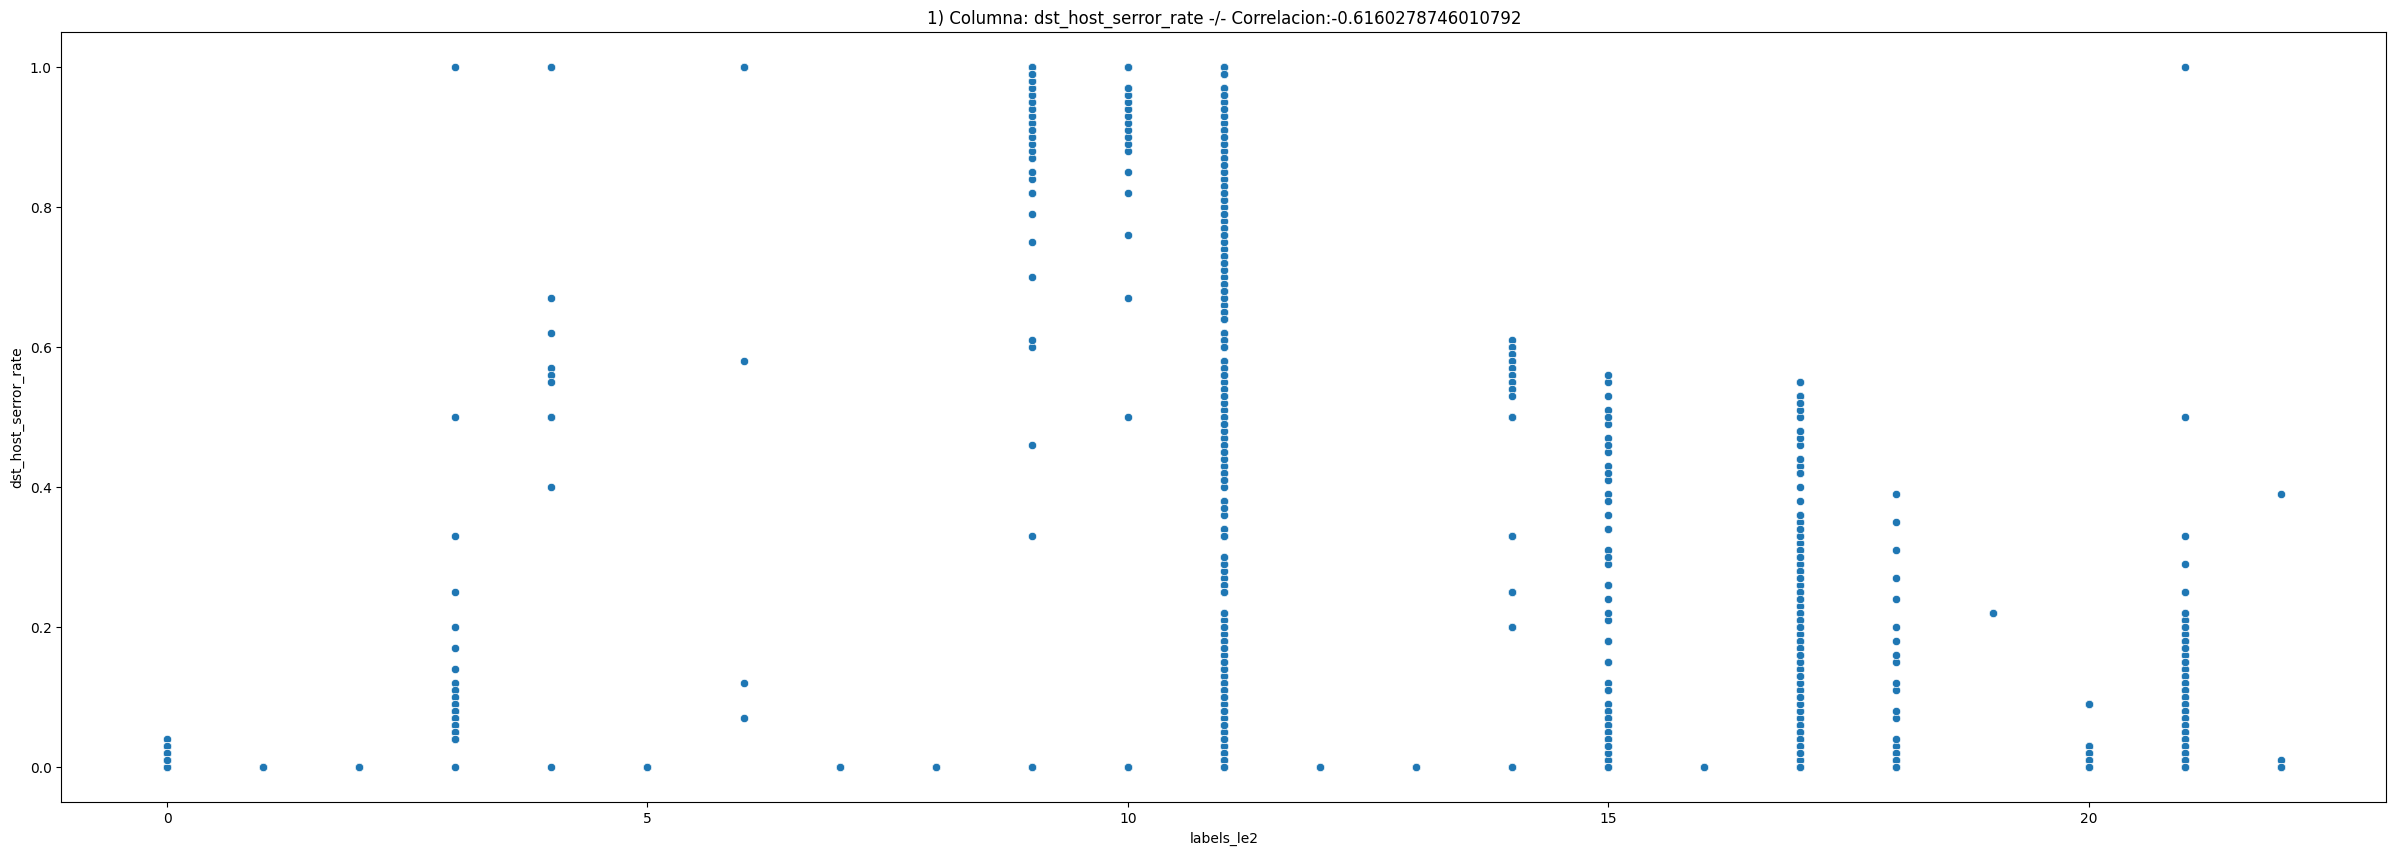

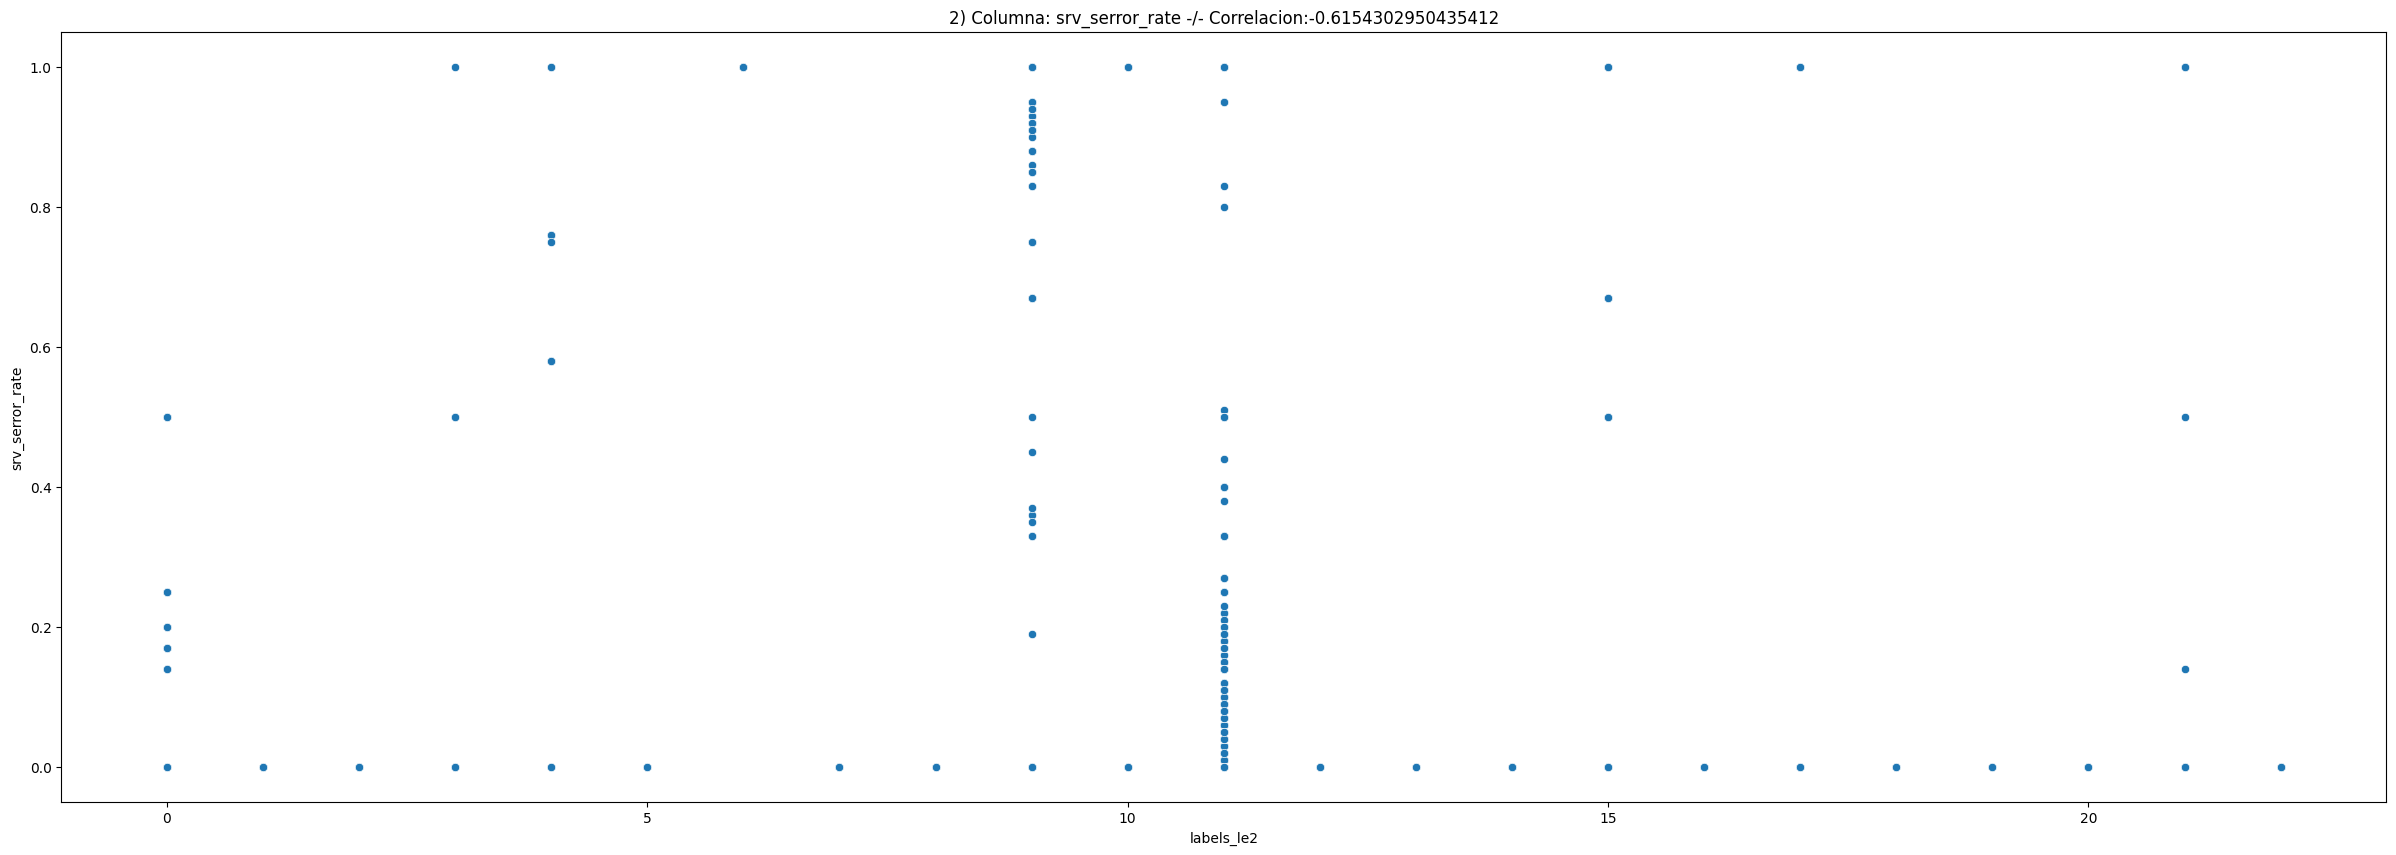

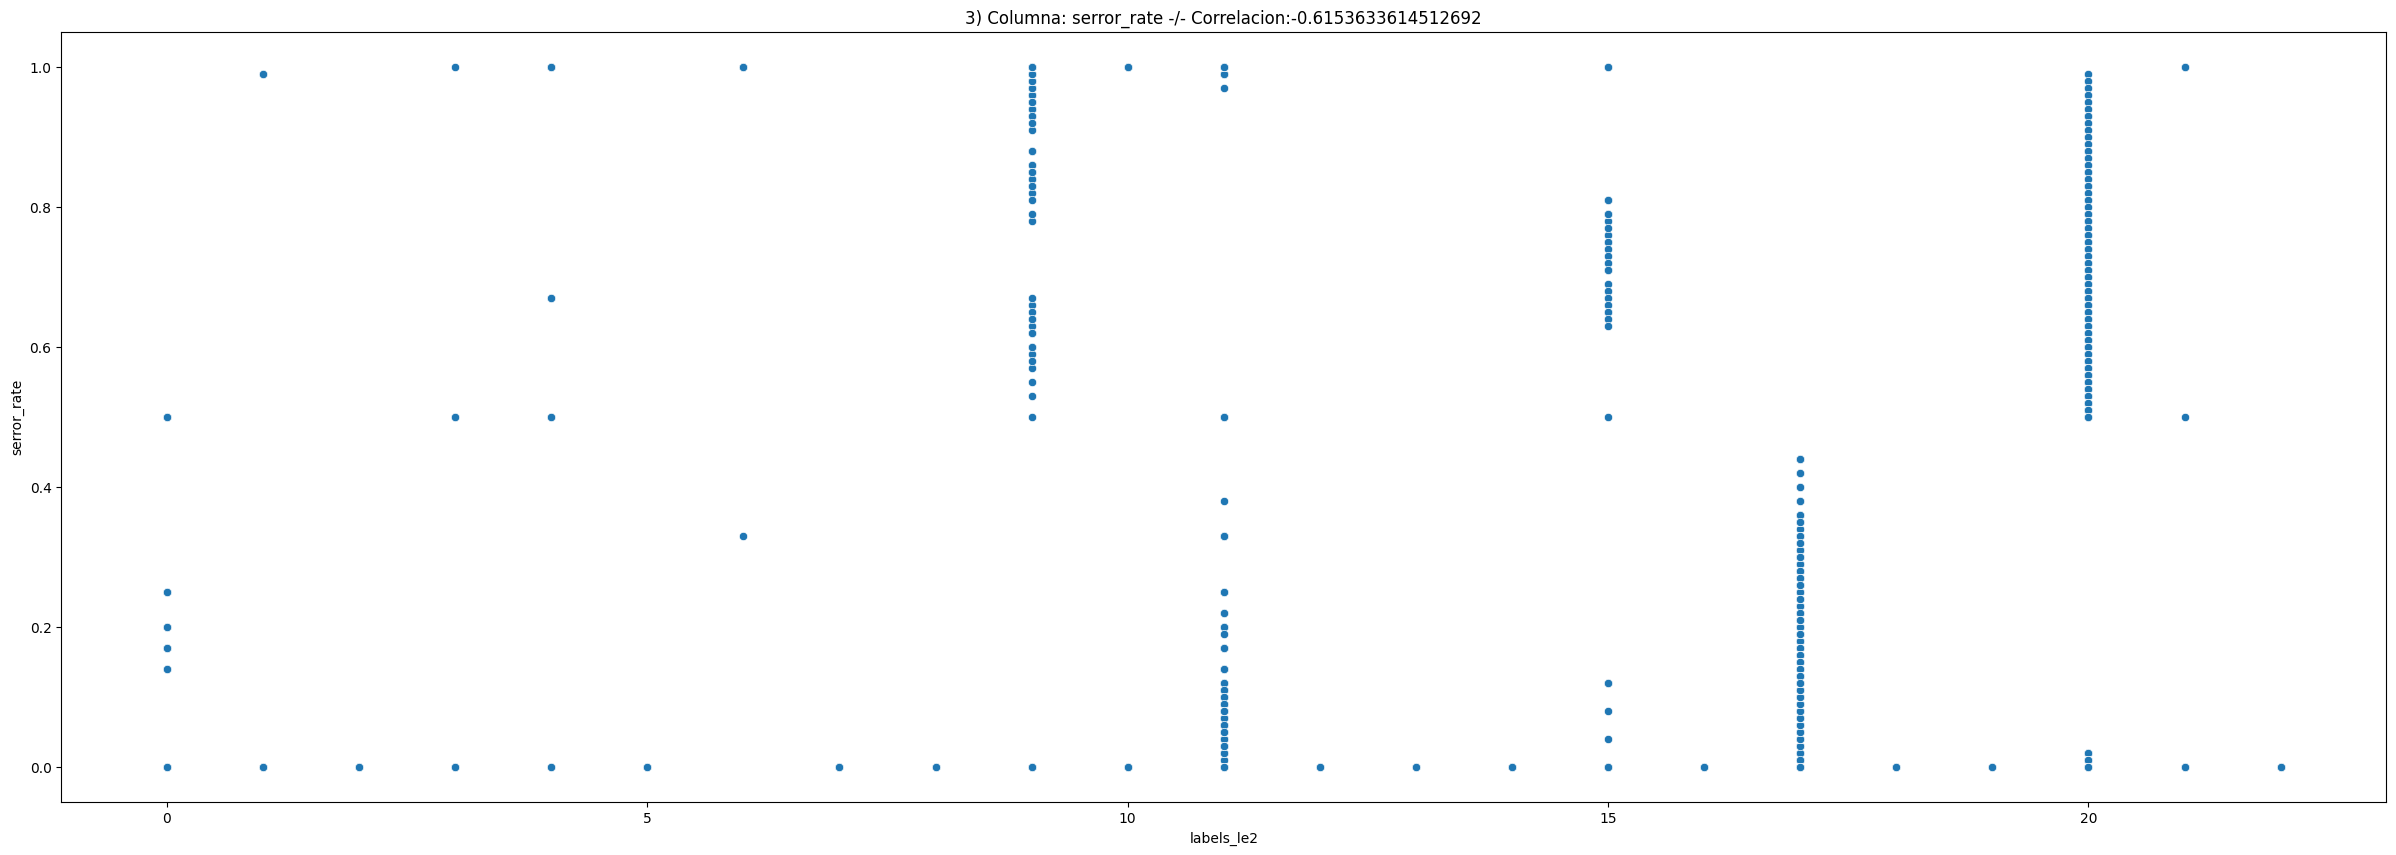

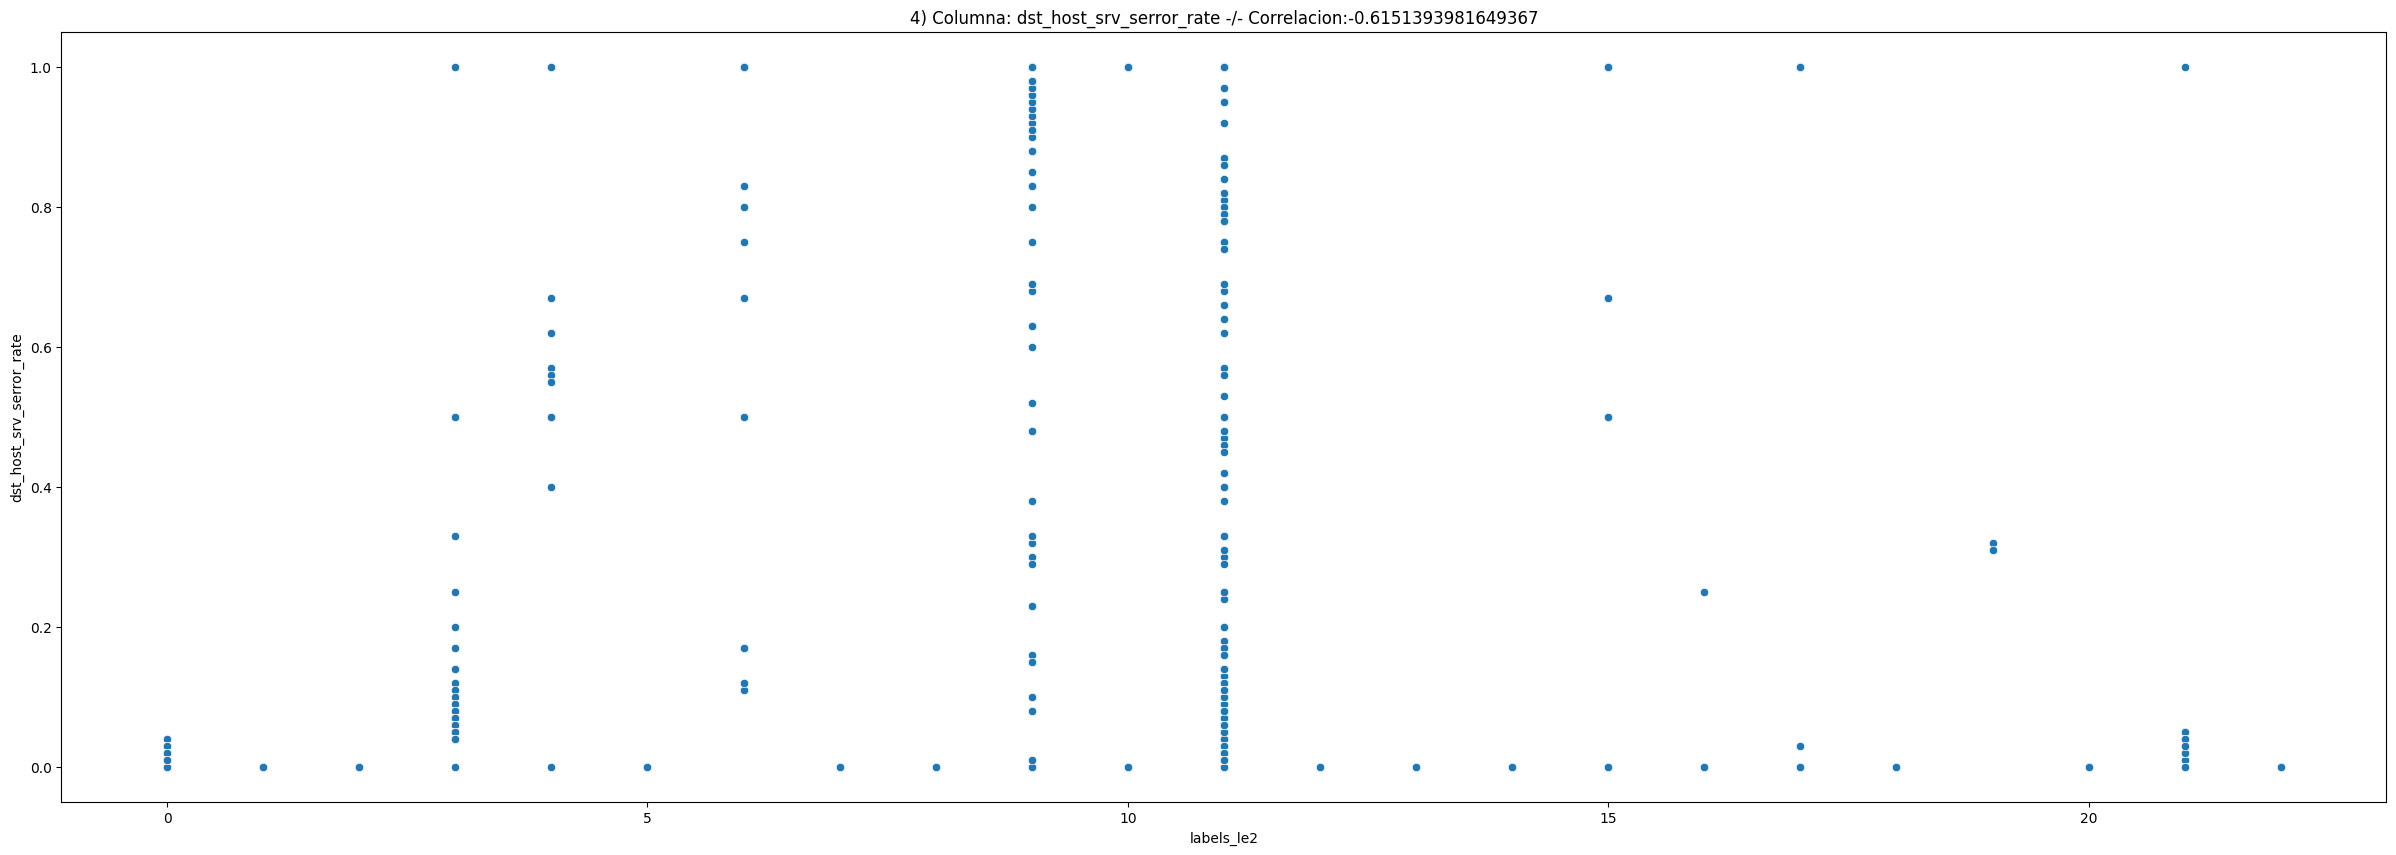

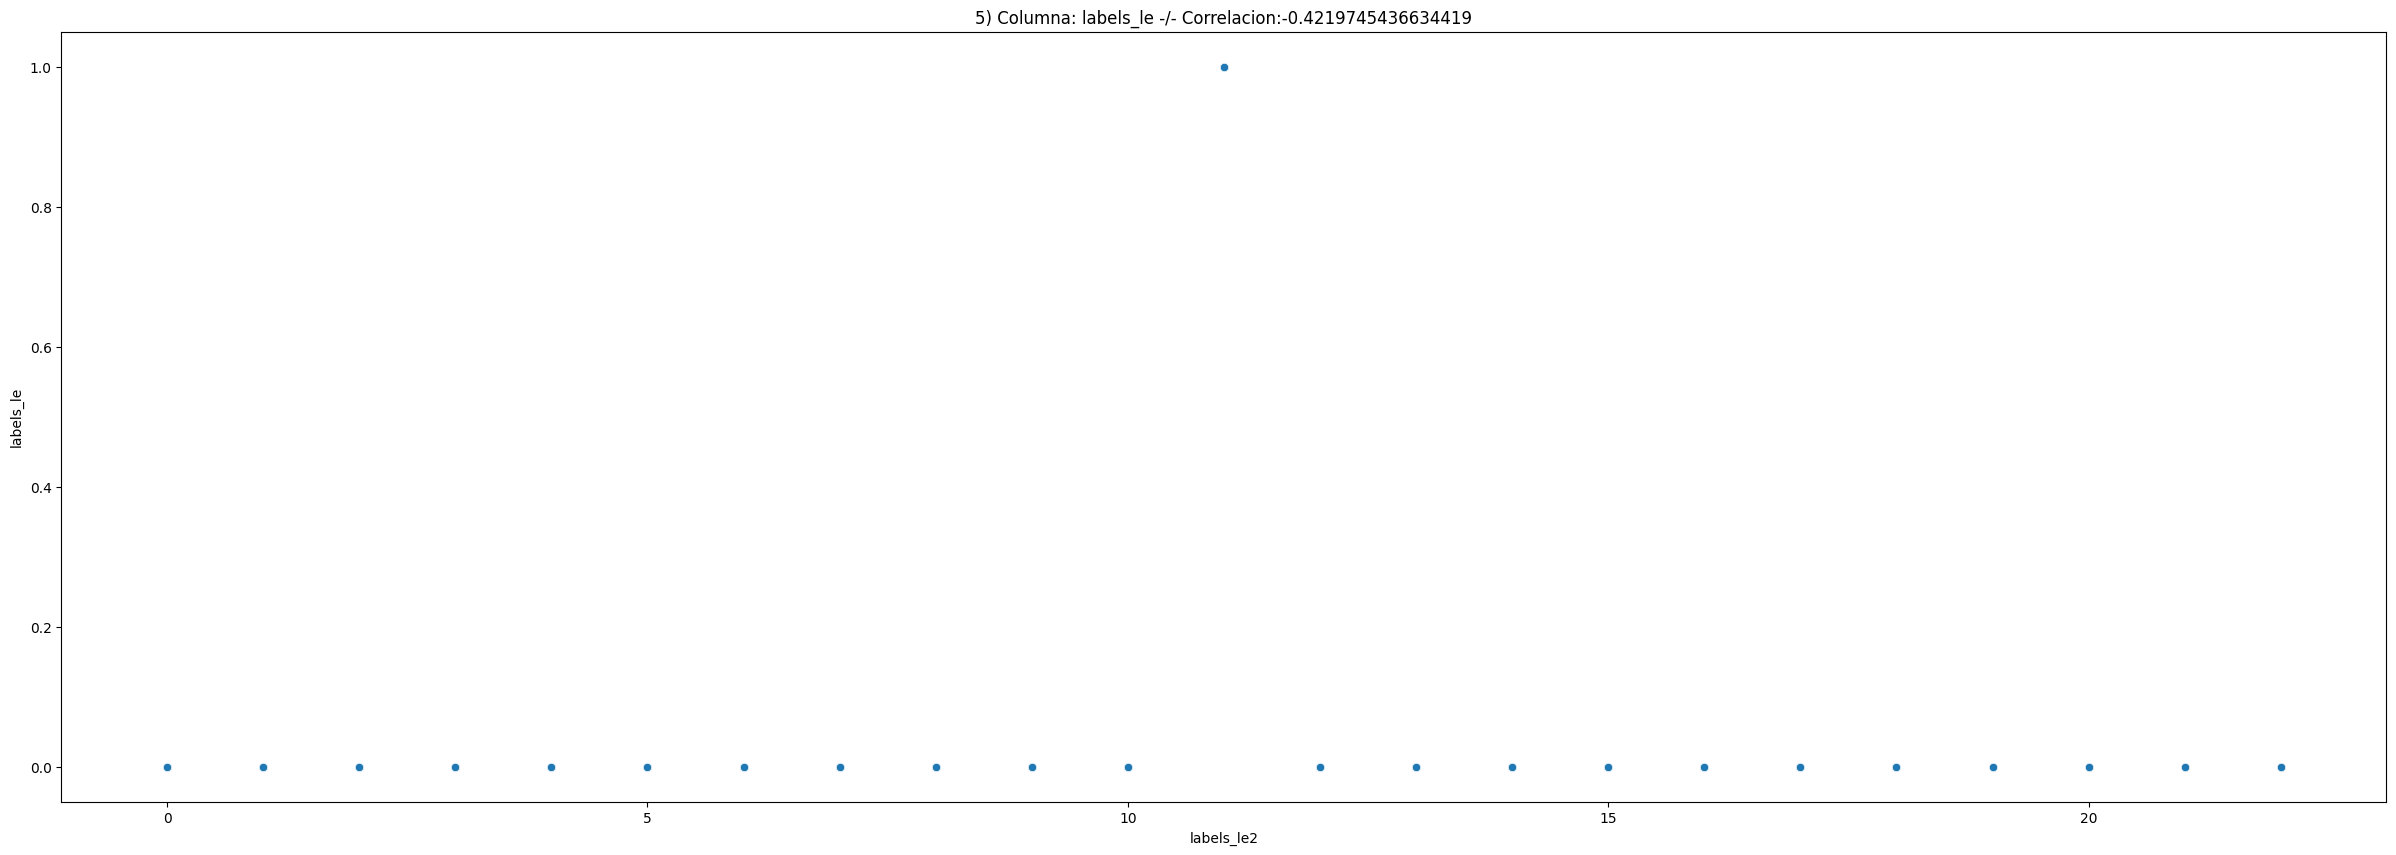

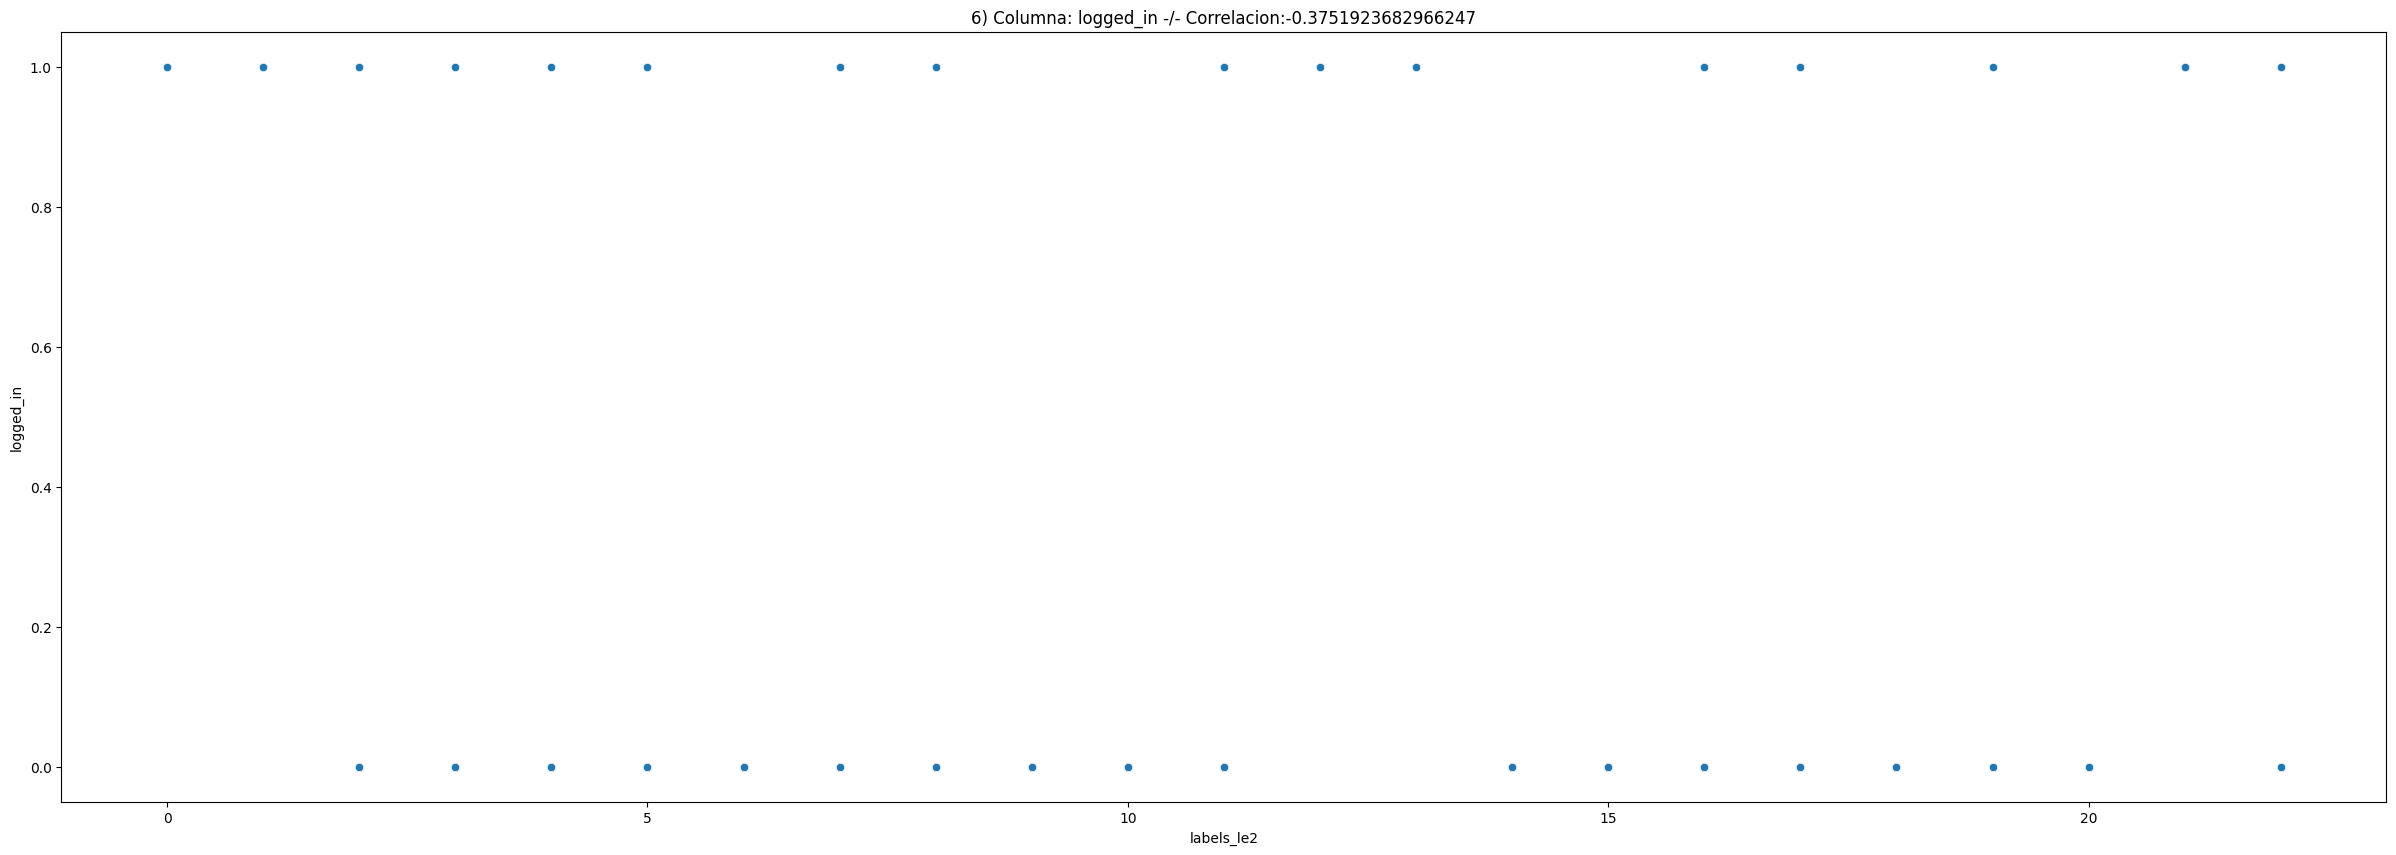

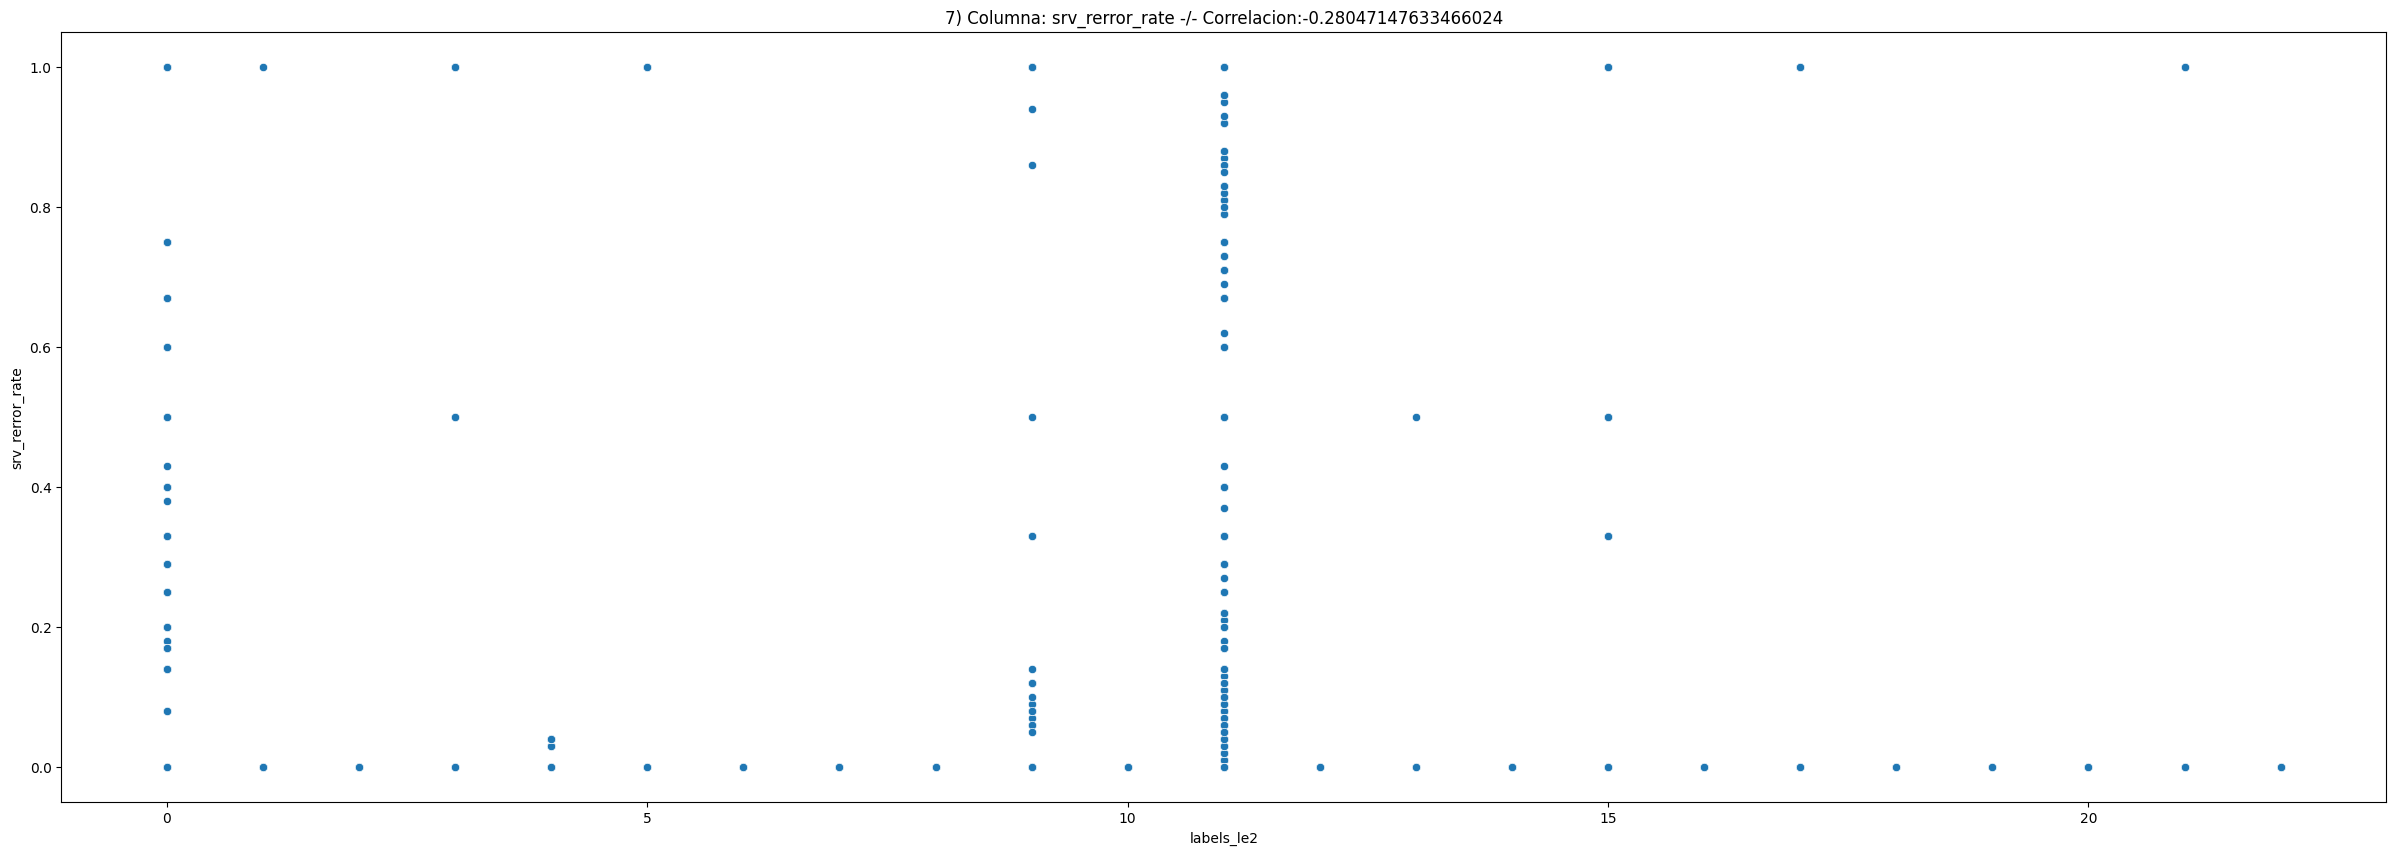

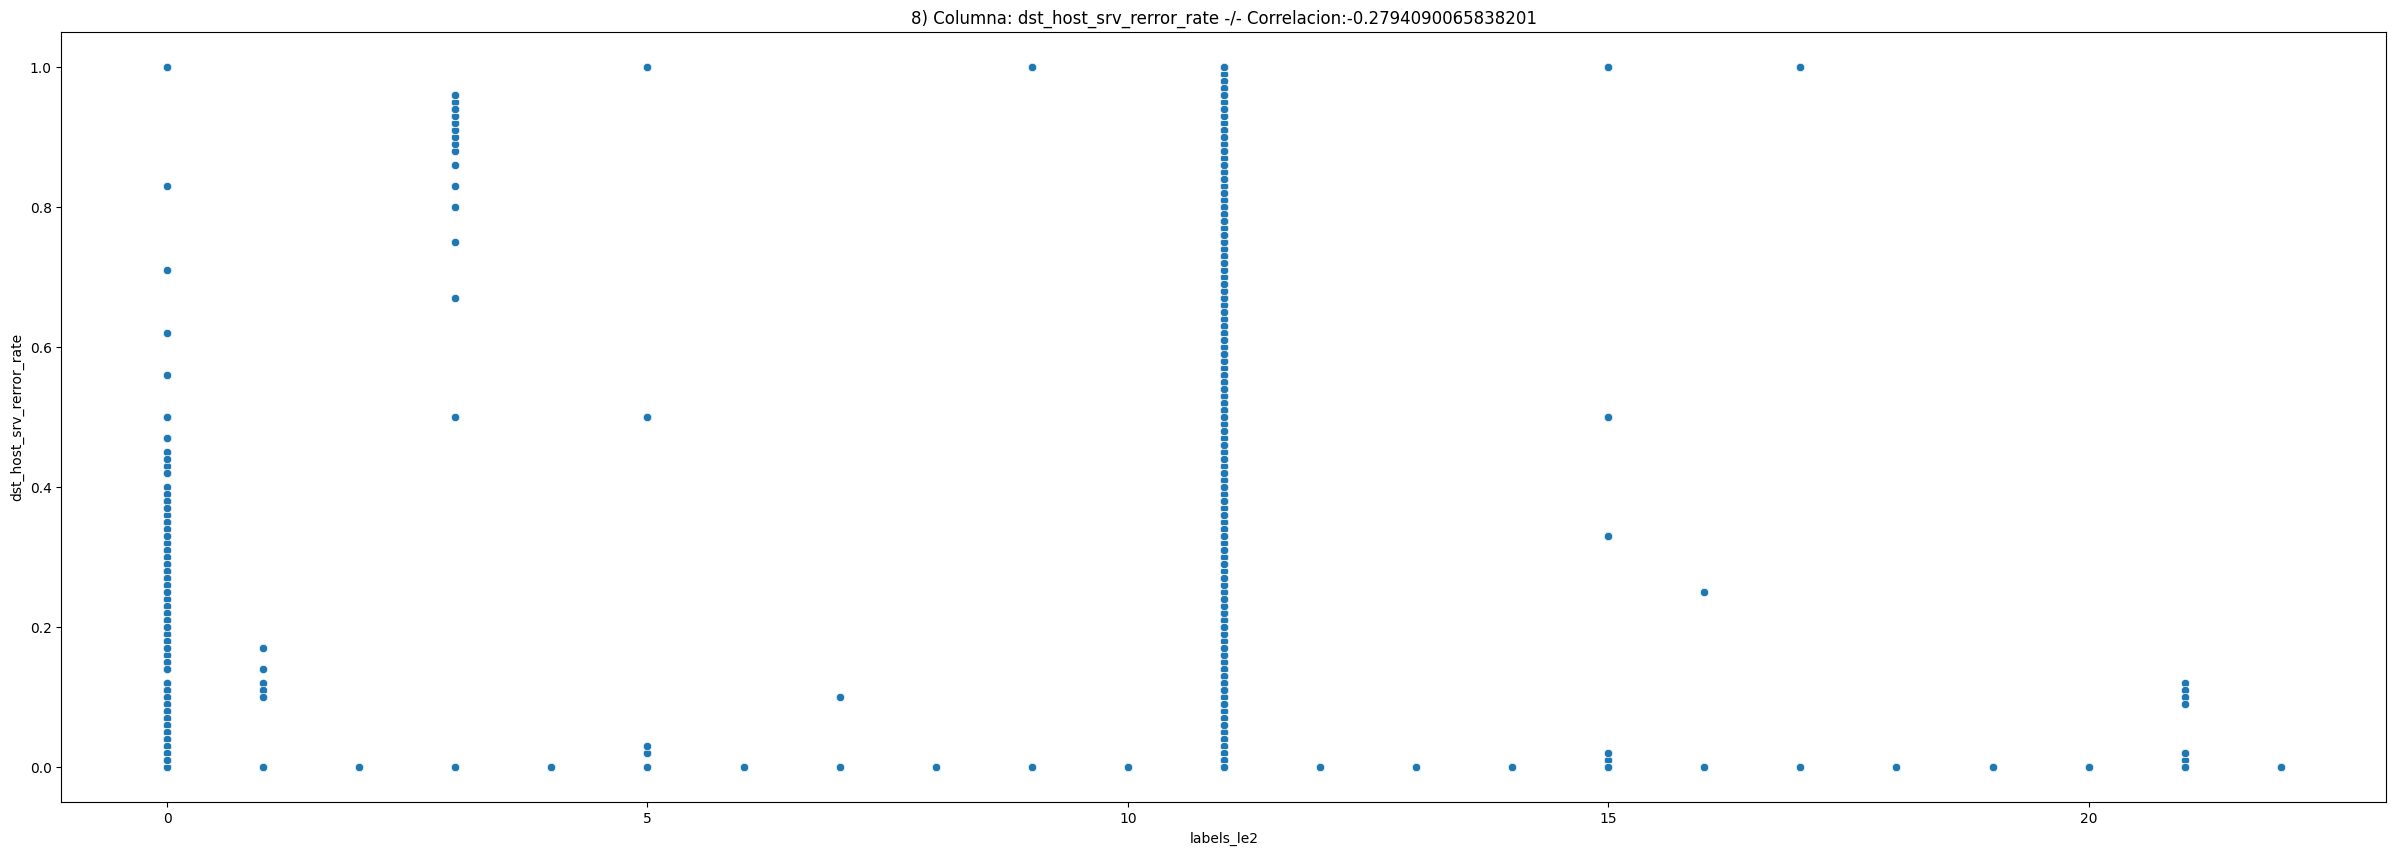

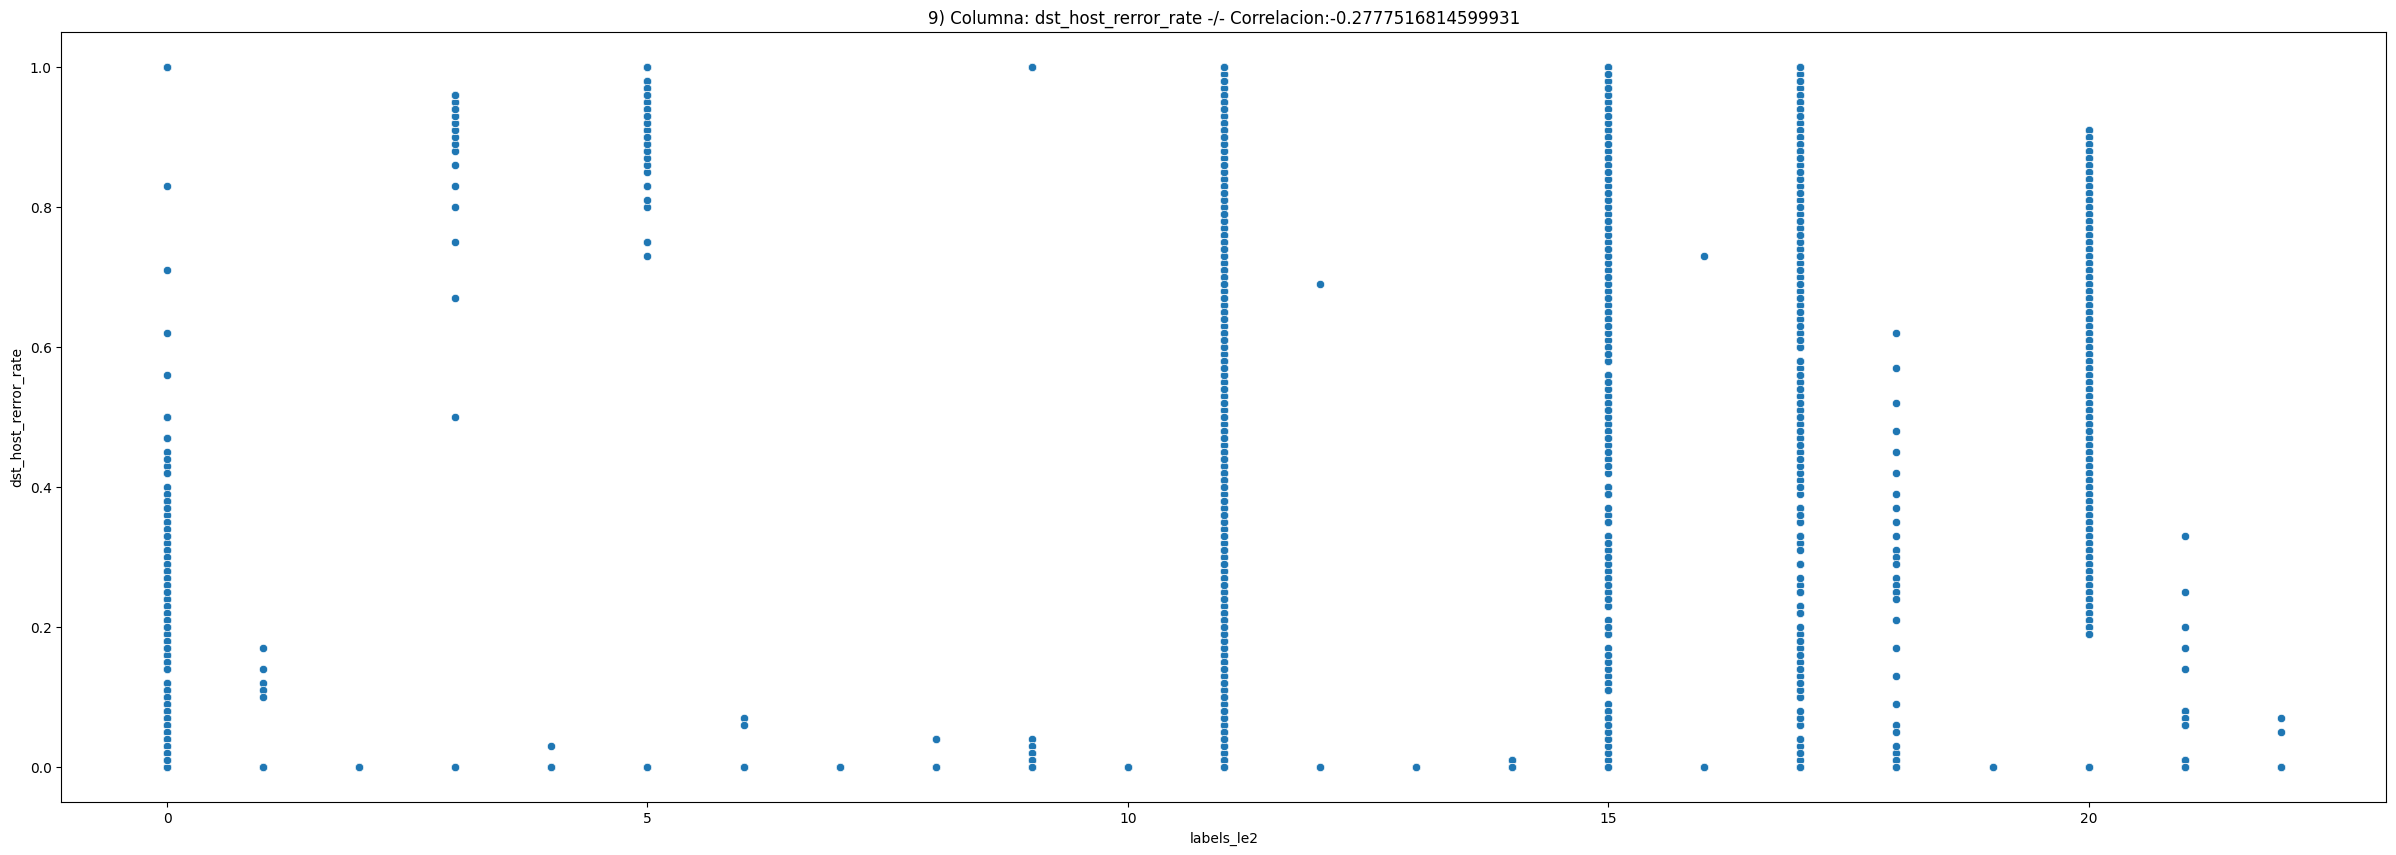

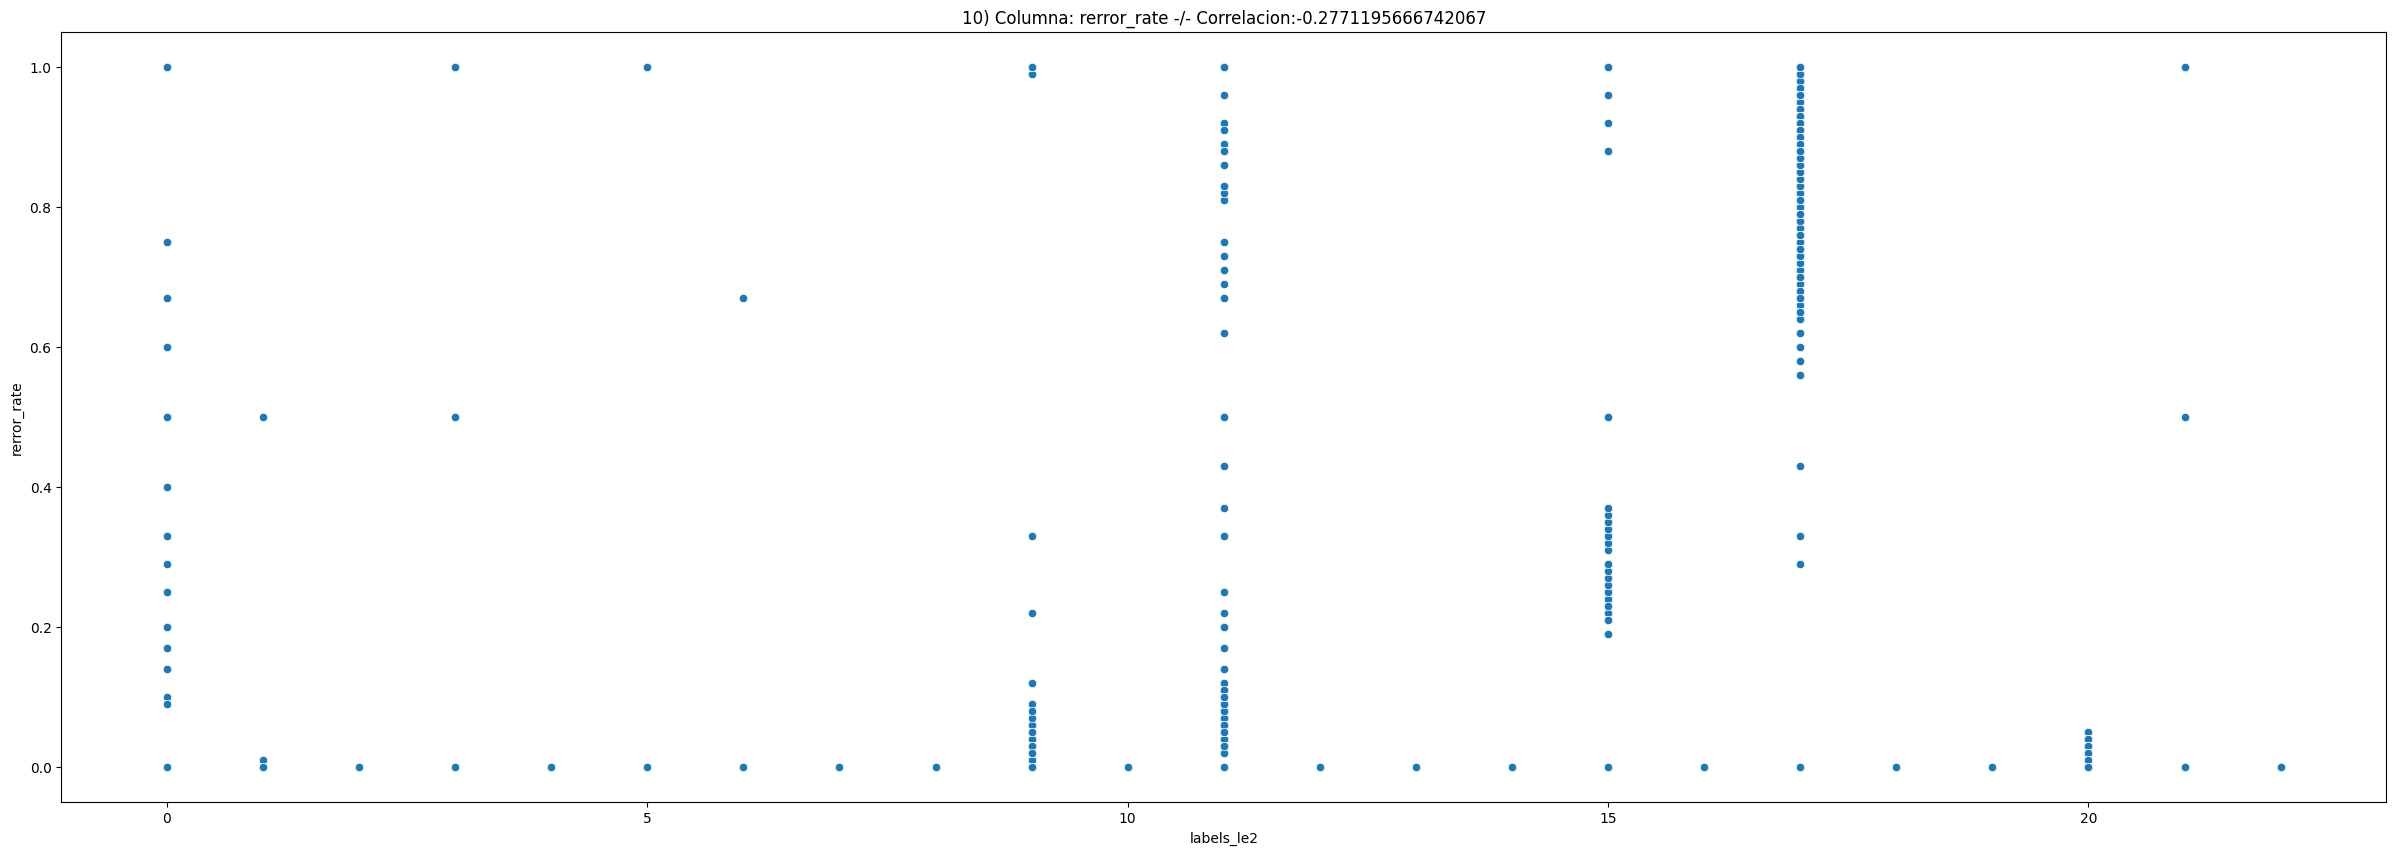

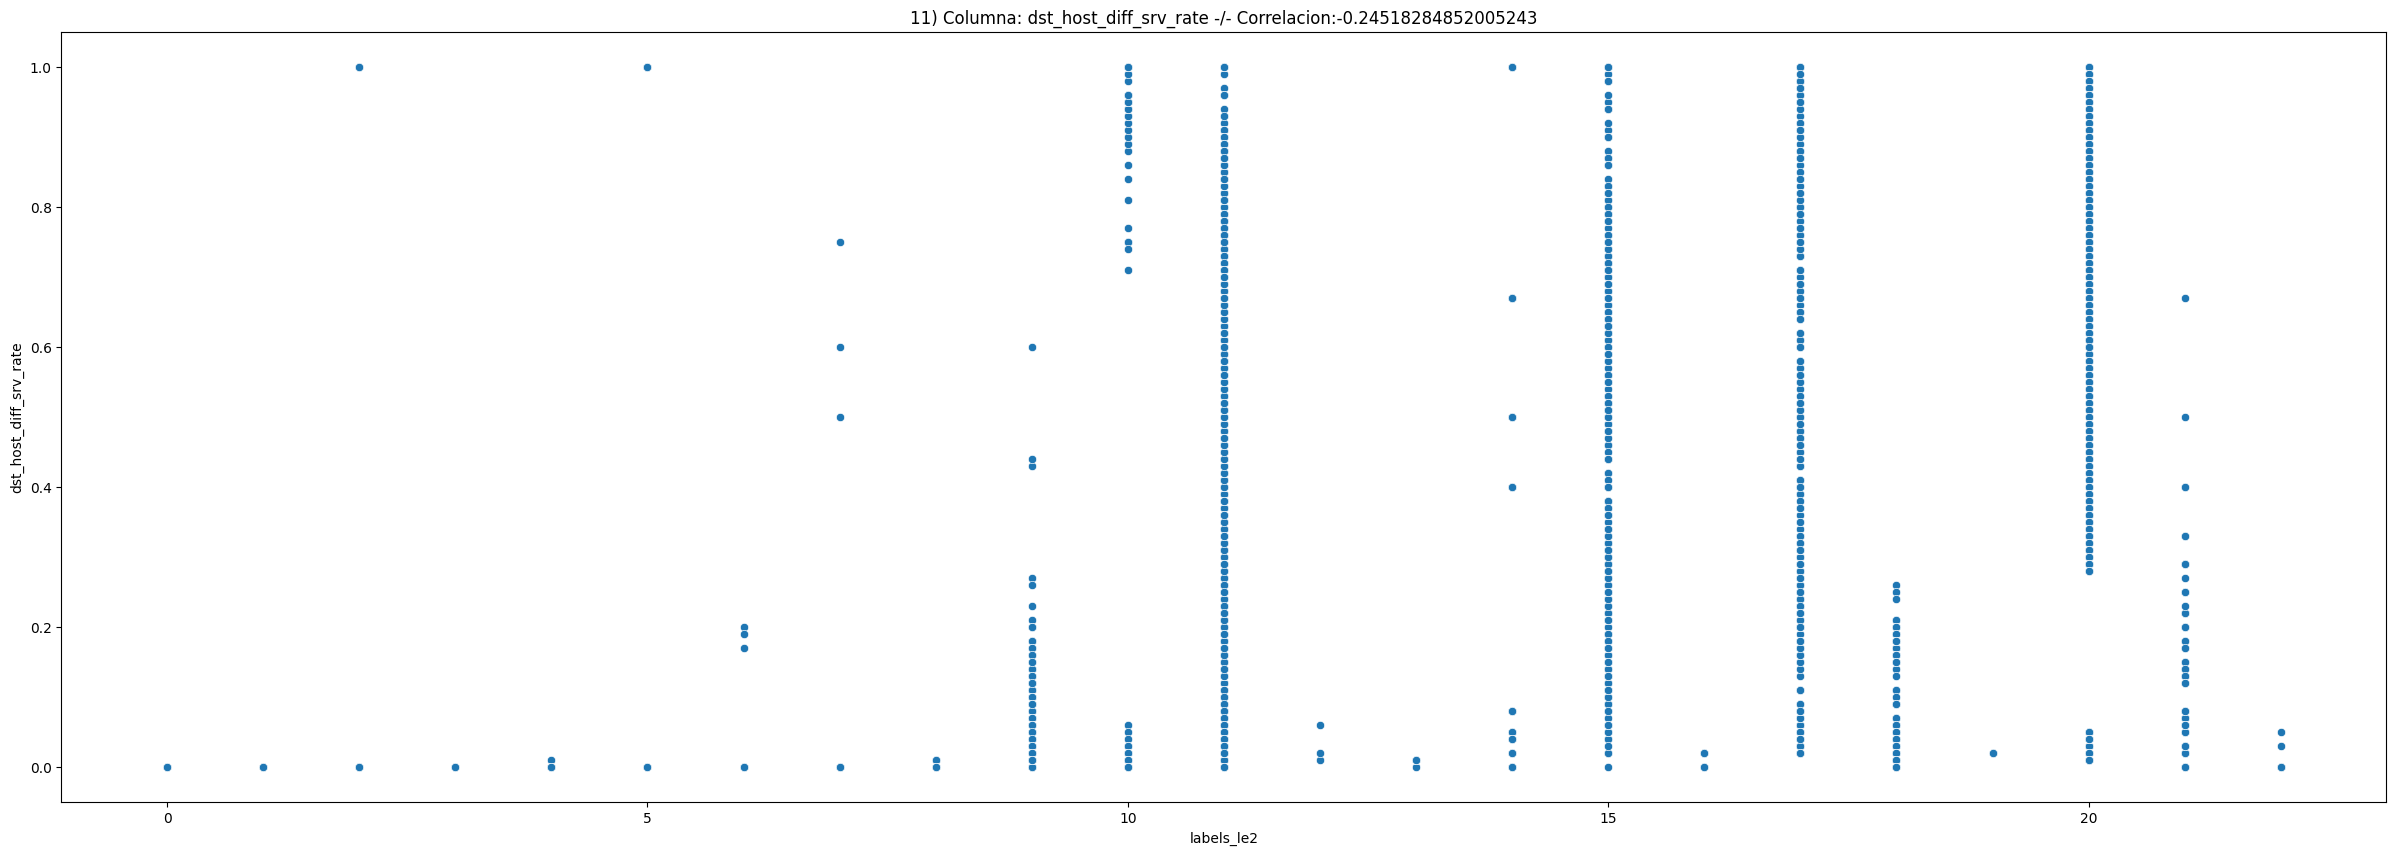

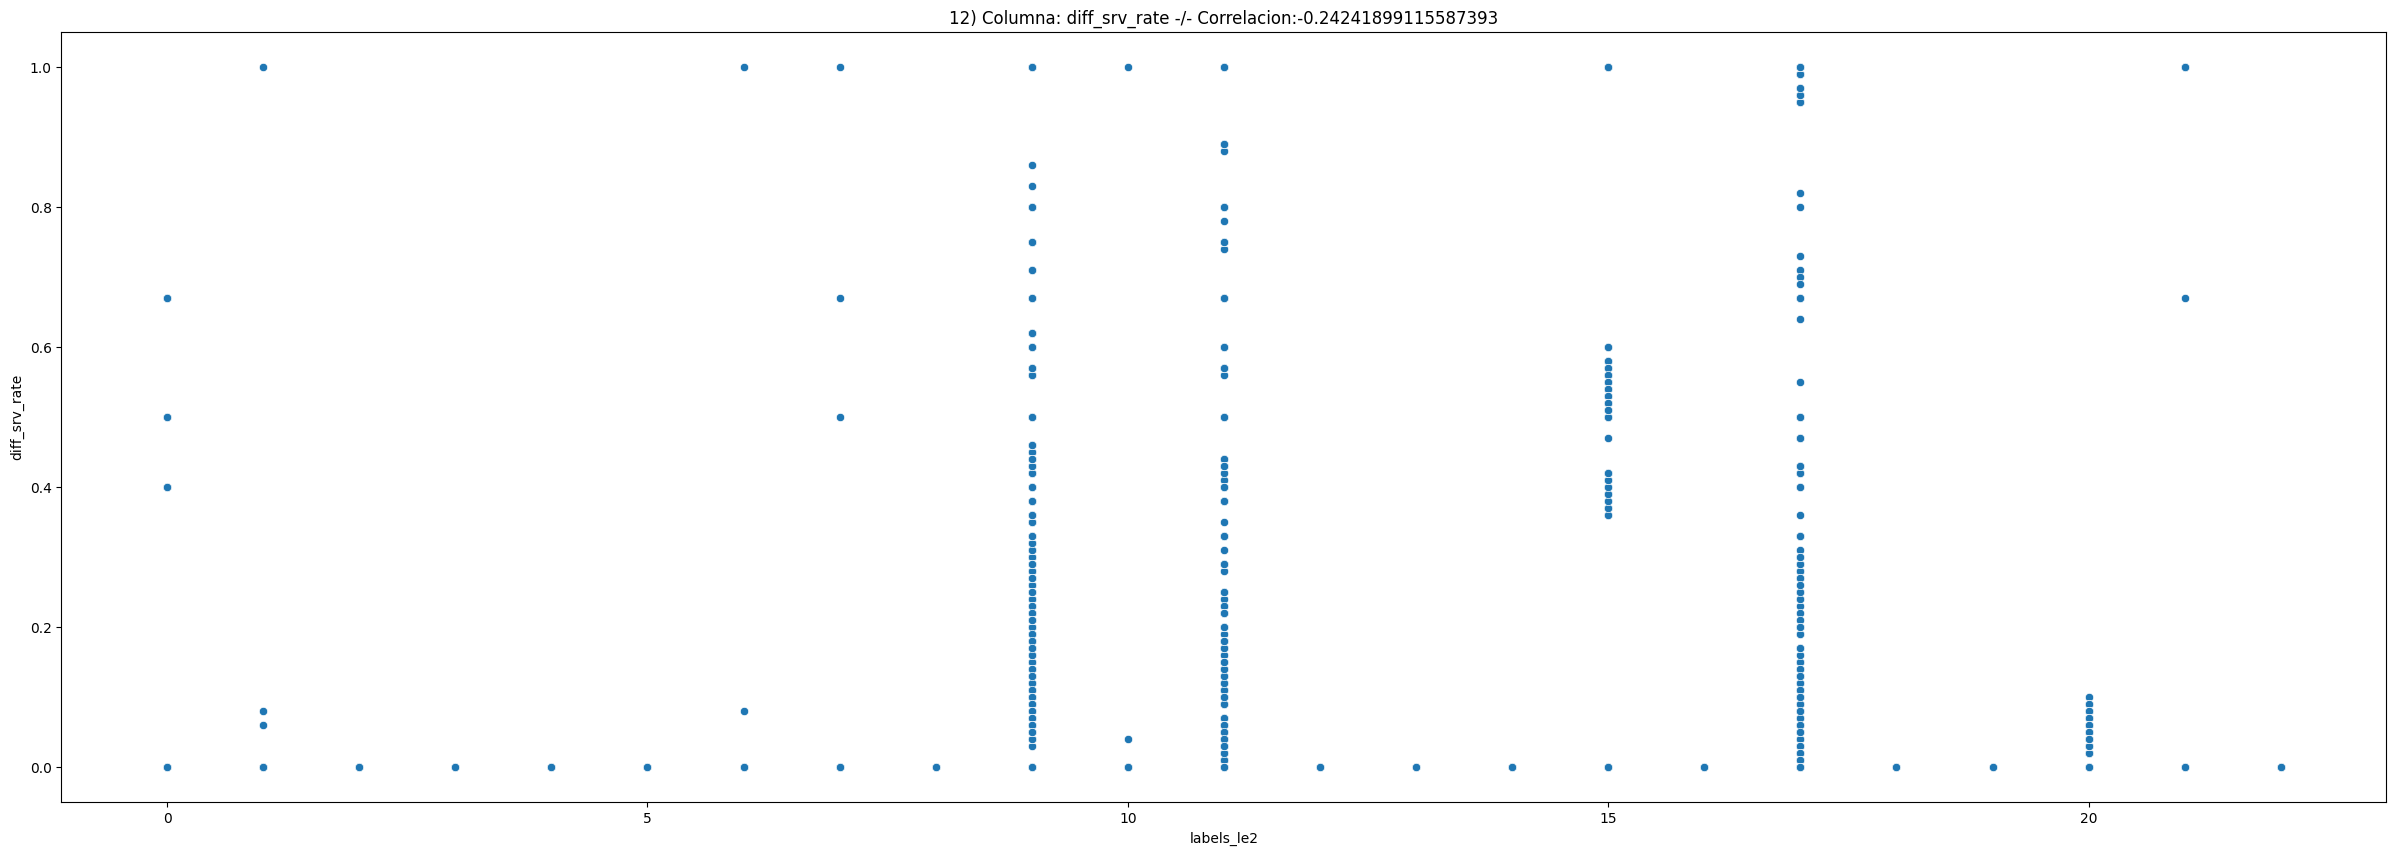

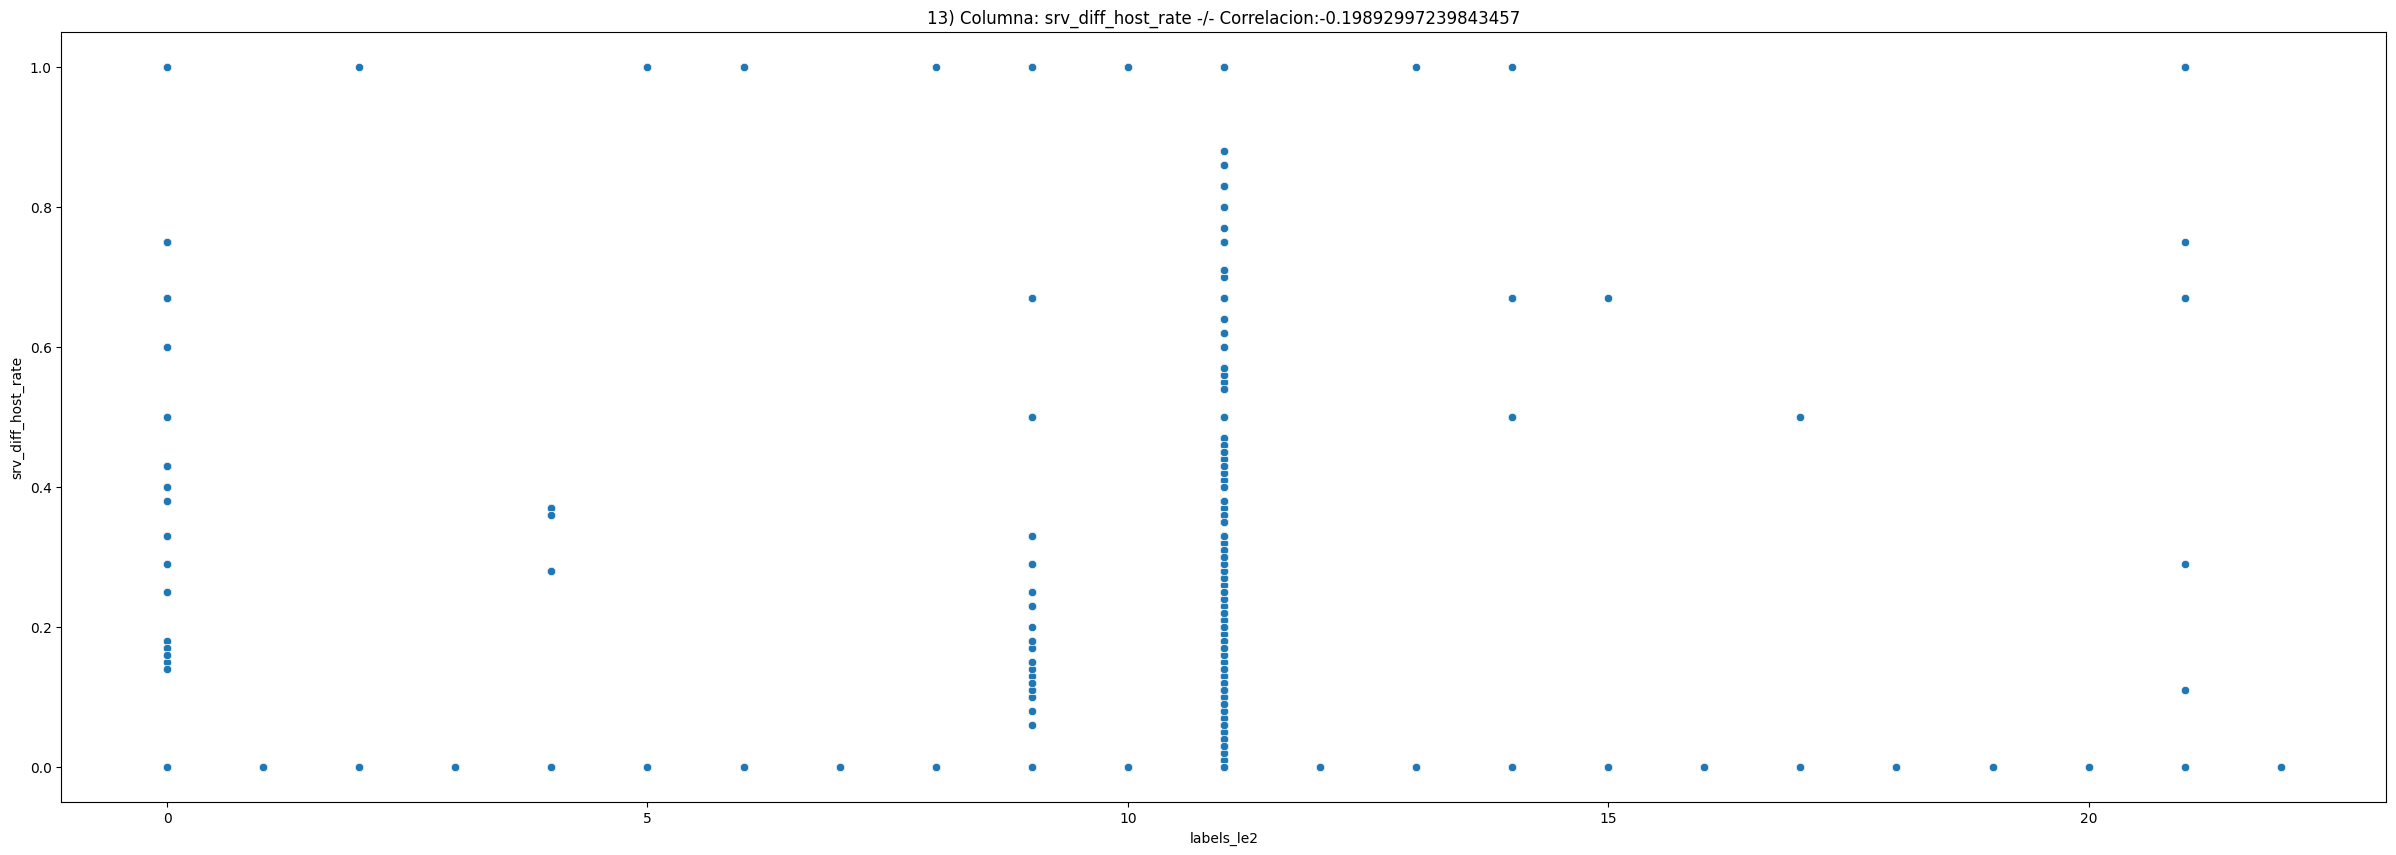

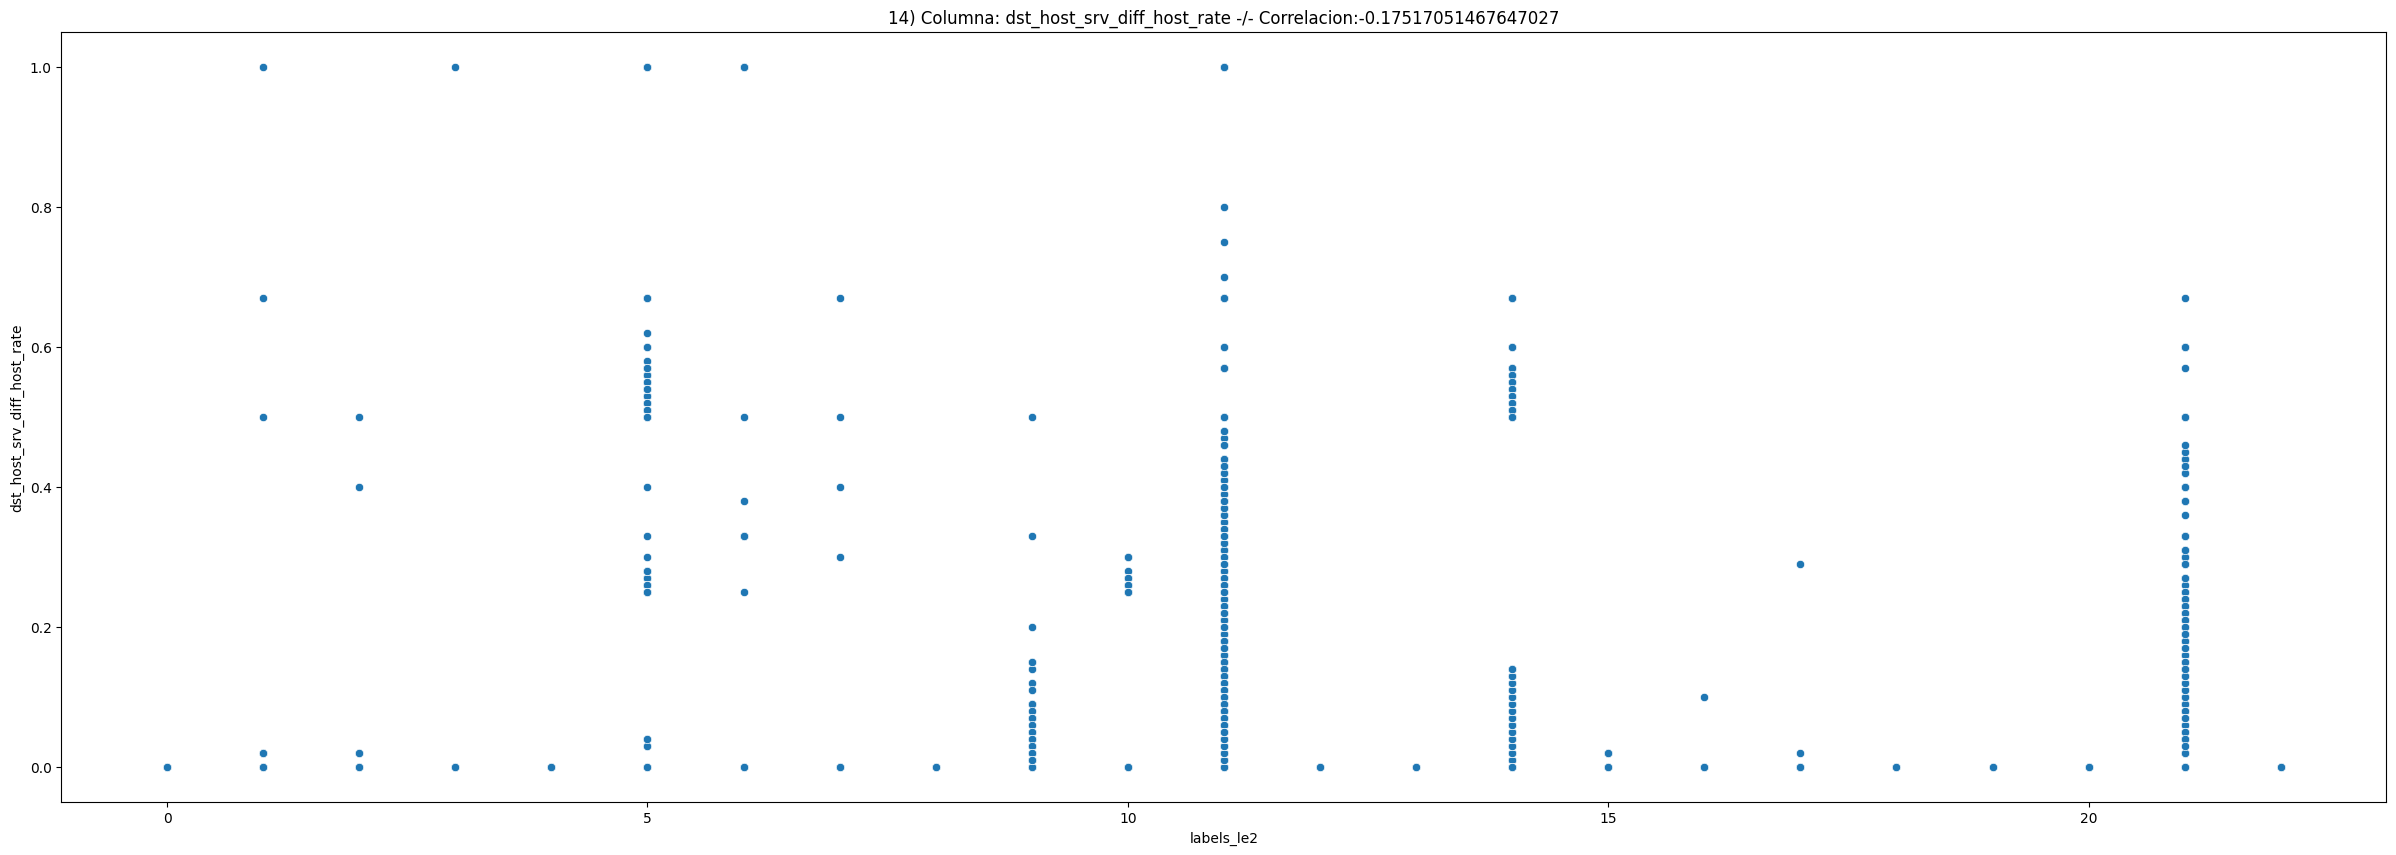

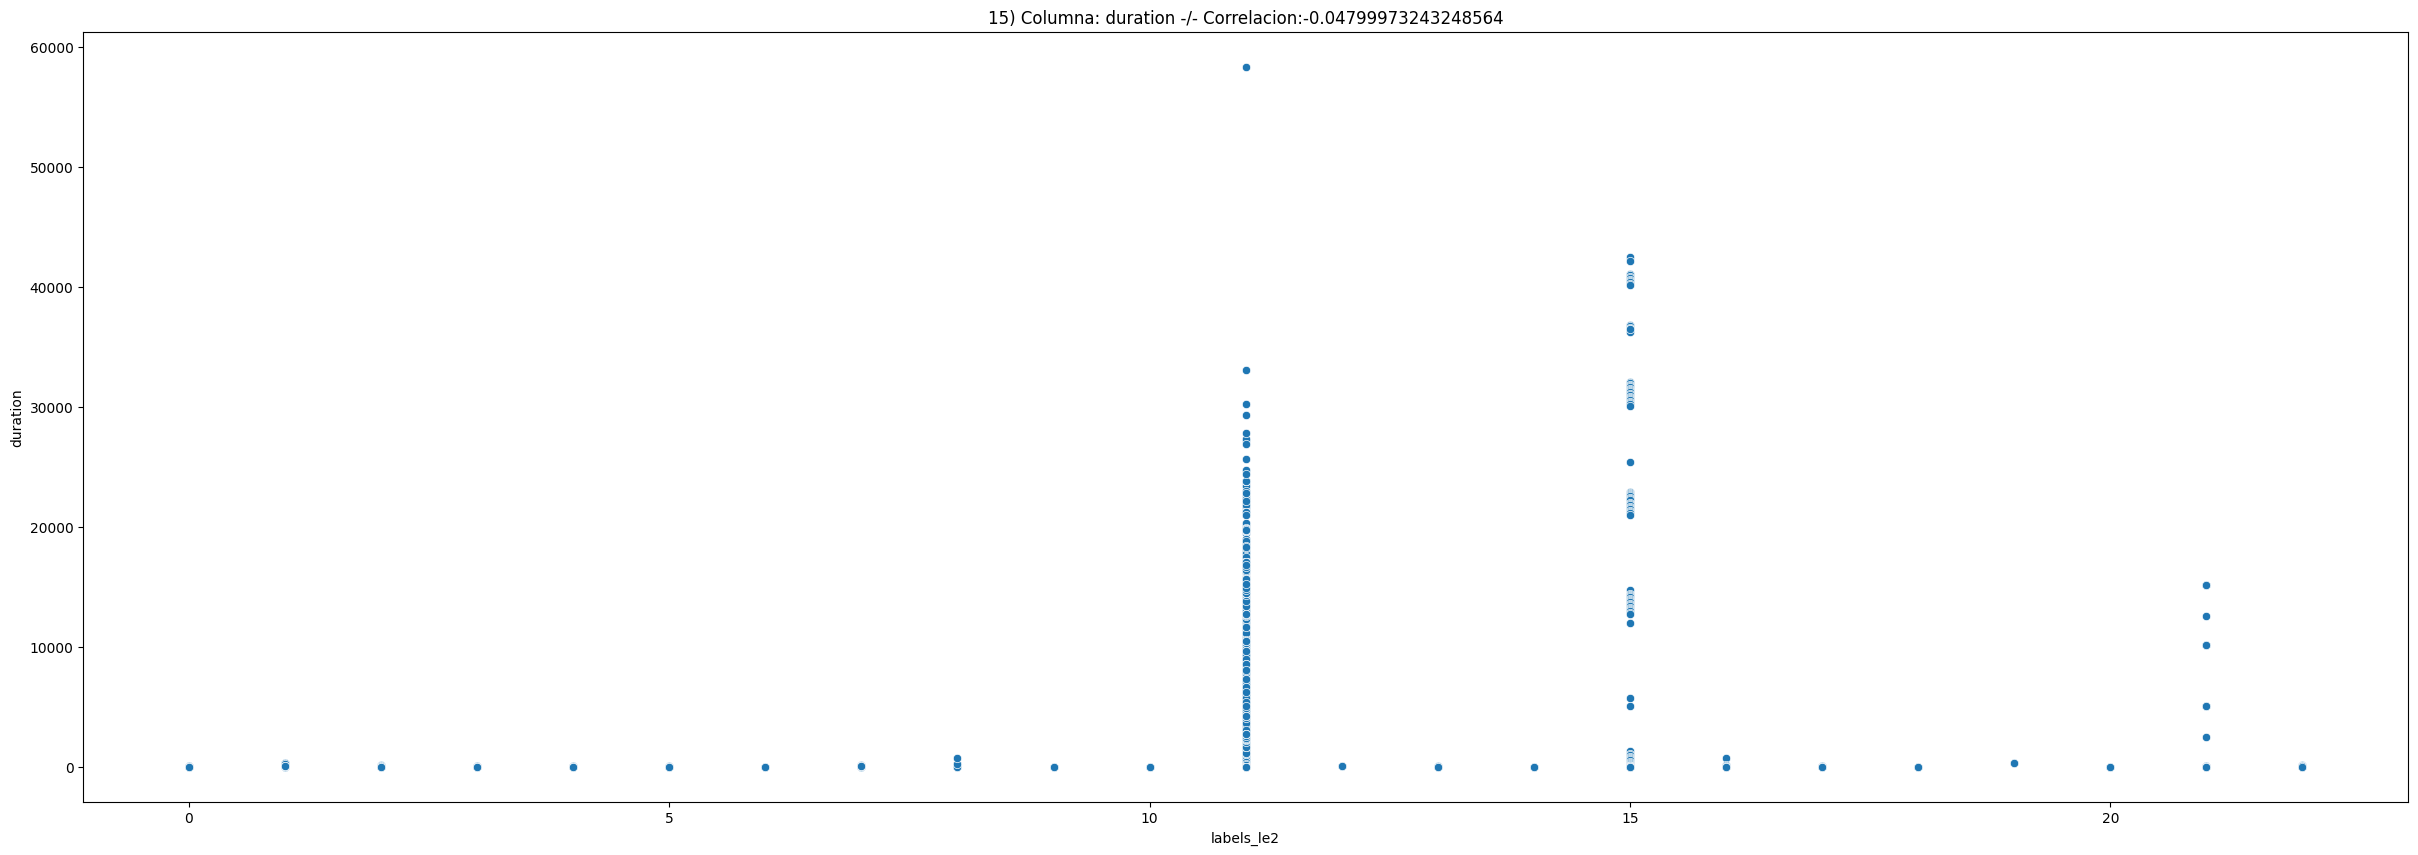

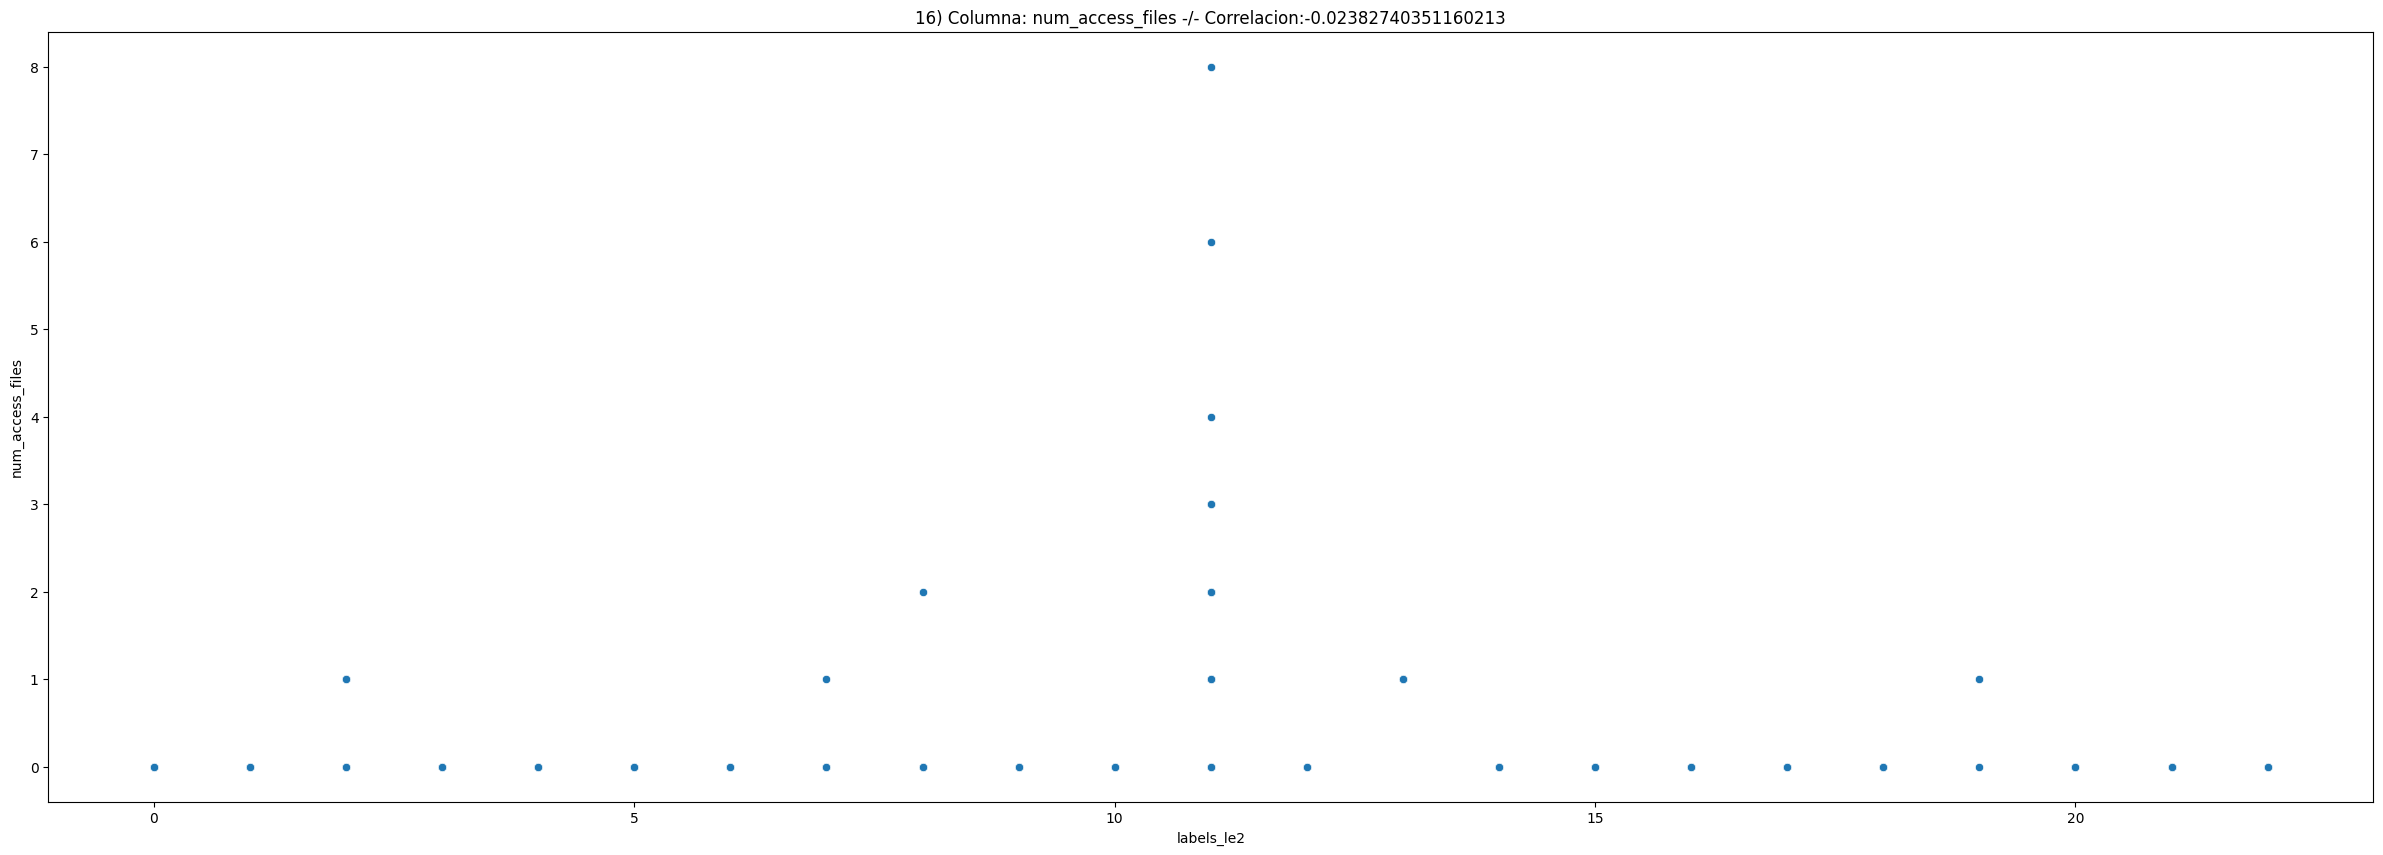

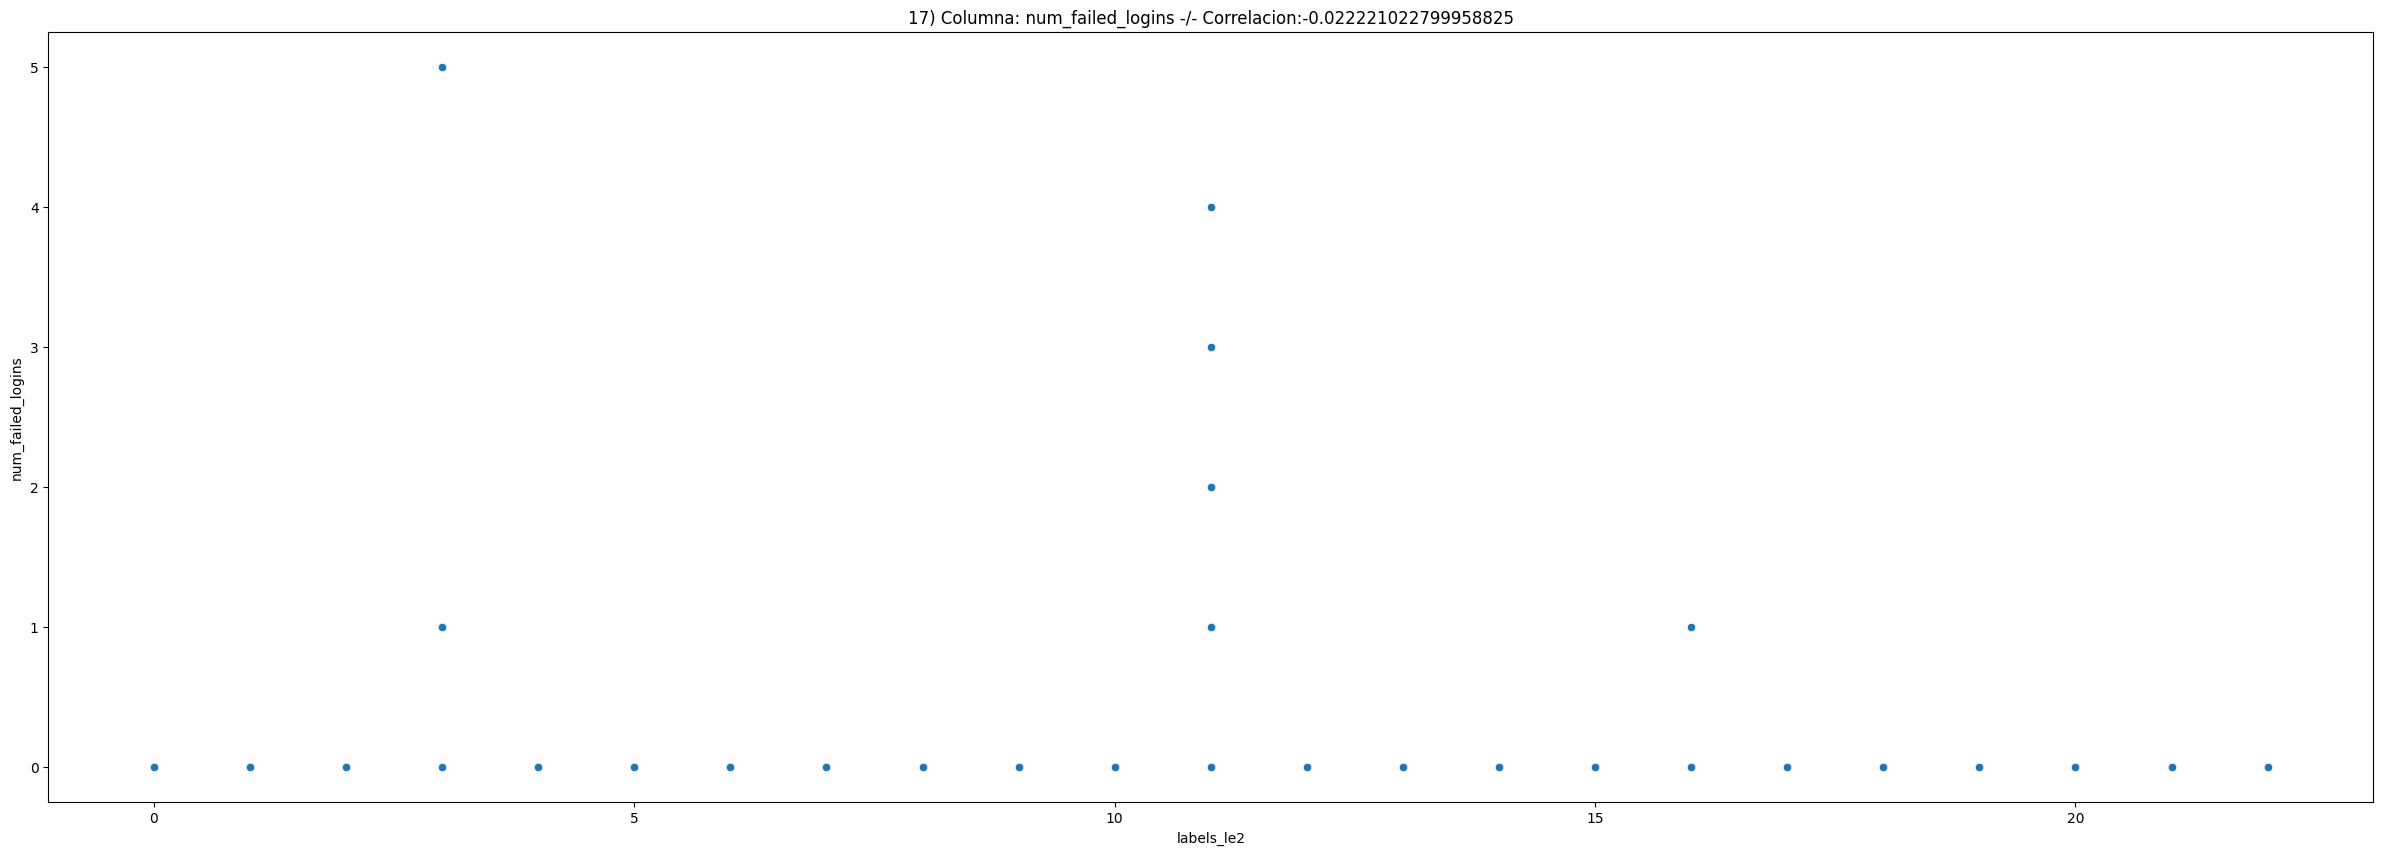

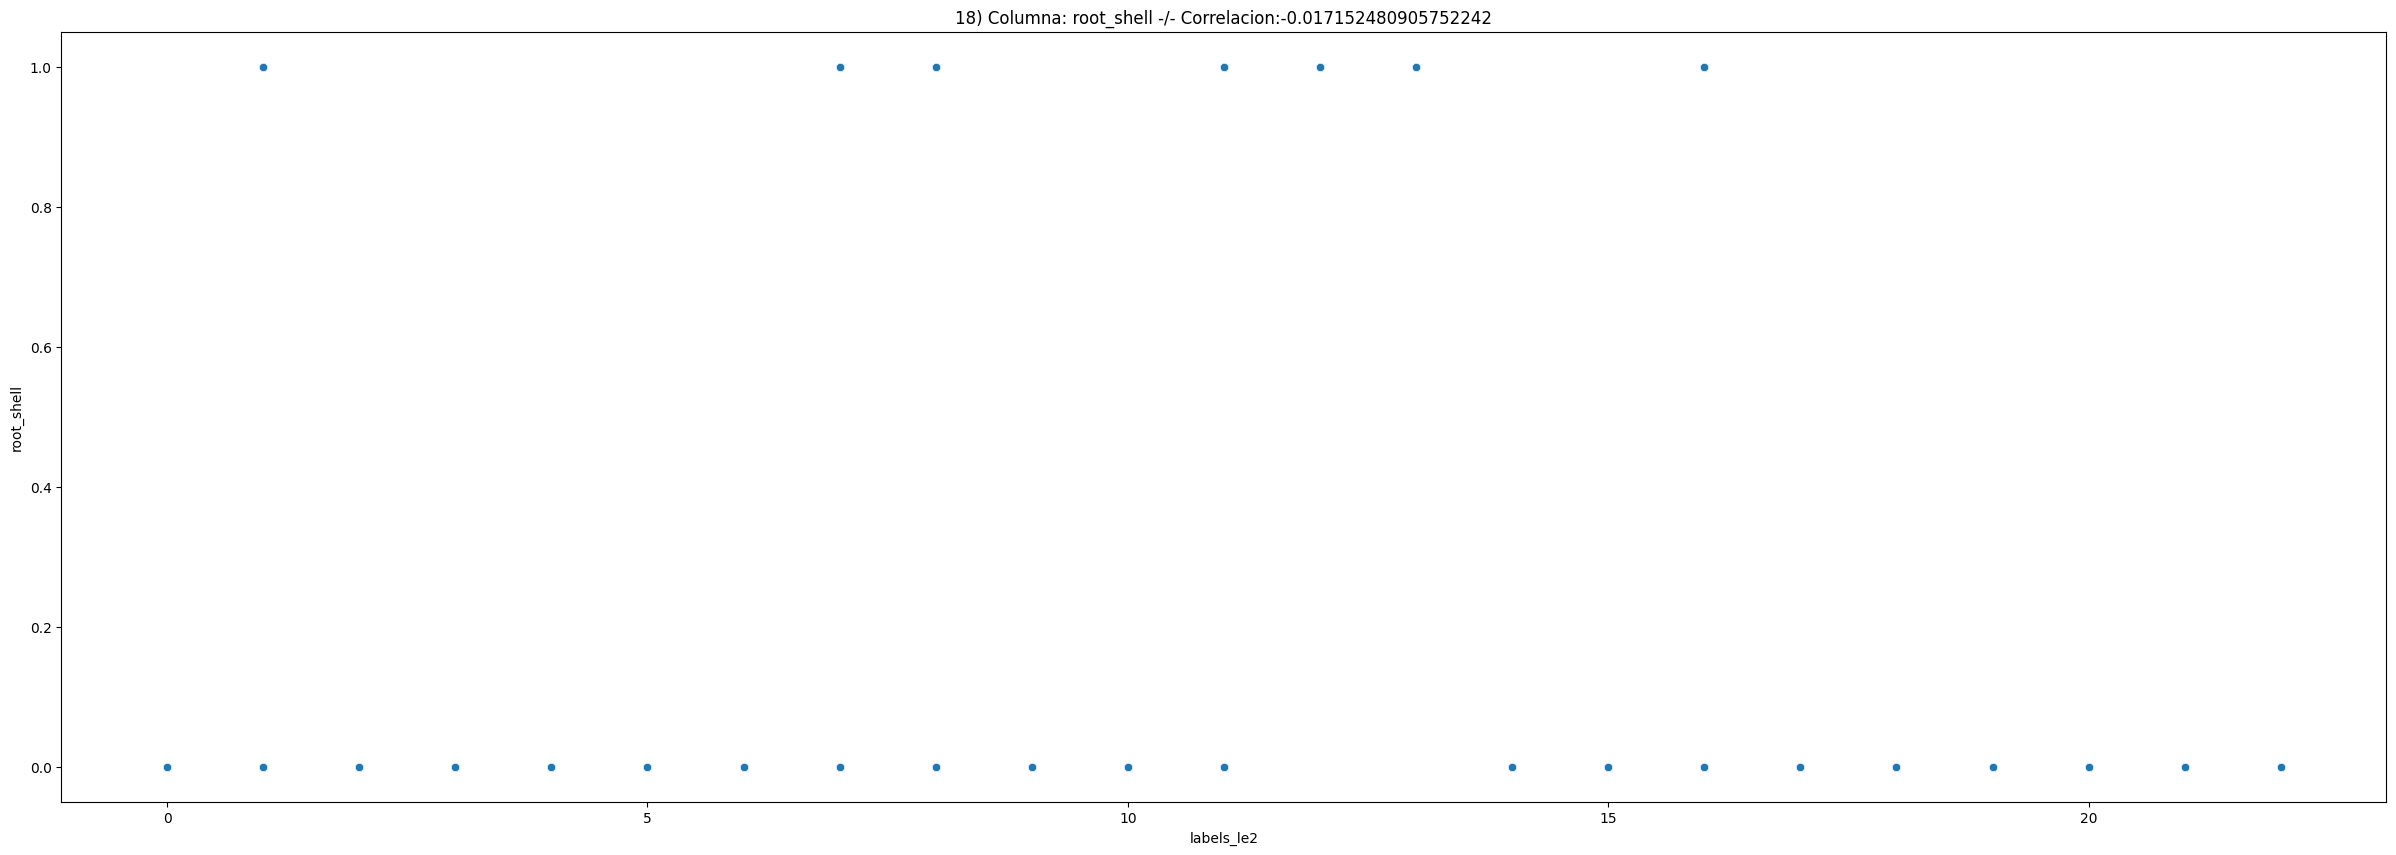

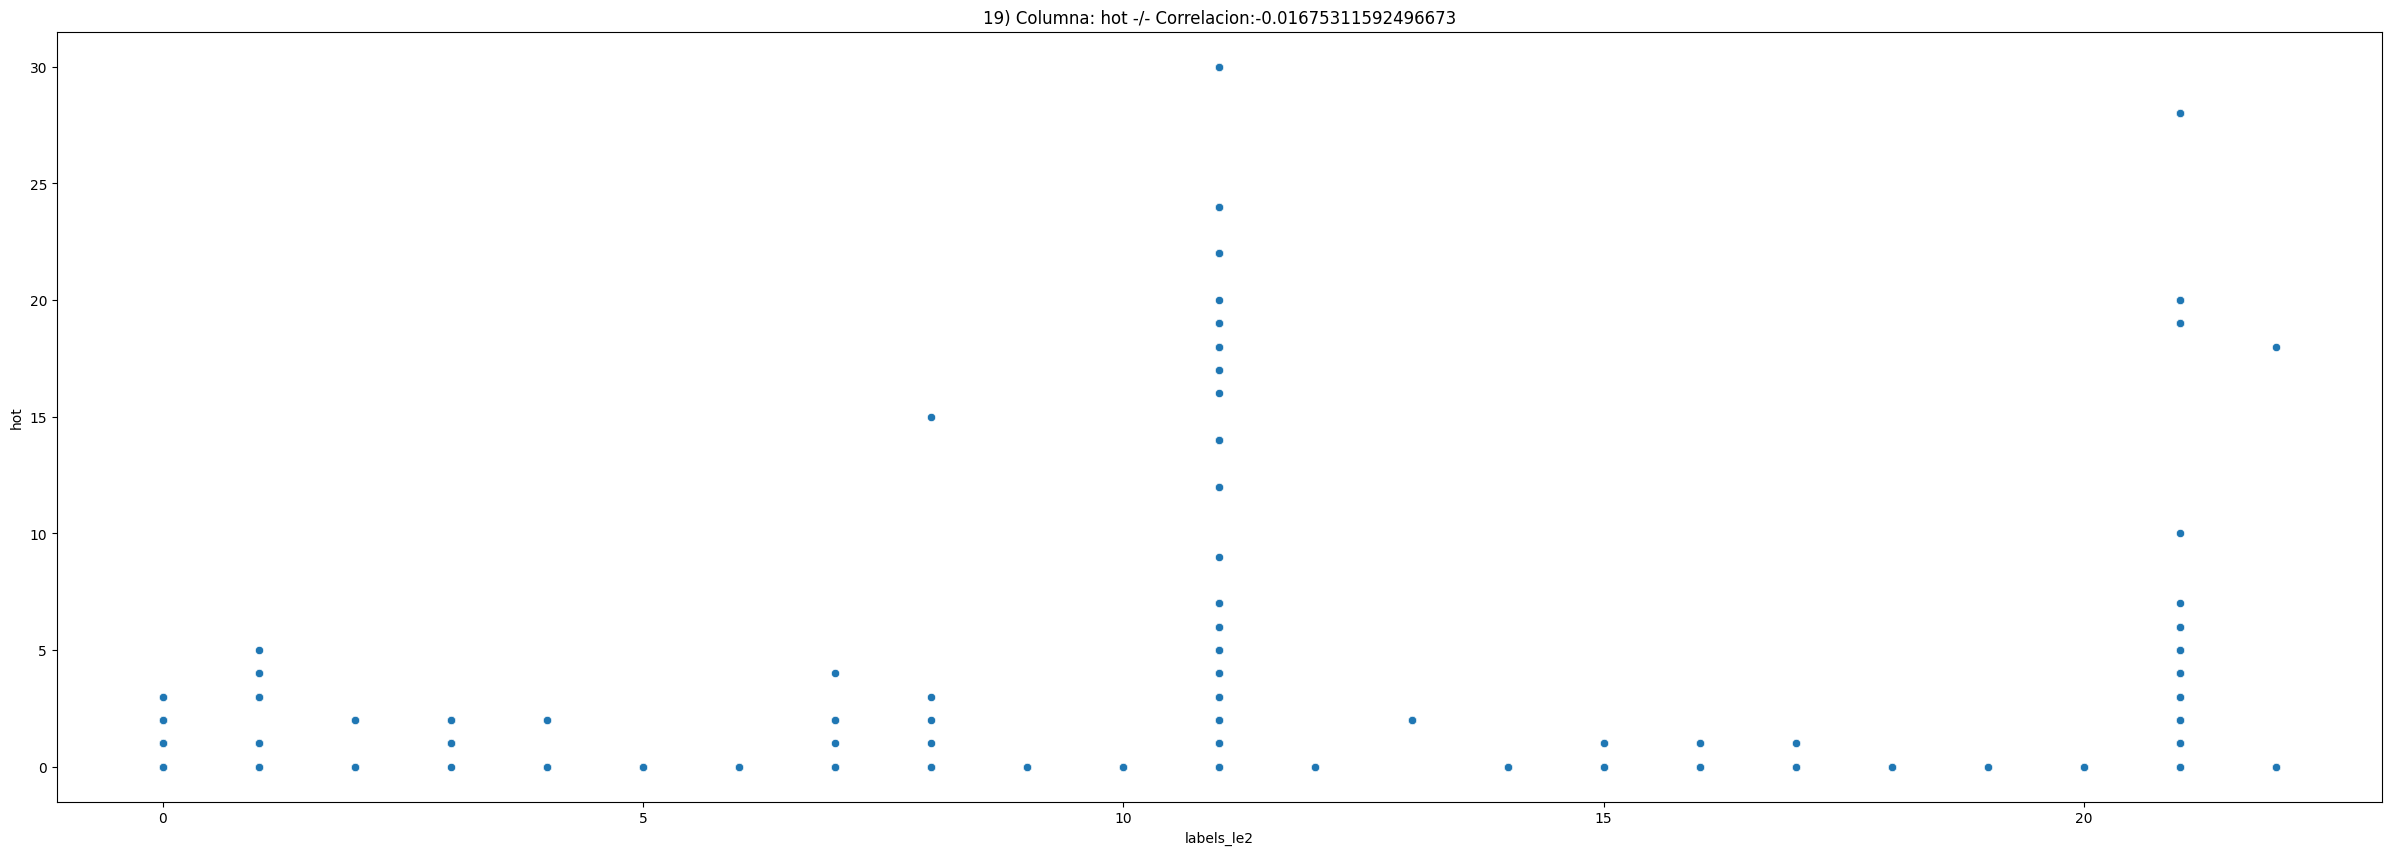

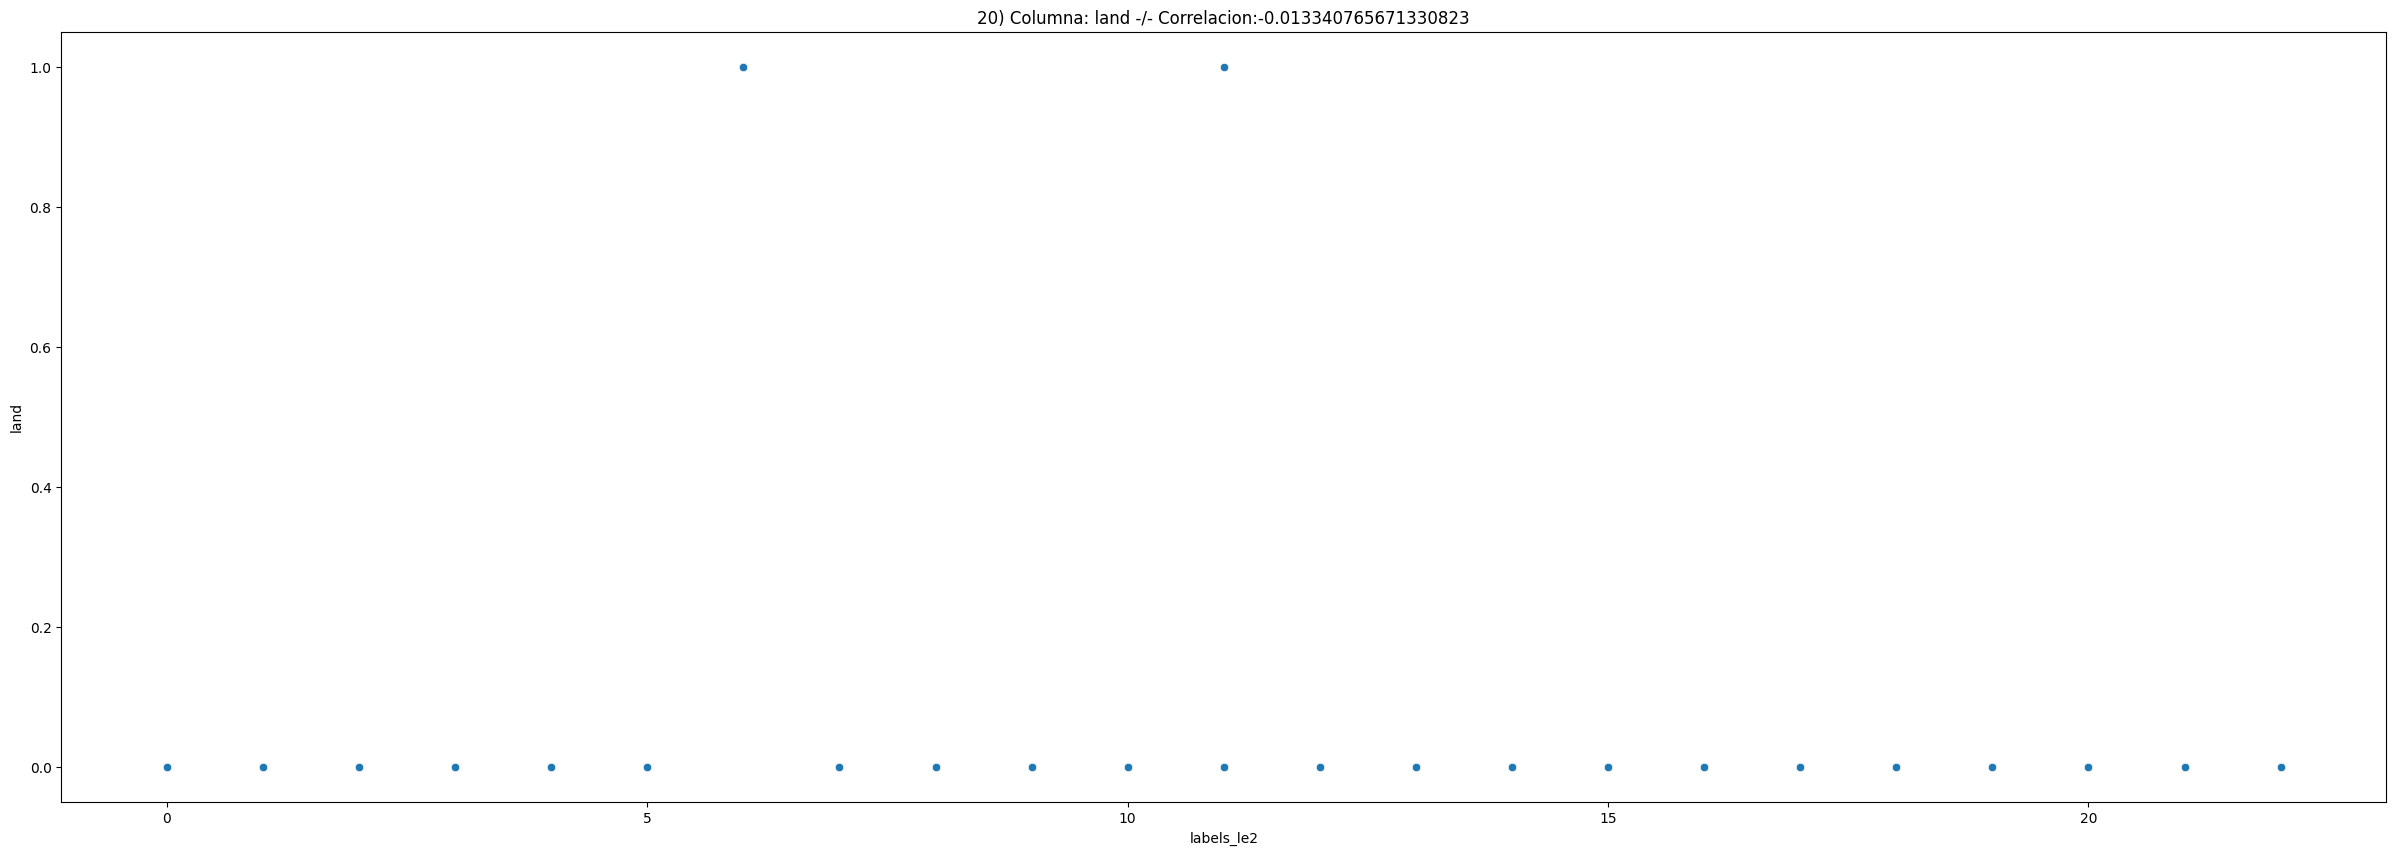

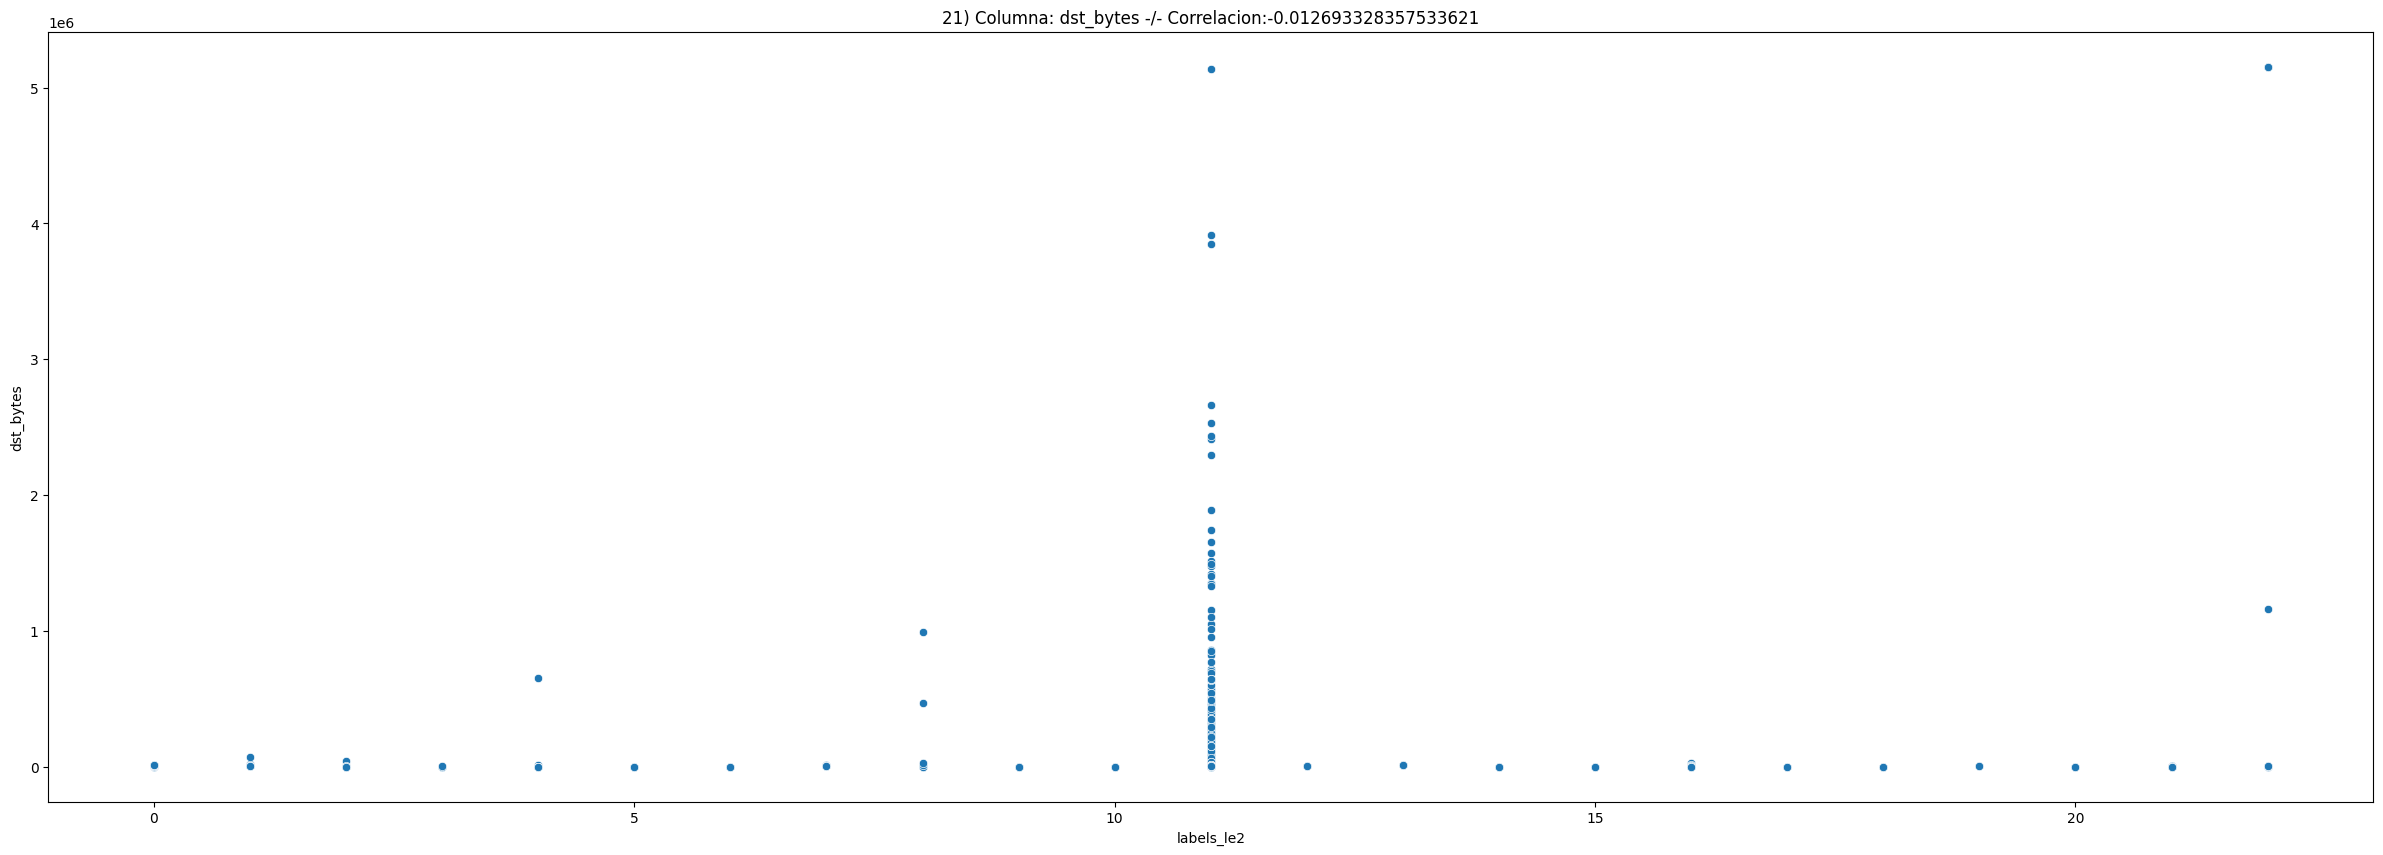

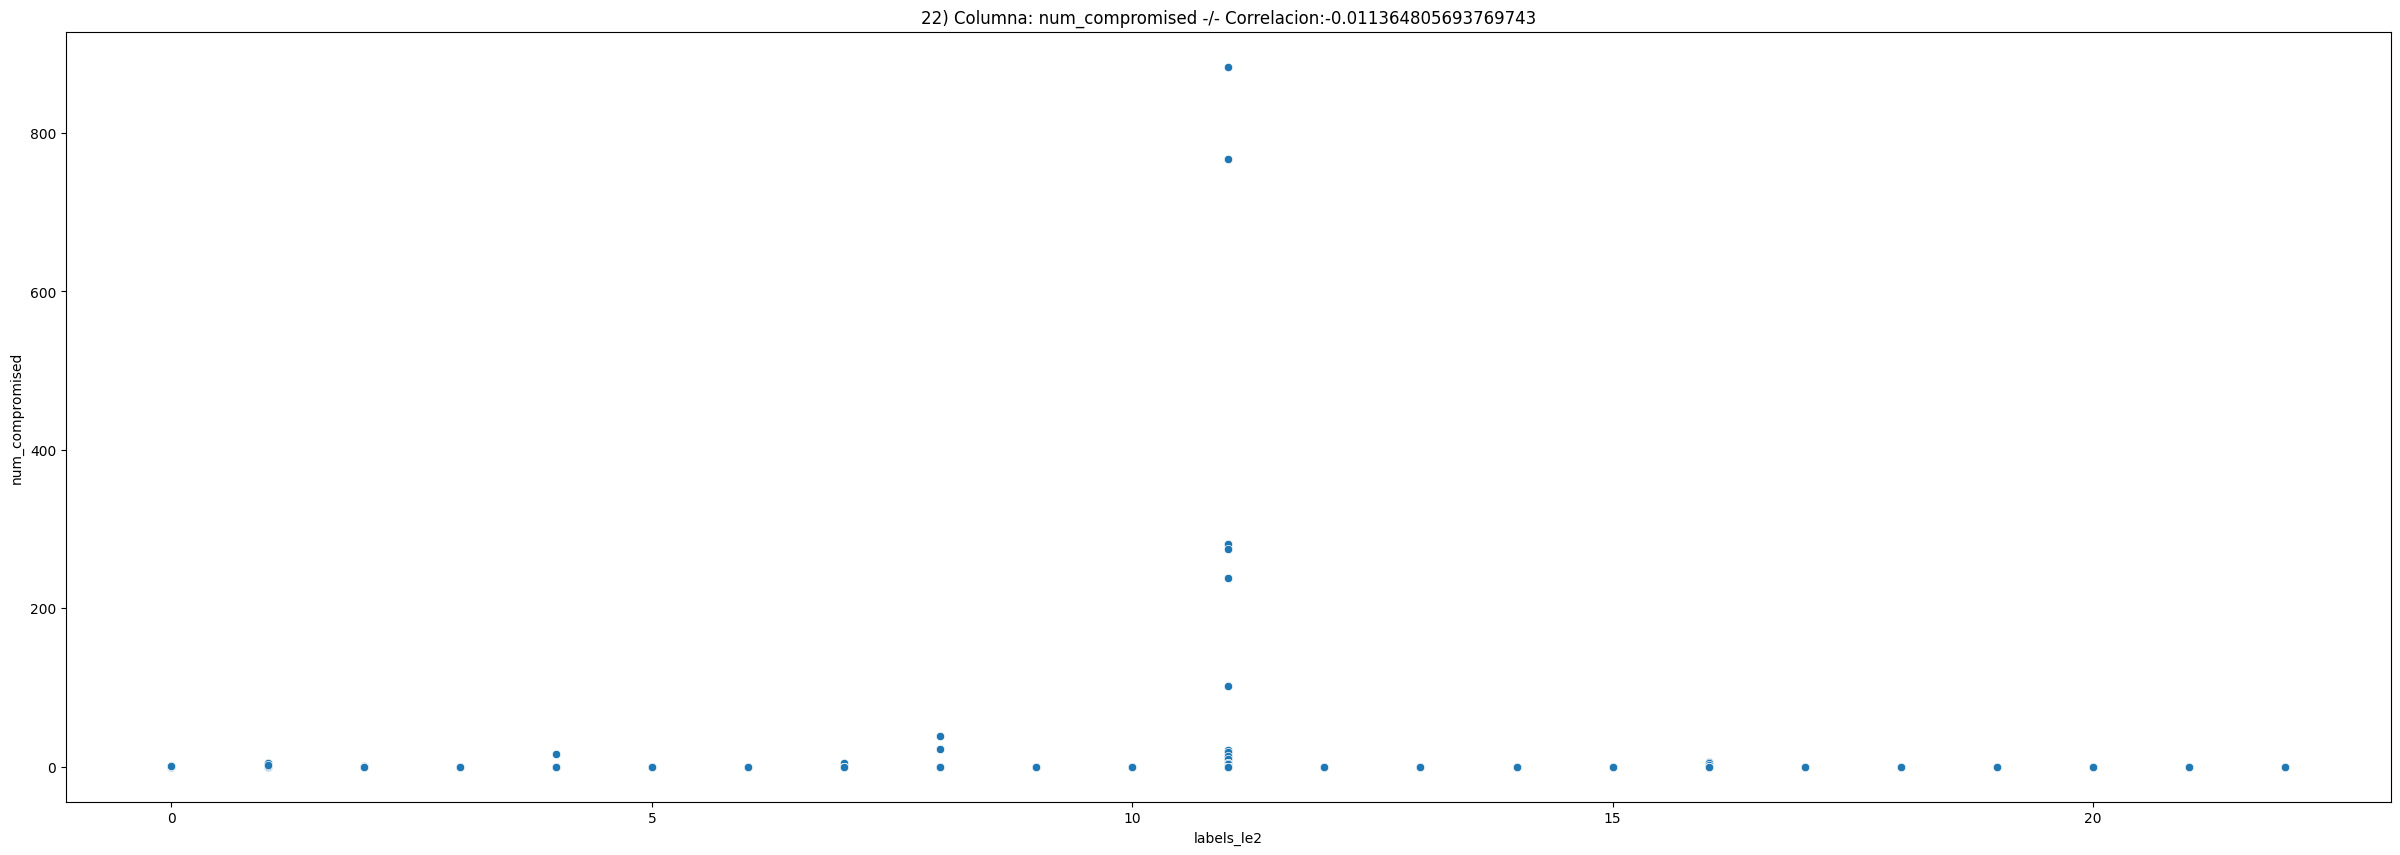

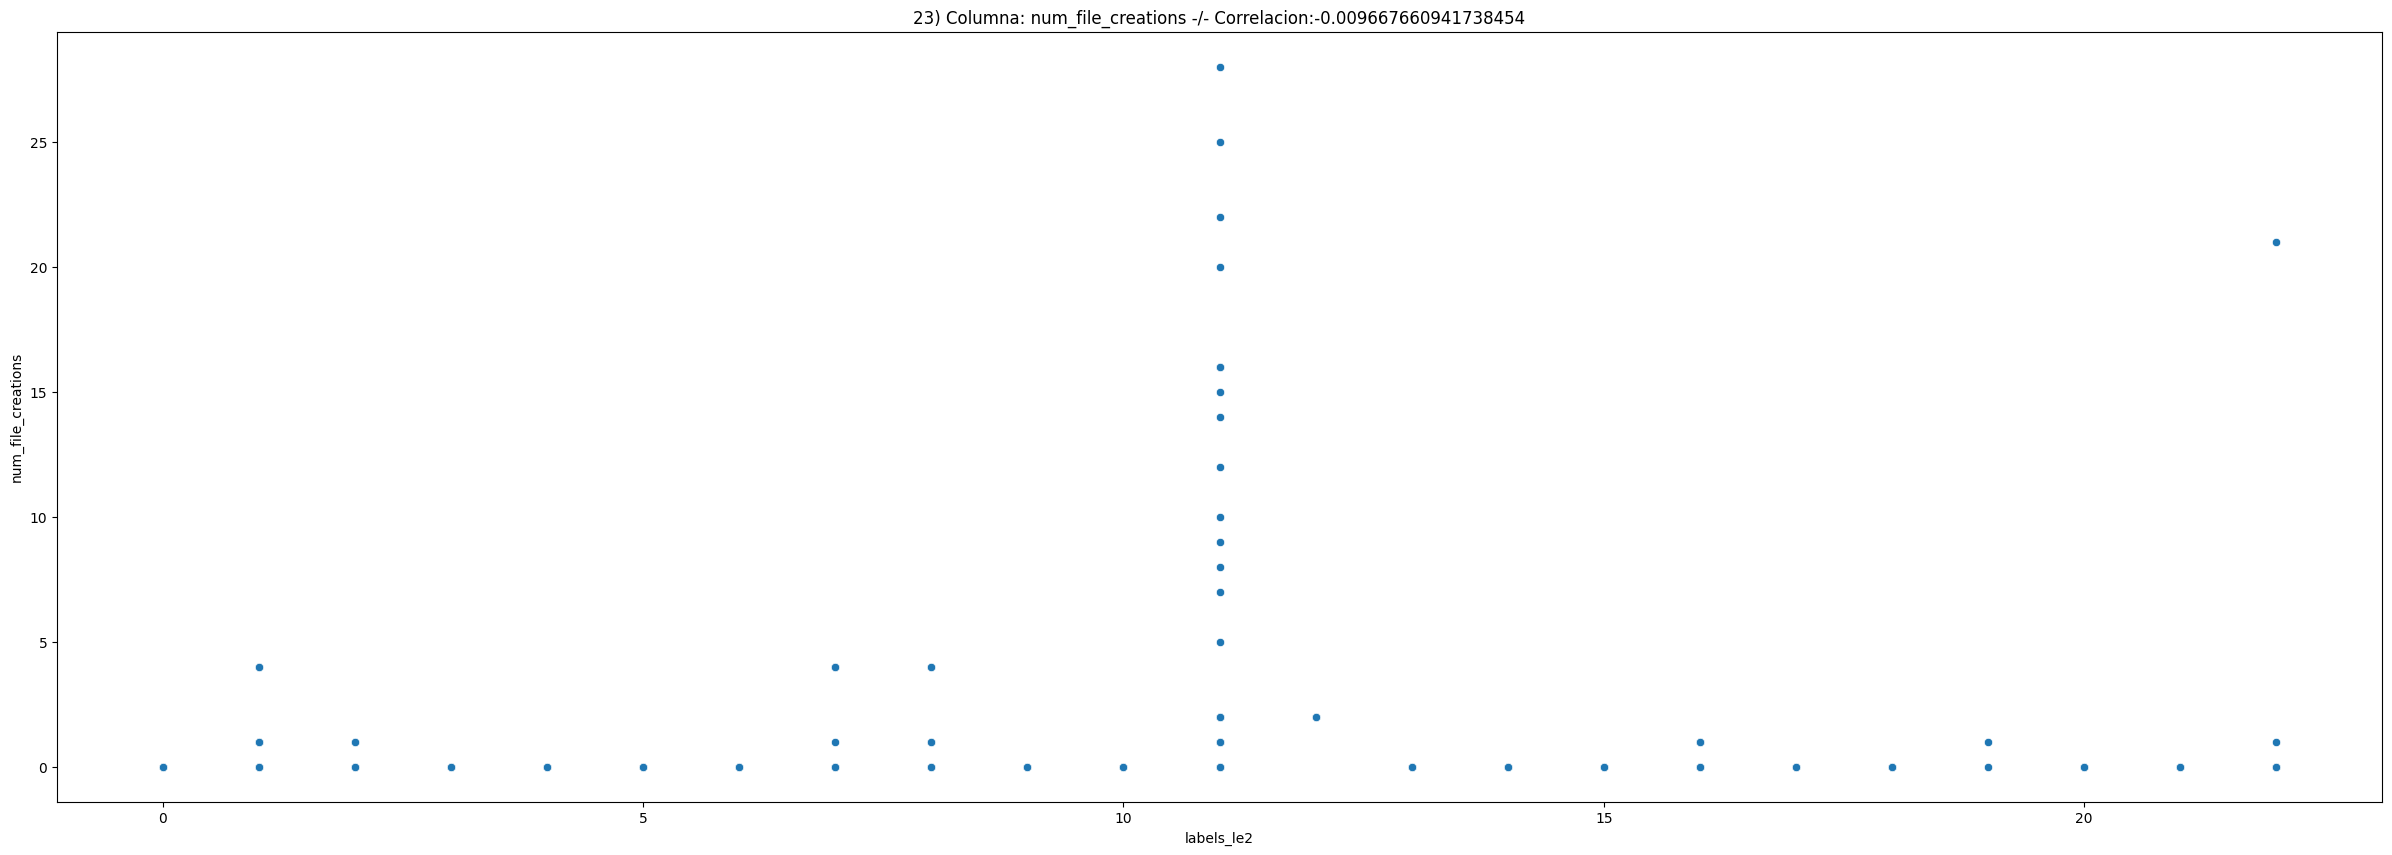

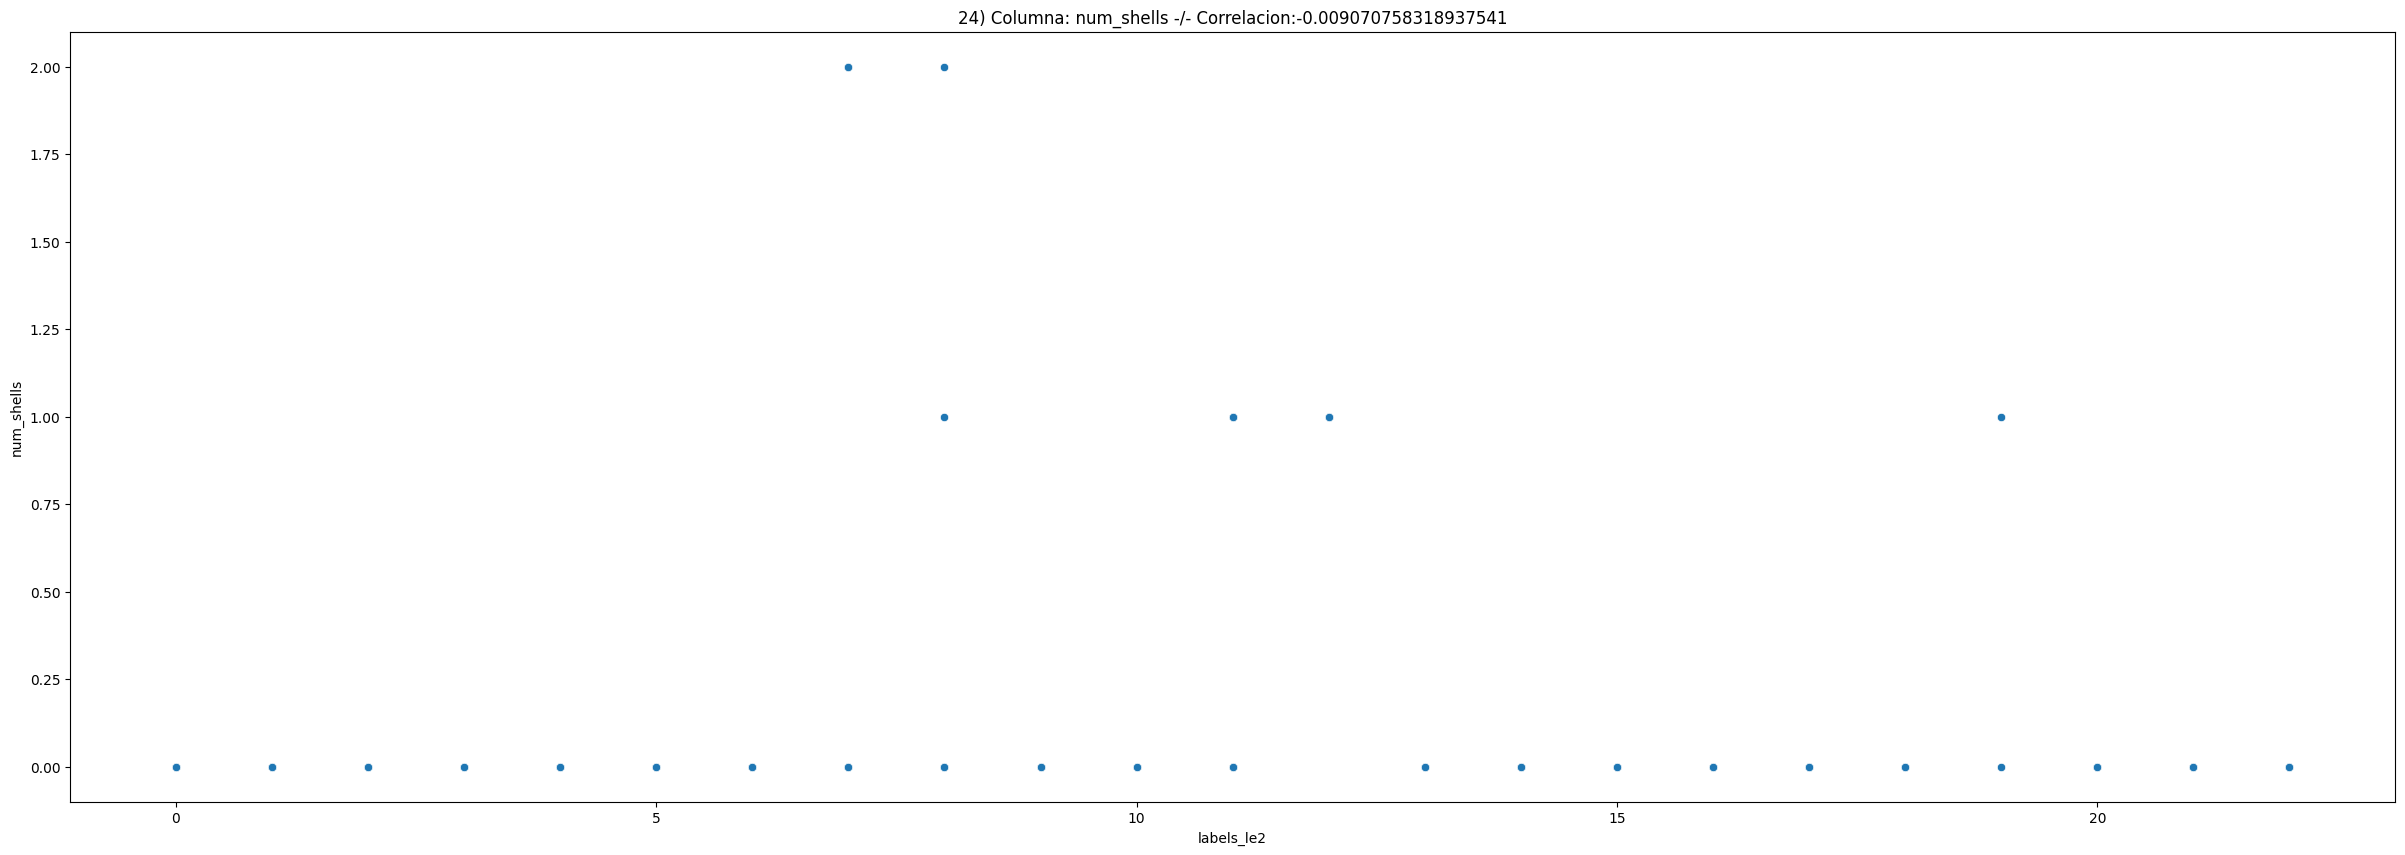

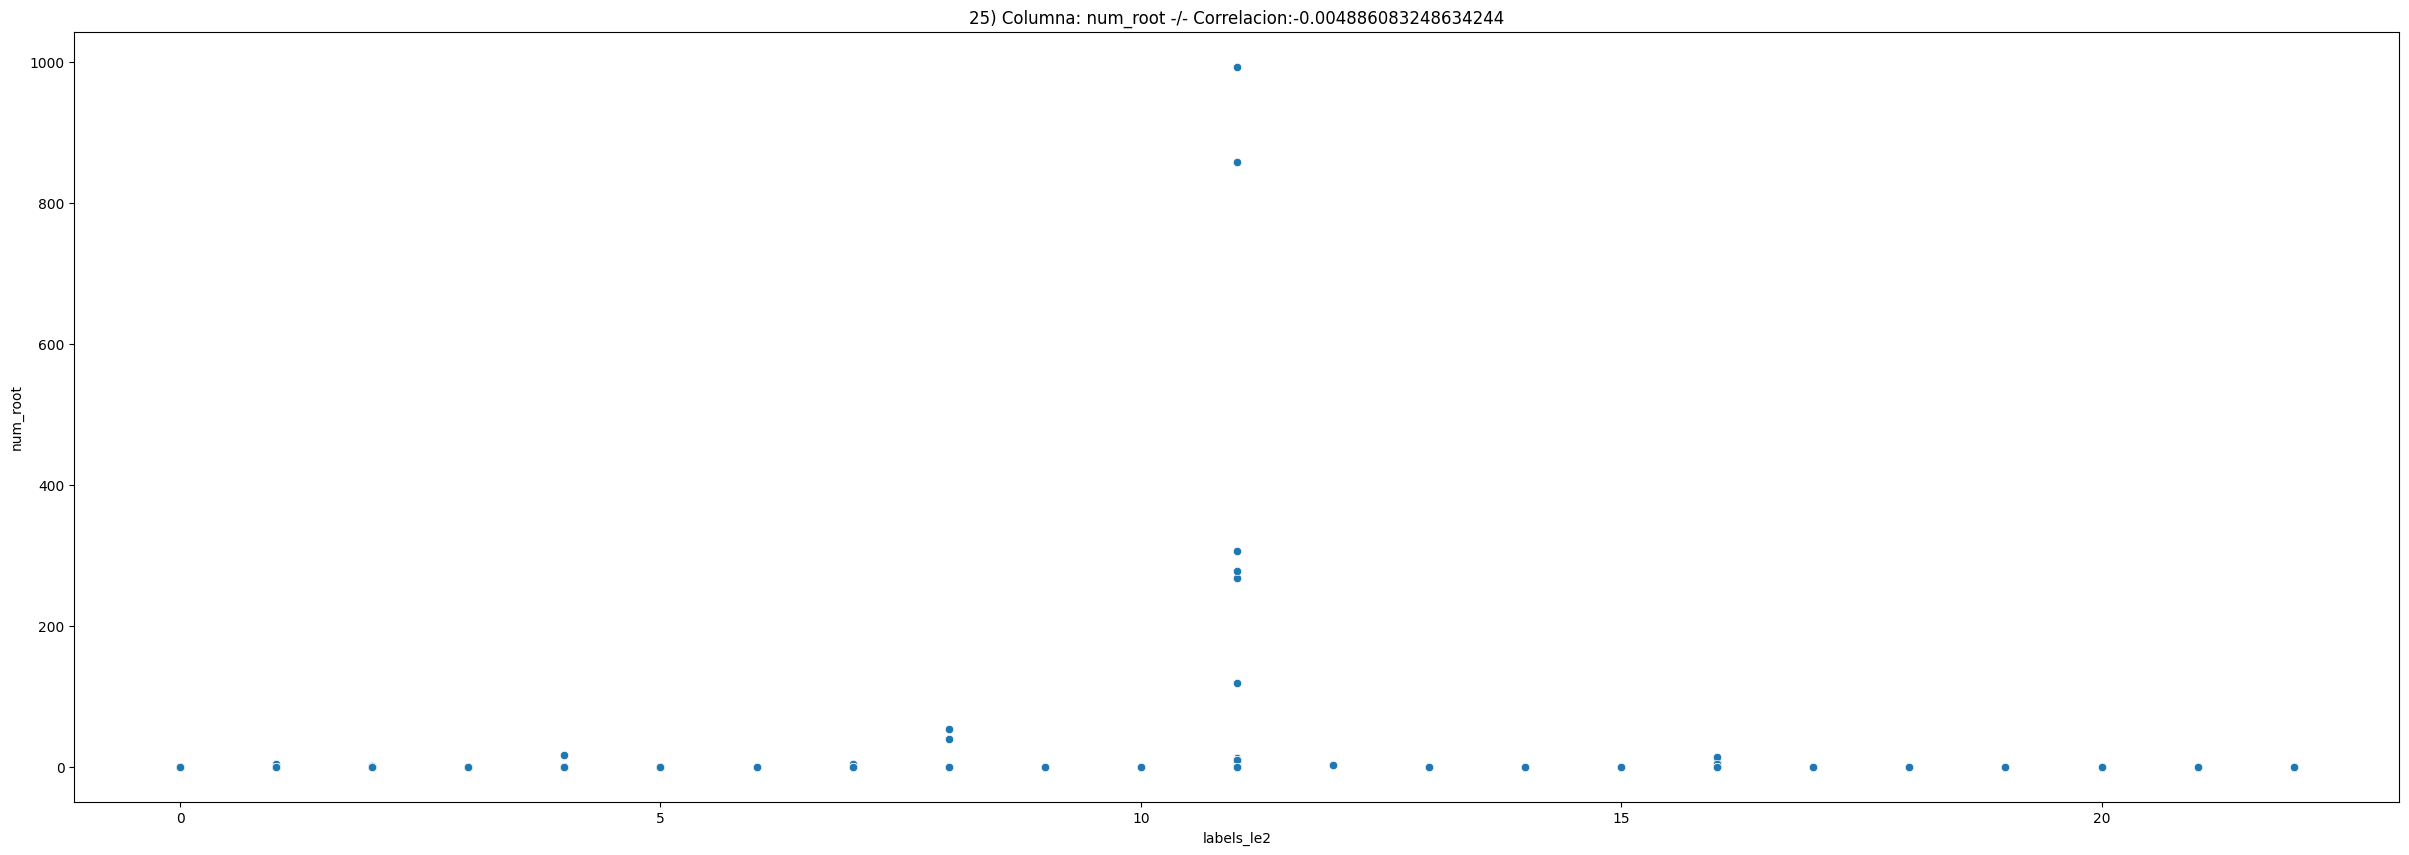

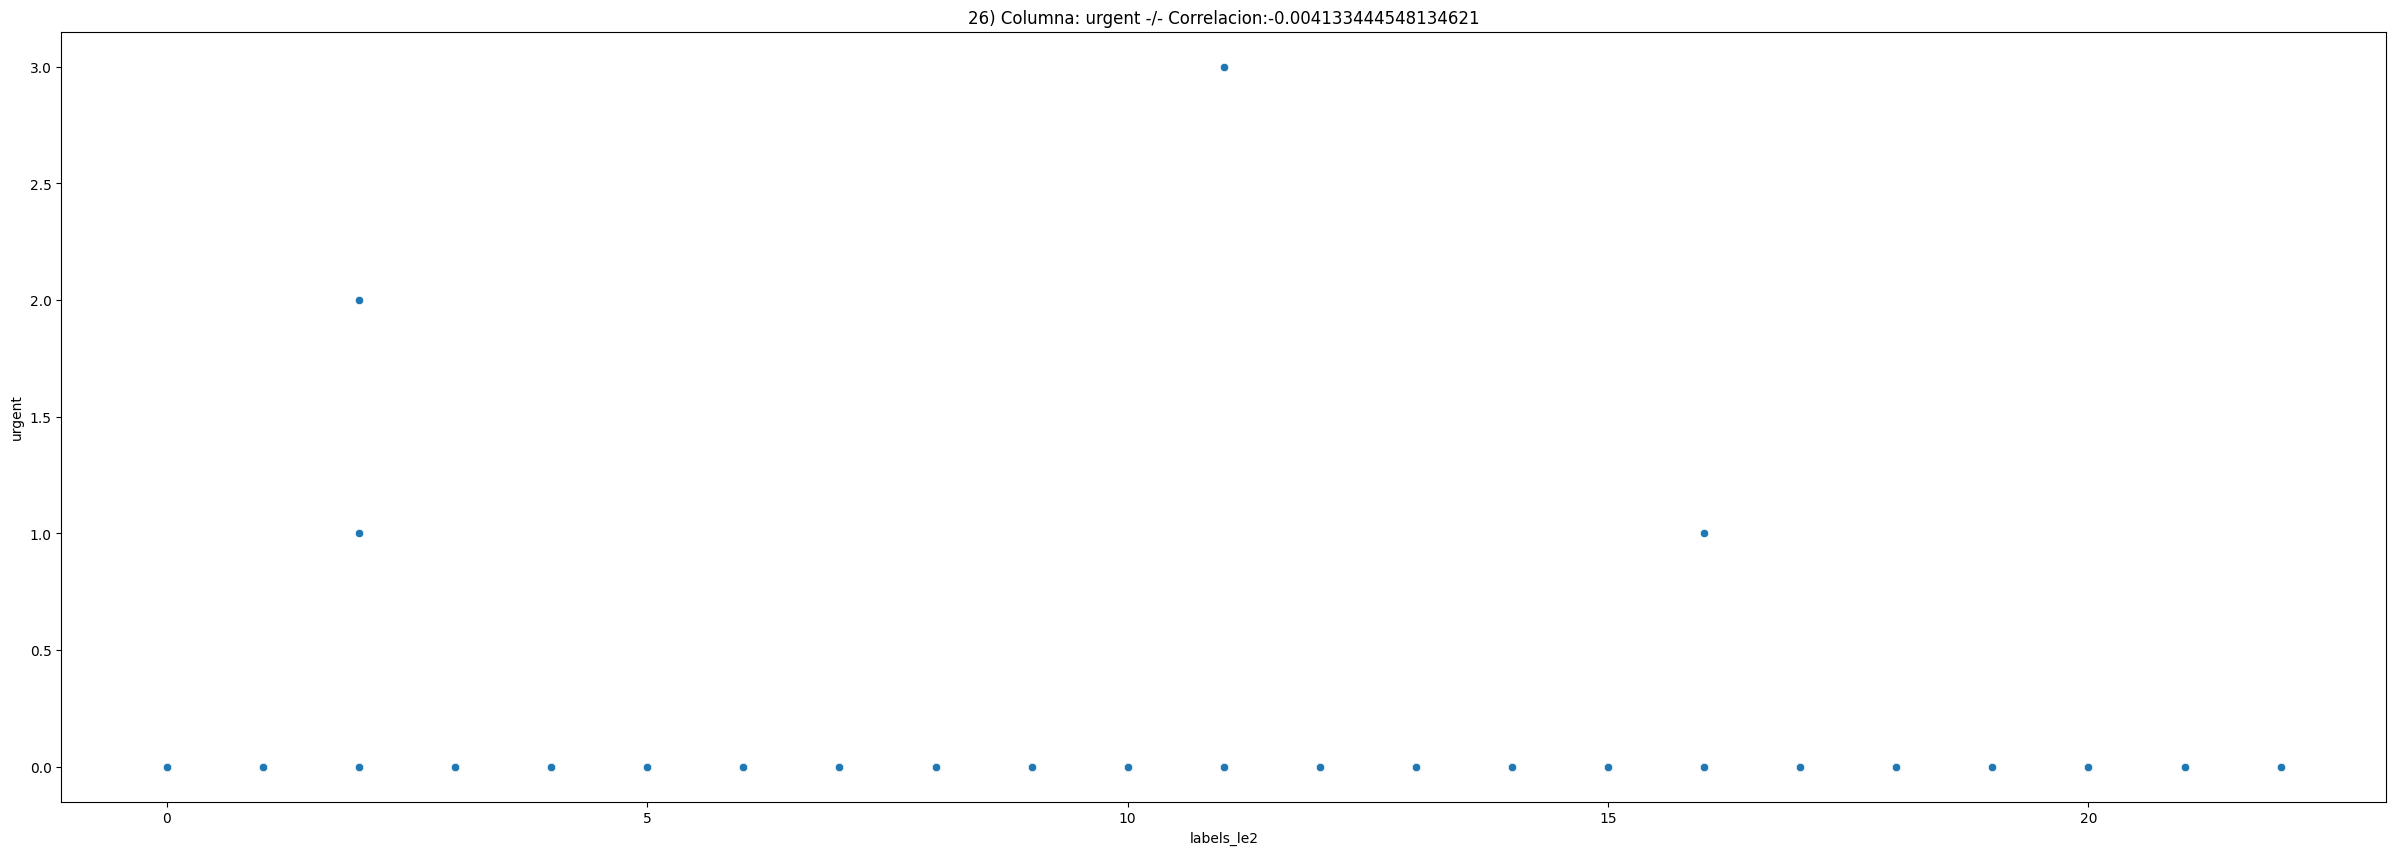

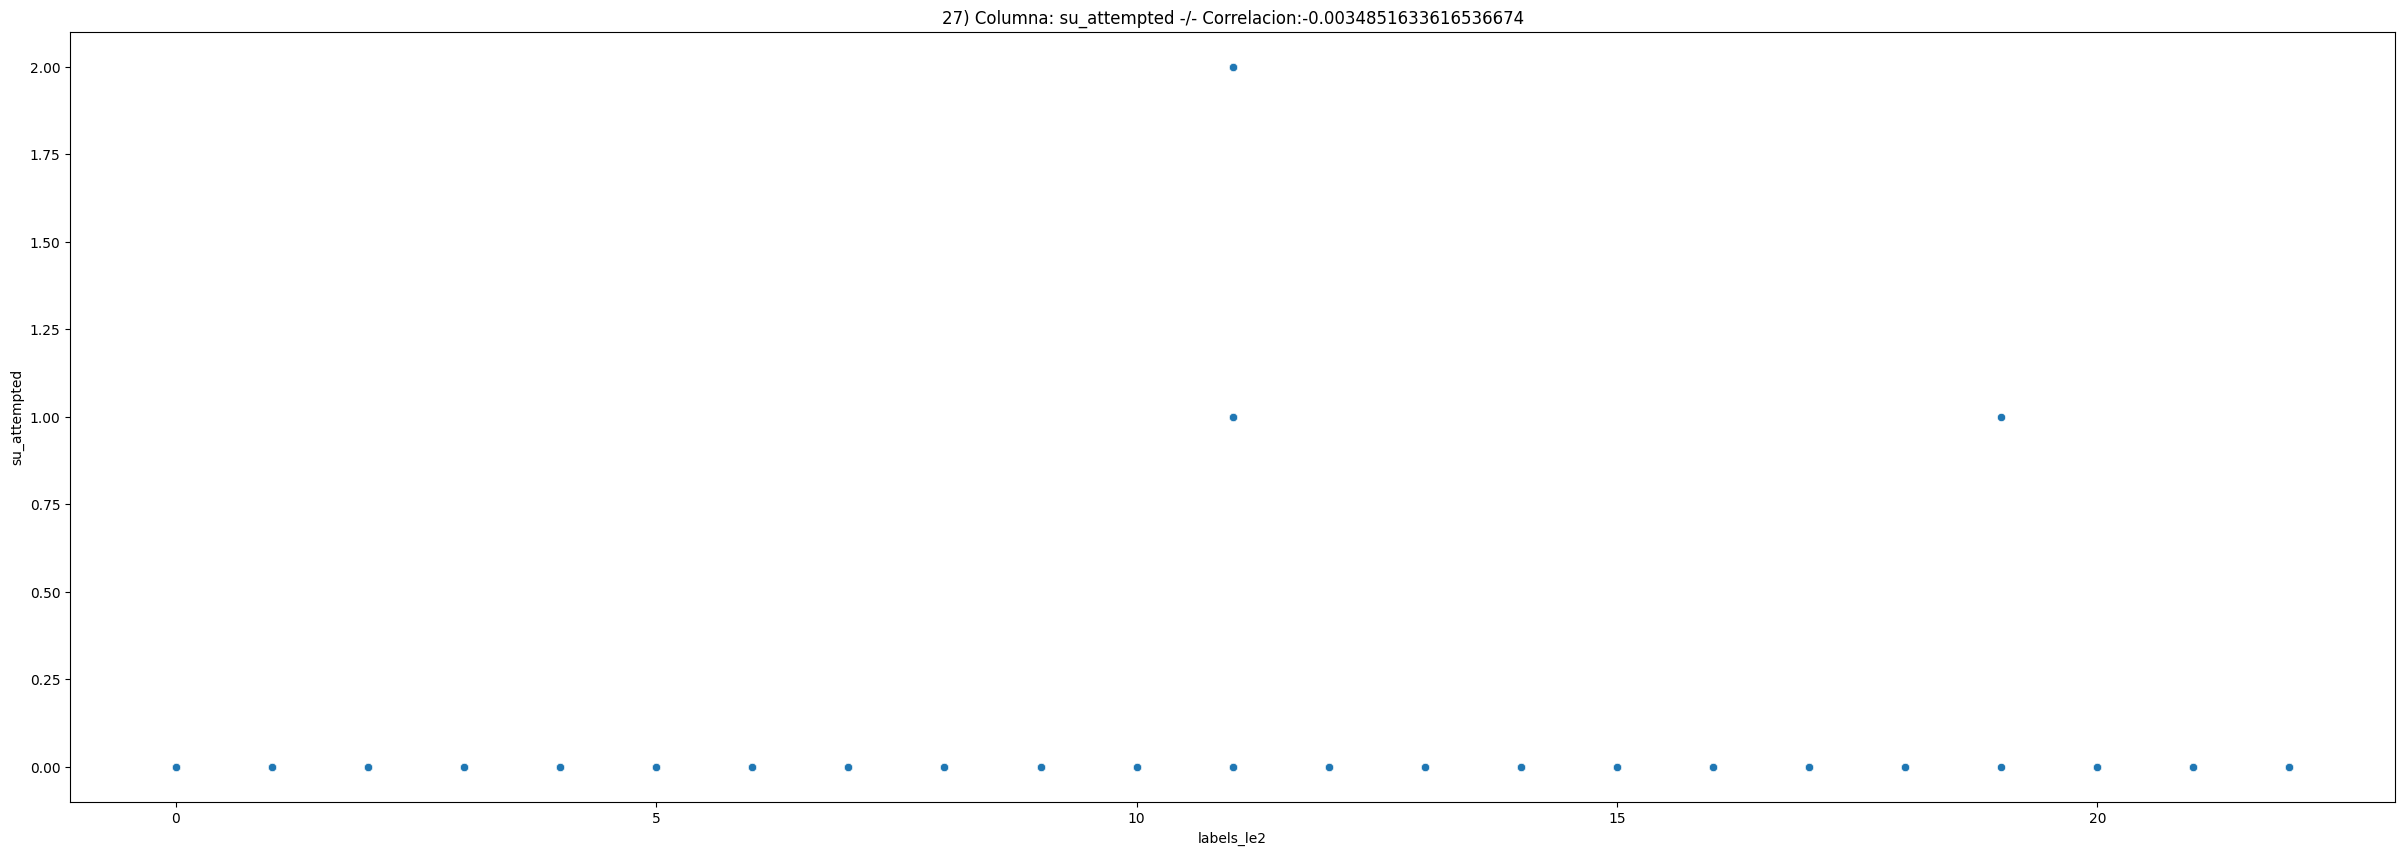

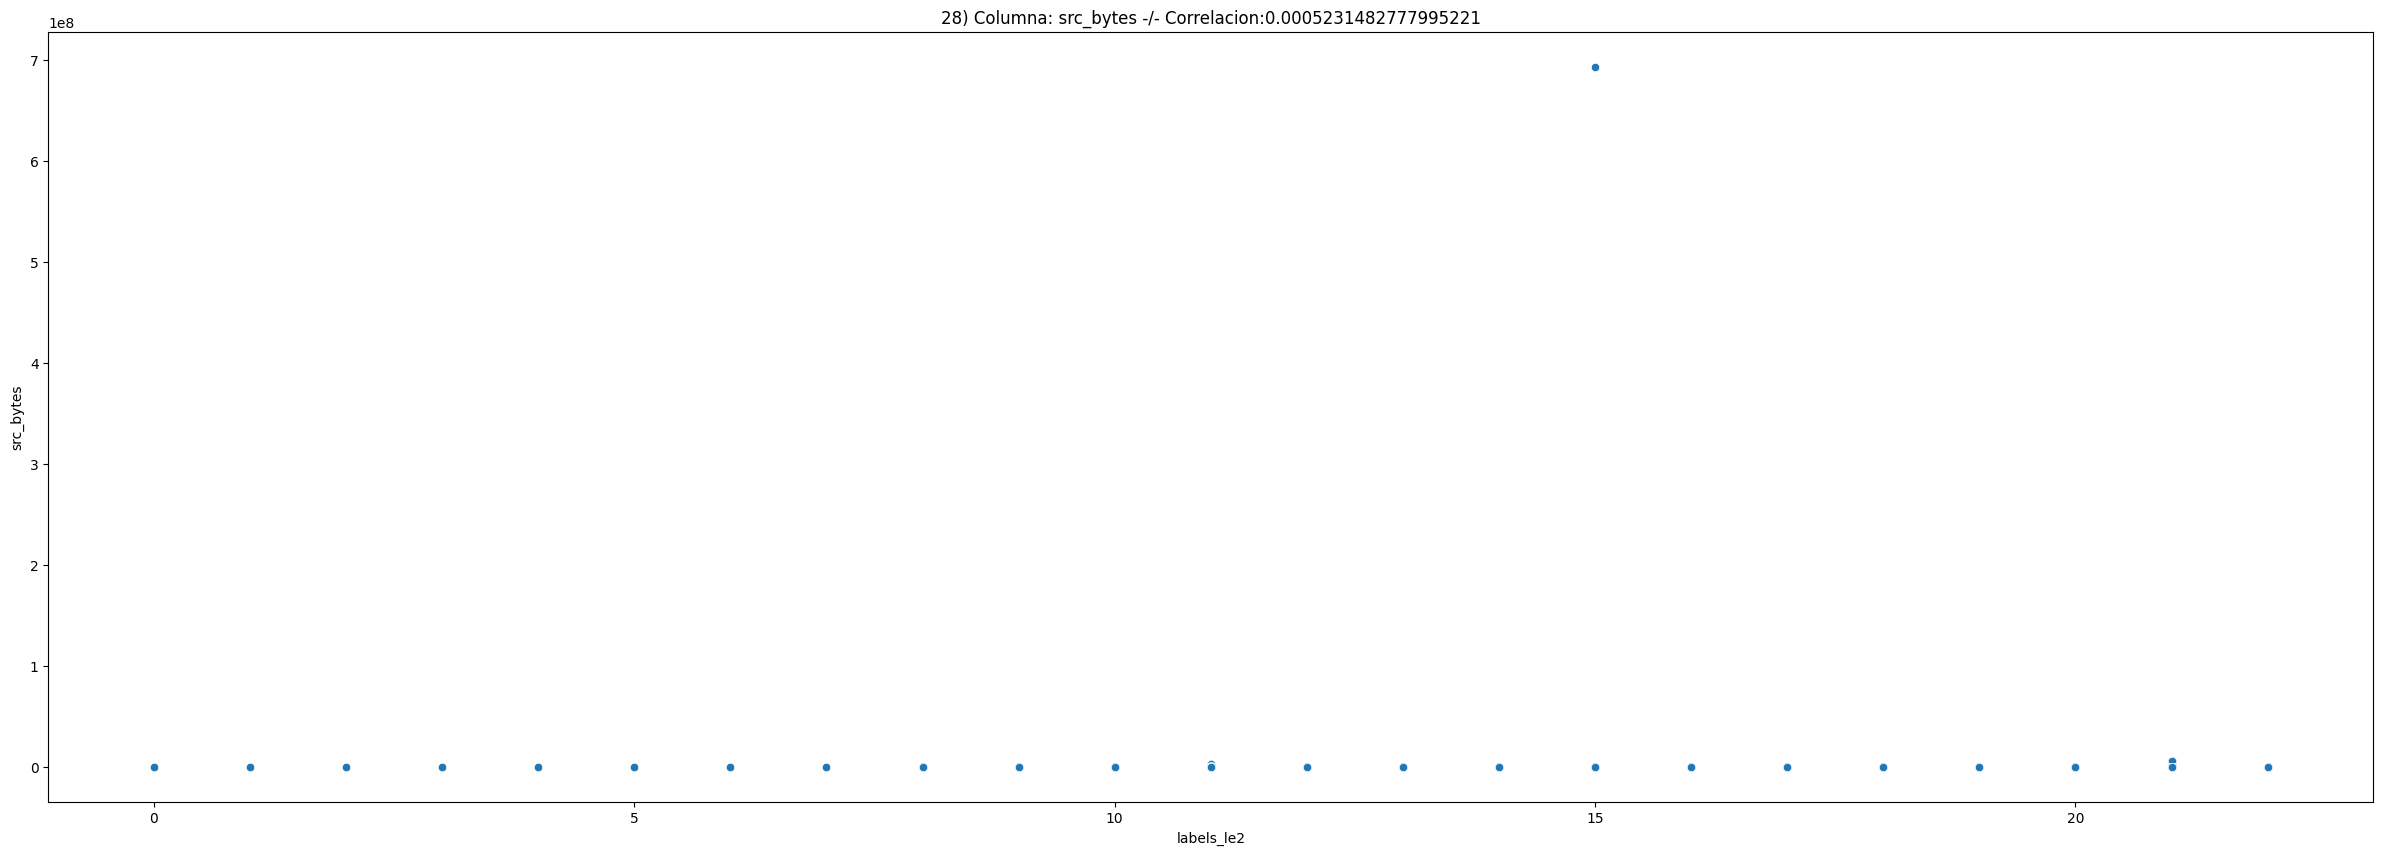

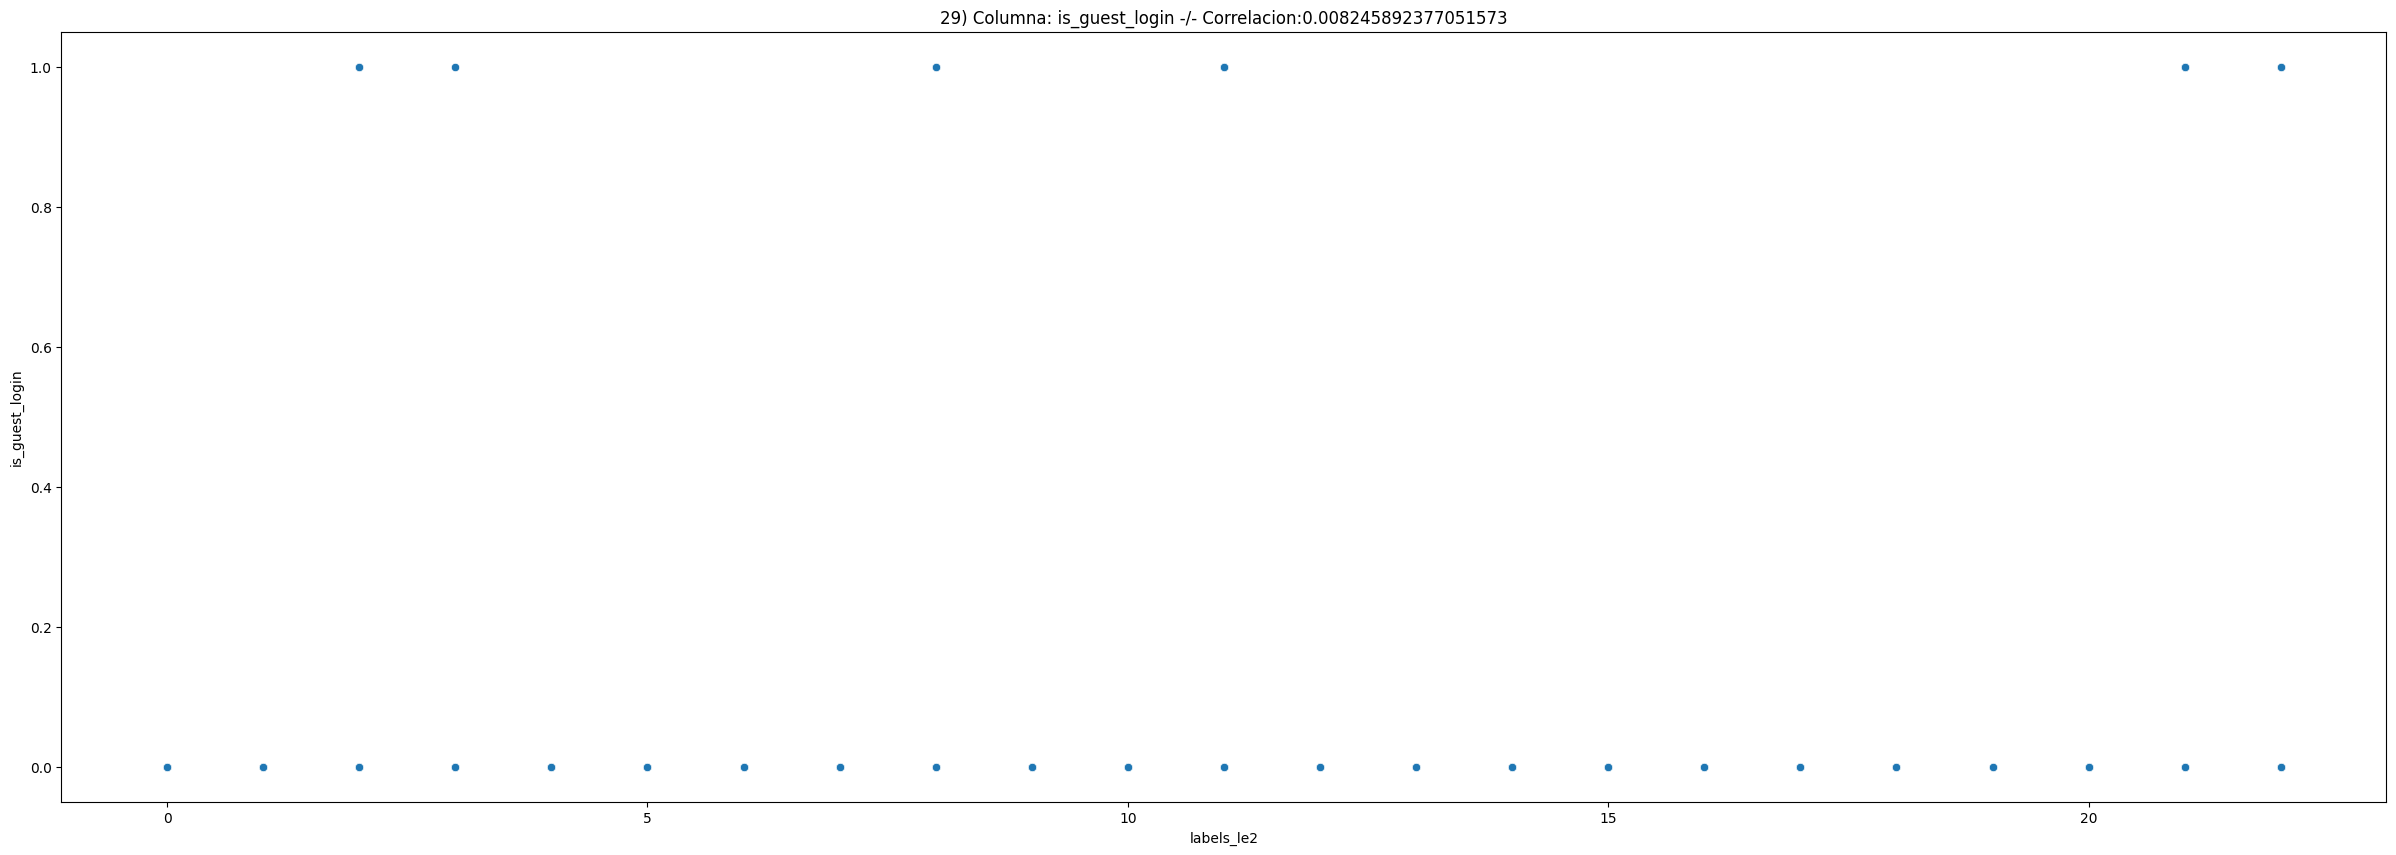

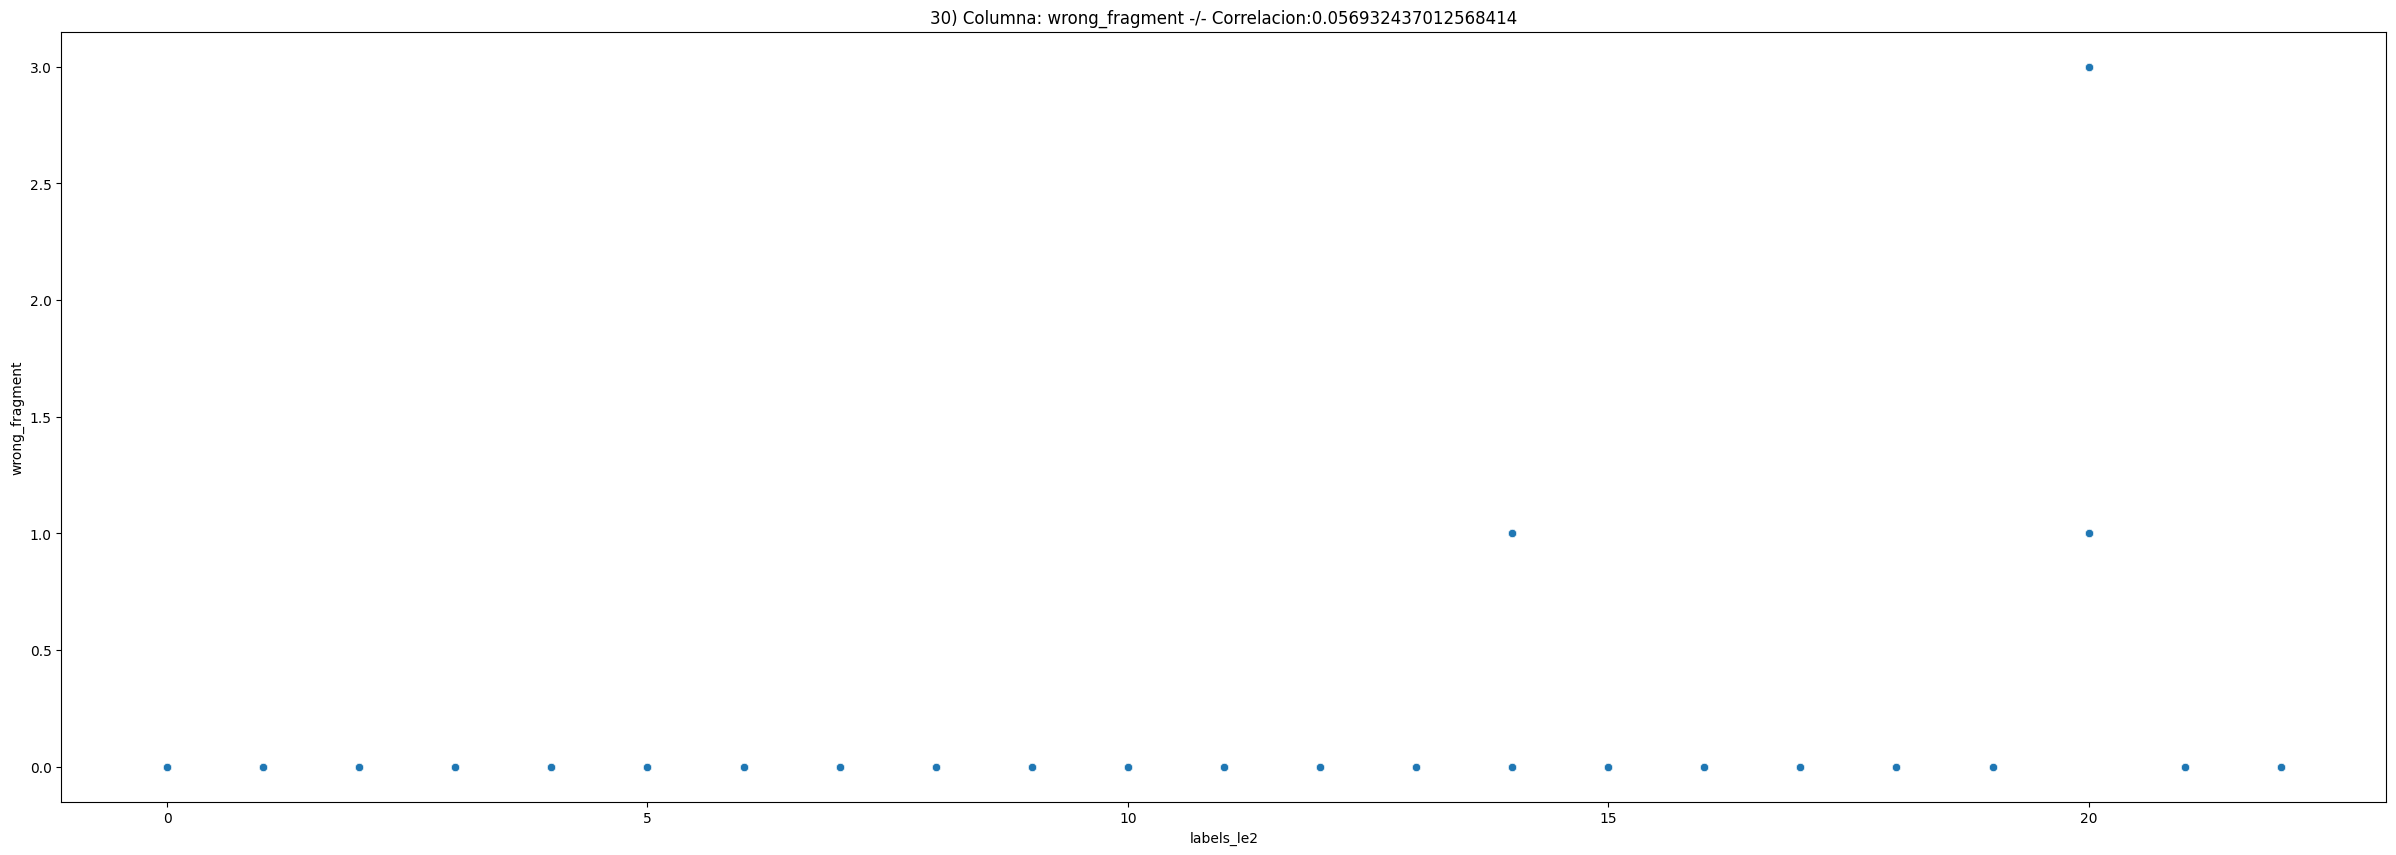

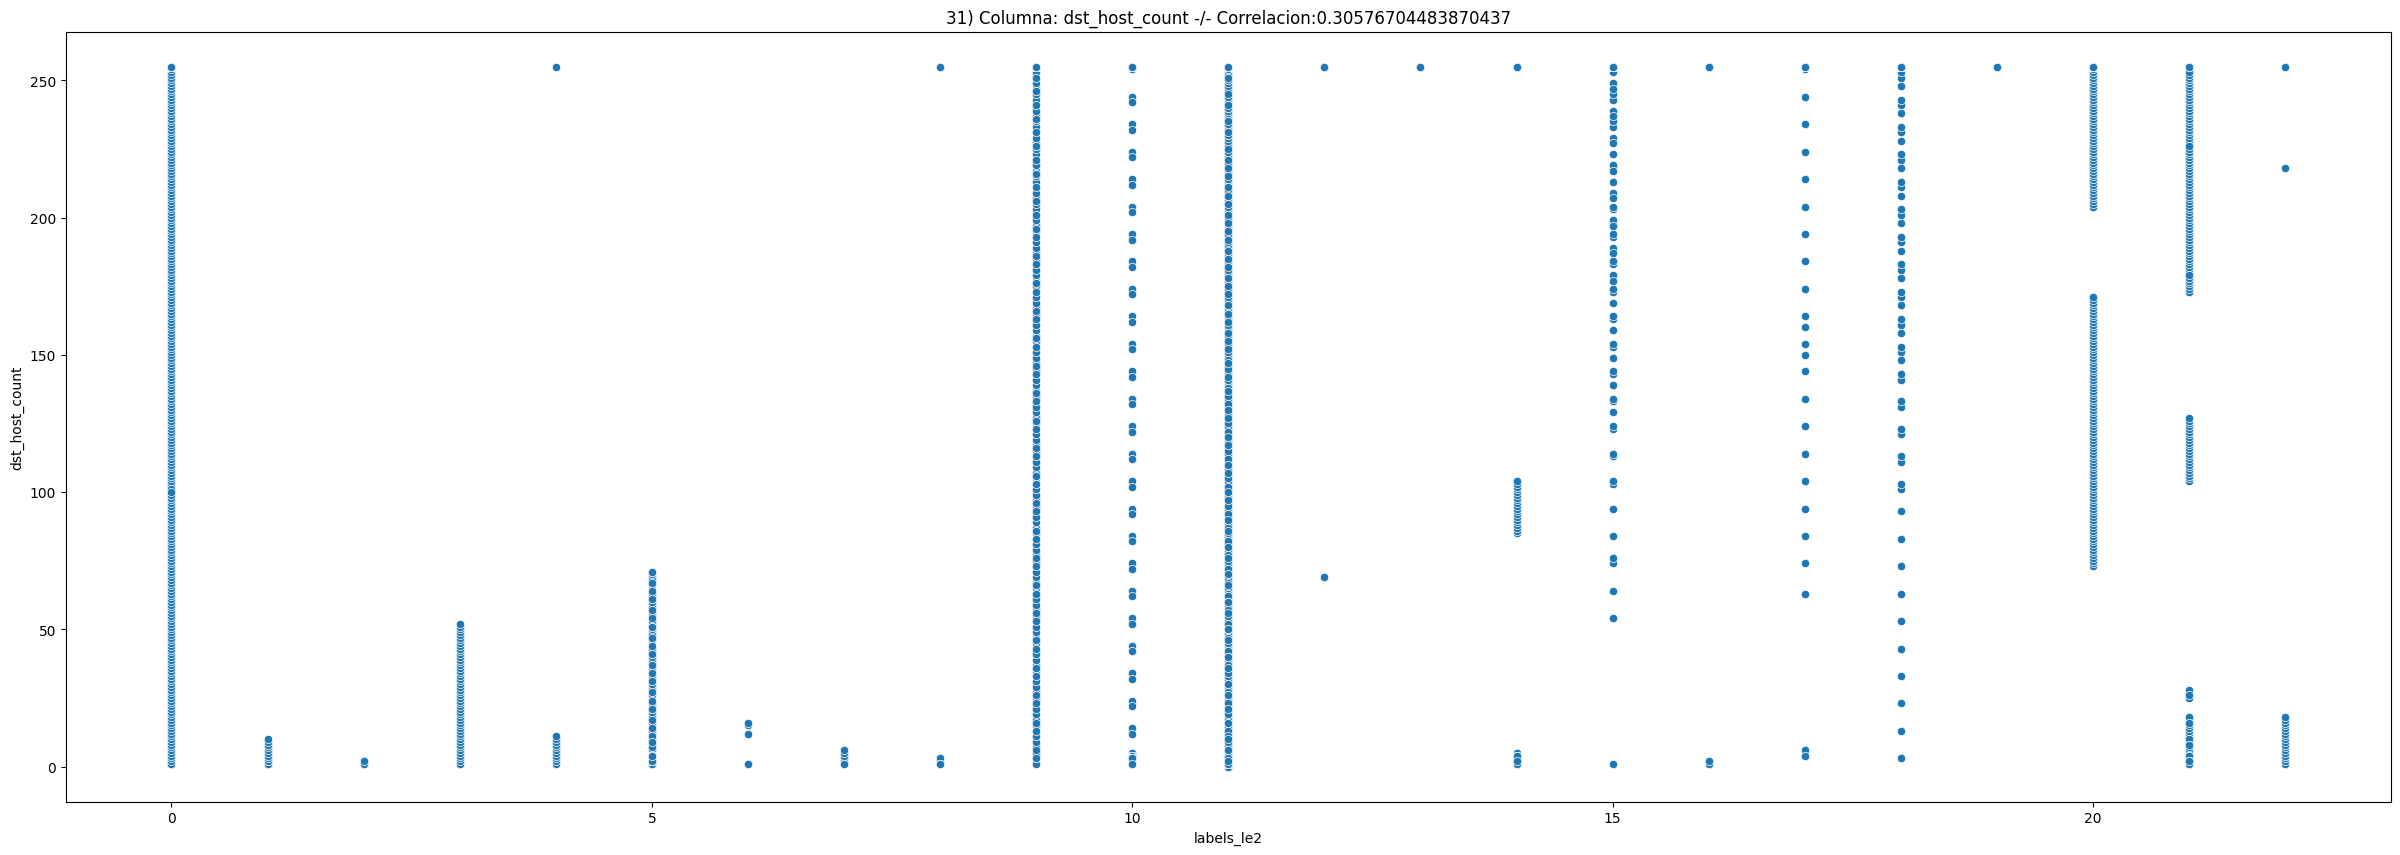

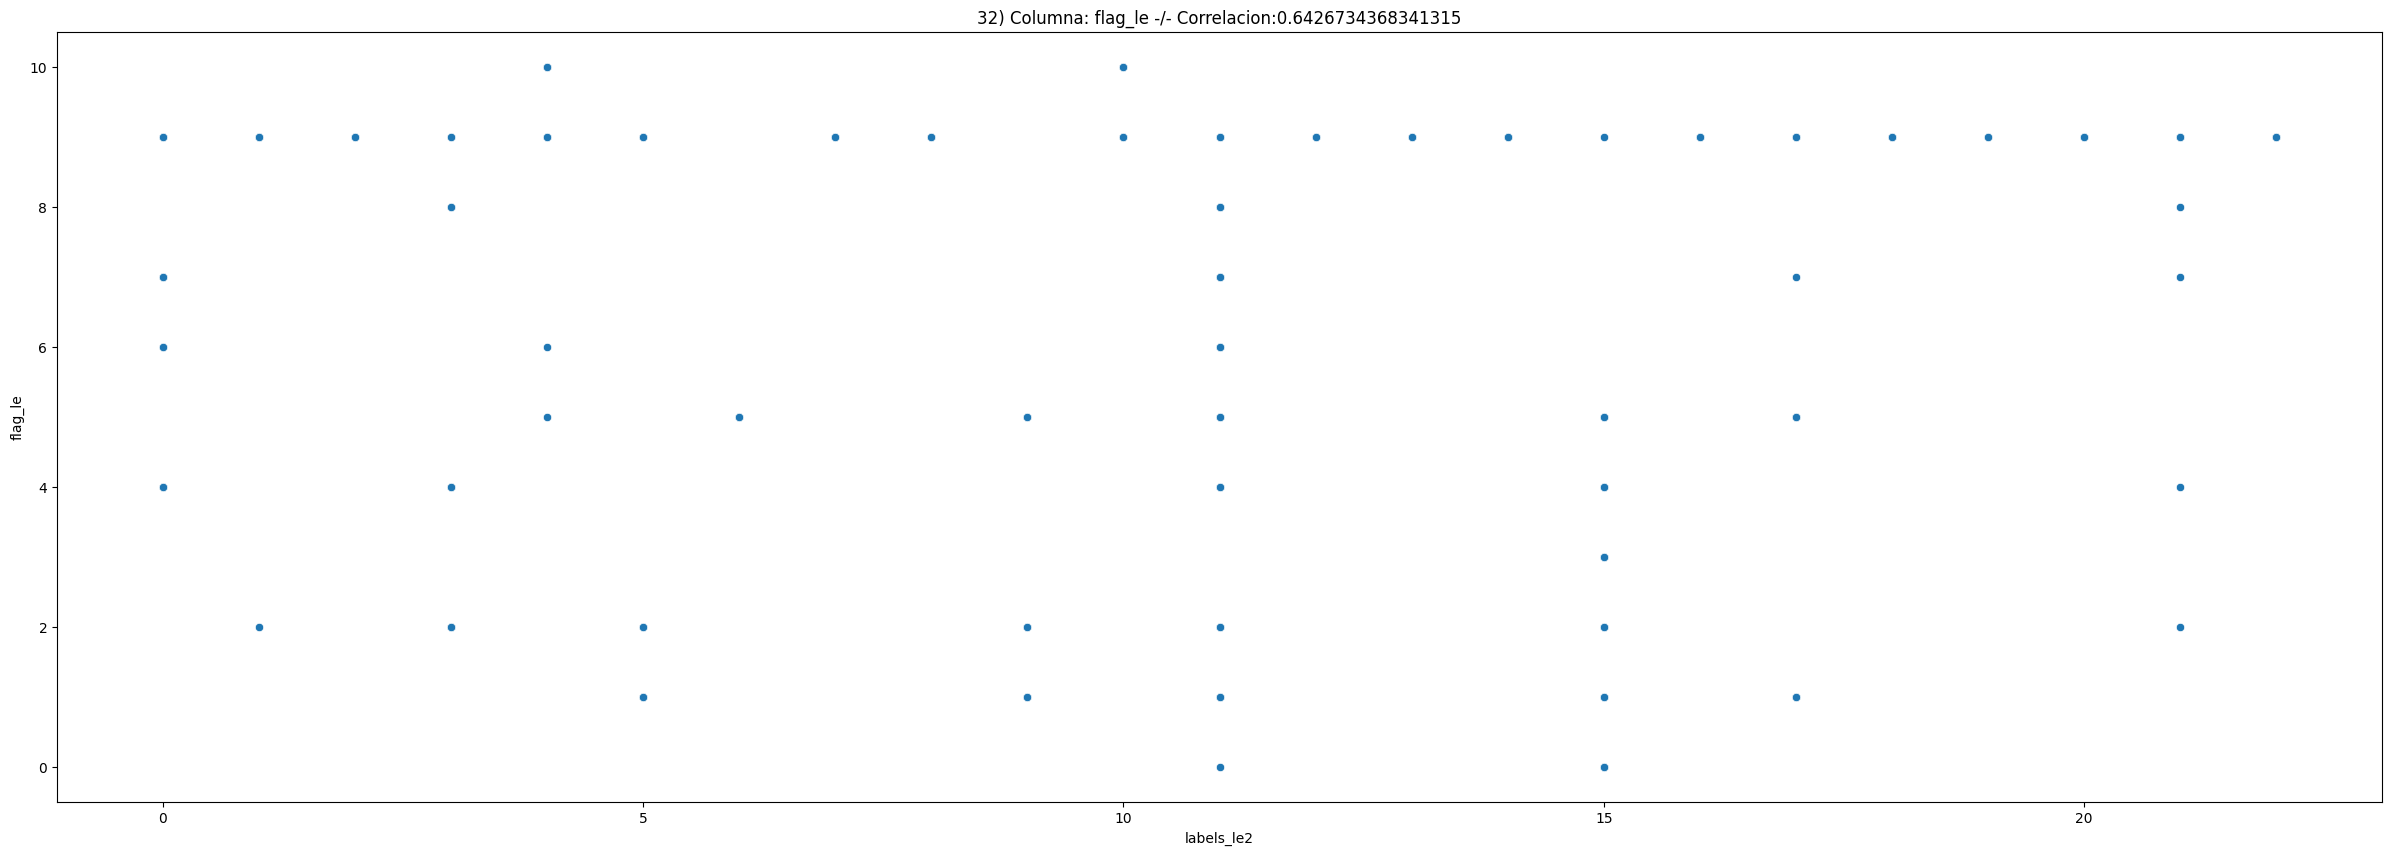

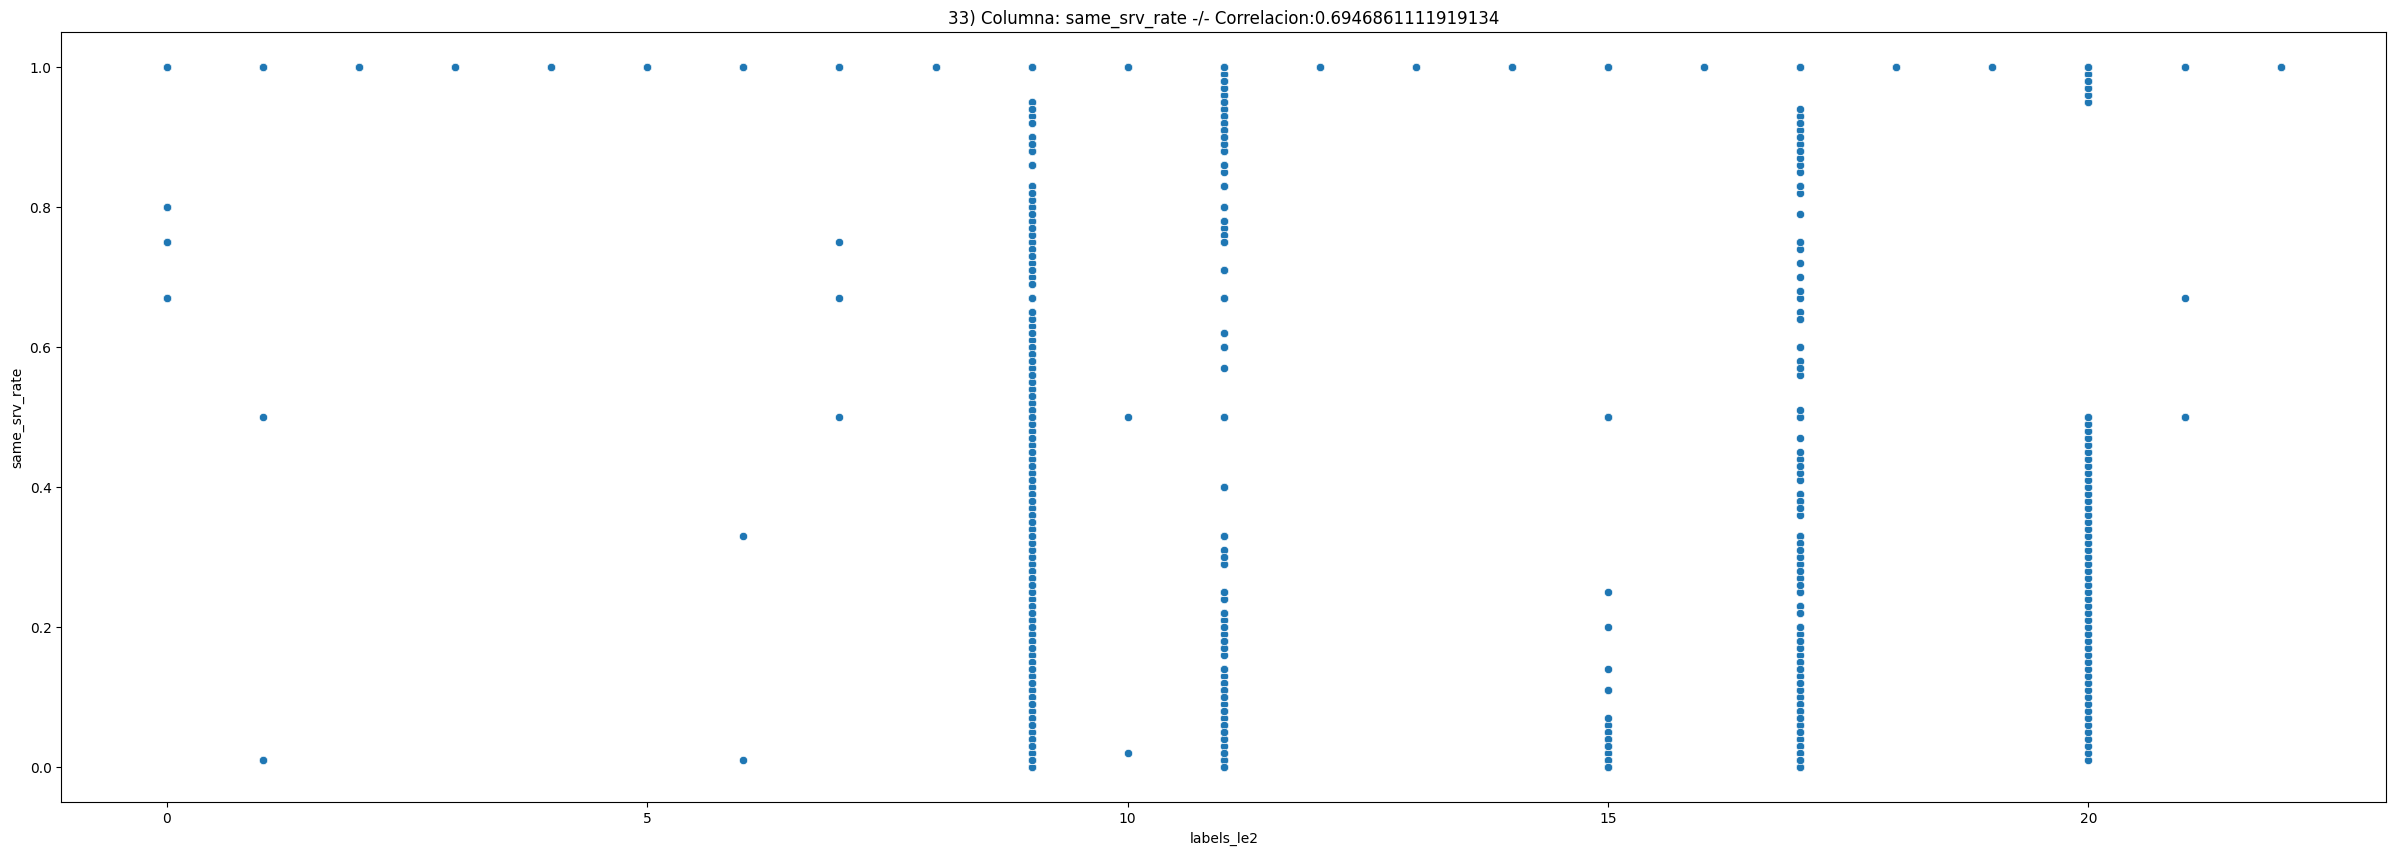

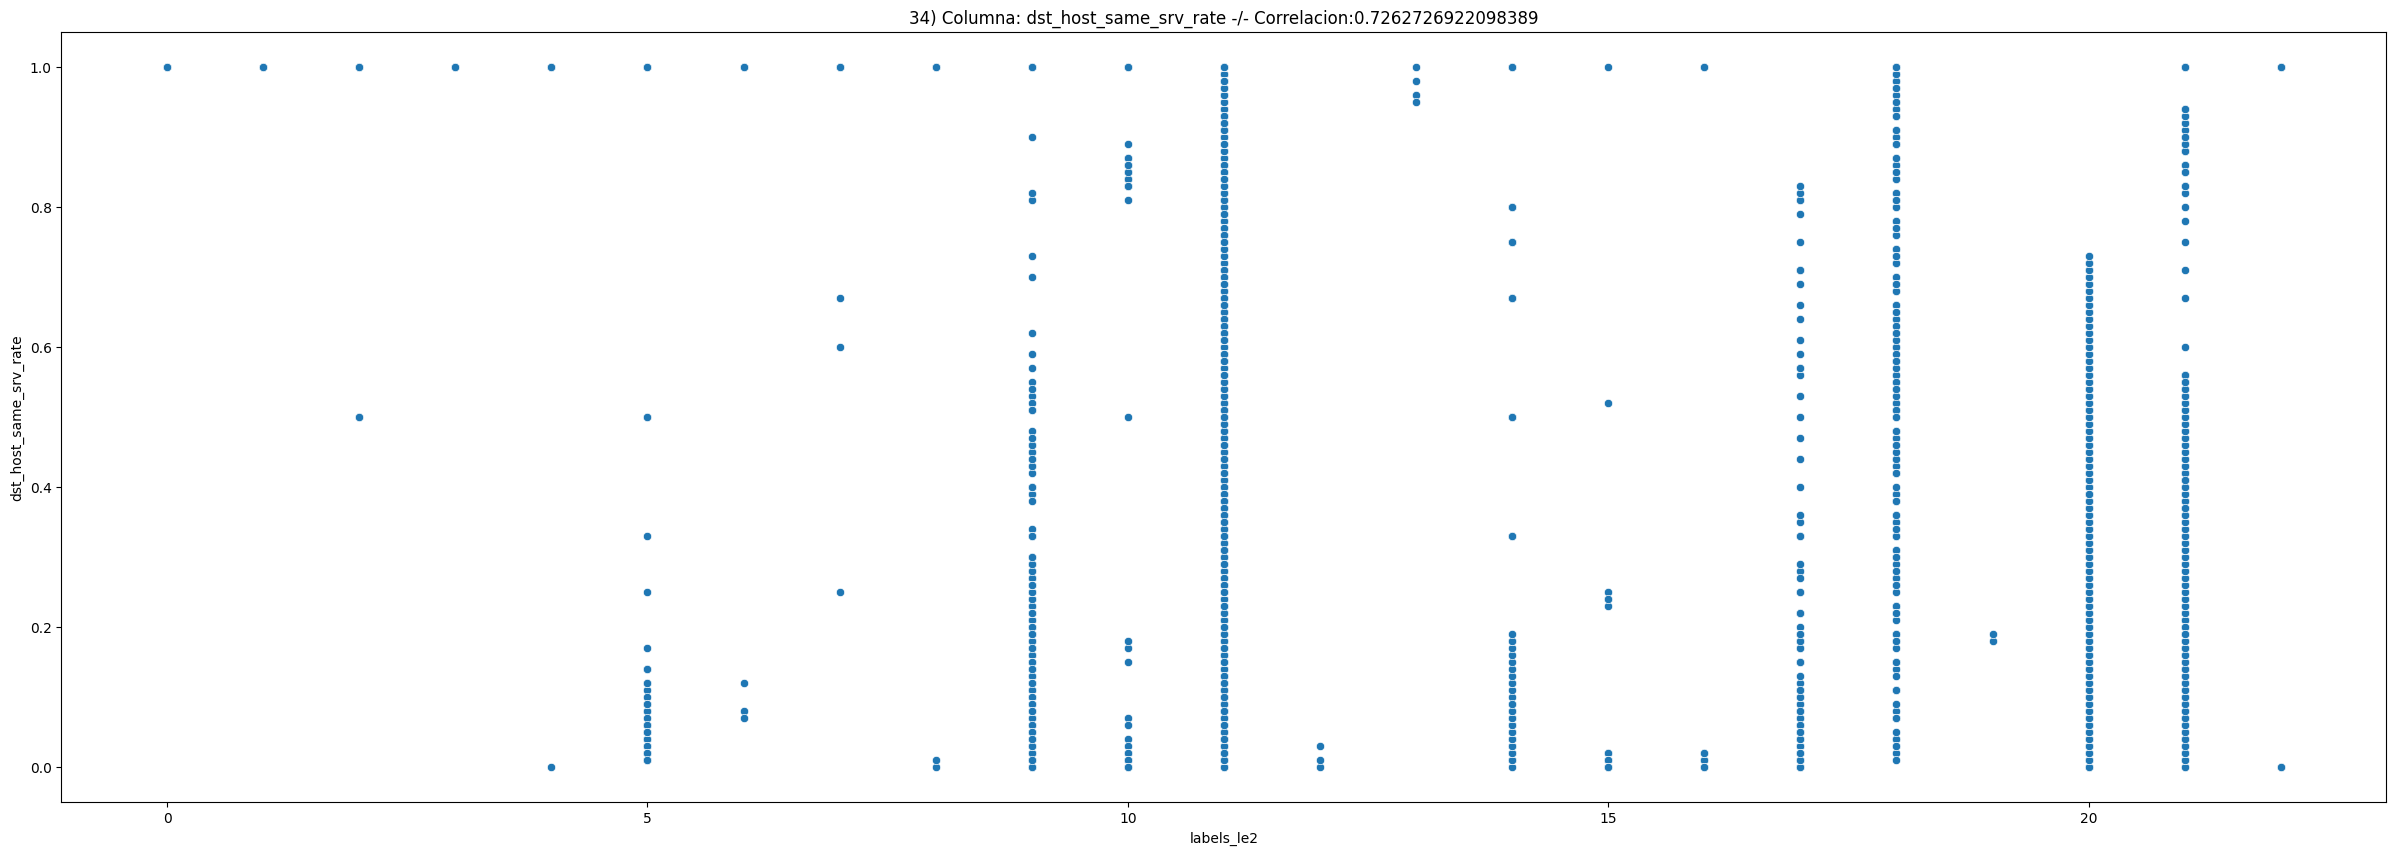

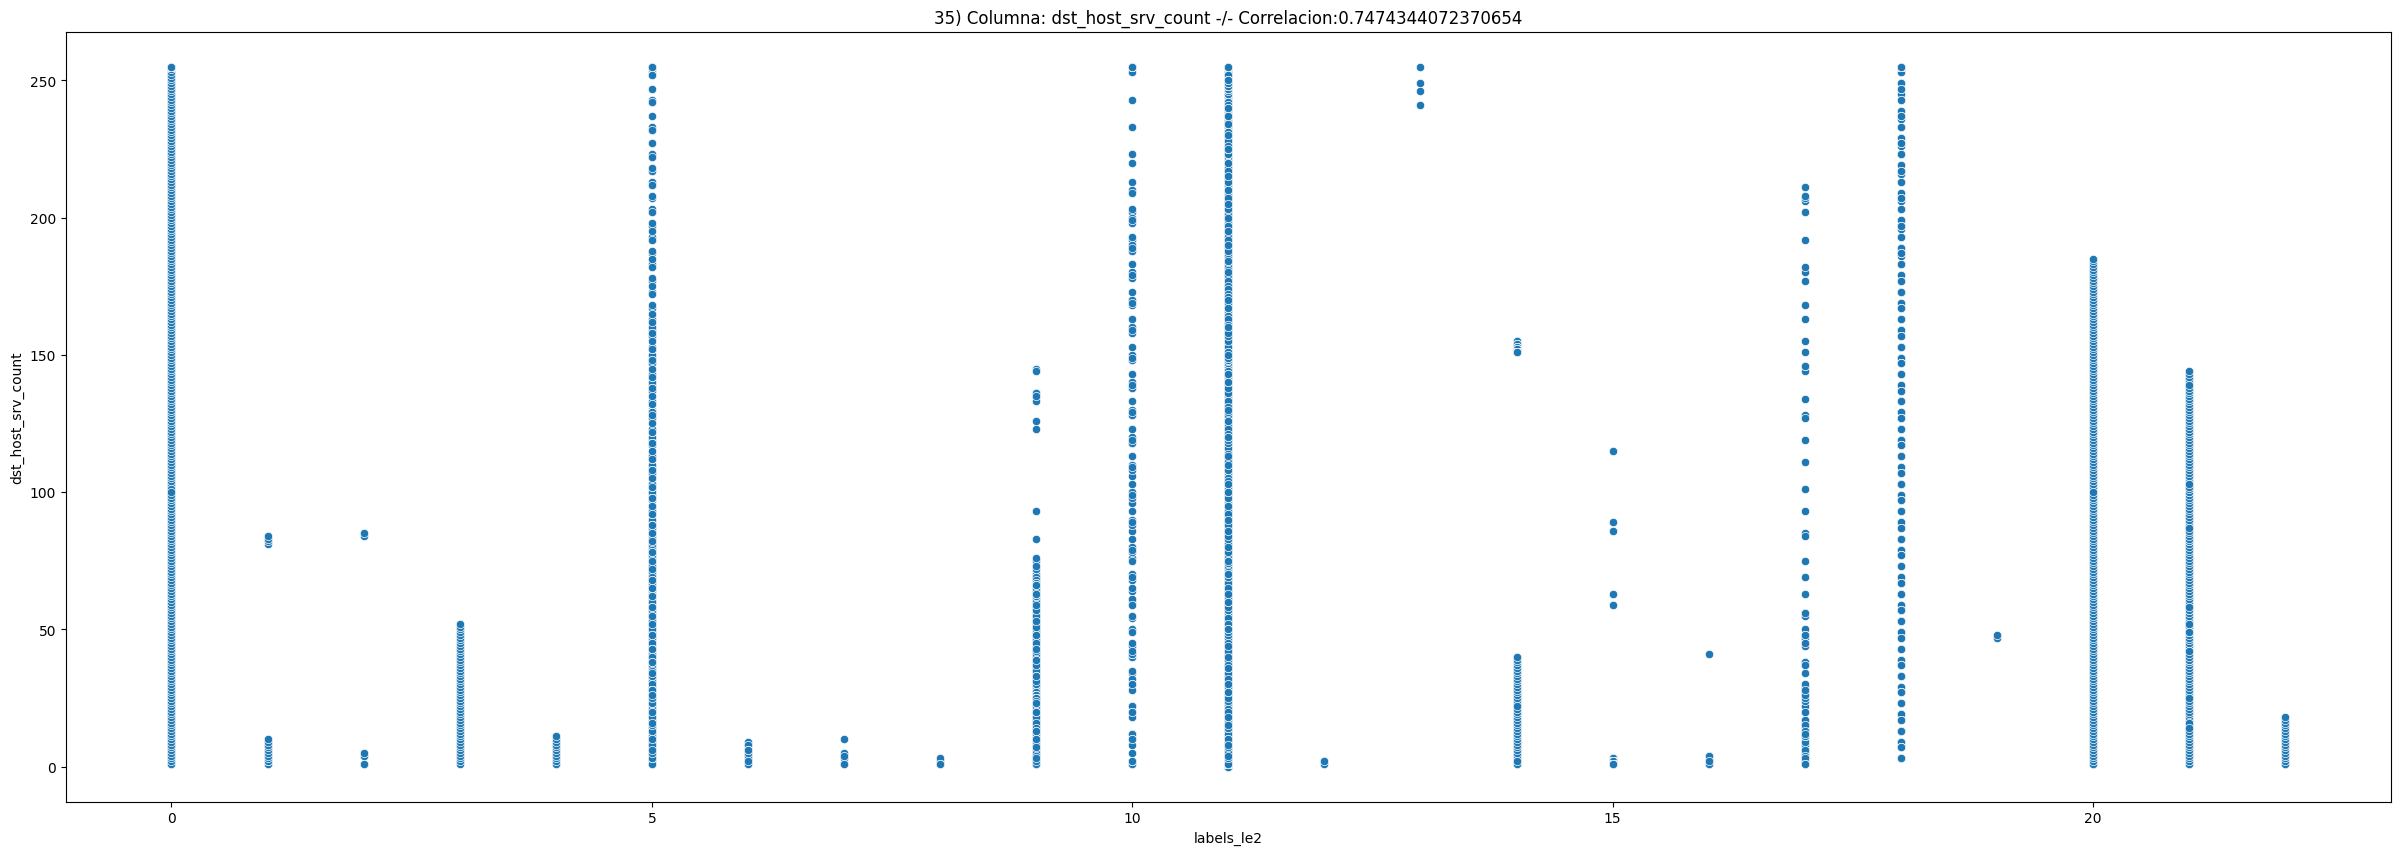

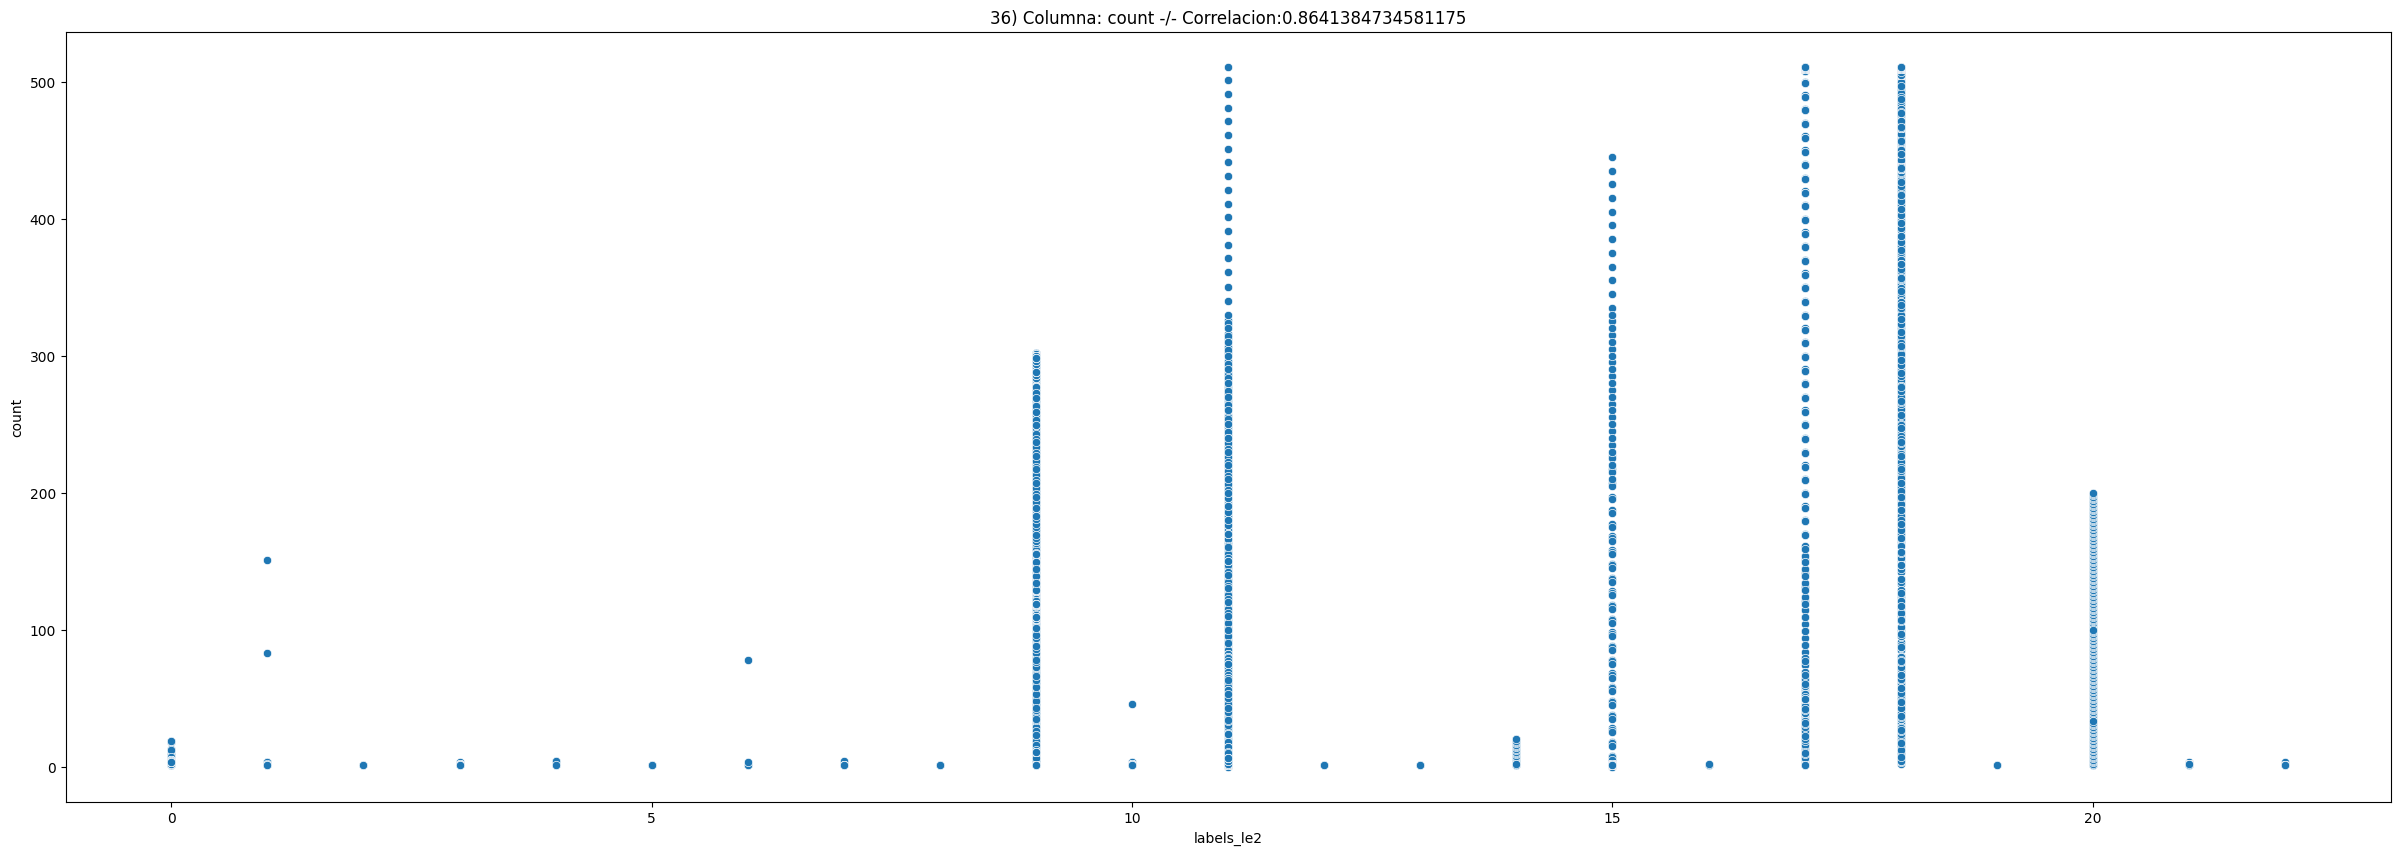

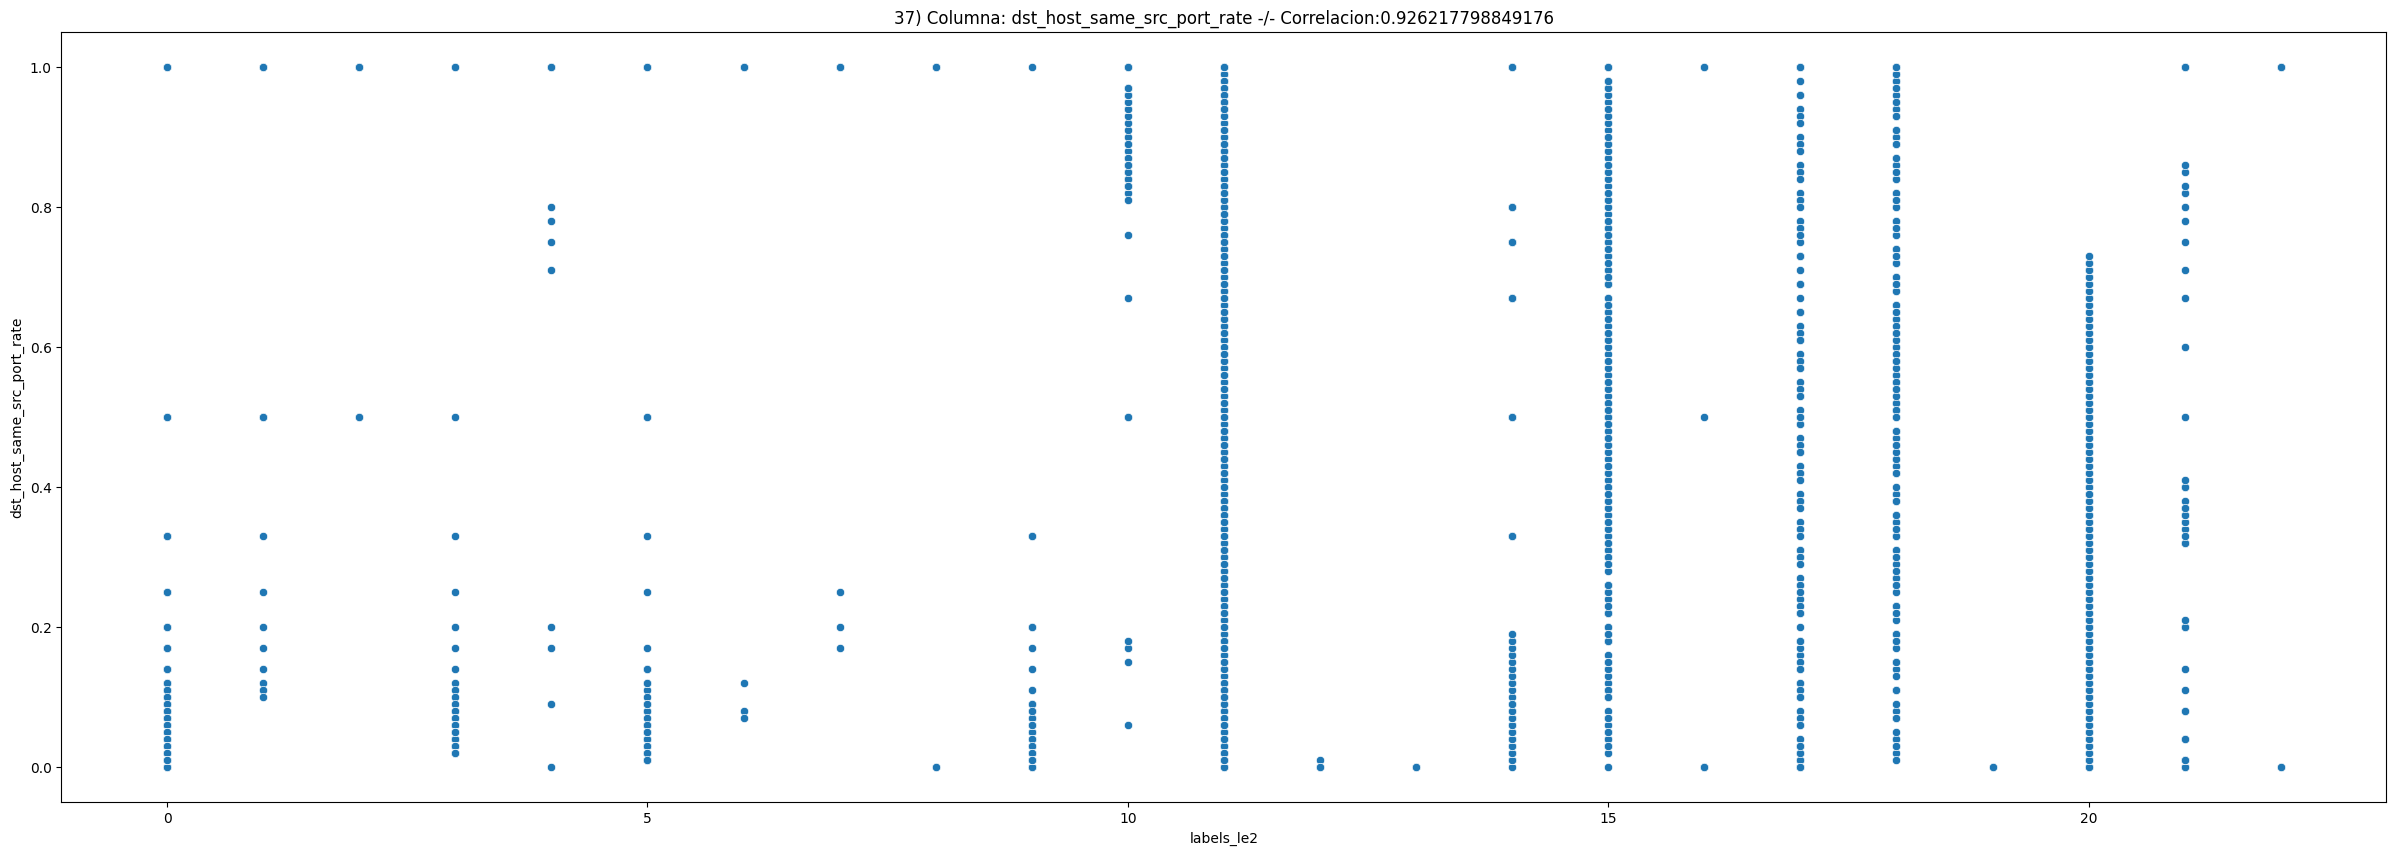

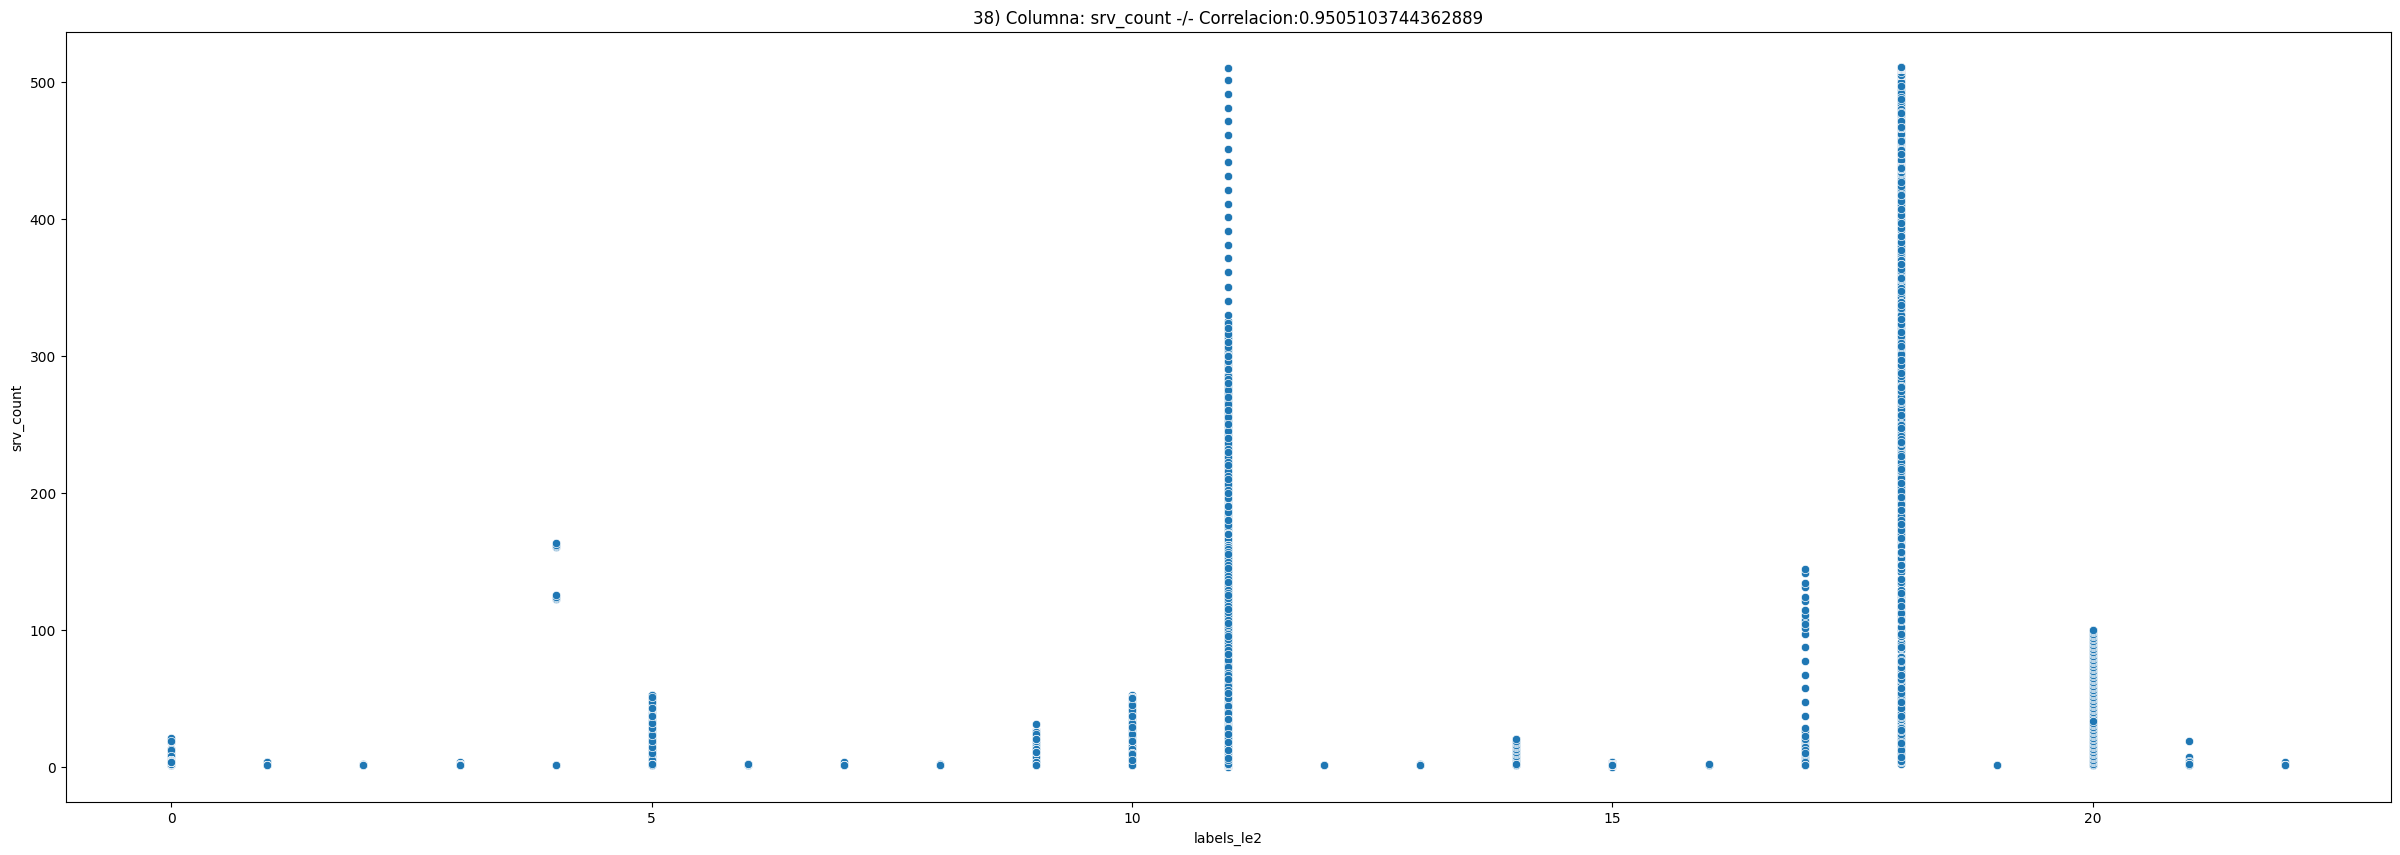

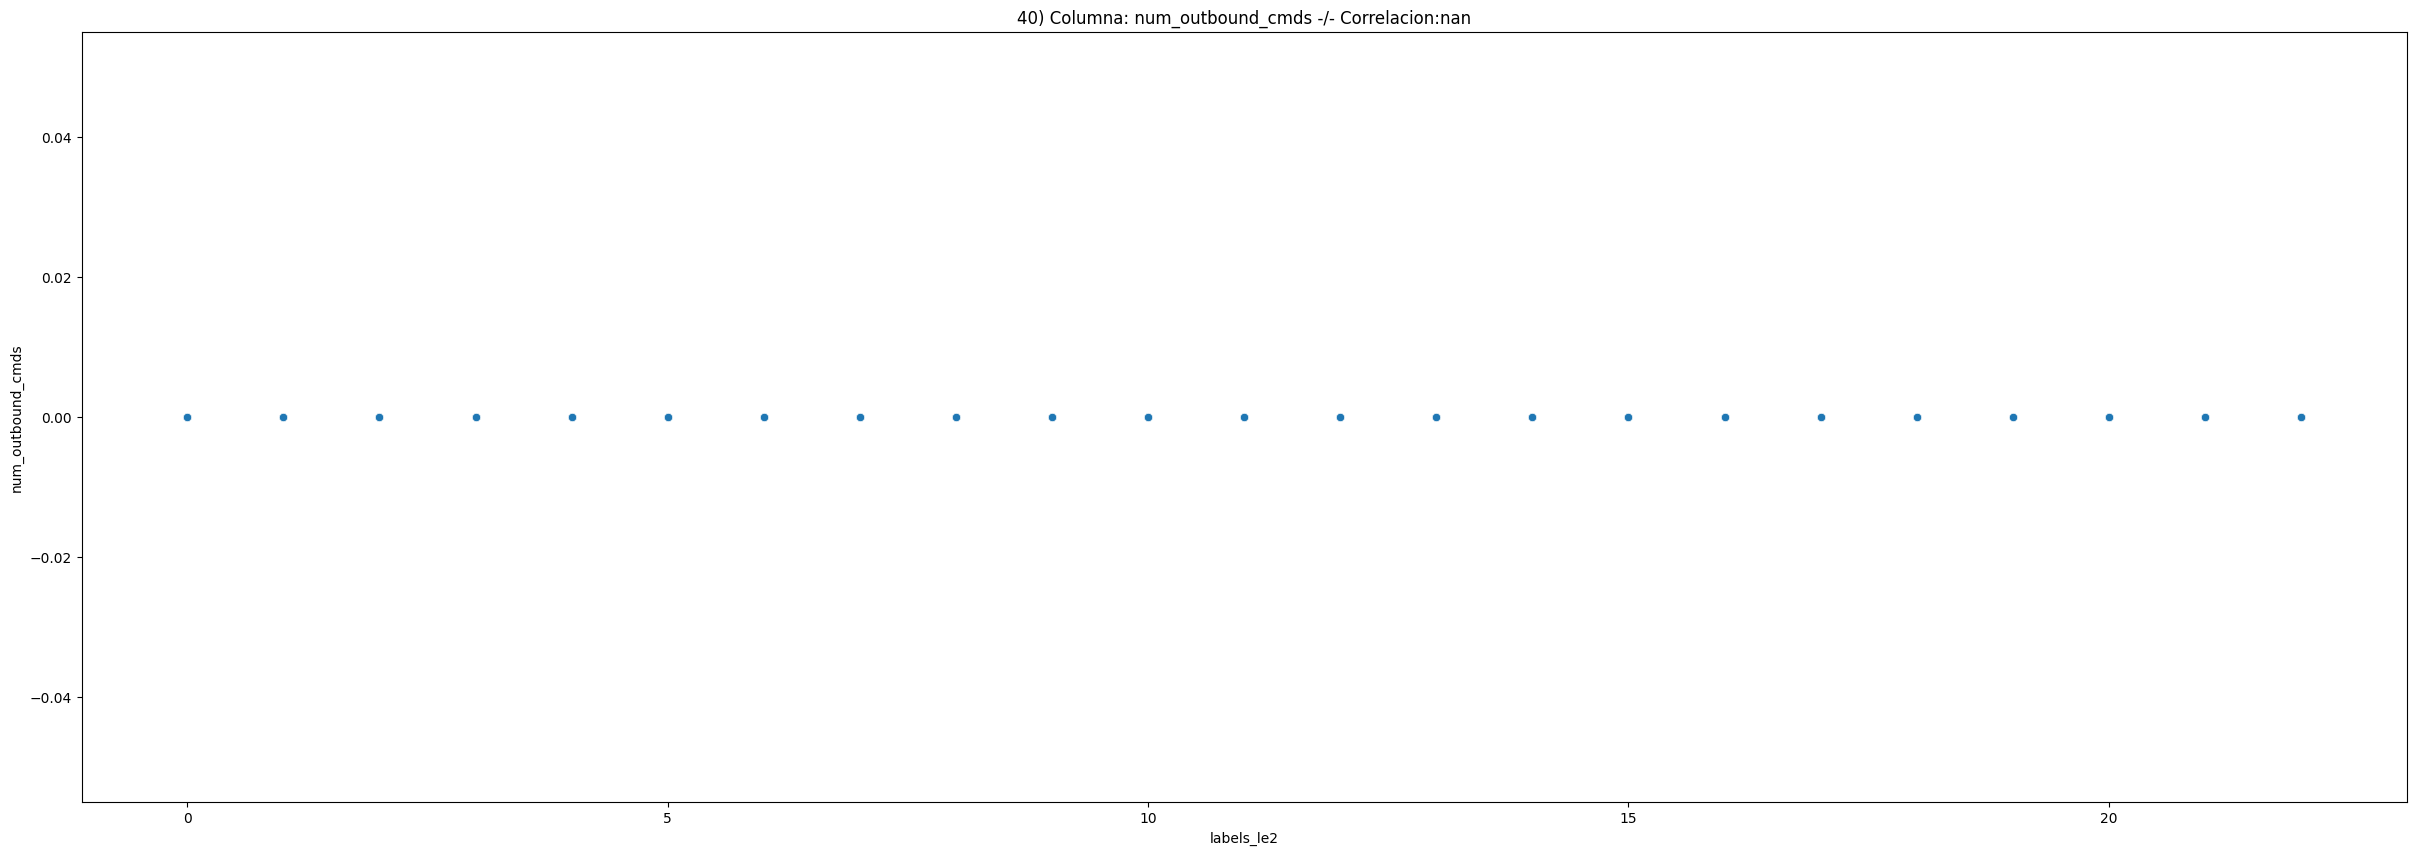

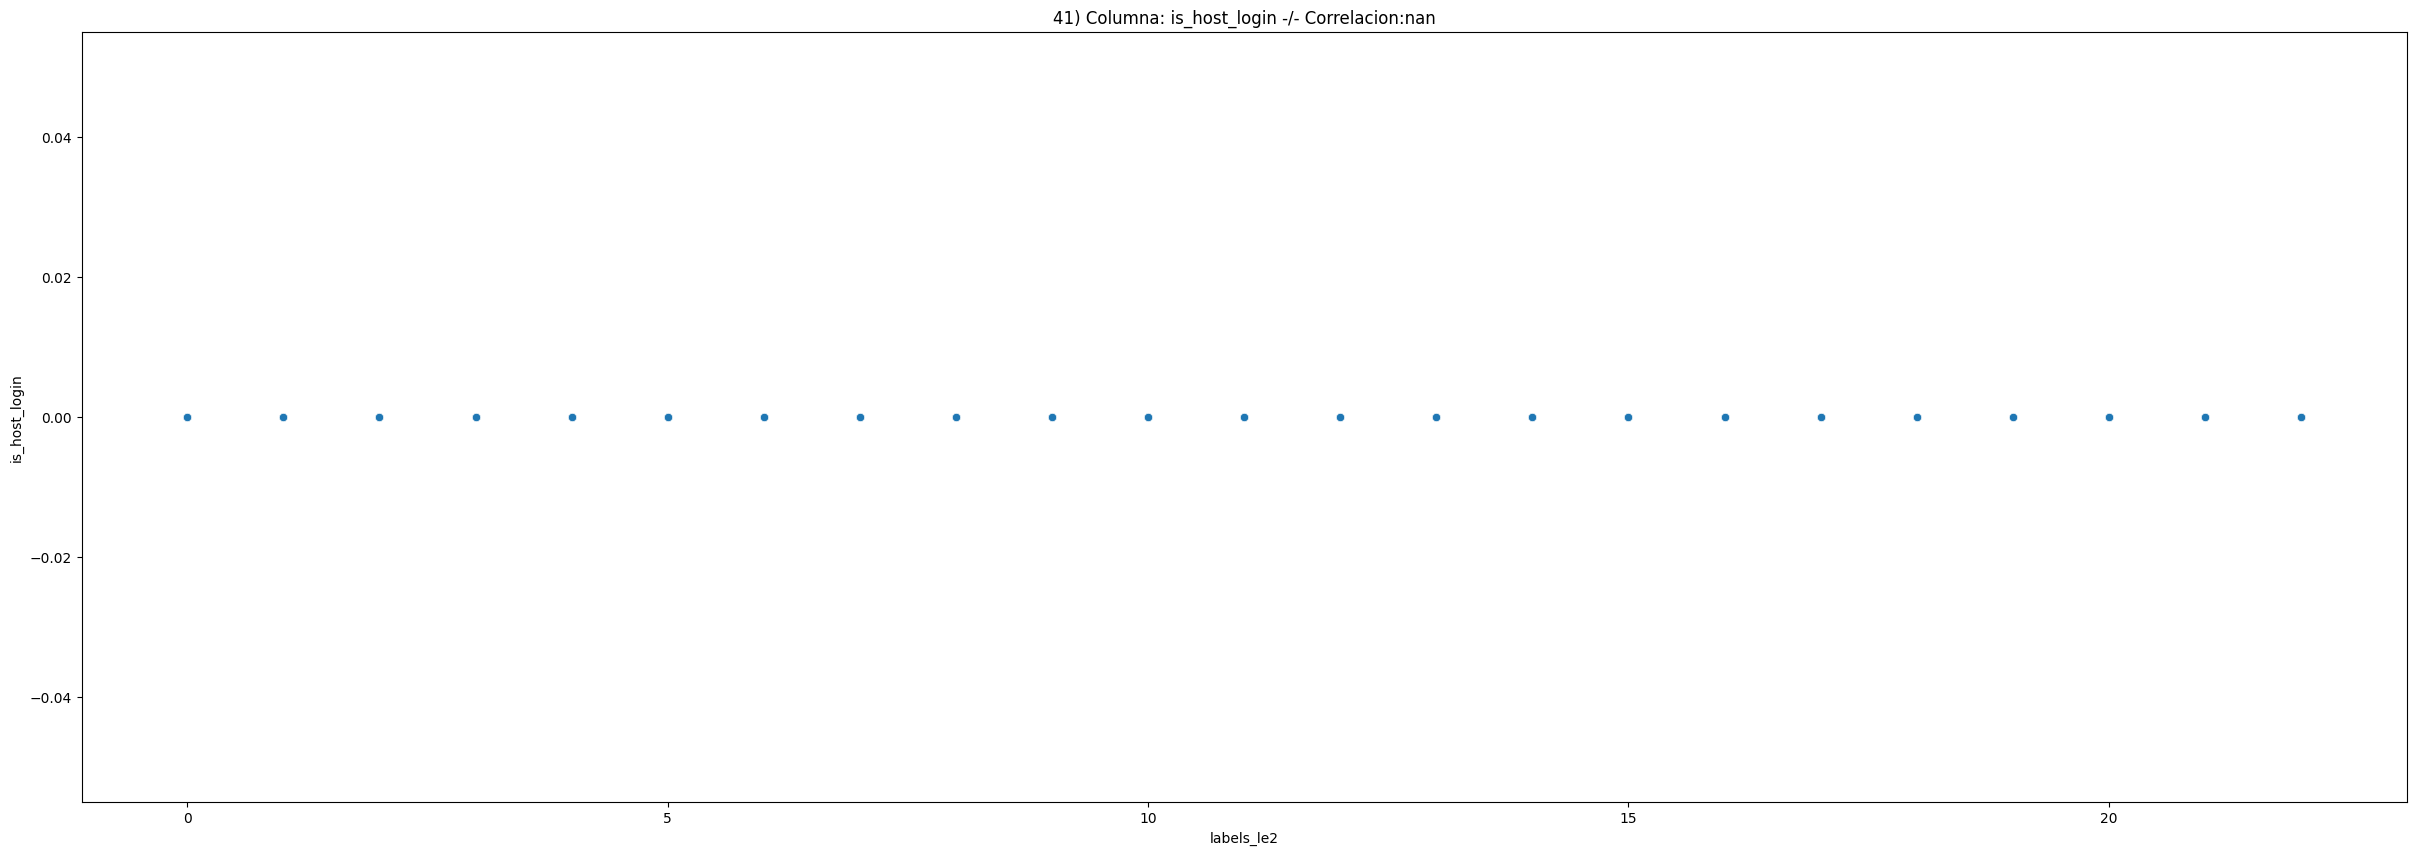

In [110]:
cols = df_corr.loc['labels_le2'].sort_values(ascending=True).index
vals = df_corr.loc['labels_le2'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'labels_le2'):
        ax = plt.axes()
        sns.scatterplot(x="labels_le2", y=cols[i], data=df_conexiones[['labels_le2',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

Vamos a tomar las 5 variables con mayor y menor valor de correlación:

1. count                         -0.752978
2. dst_host_count                -0.642110
3. srv_count                     -0.566829
4. dst_host_same_src_port_rate   -0.481458
5. dst_host_srv_serror_rate      -0.227975
6. dst_host_srv_diff_host_rate    0.204958
7. same_srv_rate                  0.247405
8. srv_diff_host_rate             0.364687
9. protocol_type_le               0.616601
10. logged_in                      0.795282

<AxesSubplot: >

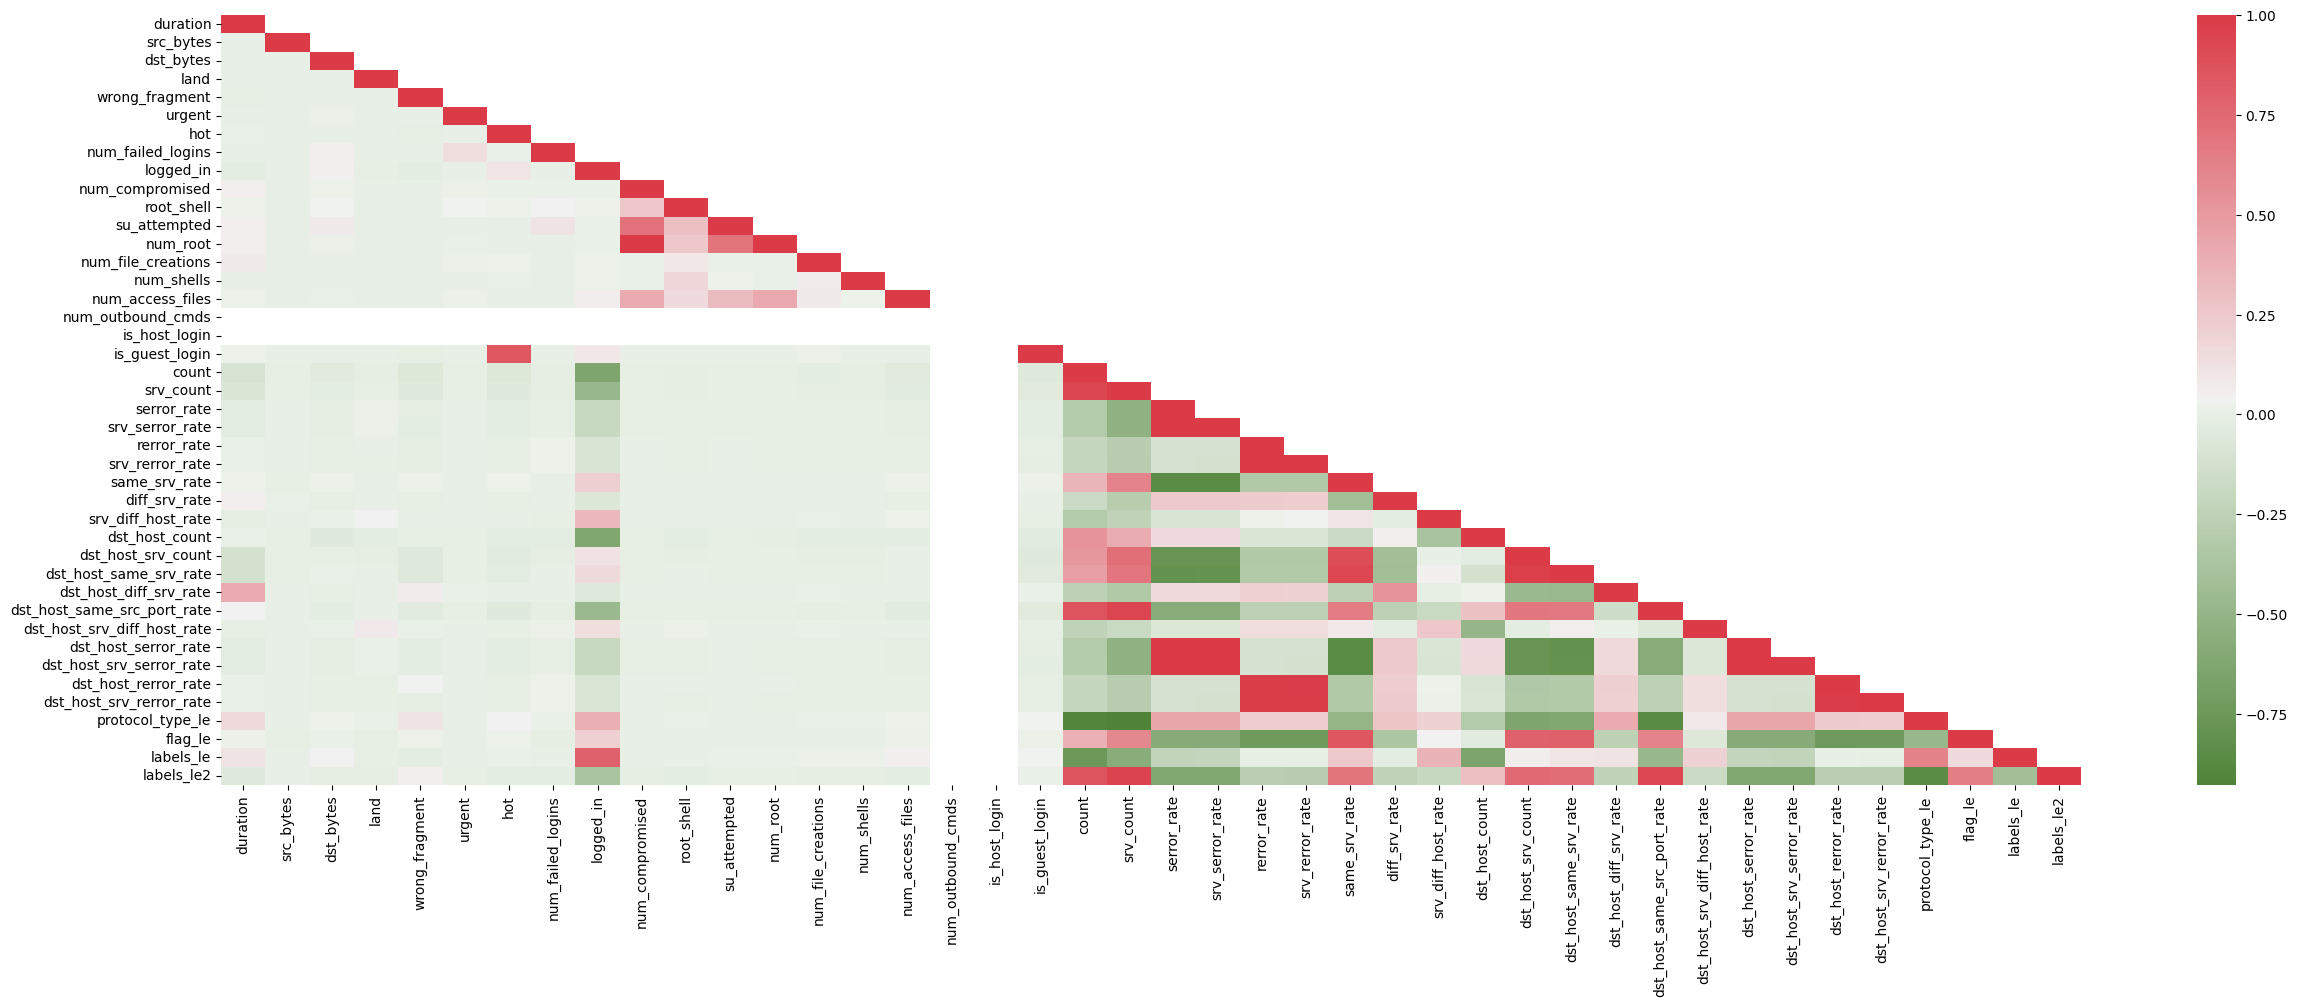

In [111]:
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype('bool')
df_corr = df_corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(df_corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

In [112]:
df_conexiones_corr = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in', 'labels_le']]

<AxesSubplot: >

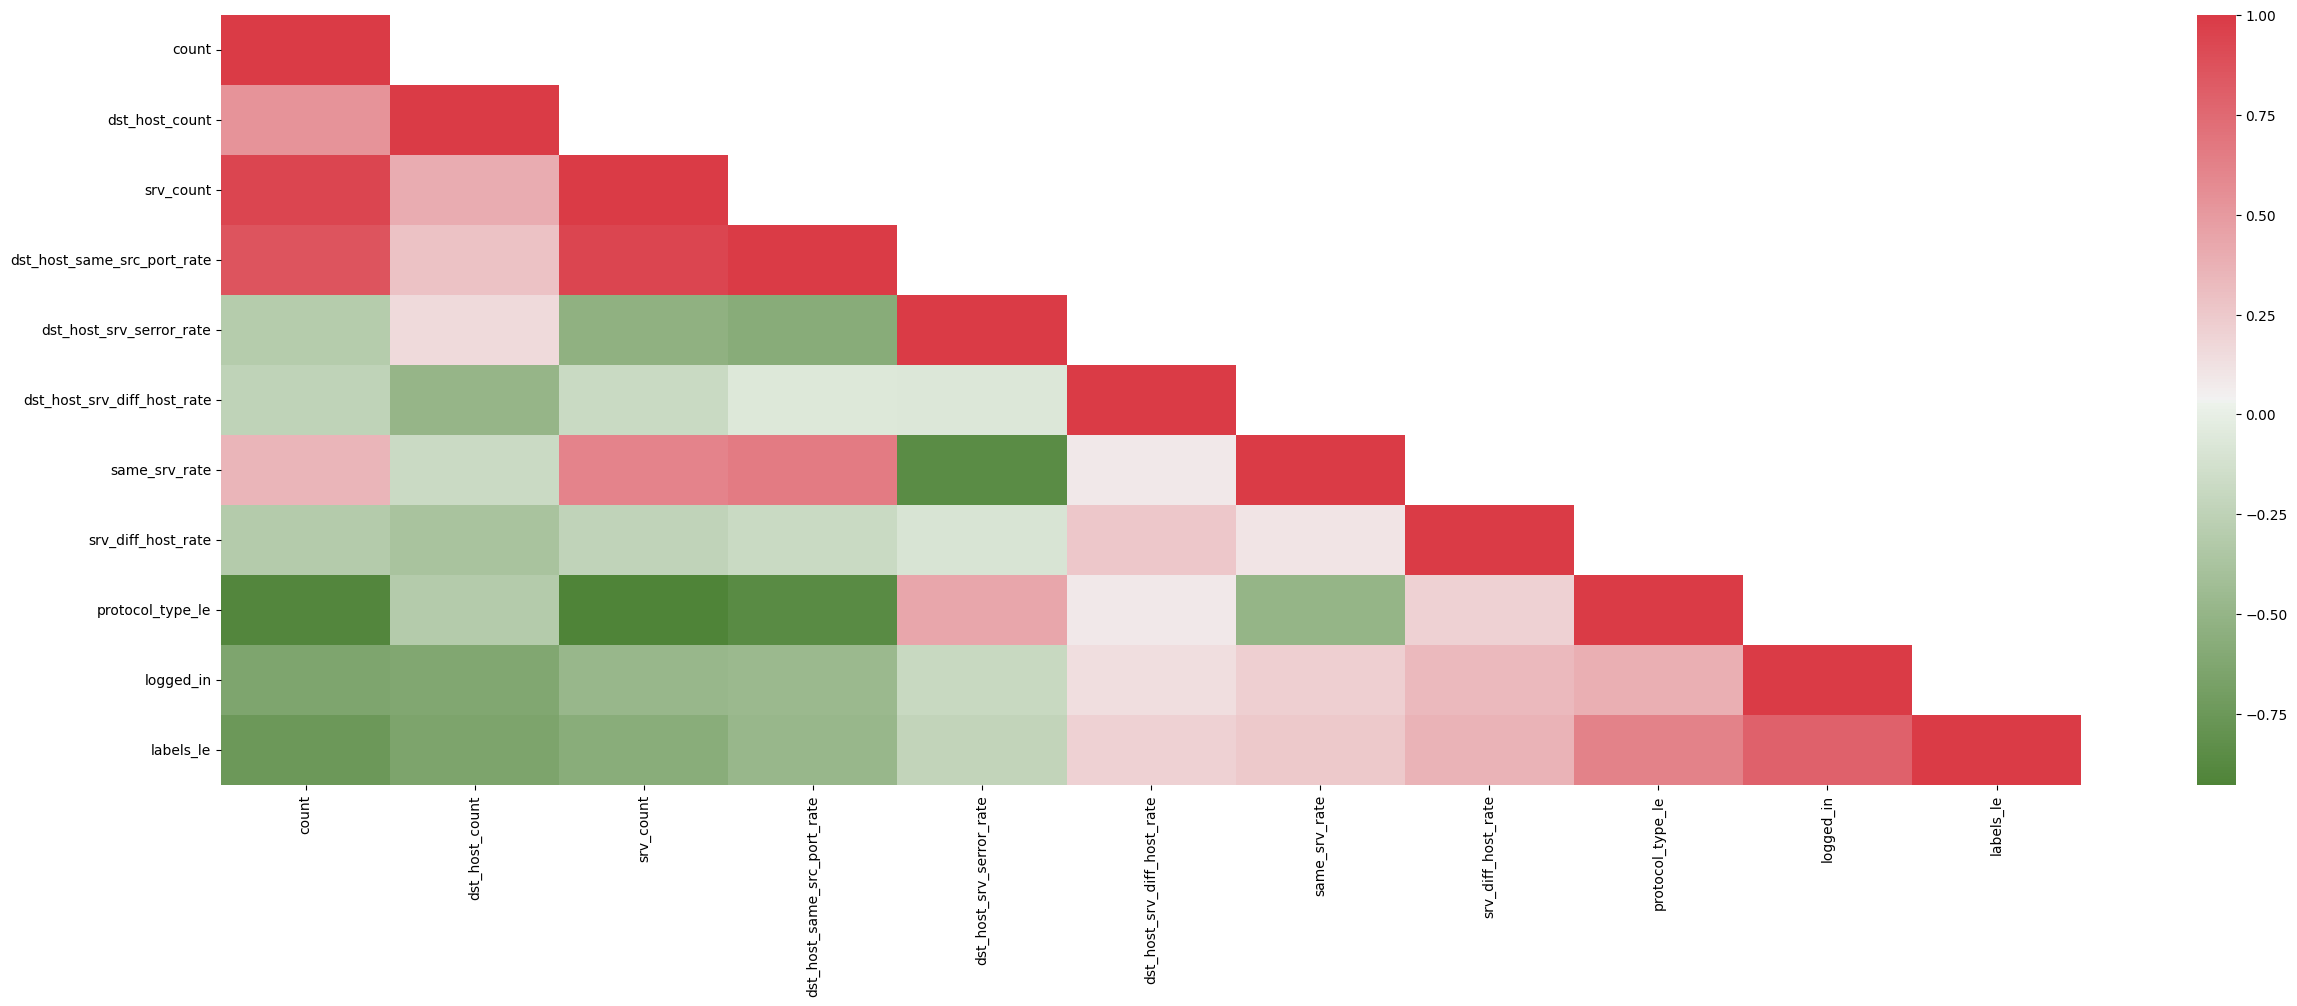

In [113]:
df_corr = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in', 'labels_le']].corr()
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype('bool')
df_corr = df_corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(df_corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

In [114]:
df_corr

count  dst_host_count  srv_count  \
count                        1.000000             NaN        NaN   
dst_host_count               0.532632        1.000000        NaN   
srv_count                    0.943667        0.401536   1.000000   
dst_host_same_src_port_rate  0.860579        0.290747   0.944926   
dst_host_srv_serror_rate    -0.309709        0.157368  -0.529981   
dst_host_srv_diff_host_rate -0.244573       -0.491162  -0.183215   
same_srv_rate                0.353735       -0.181051   0.615566   
srv_diff_host_rate          -0.314210       -0.382389  -0.235632   
protocol_type_le            -0.901467       -0.317388  -0.927430   
logged_in                   -0.634643       -0.621029  -0.478122   
labels_le                   -0.752978       -0.642110  -0.566829   

                             dst_host_same_src_port_rate  \
count                                                NaN   
dst_host_count                                       NaN   
srv_count                                            NaN   
dst_host_same_src_port_rate                     1.000000   
dst_host_srv_serror_rate                       -0.577618   
dst_host_srv_diff_host_rate                    -0.064396   
same_srv_rate                                   0.660744   
srv_diff_host_rate                             -0.187881   
protocol_type_le                               -0.861009   
logged_in                                      -0.461558   
labels_le                                      -0.481458   

                             dst_host_srv_serror_rate  \
count                                             NaN   
dst_host_count                                    NaN   
srv_count                                         NaN   
dst_host_same_src_port_rate                       NaN   
dst_host_srv_serror_rate                     1.000000   
dst_host_srv_diff_host_rate                 -0.071657   
same_srv_rate                               -0.857544   
srv_diff_host_rate                          -0.092686   
protocol_type_le                             0.428811   
logged_in                                   -0.191704   
labels_le                                   -0.227975   

                             dst_host_srv_diff_host_rate  same_srv_rate  \
count                                                NaN            NaN   
dst_host_count                                       NaN            NaN   
srv_count                                            NaN            NaN   
dst_host_same_src_port_rate                          NaN            NaN   
dst_host_srv_serror_rate                             NaN            NaN   
dst_host_srv_diff_host_rate                     1.000000            NaN   
same_srv_rate                                   0.083454       1.000000   
srv_diff_host_rate                              0.259985       0.105393   
protocol_type_le                                0.085012      -0.505618   
logged_in                                       0.140493       0.219685   
labels_le                                       0.204958       0.247405   

                             srv_diff_host_rate  protocol_type_le  logged_in  \
count                                       NaN               NaN        NaN   
dst_host_count                              NaN               NaN        NaN   
srv_count                                   NaN               NaN        NaN   
dst_host_same_src_port_rate                 NaN               NaN        NaN   
dst_host_srv_serror_rate                    NaN               NaN        NaN   
dst_host_srv_diff_host_rate                 NaN               NaN        NaN   
same_srv_rate                               NaN               NaN        NaN   
srv_diff_host_rate                     1.000000               NaN        NaN   
protocol_type_le                       0.203907          1.000000        NaN   
logged_in                              0.330673          0.386216   1.000000   
labels_le                   

In [115]:
df_conexiones_corr = df_conexiones_corr.head(10000)

In [116]:
df_conexiones_corr.shape

(10000, 11)

In [117]:
from sklearn.feature_selection import SelectKBest

In [118]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

In [119]:
selector = SelectKBest(mutual_info_regression, k=4)

In [120]:
X = df_conexiones_corr.drop(columns=["labels_le"])

In [121]:
y = df_conexiones_corr[['labels_le']]

In [122]:
selector.fit(X,y)

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001D3E104B490>)

In [123]:
scores = selector.scores_

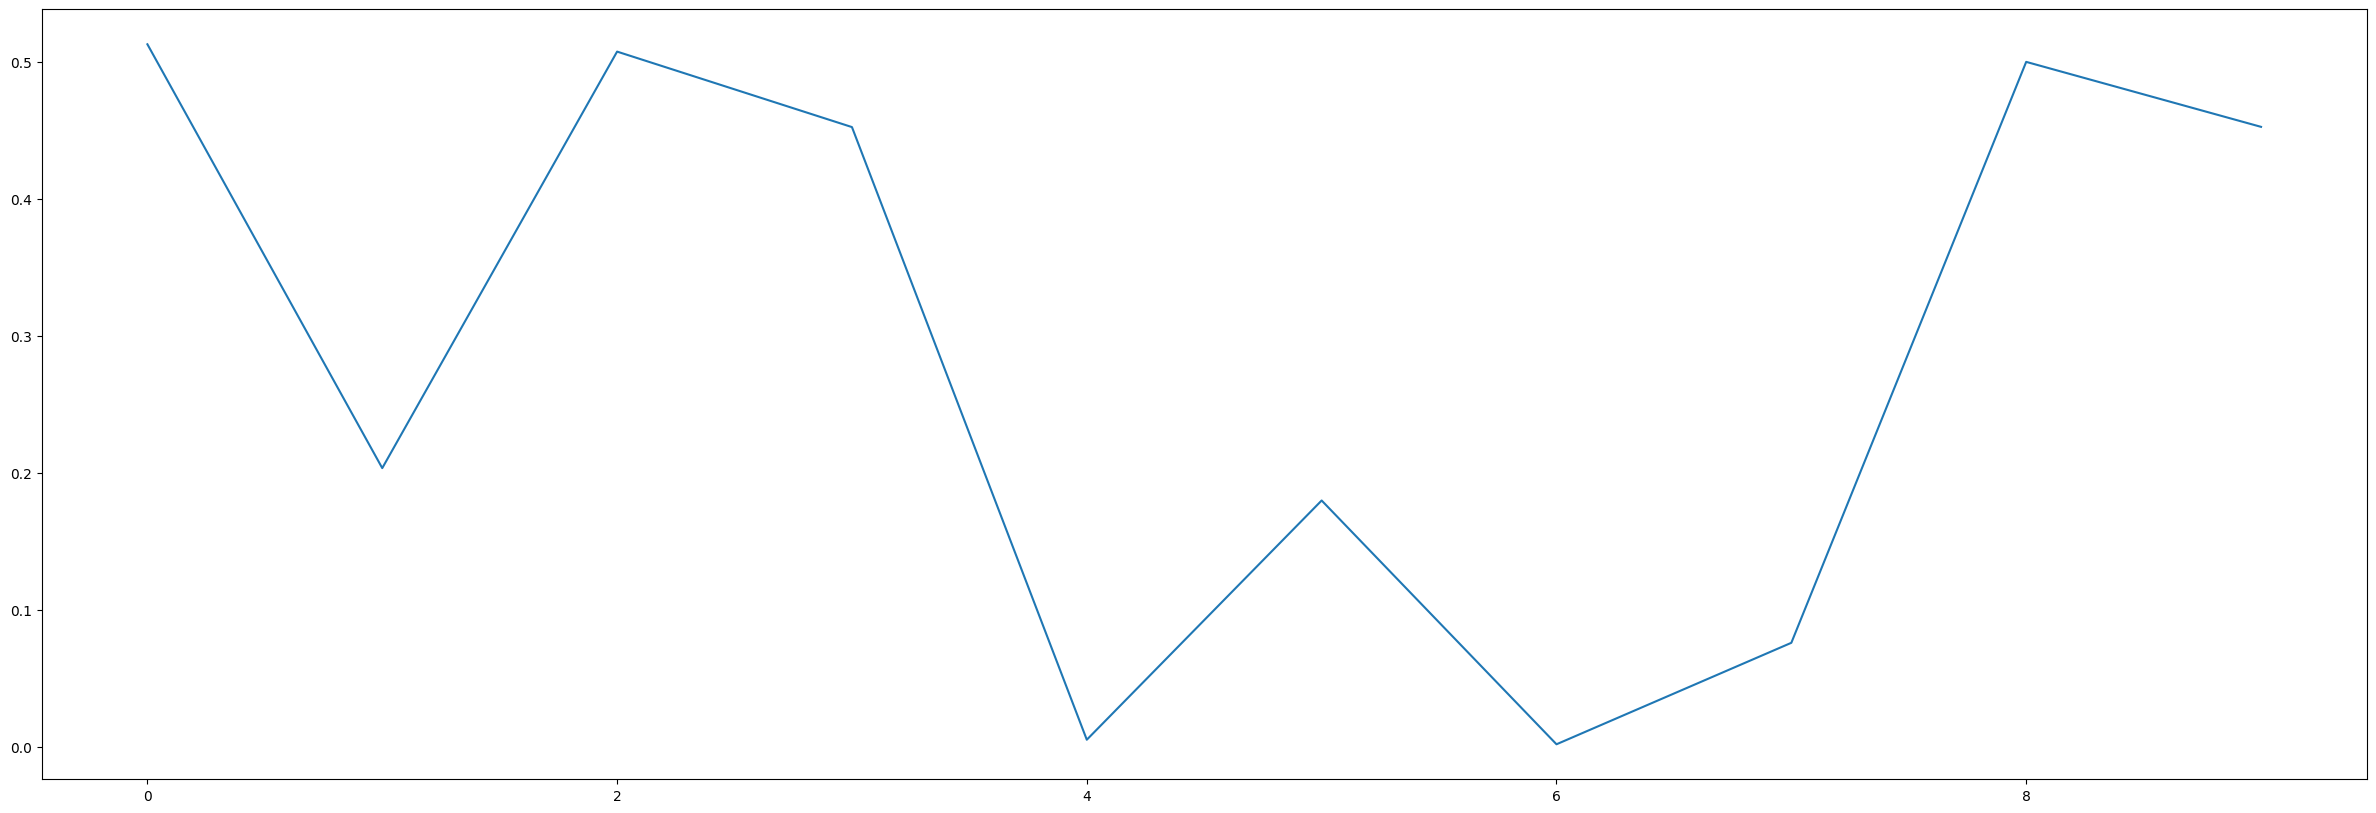

In [124]:
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(scores)
# plt.xticks(np.arange(10),list(X.columns))

Se puede observar que las 4 variables principalmente sugeridas son (solo tomando los primeros 10 mil registros):

1. count
2. srv_count
3. protocol_type_le
4. logged_in

Son las mas correlacionadas con la variable objetivo

#### **Ejercicio 2**

Usando las variables más relevantes y separando
los datos en "train" y "test", utilizar un árbol de
decisión para:
1. Realizar la predicción sobre si es una conexión
normal o no.

In [141]:
#1) 
X = df_conexiones[['count','srv_count','logged_in','protocol_type_le','logged_in']]
y = df_conexiones[['labels_le']]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state= 42, stratify=y)

In [143]:
print('Shape de X train:', X_train.shape)
print('Shape de X test:', X_test.shape)

Shape de X train: (345814, 5)
Shape de X test: (148207, 5)


In [144]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)

In [145]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [147]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

print('Accuracy para conjunto de datos Train:', accuracy_score(y_train_pred, y_train))
print('Accuracy para conjunto de datos Test:', accuracy_score(y_test_pred, y_test))

Accuracy para conjunto de datos Train: 0.9855413603844841
Accuracy para conjunto de datos Test: 0.9856754404312886


[Text(0.5, 0.9, 'x[0] <= 46.5\ngini = 0.316\nsamples = 345814\nvalue = [277720, 68094]'),
 Text(0.25, 0.7, 'x[3] <= 0.5\ngini = 0.151\nsamples = 73112\nvalue = [6002, 67110]'),
 Text(0.125, 0.5, 'x[1] <= 6.5\ngini = 0.495\nsamples = 2047\nvalue = [1128, 919]'),
 Text(0.0625, 0.3, 'x[0] <= 2.5\ngini = 0.452\nsamples = 1383\nvalue = [477, 906]'),
 Text(0.03125, 0.1, 'gini = 0.489\nsamples = 1082\nvalue = [462, 620]'),
 Text(0.09375, 0.1, 'gini = 0.095\nsamples = 301\nvalue = [15, 286]'),
 Text(0.1875, 0.3, 'x[1] <= 7.5\ngini = 0.038\nsamples = 664\nvalue = [651, 13]'),
 Text(0.15625, 0.1, 'gini = 0.42\nsamples = 30\nvalue = [21, 9]'),
 Text(0.21875, 0.1, 'gini = 0.013\nsamples = 634\nvalue = [630, 4]'),
 Text(0.375, 0.5, 'x[2] <= 0.5\ngini = 0.128\nsamples = 71065\nvalue = [4874, 66191]'),
 Text(0.3125, 0.3, 'x[0] <= 12.5\ngini = 0.223\nsamples = 20145\nvalue = [2580, 17565]'),
 Text(0.28125, 0.1, 'gini = 0.139\nsamples = 18304\nvalue = [1374, 16930]'),
 Text(0.34375, 0.1, 'gini = 0.452\

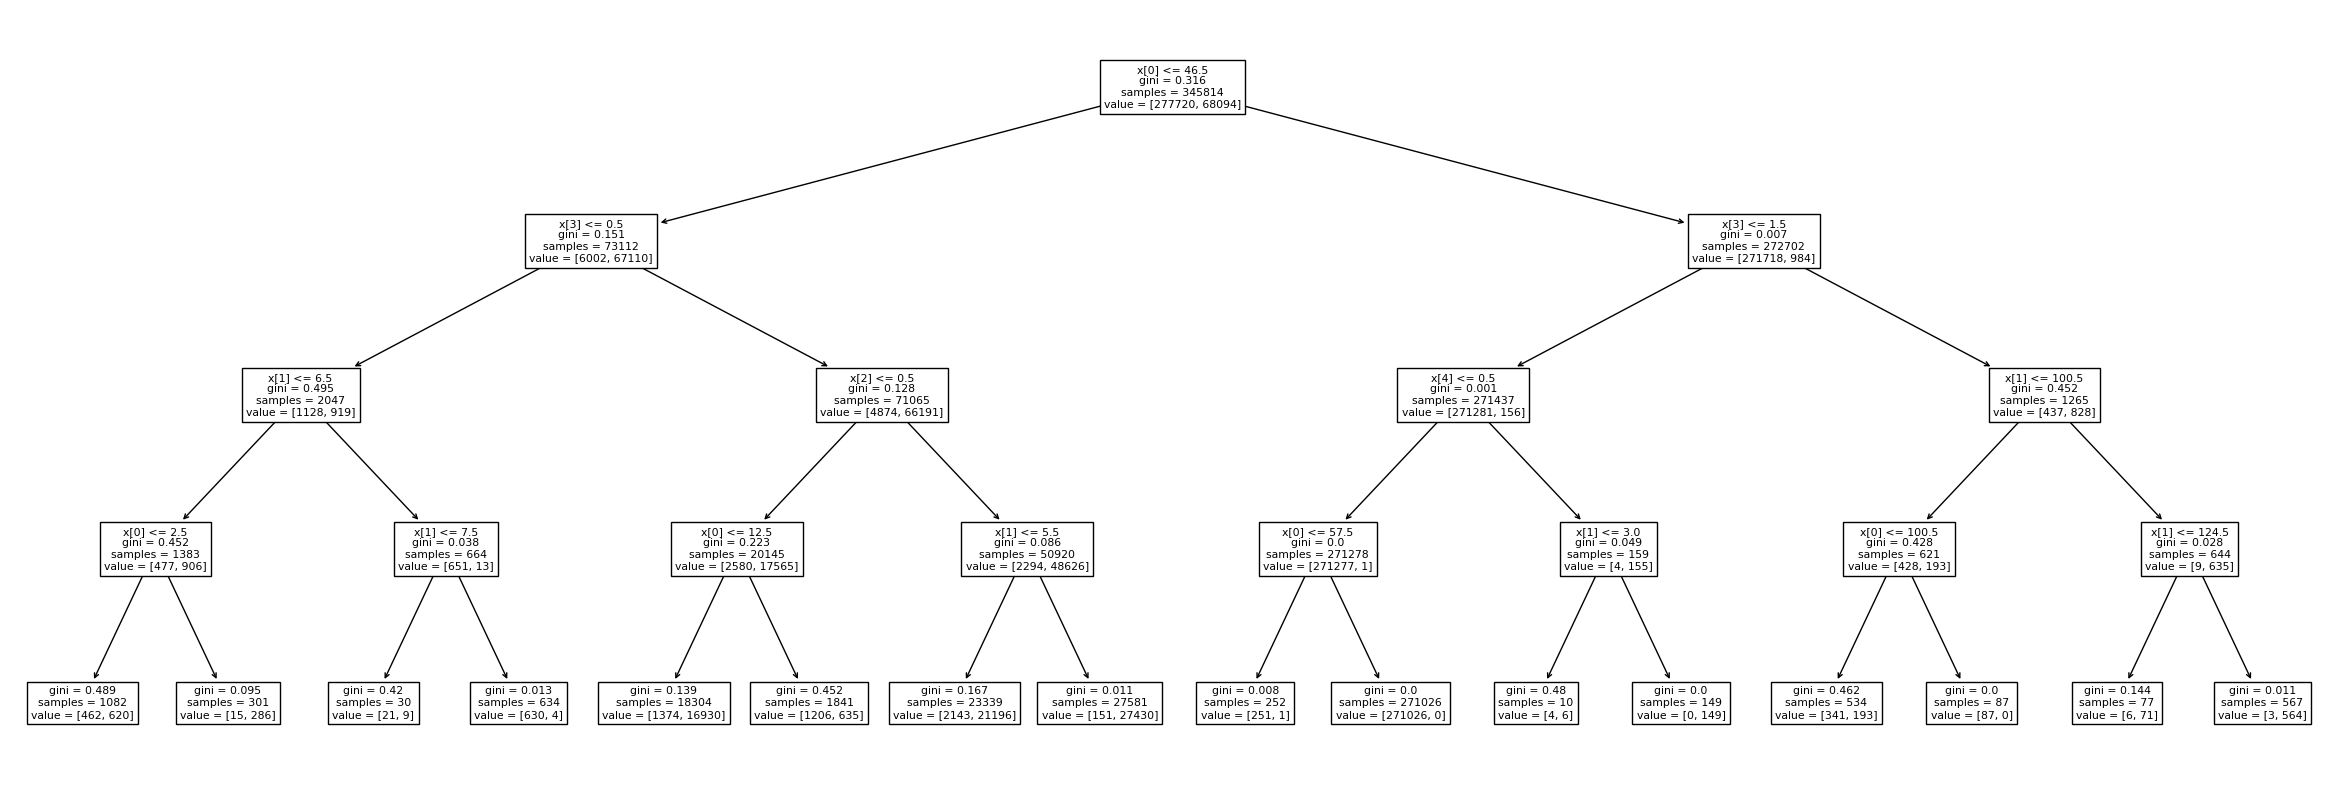

In [148]:
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

2. Realizar la predicción sobre qué tipo de
conexión es pero teniendo en cuenta todas las
posibles.

In [150]:
X = df_conexiones[['count','srv_count','logged_in','protocol_type_le','logged_in']]
y = df_conexiones[['labels_le2']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 42)

In [152]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [153]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

print('Accuracy del conjunto de train', accuracy_score(y_train_pred, y_train))
print('Accuracy del conjunto de test', accuracy_score(y_test_pred, y_test))

Accuracy del conjunto de train 0.9824934791535334
Accuracy del conjunto de test 0.9821196029877132


[Text(0.65, 0.9, 'x[1] <= 326.0\ngini = 0.591\nsamples = 345814\nvalue = [1546, 19, 7, 41, 9, 862, 16, 7, 5, 75199, 170\n68086, 1, 4, 204, 700, 8, 1120, 196420, 2, 679\n696, 13]'),
 Text(0.4, 0.7, 'x[0] <= 48.5\ngini = 0.54\nsamples = 149612\nvalue = [1546, 19, 7, 41, 9, 862, 16, 7, 5, 75199, 170\n68072, 1, 4, 204, 700, 8, 1120, 232, 2, 679, 696\n13]'),
 Text(0.2, 0.5, 'x[3] <= 0.5\ngini = 0.156\nsamples = 73147\nvalue = [1546, 17, 7, 41, 9, 862, 15, 7, 5, 1311, 170\n67142, 1, 4, 204, 636, 8, 114, 37, 2, 300, 696\n13]'),
 Text(0.1, 0.3, 'x[1] <= 7.5\ngini = 0.633\nsamples = 1989\nvalue = [0, 0, 0, 0, 0, 801, 0, 0, 0, 0, 70, 874, 0\n0, 204, 1, 0, 2, 37, 0, 0, 0, 0]'),
 Text(0.05, 0.1, 'gini = 0.528\nsamples = 1374\nvalue = [0, 0, 0, 0, 0, 323, 0, 0, 0, 0, 10, 872, 0\n0, 163, 1, 0, 2, 3, 0, 0, 0, 0]'),
 Text(0.15, 0.1, 'gini = 0.379\nsamples = 615\nvalue = [0, 0, 0, 0, 0, 478, 0, 0, 0, 0, 60, 2, 0, 0\n41, 0, 0, 0, 34, 0, 0, 0, 0]'),
 Text(0.3, 0.3, 'x[4] <= 0.5\ngini = 0.132\nsamples = 7

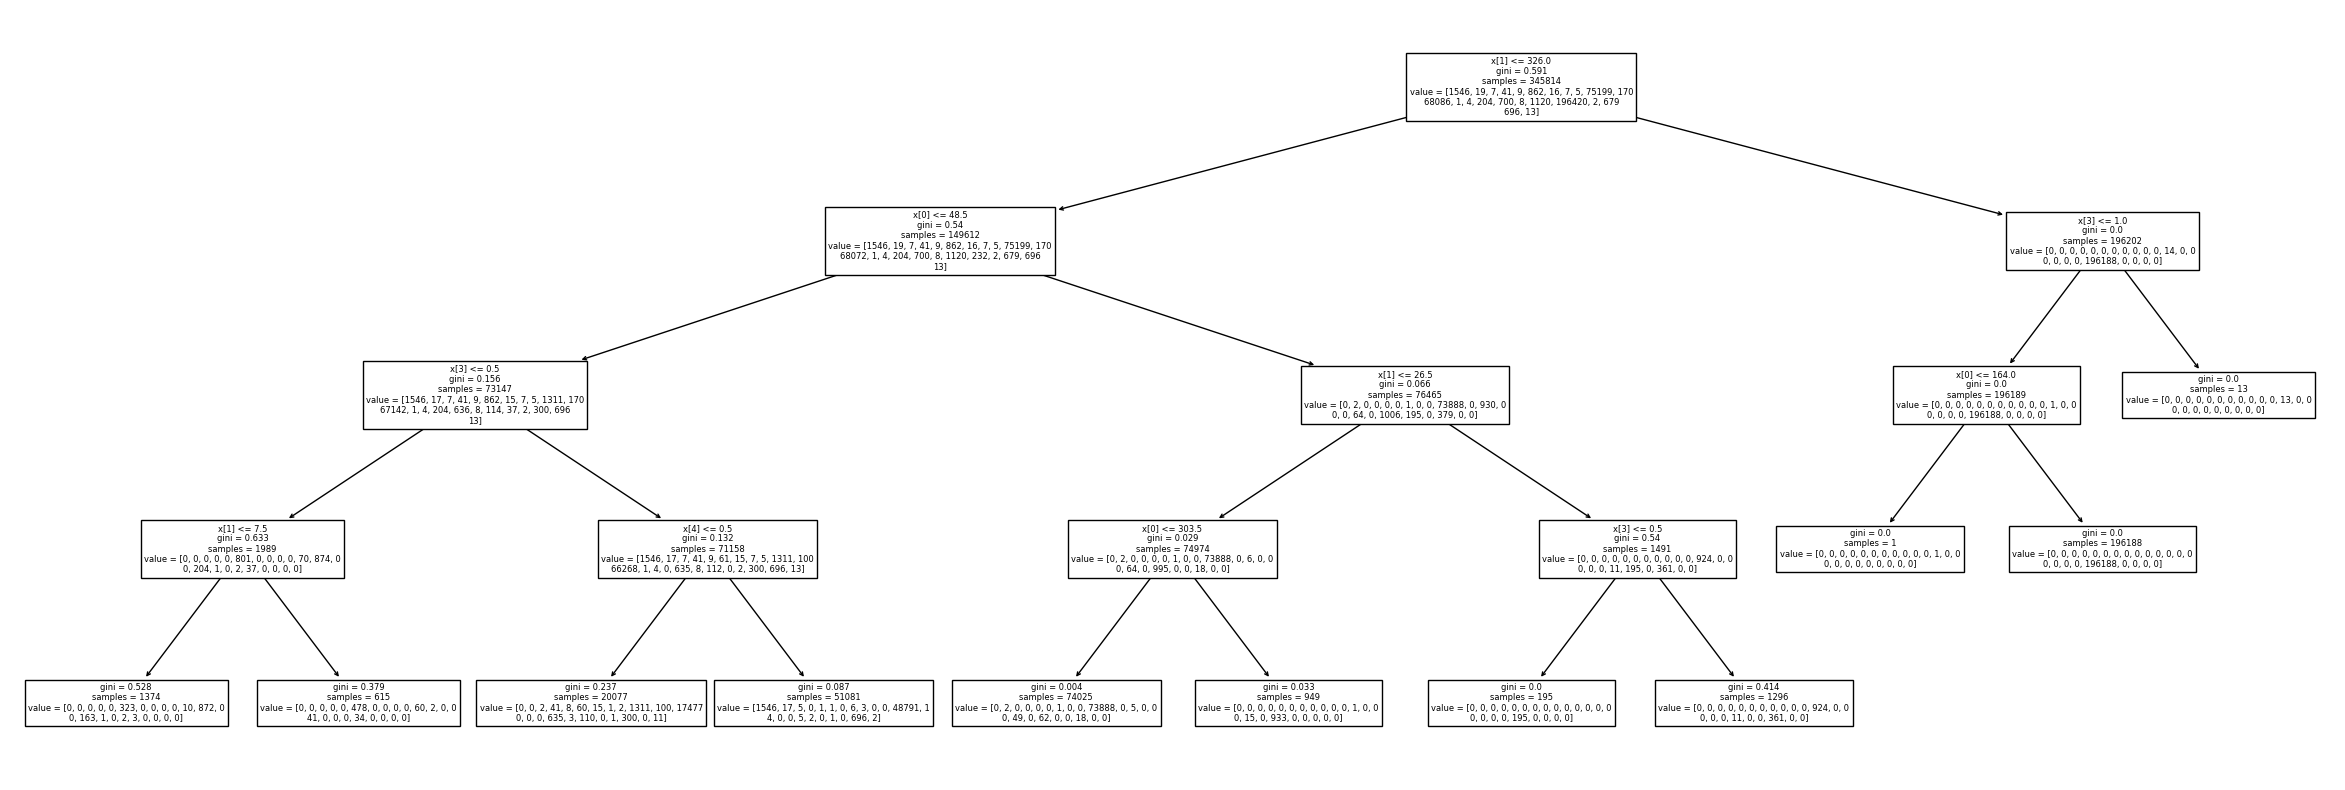

In [154]:
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

#### **Ejercicio 3**

1. Con el modelo del Laboratorio 2, realizar esta vez una validación cruzada.
2. Mostrar la curva de validación:


In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
arbol_scores = cross_val_score(clf, X, y, cv=10)

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [157]:
print("Accuracy para el árbol: %0.2f (+/- %0.2f)" % (arbol_scores.mean(), arbol_scores.std() * 2))

Accuracy para el árbol: 0.98 (+/- 0.02)


In [158]:
from sklearn.model_selection import cross_validate

In [160]:
arbol_scores = cross_validate(clf, X, y, cv=10, scoring = ['accuracy'])

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [161]:
print(arbol_scores)

{'fit_time': array([0.16033745, 0.32009459, 0.32956553, 0.38011575, 0.46984625,
       0.15626669, 0.21885109, 0.17694473, 0.1767385 , 0.26158261]), 'score_time': array([0.01623058, 0.02154136, 0.01828885, 0.07218623, 0.01997495,
       0.01756096, 0.00893068, 0.01815534, 0.01142788, 0.01090574]), 'test_accuracy': array([0.98475801, 0.98747014, 0.98753087, 0.9836039 , 0.98753087,
       0.98655925, 0.94911137, 0.98267277, 0.9841302 , 0.9839885 ])}


In [162]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

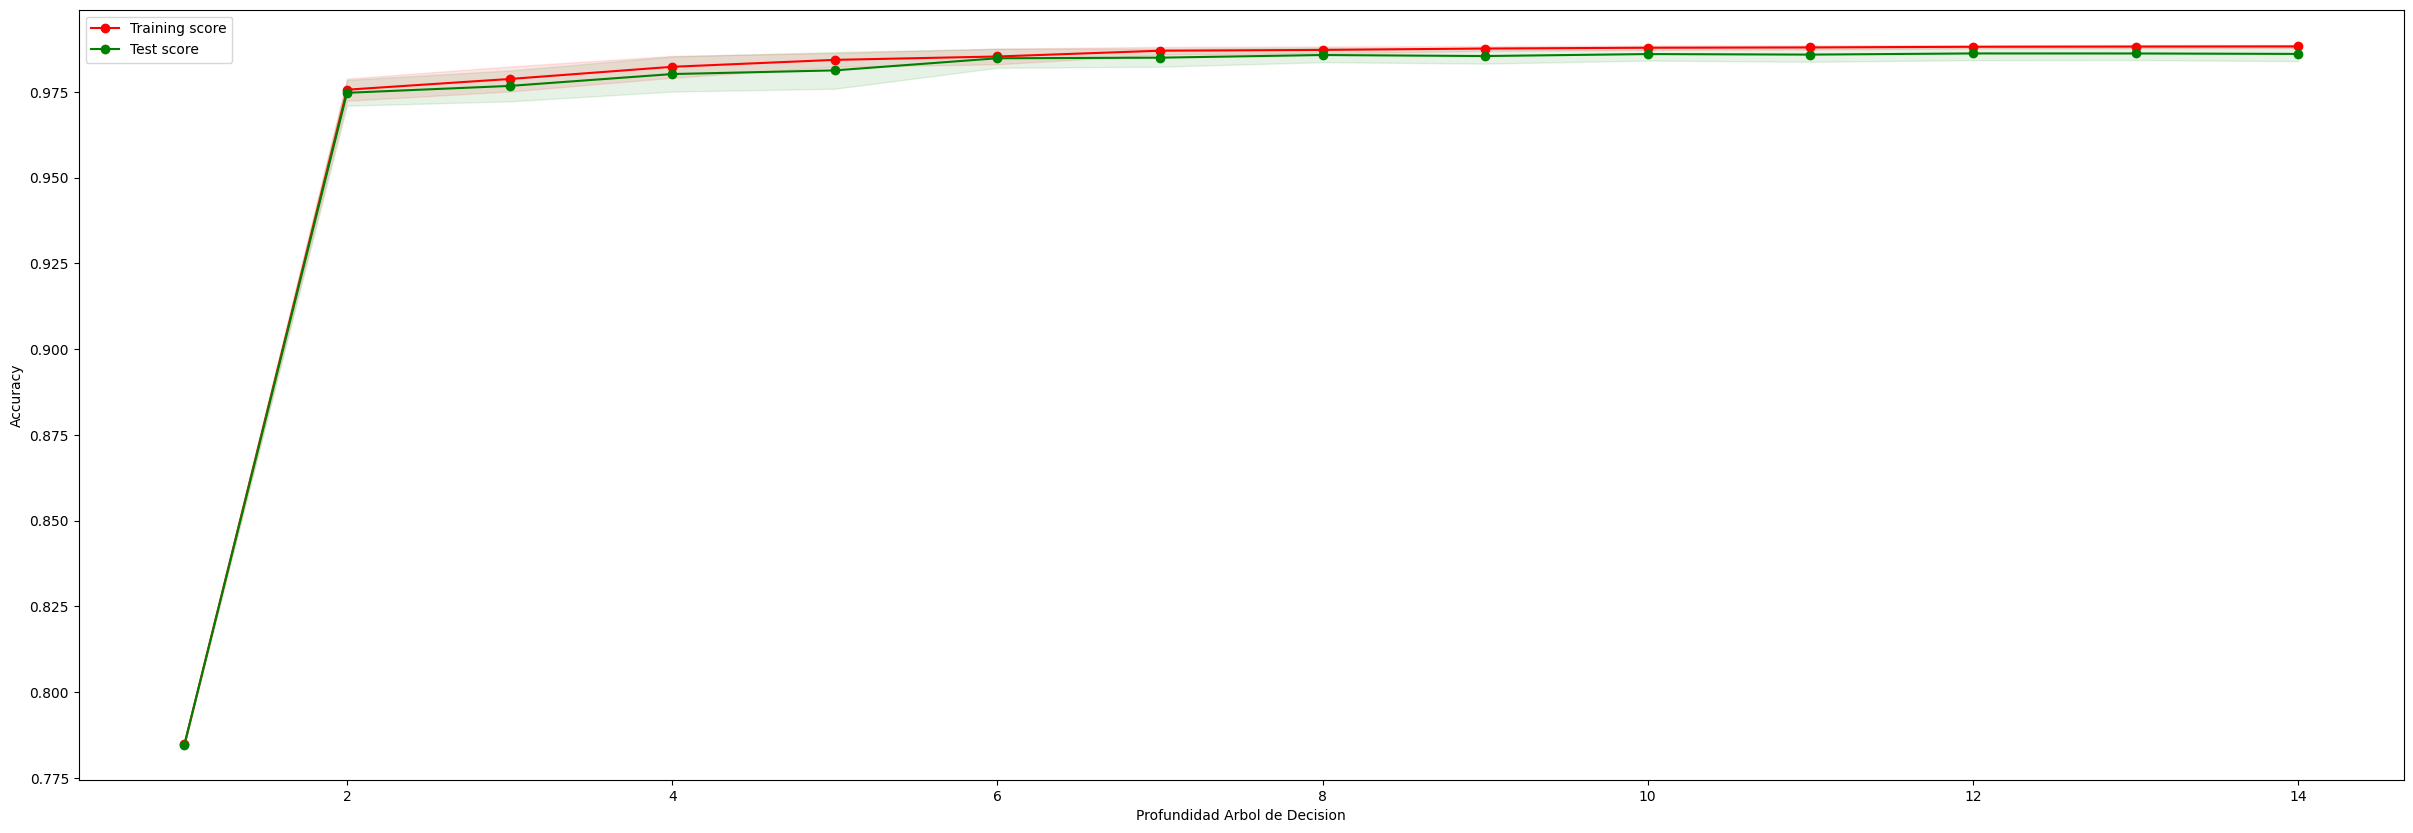

In [163]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

3. Aplicar GridSearch.

In [166]:
from sklearn.model_selection import GridSearchCV

In [173]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = 'accuracy')

In [174]:
clf.fit(X_train, y_train)

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [175]:
y_pred = clf.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Test:', accuracy_score(y_pred,y_test))

Accuracy sobre conjunto de Test: 0.9874162488951264


In [176]:
scores_df = pd.DataFrame(clf.cv_results_)
scores_df.sort_values('rank_test_score',ascending=True).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9        0.163383      0.005944         0.015424        0.002322   
19       0.278925      0.035471         0.025183        0.007722   
8        0.247081      0.060671         0.023247        0.011452   
18       0.242034      0.045432         0.021709        0.004581   
7        0.203959      0.048903         0.017649        0.004240   
17       0.293929      0.082319         0.026623        0.004010   
16       0.235327      0.066456         0.020484        0.006733   
6        0.156440      0.015343         0.012955        0.003247   
5        0.163803      0.014270         0.018347        0.005130   
15       0.212707      0.063129         0.021301        0.008248   

   param_criterion param_max_depth                                     params  \
9             gini              11     {'criterion': 'gini', 'max_depth': 11}   
19         entropy              11  {'criterion': 'entropy', 'max_depth': 11}   
8             gini              10     {'criterion': 'gini', 'max_depth': 10}   
18         entropy              10  {'criterion': 'entropy', 'max_depth': 10}   
7             gini               9      {'criterion': 'gini', 'max_depth': 9}   
17         entropy               9   {'criterion': 'entropy', 'max_depth': 9}   
16         entropy               8   {'criterion': 'entropy', 'max_depth': 8}   
6             gini               8      {'criterion': 'gini', 'max_depth': 8}   
5             gini               7      {'criterion': 'gini', 'max_depth': 7}   
15         entropy               7   {'criterion': 'entropy', 'max_depth': 7}   

    split0_test_score  split1_test_score  split2_test_score  \
9            0.987884           0.987913           0.987754   
19           0.987479           0.987782           0.987768   
8            0.987782           0.987811           0.987479   
18           0.987464           0.987435           0.987667   
7            0.987623           0.987652           0.987349   
17           0.987334           0.987537           0.987190   
16           0.987392           0.987305           0.987045   
6            0.987363           0.987161           0.986756   
5            0.986626           0.986640           0.986698   
15           0.986380           0.986105           0.985961   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
9            0.987537           0.987435         0.987704        0.000189   
19           0.987623           0.987305         0.987592        0.000181   
8            0.987623           0.987247         0.987589        0.000208   
18           0.987638           0.987088         0.987459        0.000206   
7            0.987305           0.987045         0.987395        0.000224   
17           0.987146           0.987045         0.987250        0.000171   
16           0.986987           0.986958         0.987138        0.000177   
6            0.987031           0.986915         0.987045        0.000208   
5            0.986655           0.986495         0.986623        0.000068   
15           0.986134           0.986163         0.986149        0.000135   

    rank_test_score  
9                 1  
19                2  
8                 3  
18                4  
7                 5  
17                6  
16                7  
6                 8  
5                 9  
15               10

In [177]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=11)

In [178]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 11}